In [11]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
from nn_resampler import nn_resampler
from phase_est_smc import phase_est_smc

In [13]:
num_particles = 100 # number of SMC particles (num of w points)
num_samples = 10000 # number of samples to draw from the particle distribution (to be binned)
num_bins = 100 # number of bins
n_iters = 100 # number of iterations of resampling

In [14]:
net = nn_resampler(100,100)
#net = net.to(device)
net.load_state_dict(torch.load("net_bn_aft_relu.model"))
net.eval()

nn_resampler(
  (enc1): Linear(in_features=100, out_features=75, bias=True)
  (enc2): Linear(in_features=75, out_features=50, bias=True)
  (enc3): Linear(in_features=50, out_features=25, bias=True)
  (enc4): Linear(in_features=25, out_features=10, bias=True)
  (dec1): Linear(in_features=10, out_features=25, bias=True)
  (dec2): Linear(in_features=25, out_features=50, bias=True)
  (dec3): Linear(in_features=50, out_features=75, bias=True)
  (dec4): Linear(in_features=75, out_features=100, bias=True)
  (bn_enc1): BatchNorm1d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_enc2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_enc3): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_enc4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_dec1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_dec2): BatchNorm1d(50, ep

## NN Resampler

==============NEW EXPERIMENT WITH OMEGA =  4.052329452682846 ======================================


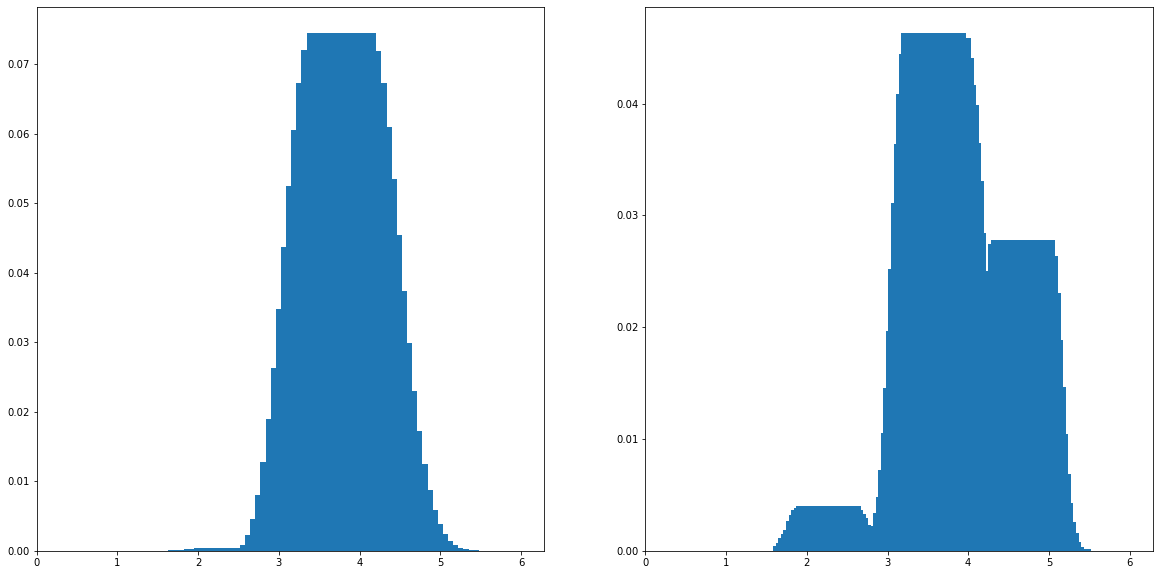

True omega: 4.052329, prediction by NN: 4.052329, num of resample calls: 63
==============NEW EXPERIMENT WITH OMEGA =  3.7762909917467584 ======================================


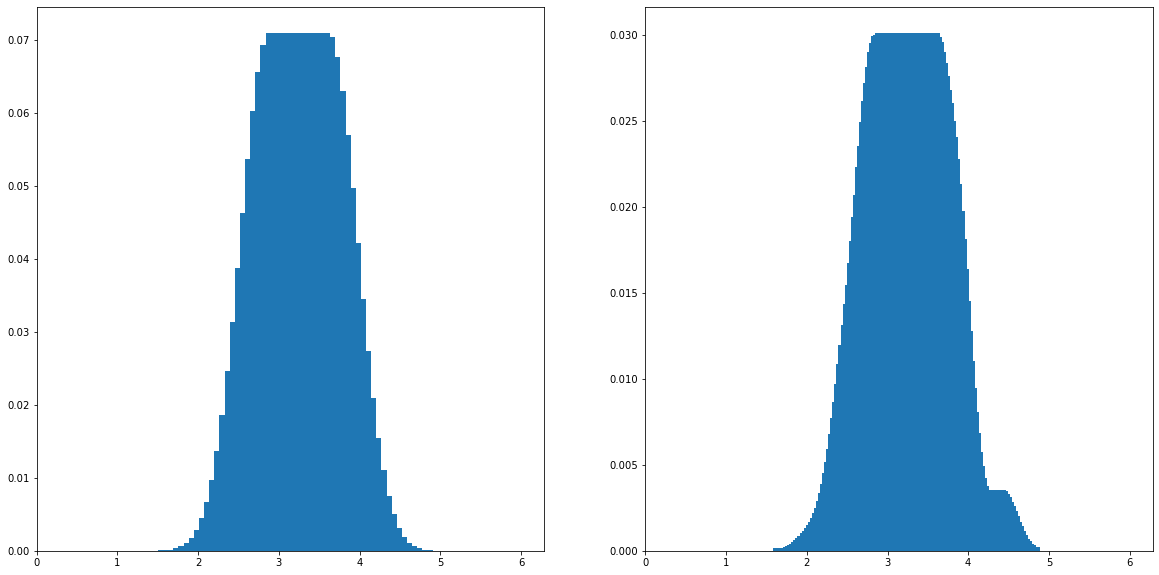

True omega: 3.776291, prediction by NN: 3.776292, num of resample calls: 19
==============NEW EXPERIMENT WITH OMEGA =  5.058200875378503 ======================================


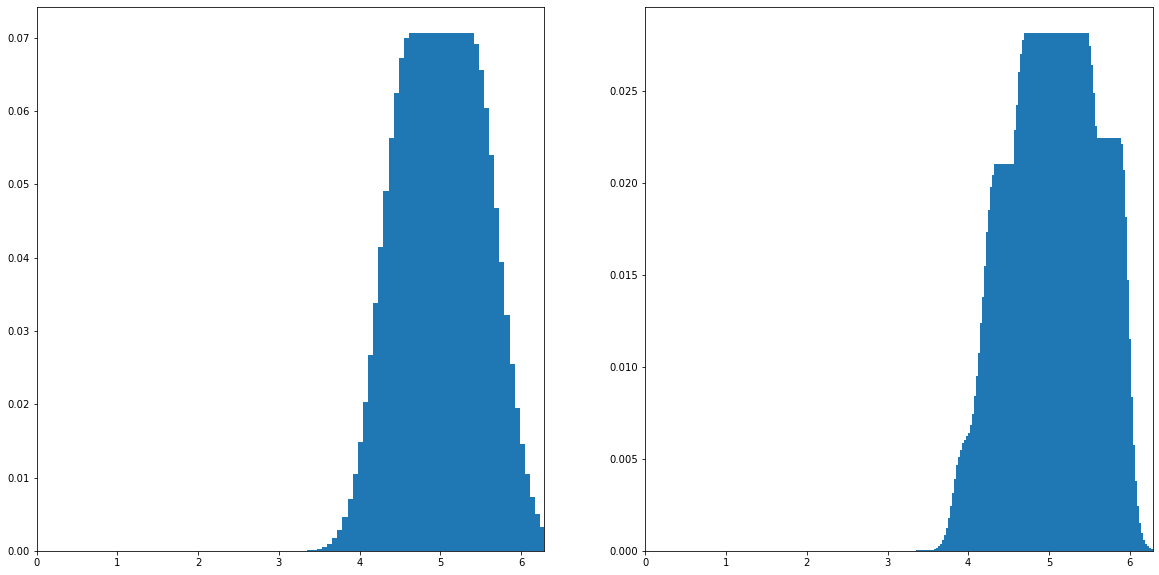

True omega: 5.058201, prediction by NN: 5.058202, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  5.950947802845698 ======================================


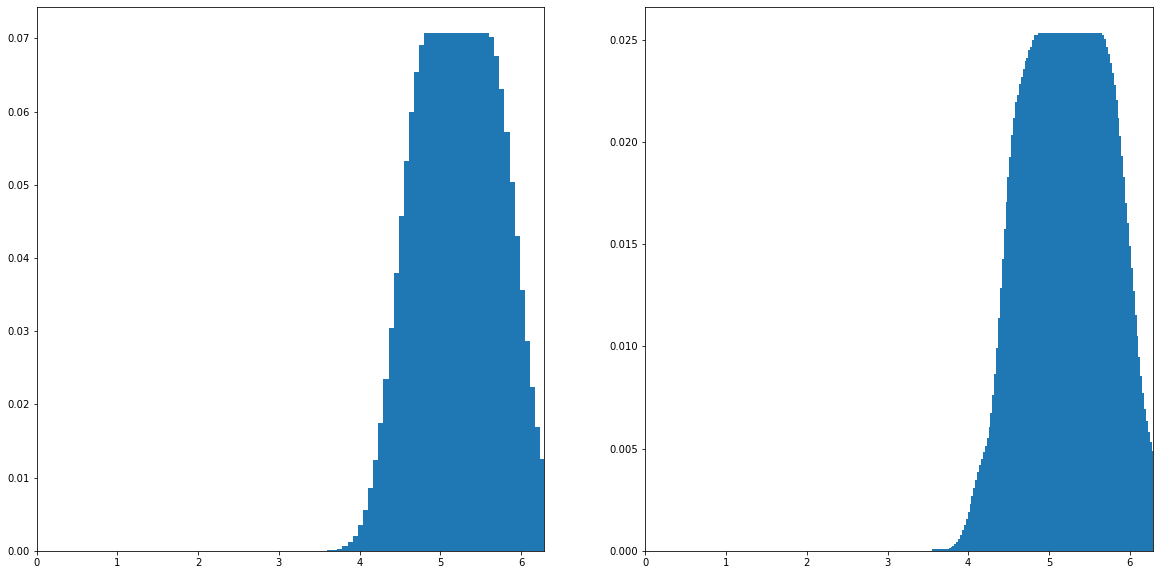

True omega: 5.950948, prediction by NN: 5.950950, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  3.219667283432706 ======================================


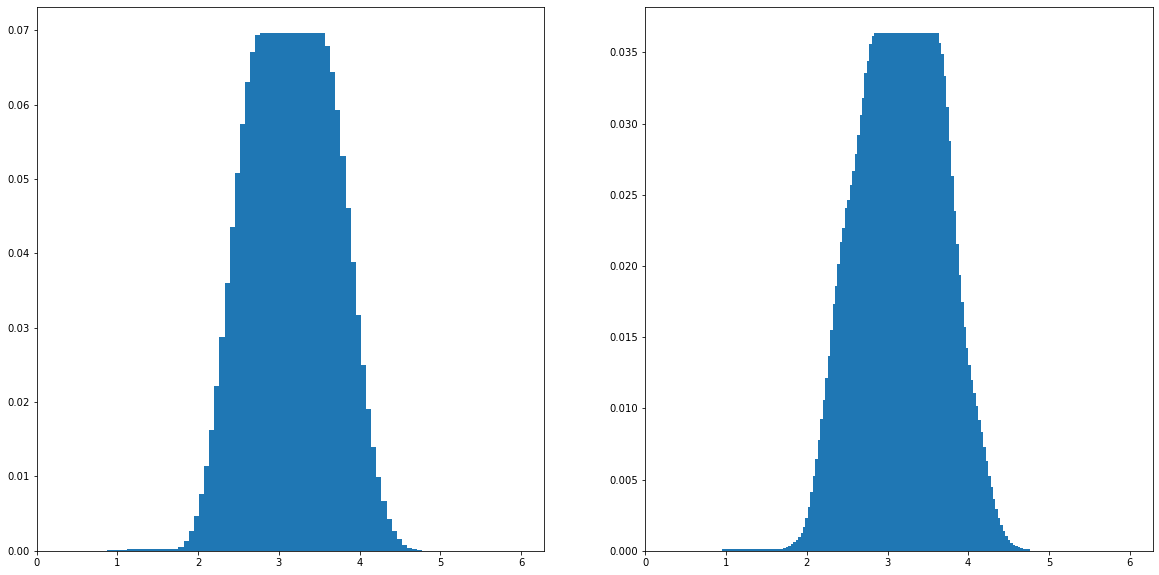

True omega: 3.219667, prediction by NN: 3.219665, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  2.422833691492284 ======================================


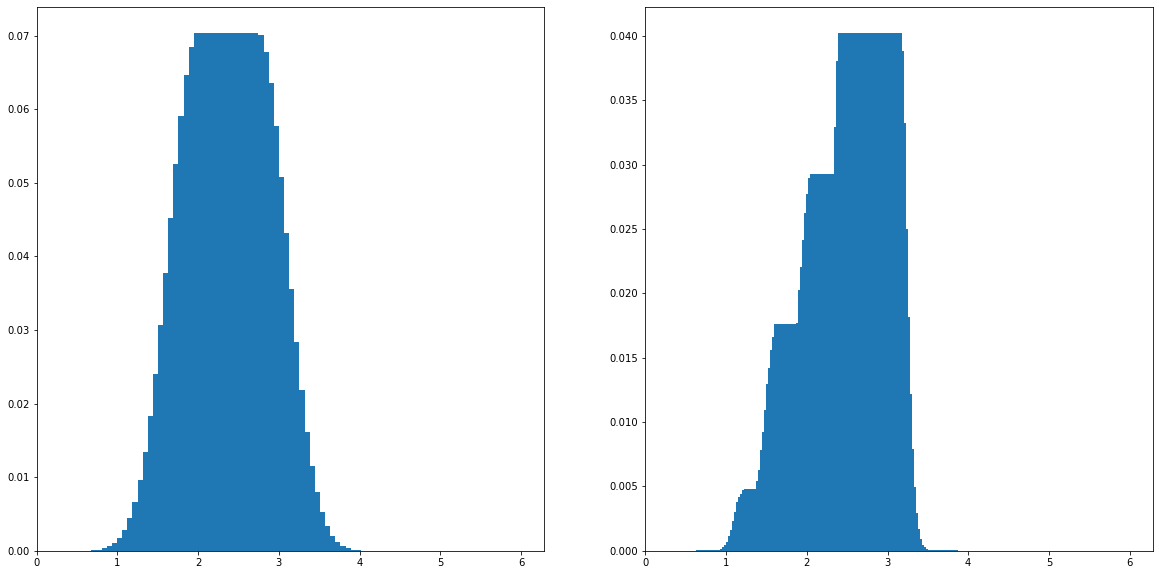

True omega: 2.422834, prediction by NN: 2.422833, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  4.527946837278331 ======================================


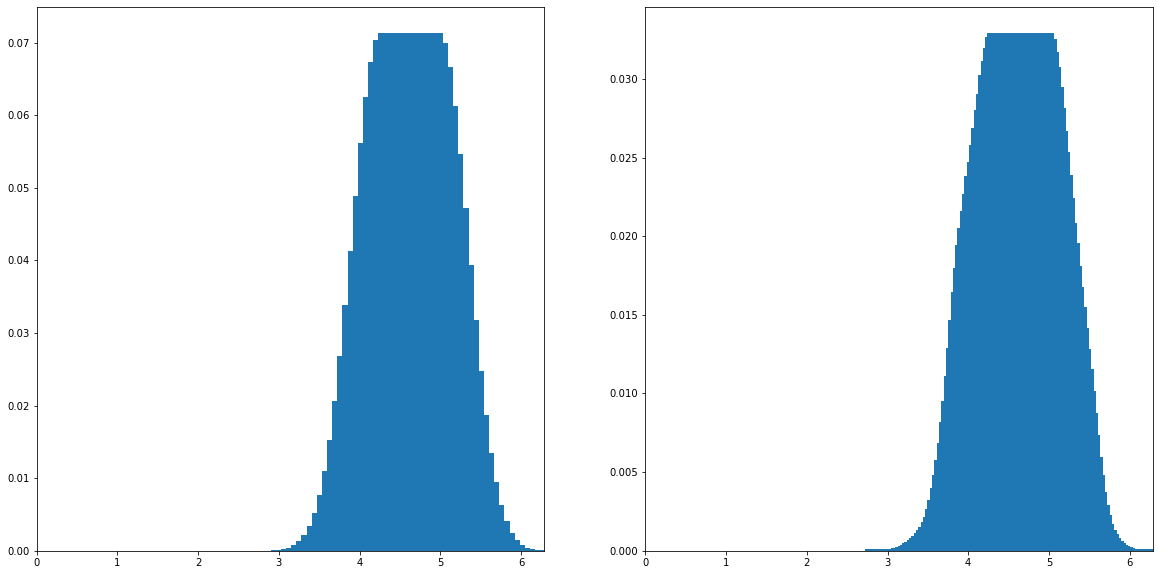

True omega: 4.527947, prediction by NN: 4.527947, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  1.460142271568113 ======================================


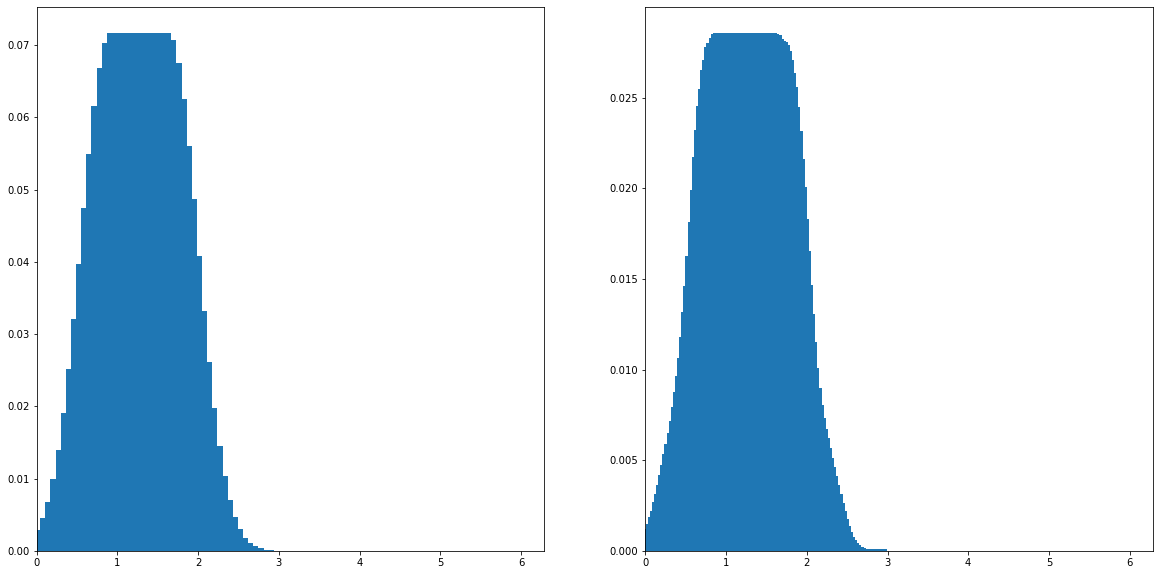

True omega: 1.460142, prediction by NN: 1.460142, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  2.088623161094259 ======================================


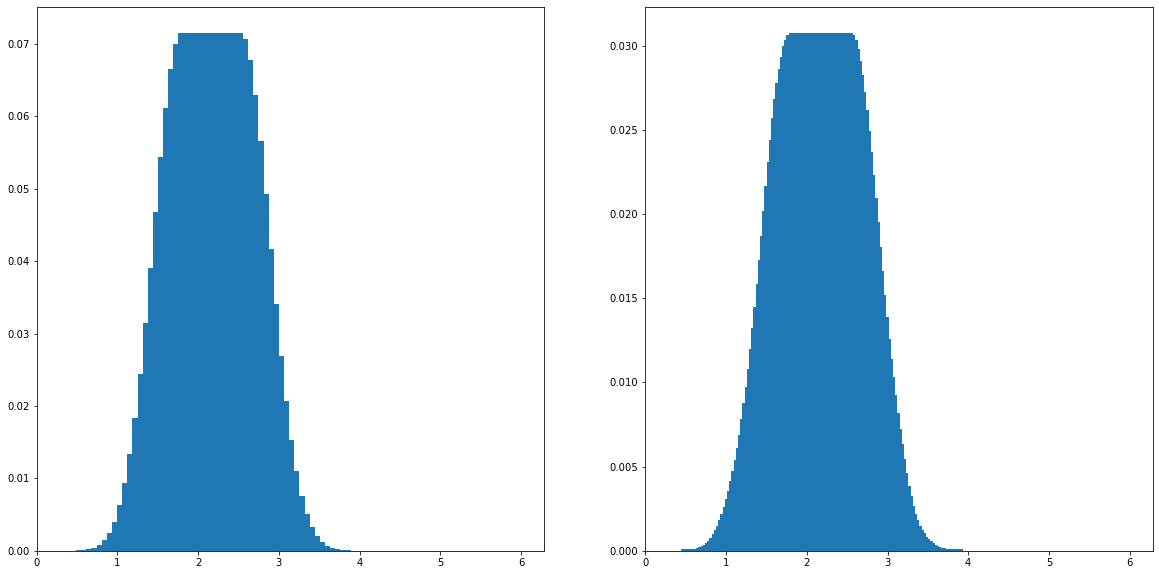

True omega: 2.088623, prediction by NN: 2.088622, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.93723813582105 ======================================


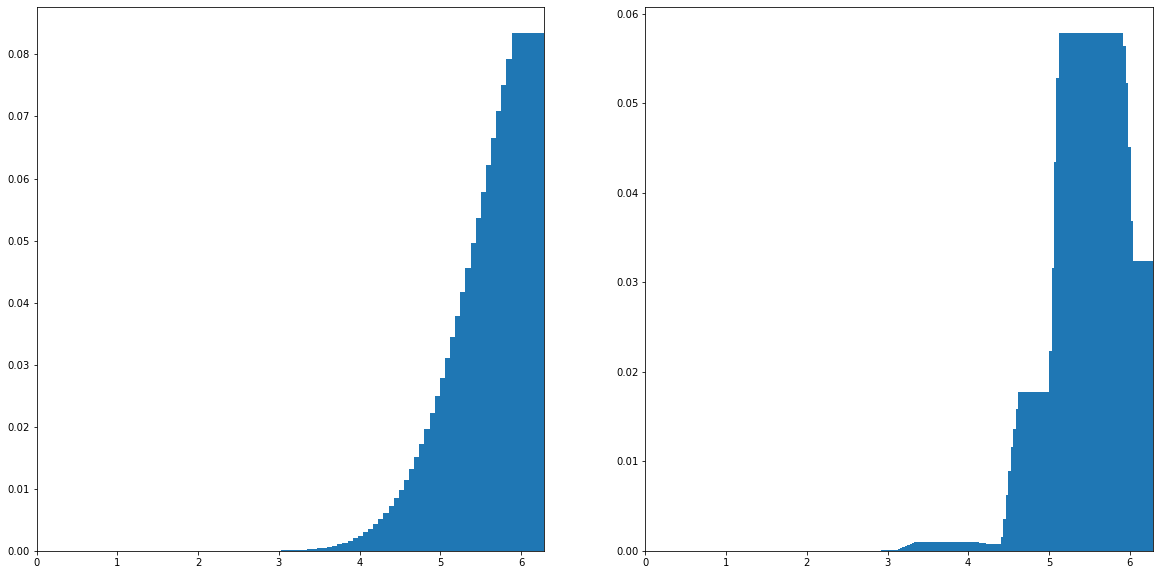

True omega: 5.937238, prediction by NN: 5.937235, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  3.8259875480098526 ======================================


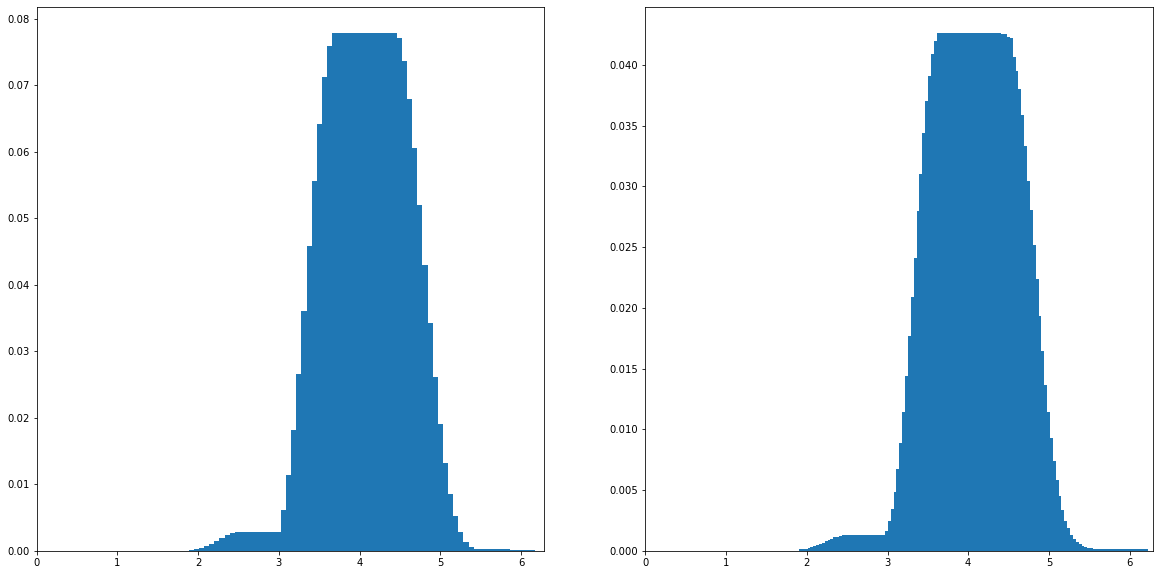

True omega: 3.825988, prediction by NN: 3.825987, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  4.070202089493146 ======================================


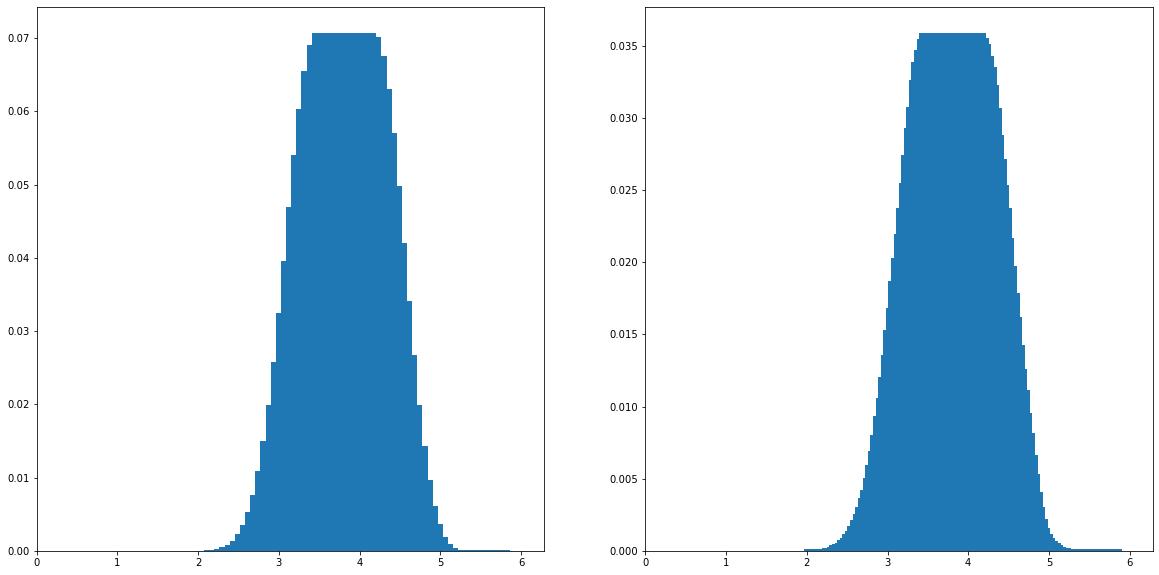

True omega: 4.070202, prediction by NN: 4.070204, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  4.07559567871447 ======================================


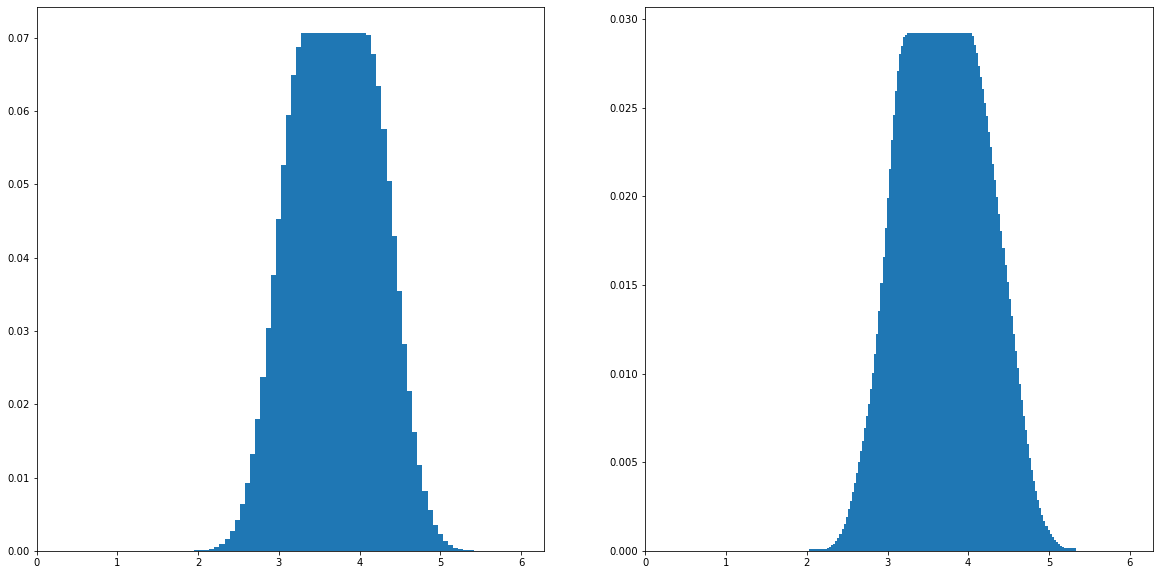

True omega: 4.075596, prediction by NN: 4.075595, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  4.476778530958126 ======================================


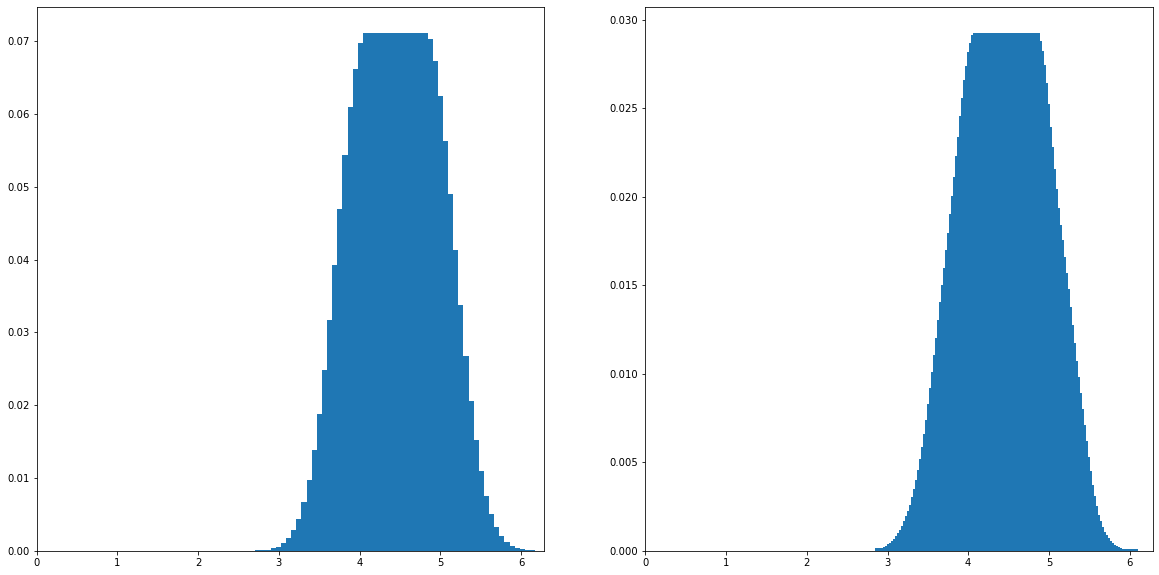

True omega: 4.476779, prediction by NN: 4.476778, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  2.645469859919033 ======================================


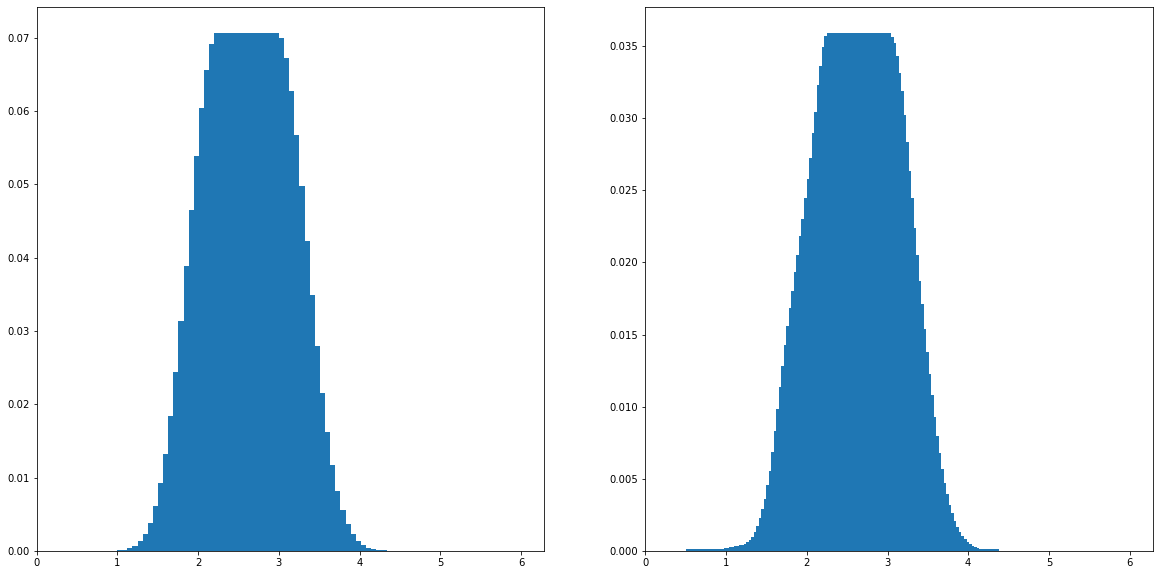

True omega: 2.645470, prediction by NN: 2.645471, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  4.808110347076836 ======================================


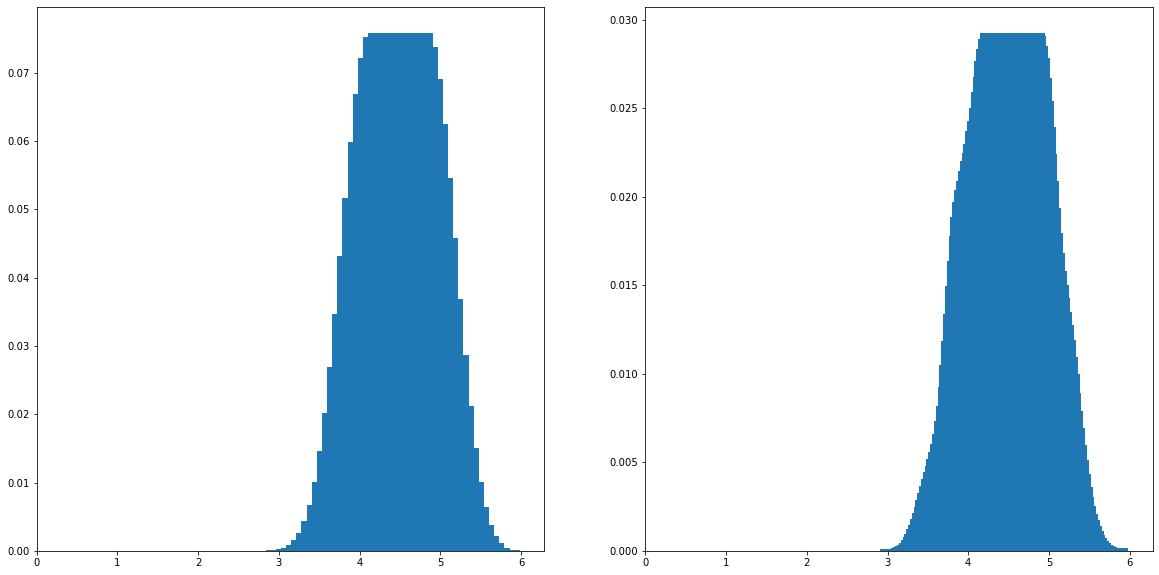

True omega: 4.808110, prediction by NN: 4.808110, num of resample calls: 19
==============NEW EXPERIMENT WITH OMEGA =  4.7498751543291835 ======================================


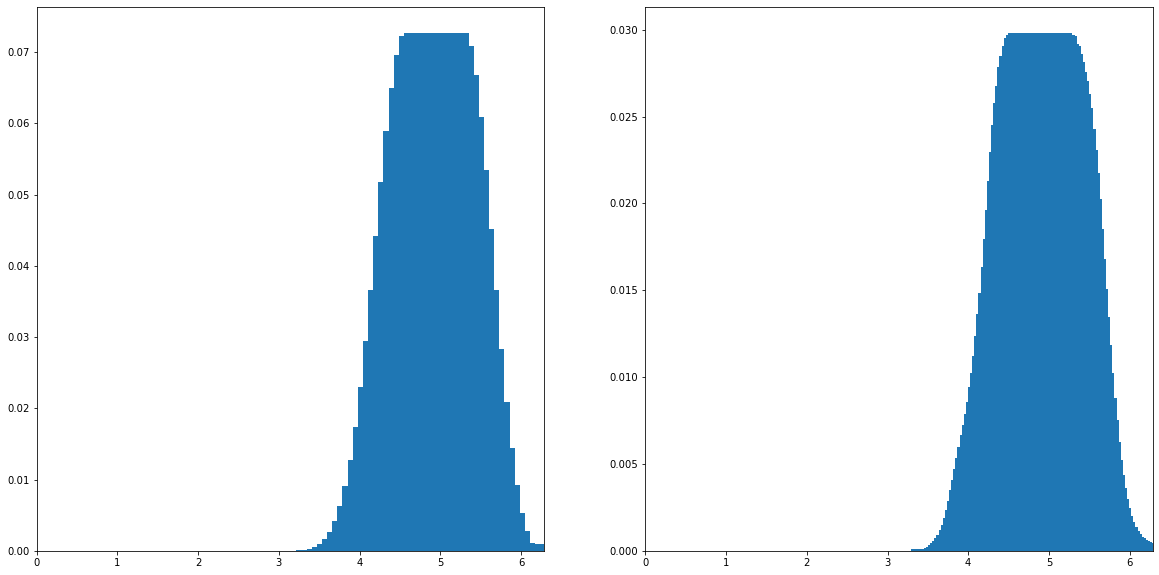

True omega: 4.749875, prediction by NN: 4.749876, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  3.9123126072291825 ======================================


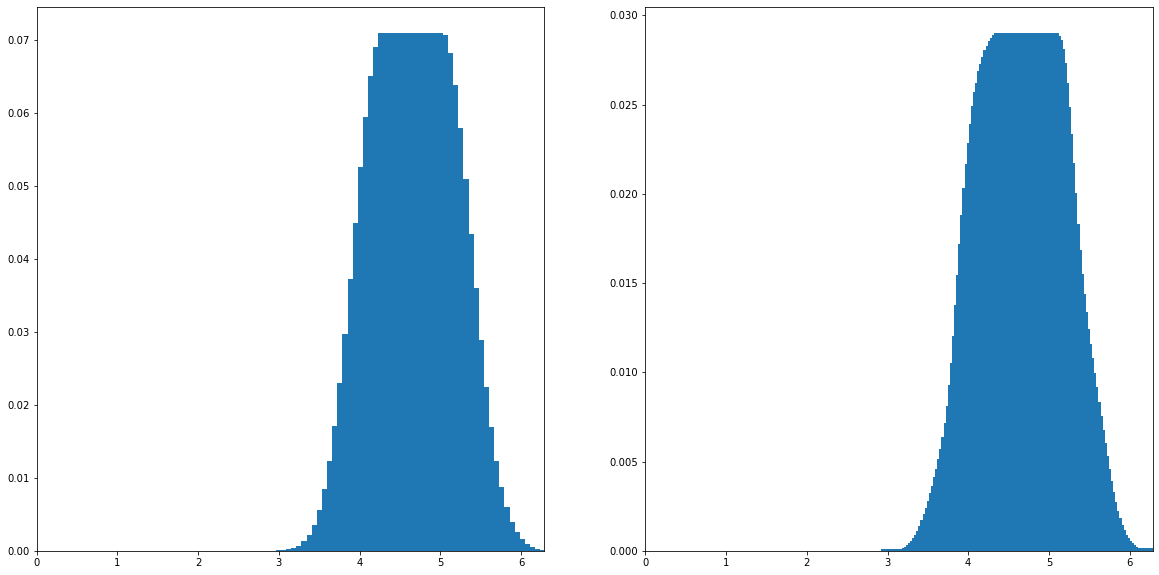

True omega: 3.912313, prediction by NN: 3.912313, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  5.8859124993876835 ======================================


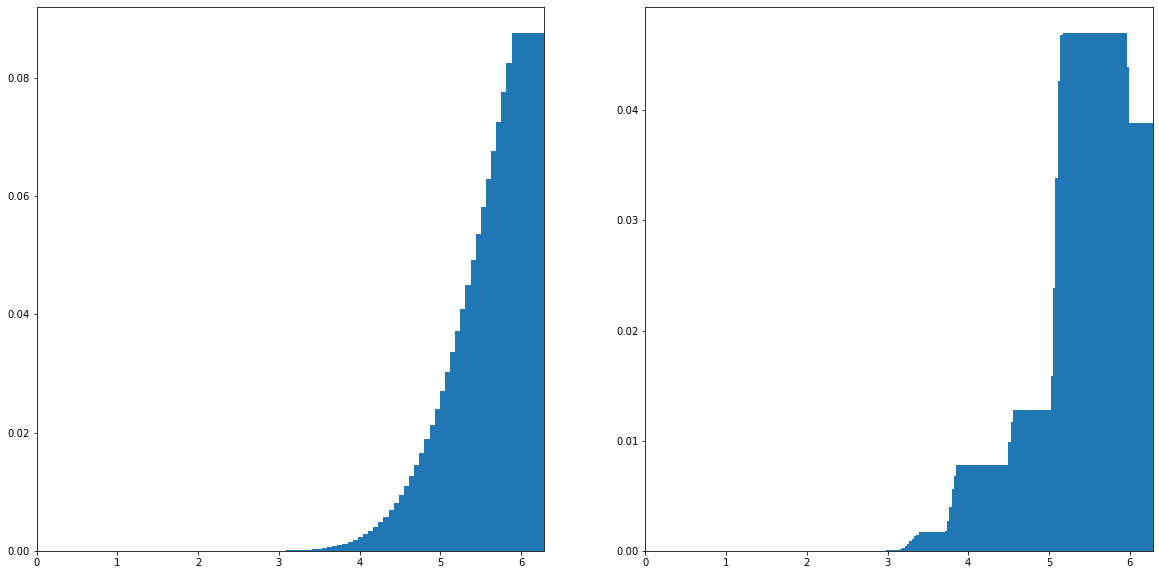

True omega: 5.885912, prediction by NN: 5.885911, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  1.187540012425936 ======================================


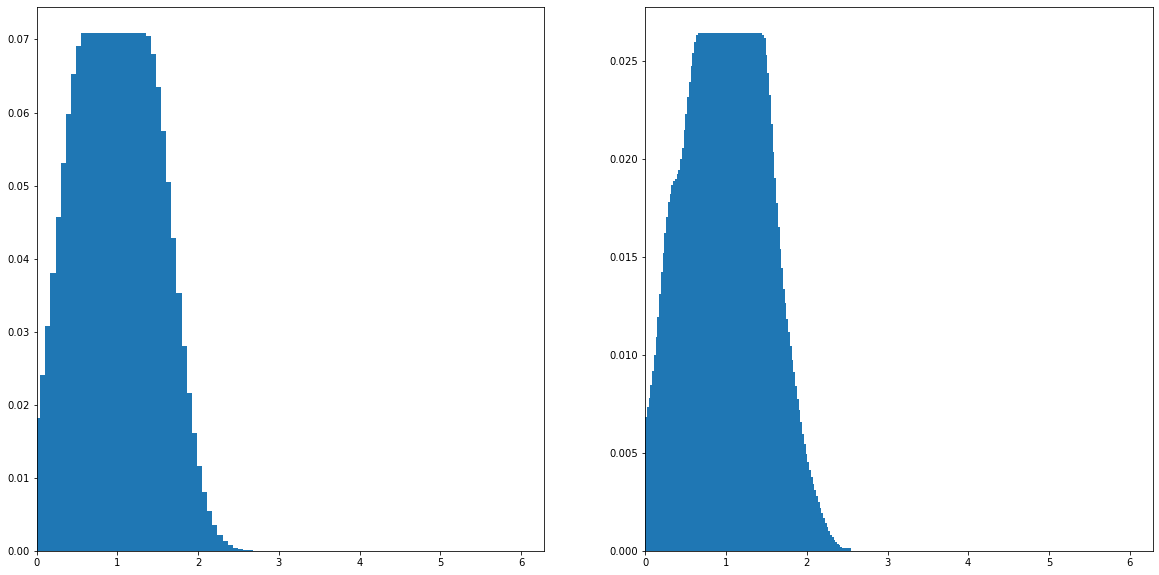

True omega: 1.187540, prediction by NN: 1.187540, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  1.4782121530095973 ======================================


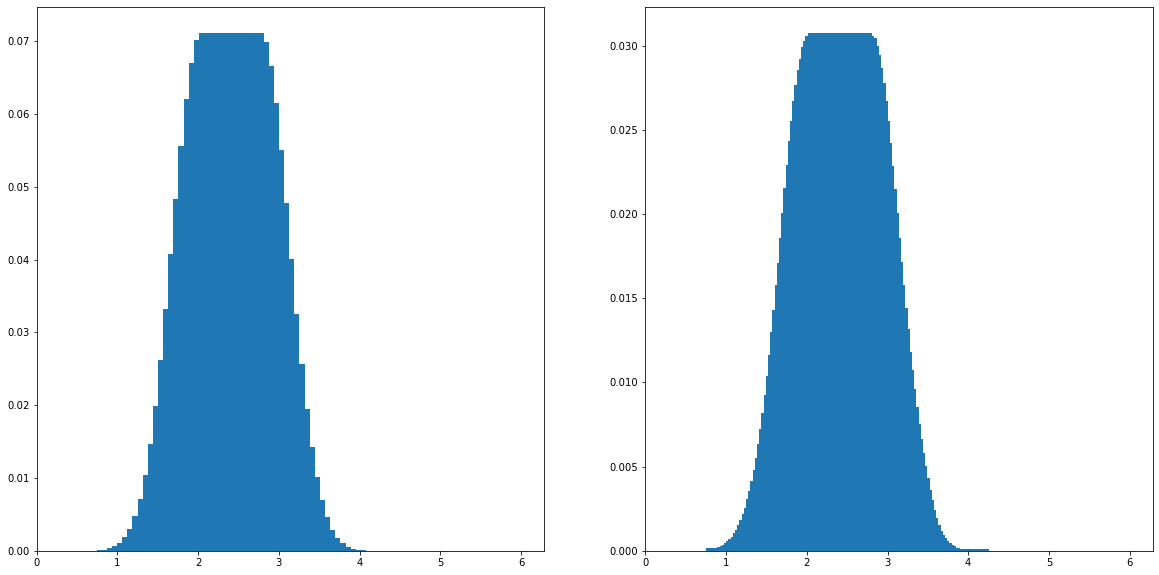

True omega: 1.478212, prediction by NN: 1.478212, num of resample calls: 20
==============NEW EXPERIMENT WITH OMEGA =  0.9976036064329477 ======================================


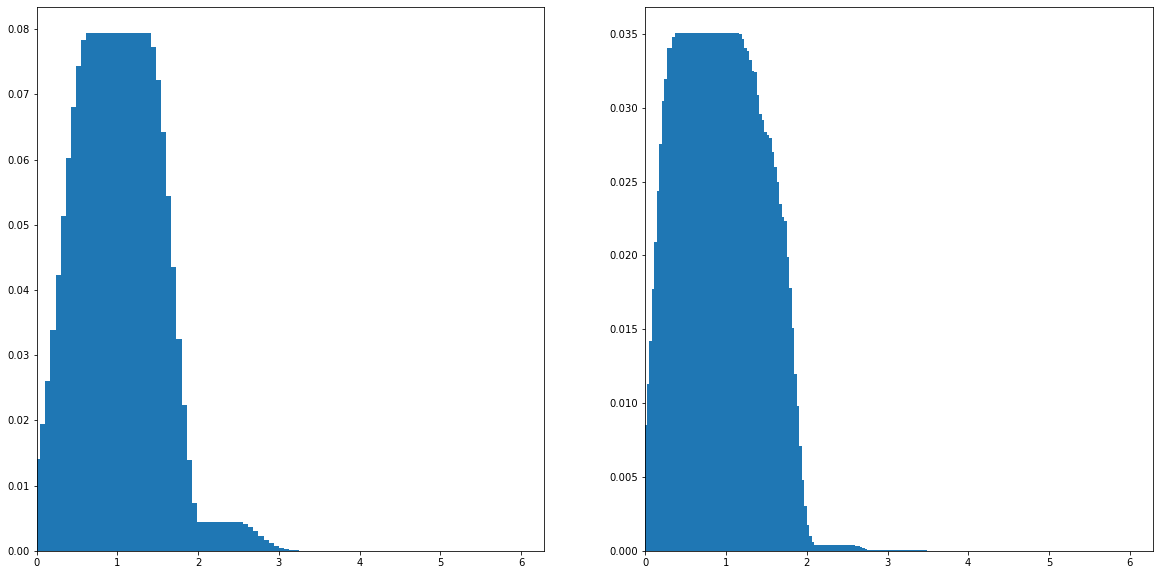

True omega: 0.997604, prediction by NN: 0.997603, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.910971080264098 ======================================


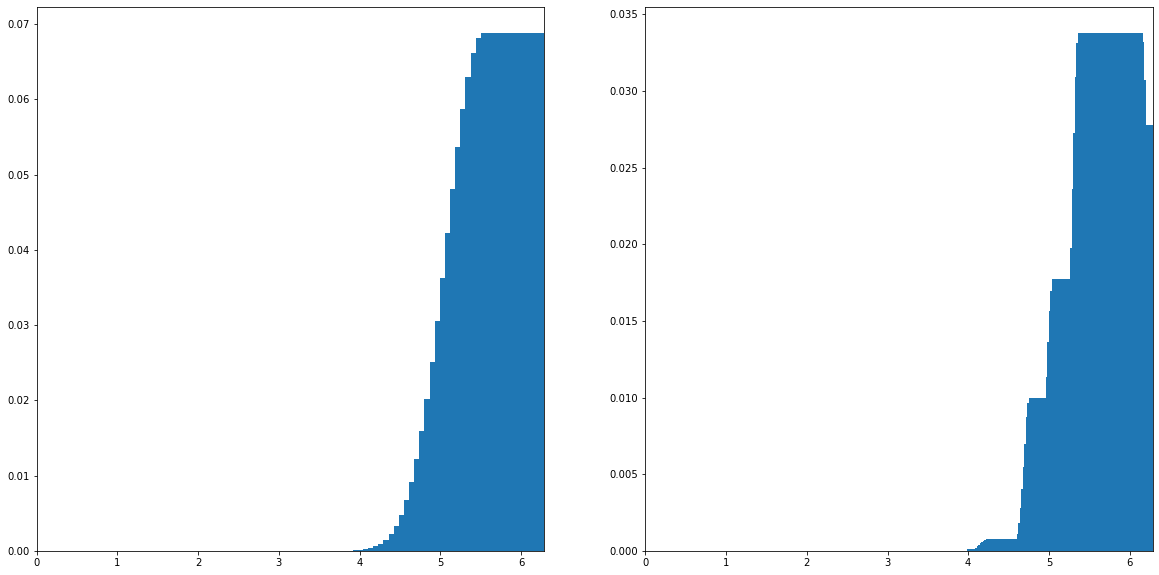

True omega: 5.910971, prediction by NN: 5.910968, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  1.6210891870303434 ======================================


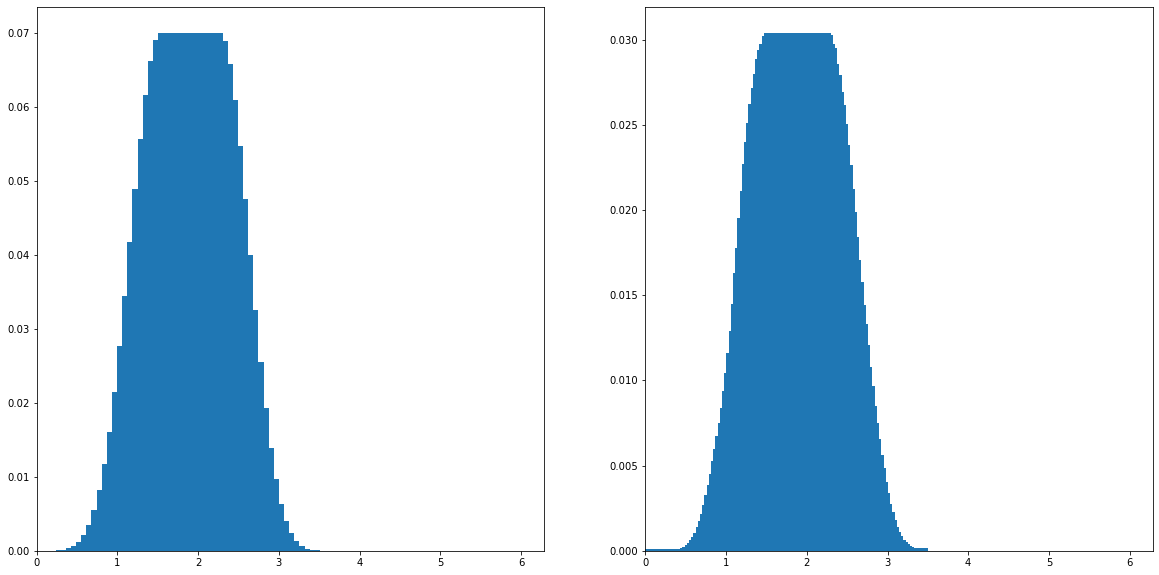

True omega: 1.621089, prediction by NN: 1.621089, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.1105415975426505 ======================================


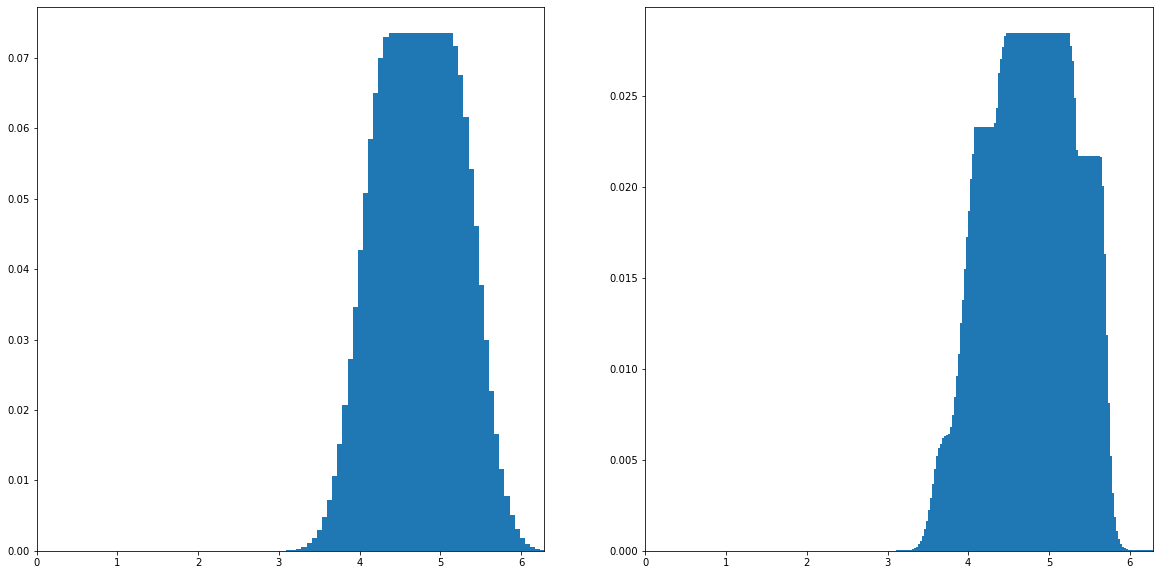

True omega: 5.110542, prediction by NN: 5.110543, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  3.867948094634659 ======================================


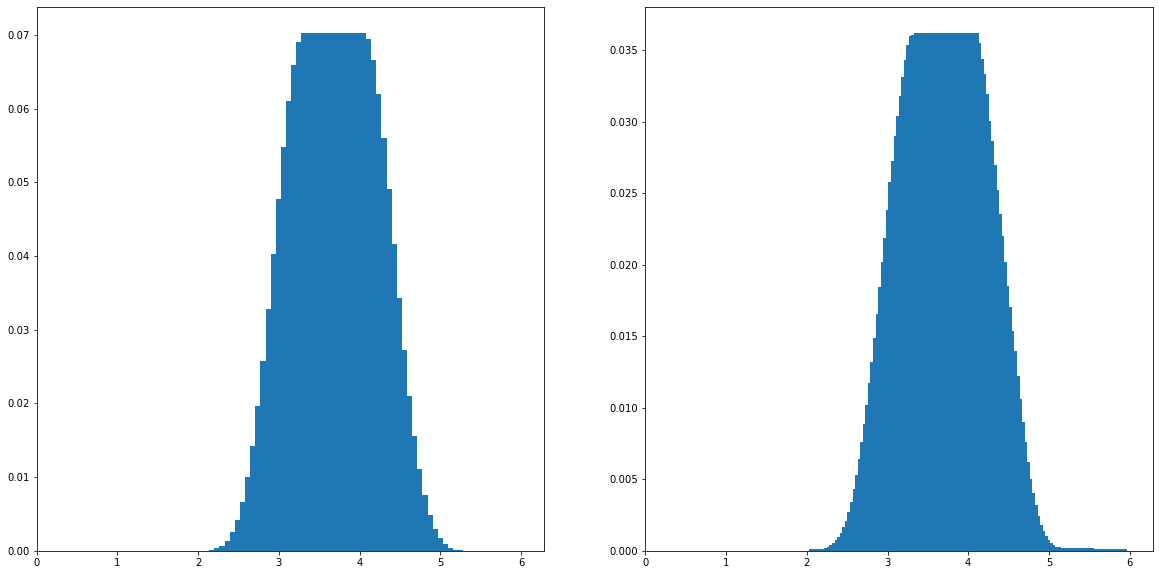

True omega: 3.867948, prediction by NN: 3.867948, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  3.2789521444963663 ======================================


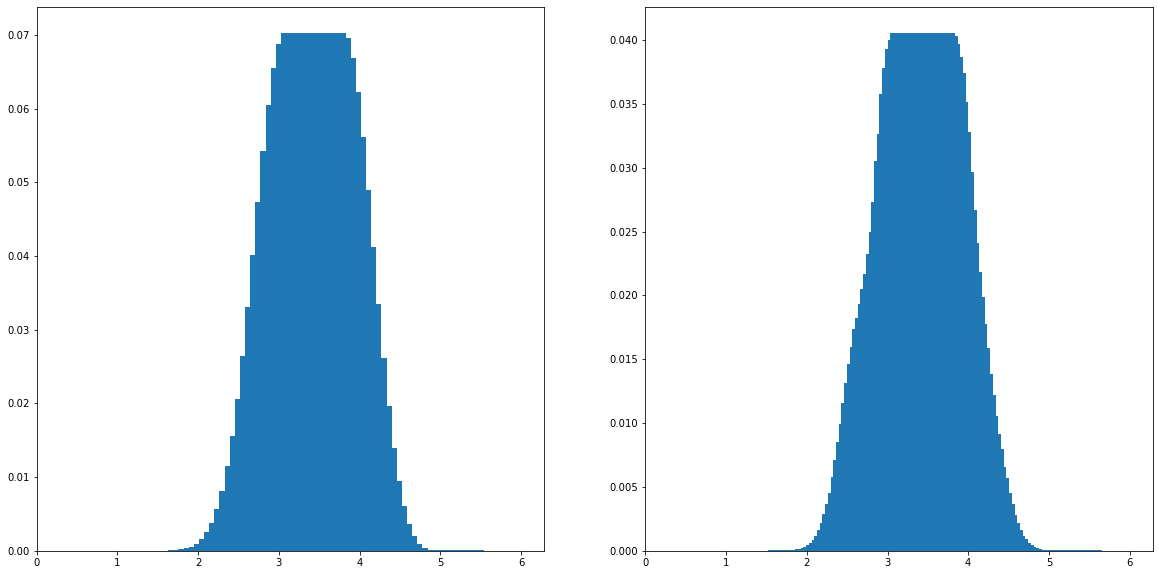

True omega: 3.278952, prediction by NN: 3.278952, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.562698633191228 ======================================


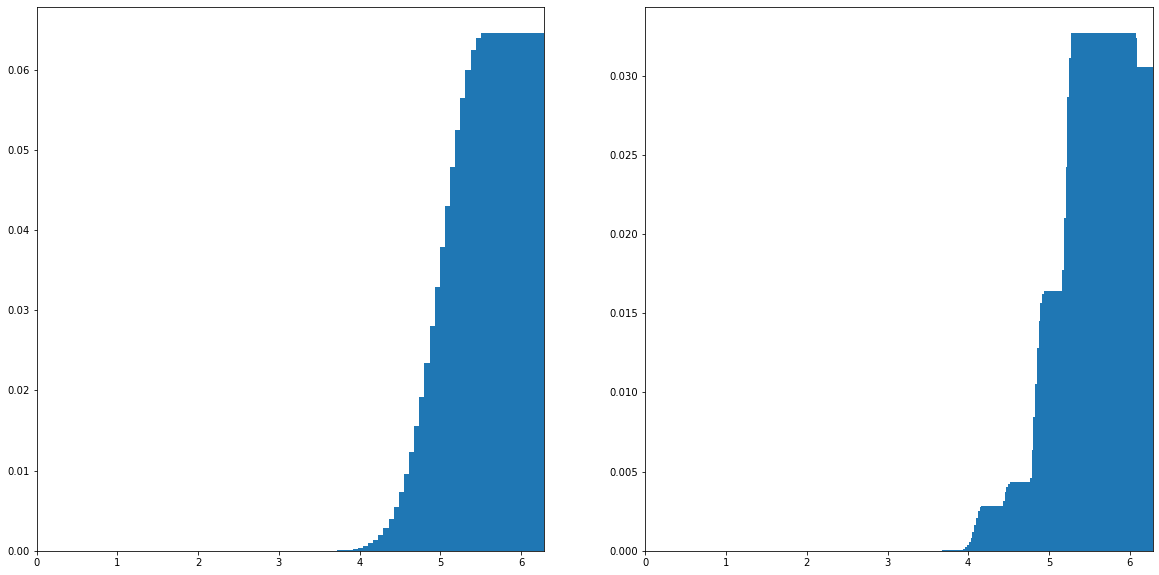

True omega: 5.562699, prediction by NN: 5.562700, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  5.677900655792059 ======================================


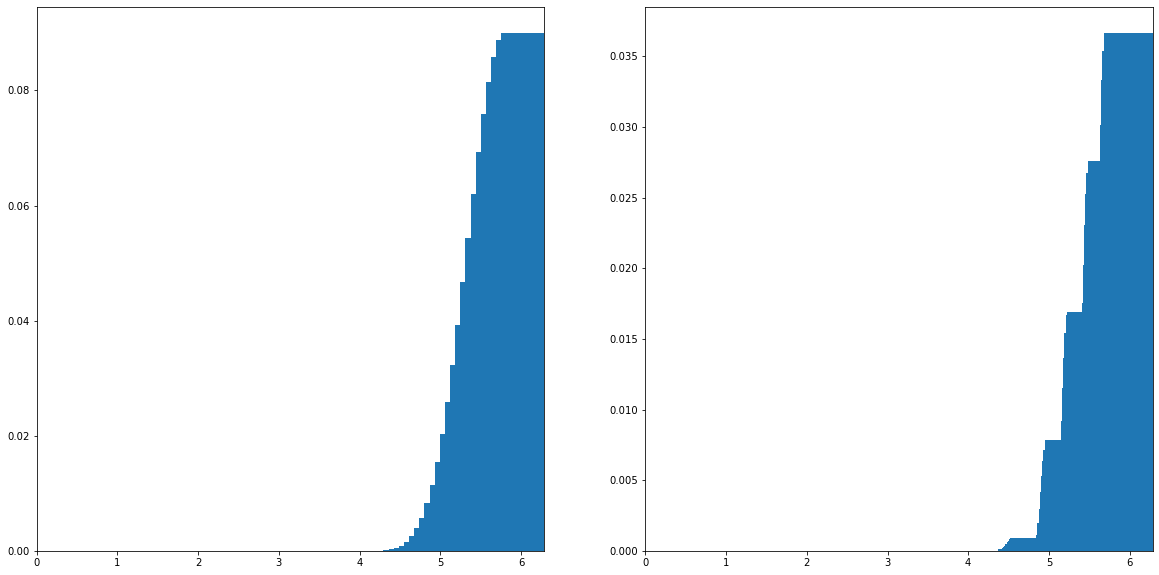

True omega: 5.677901, prediction by NN: 5.677898, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  2.534512261318879 ======================================


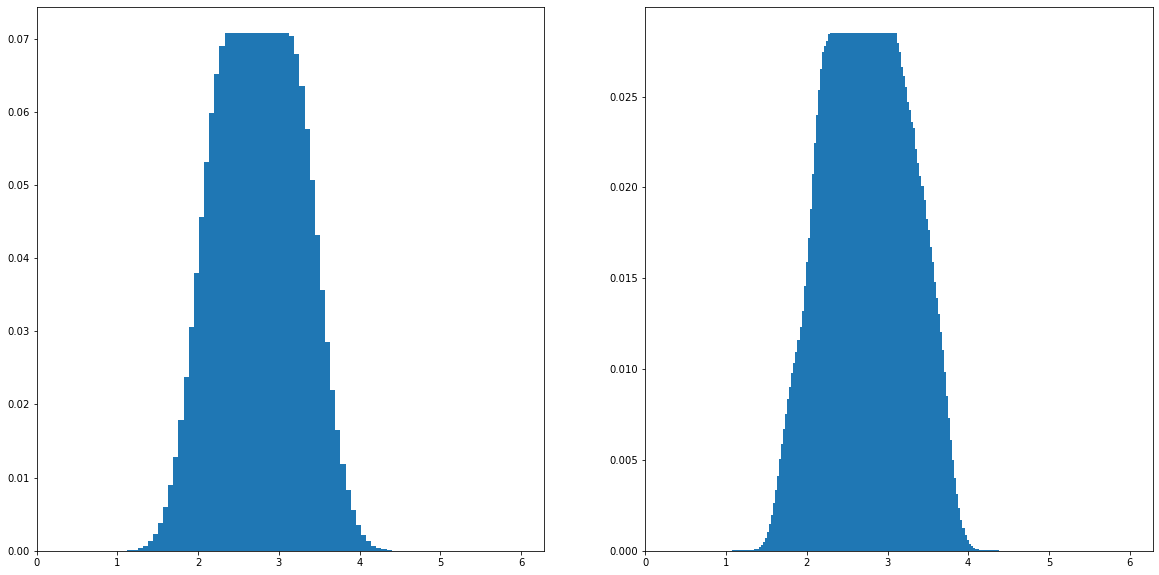

True omega: 2.534512, prediction by NN: 2.534512, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  1.9730738302831767 ======================================


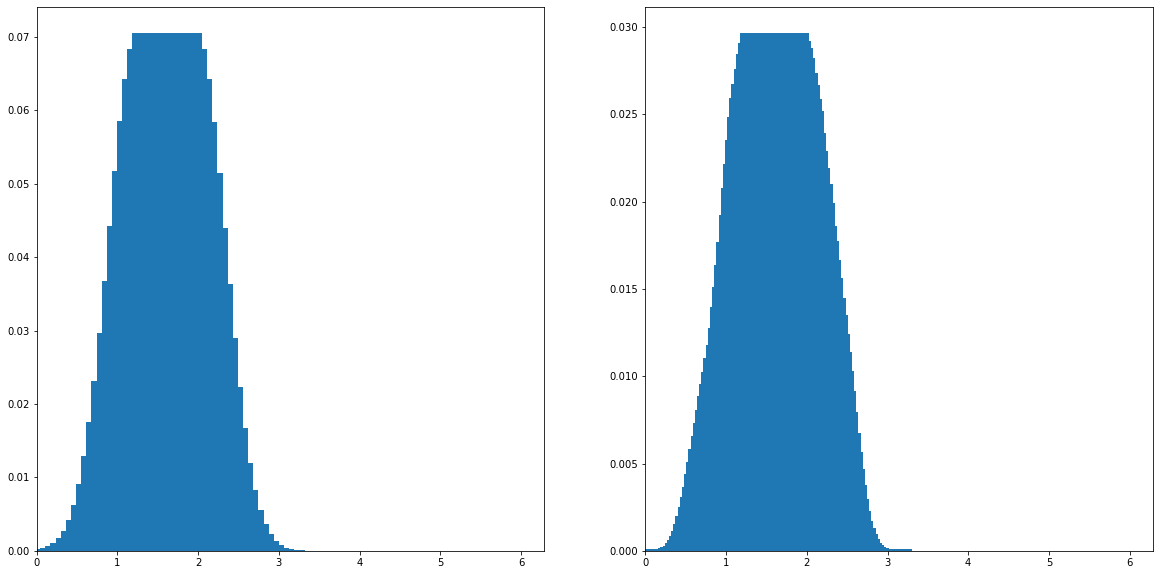

True omega: 1.973074, prediction by NN: 1.973074, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  3.7462566585511357 ======================================


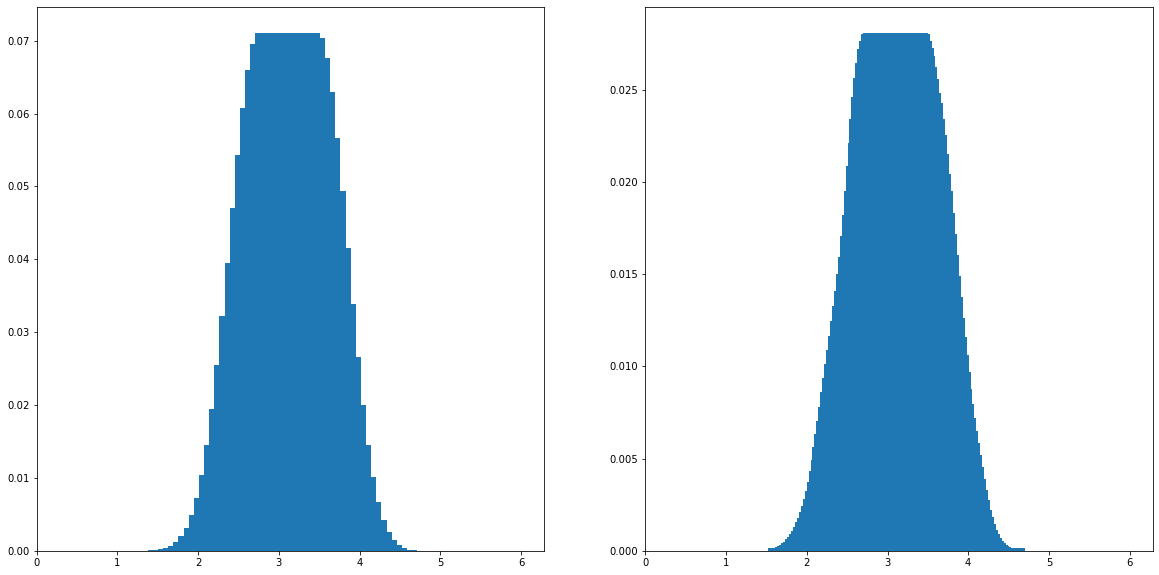

True omega: 3.746257, prediction by NN: 3.746260, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  3.5315491381891513 ======================================


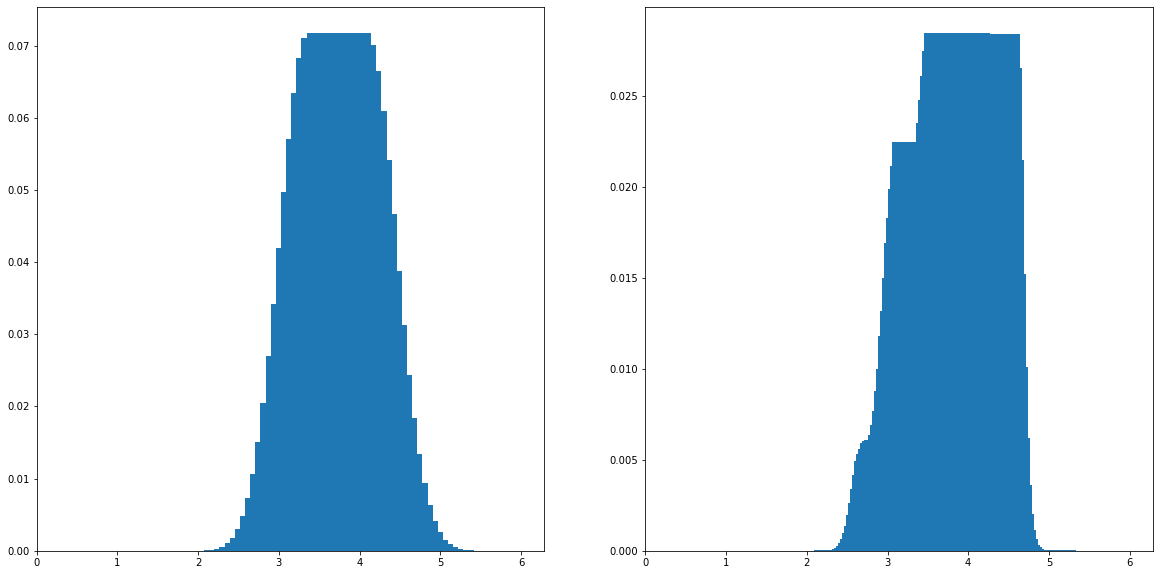

True omega: 3.531549, prediction by NN: 3.531549, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  2.7987192379645442 ======================================


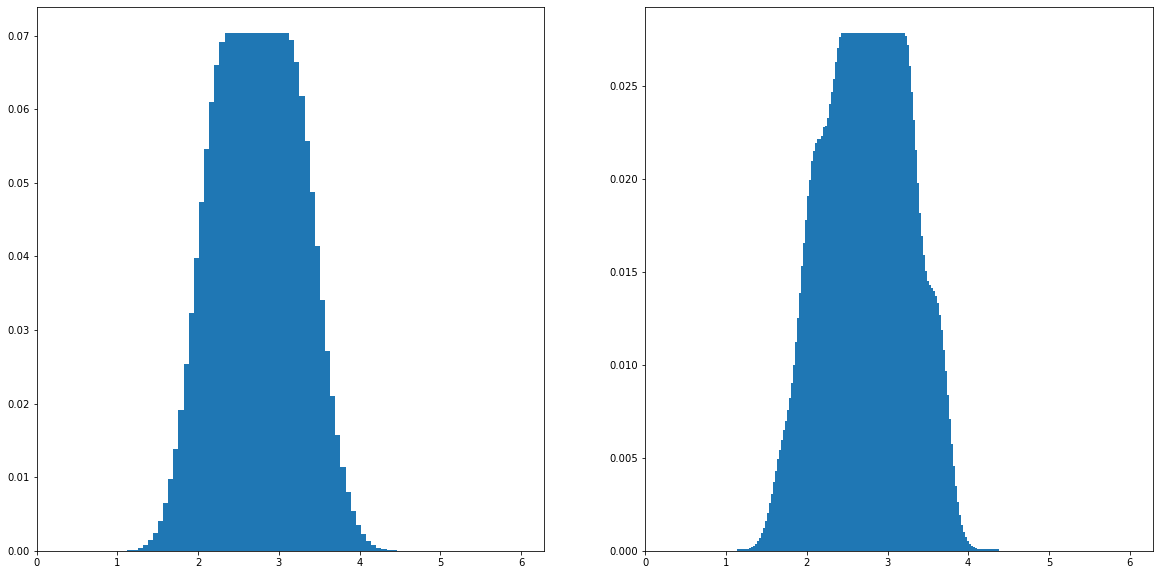

True omega: 2.798719, prediction by NN: 2.798721, num of resample calls: 27
==============NEW EXPERIMENT WITH OMEGA =  5.510701244563254 ======================================


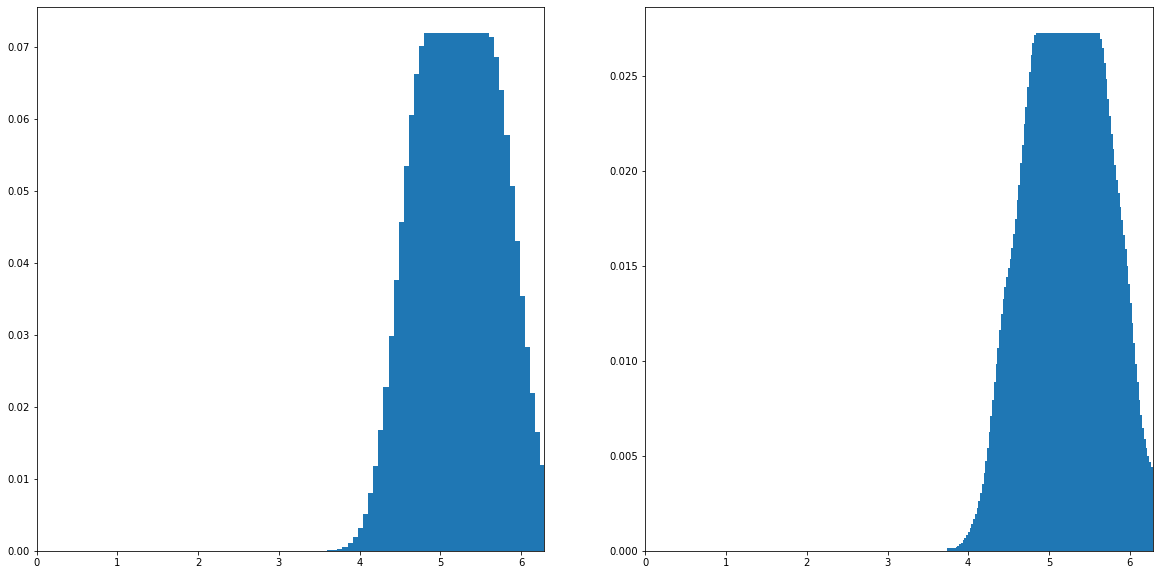

True omega: 5.510701, prediction by NN: 5.510701, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  5.213531676840631 ======================================


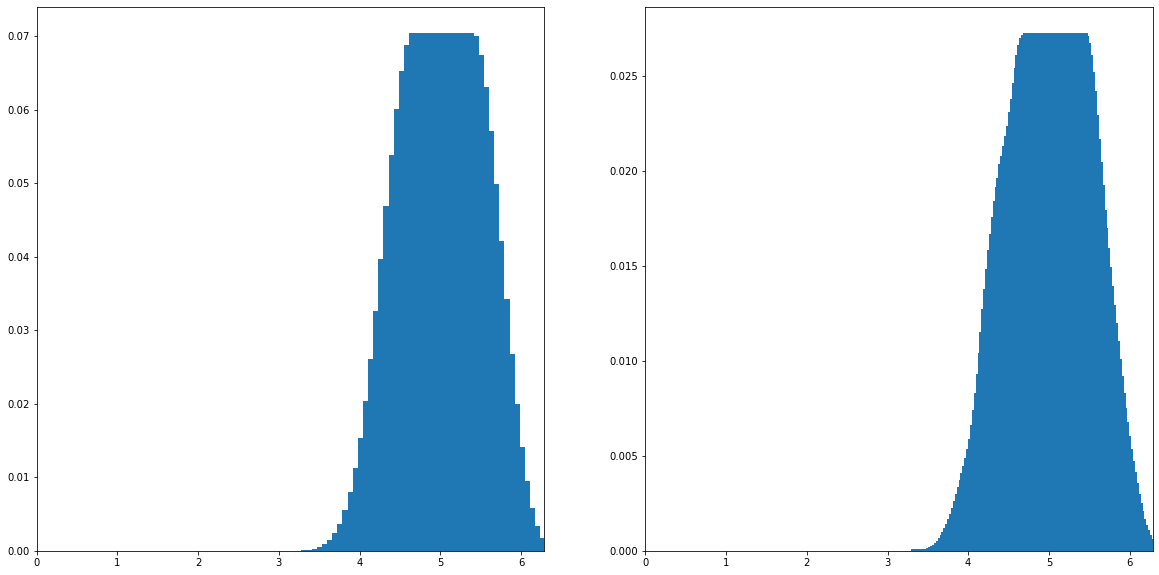

True omega: 5.213532, prediction by NN: 5.213533, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  5.722412578825601 ======================================


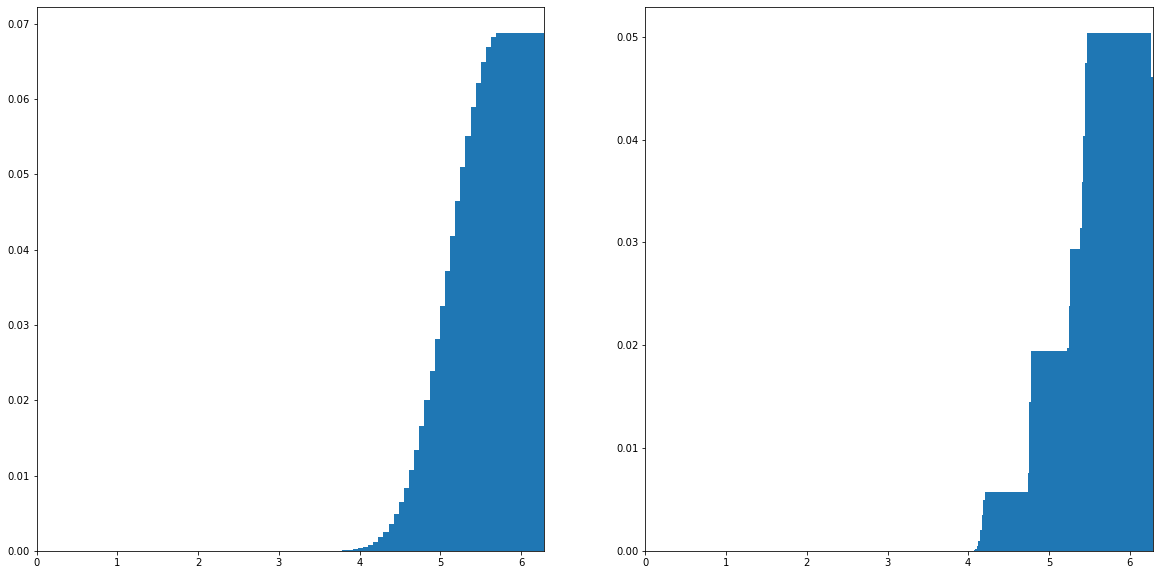

True omega: 5.722413, prediction by NN: 5.722412, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  4.586601238769156 ======================================


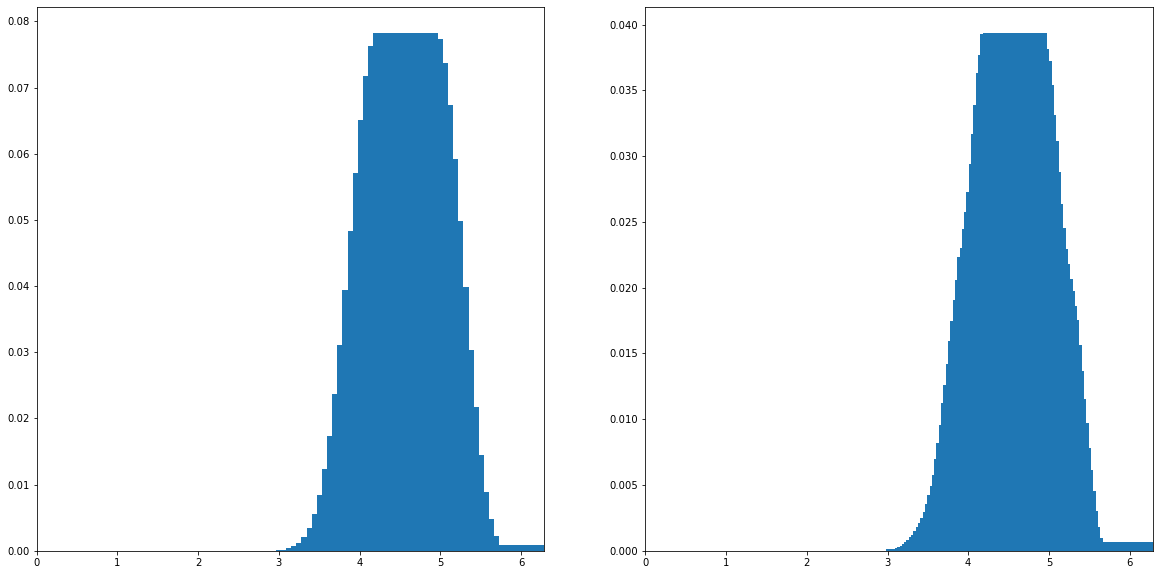

True omega: 4.586601, prediction by NN: 4.586602, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  4.3301271580881835 ======================================


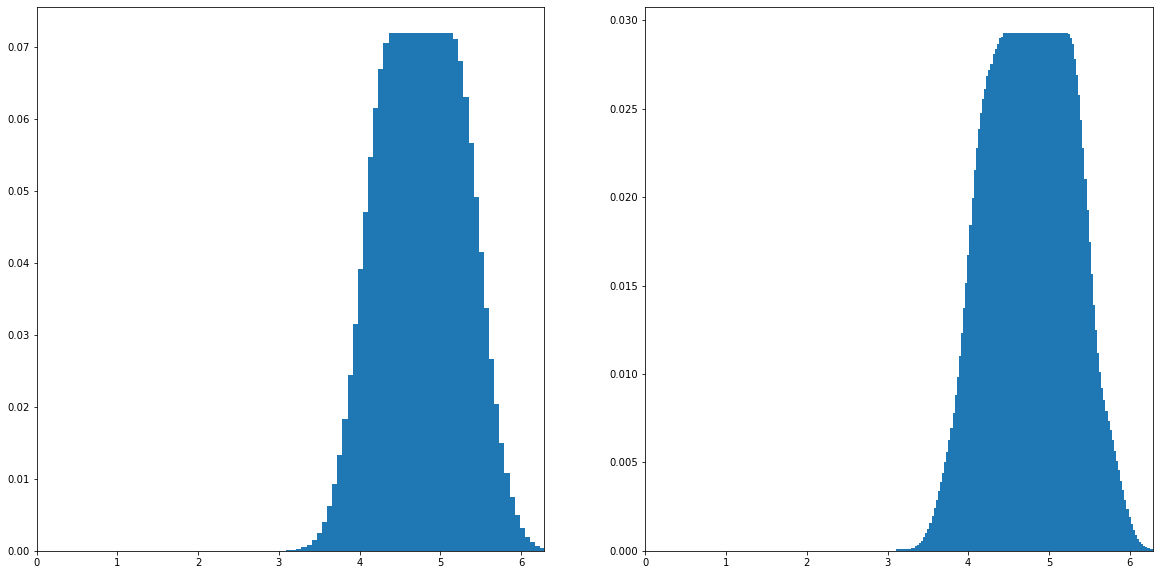

True omega: 4.330127, prediction by NN: 4.330126, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  3.6414140370396826 ======================================


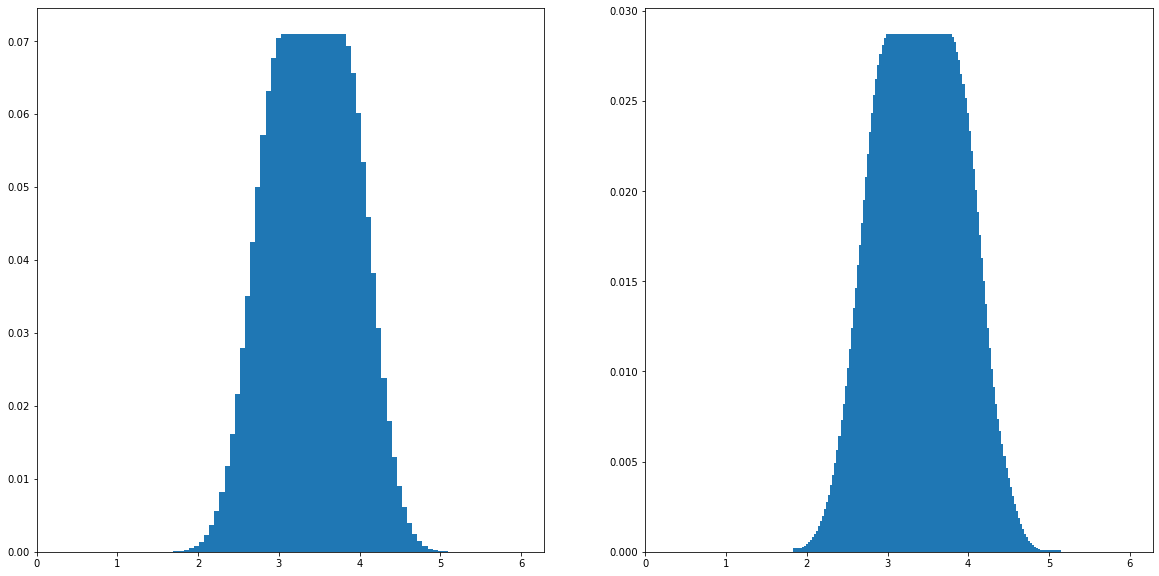

True omega: 3.641414, prediction by NN: 3.641414, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  6.016123512380825 ======================================


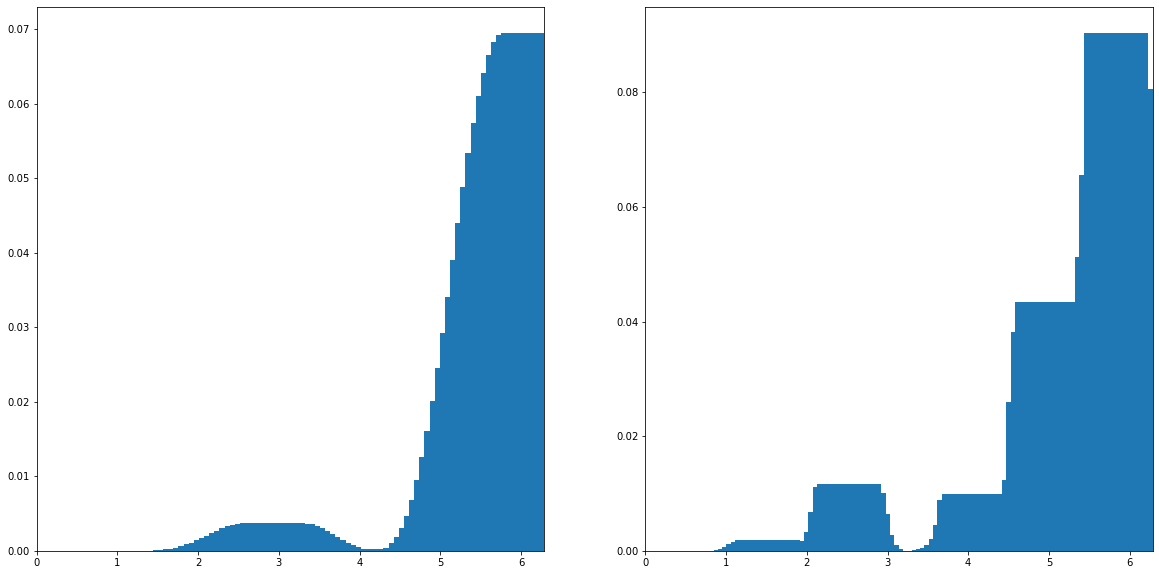

True omega: 6.016124, prediction by NN: 6.016124, num of resample calls: 20
==============NEW EXPERIMENT WITH OMEGA =  2.622941676927838 ======================================


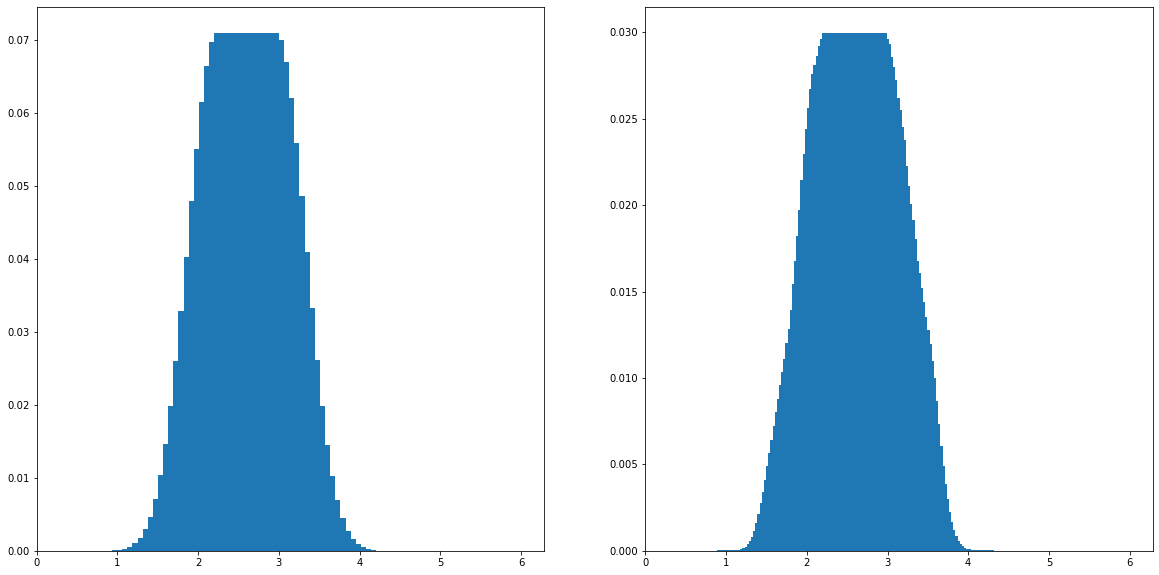

True omega: 2.622942, prediction by NN: 2.622940, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  5.4062286817133876 ======================================


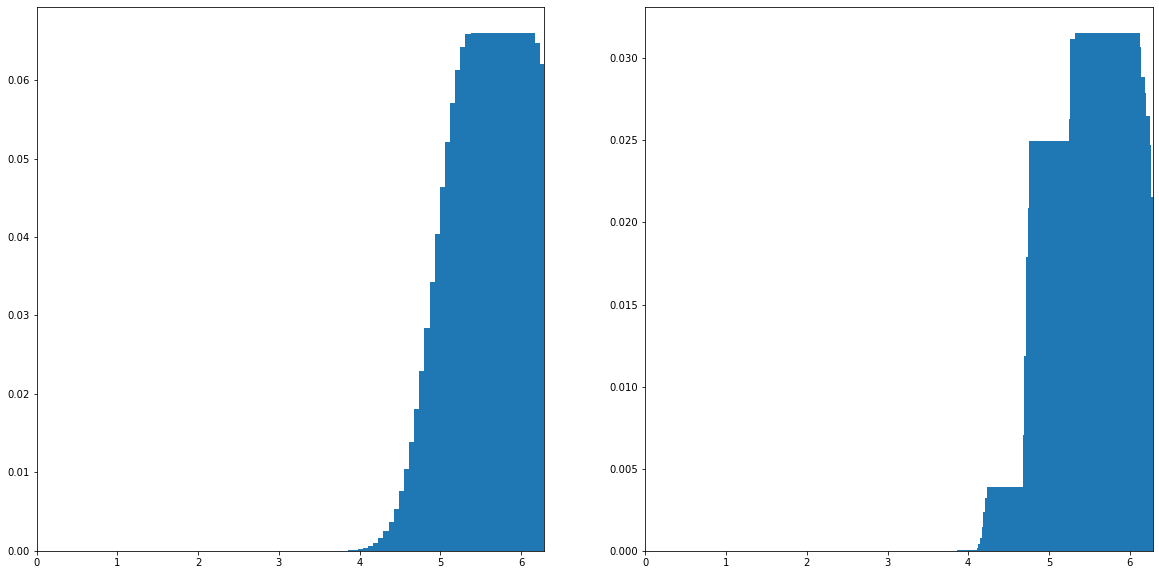

True omega: 5.406229, prediction by NN: 5.406231, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  2.9572751770729853 ======================================


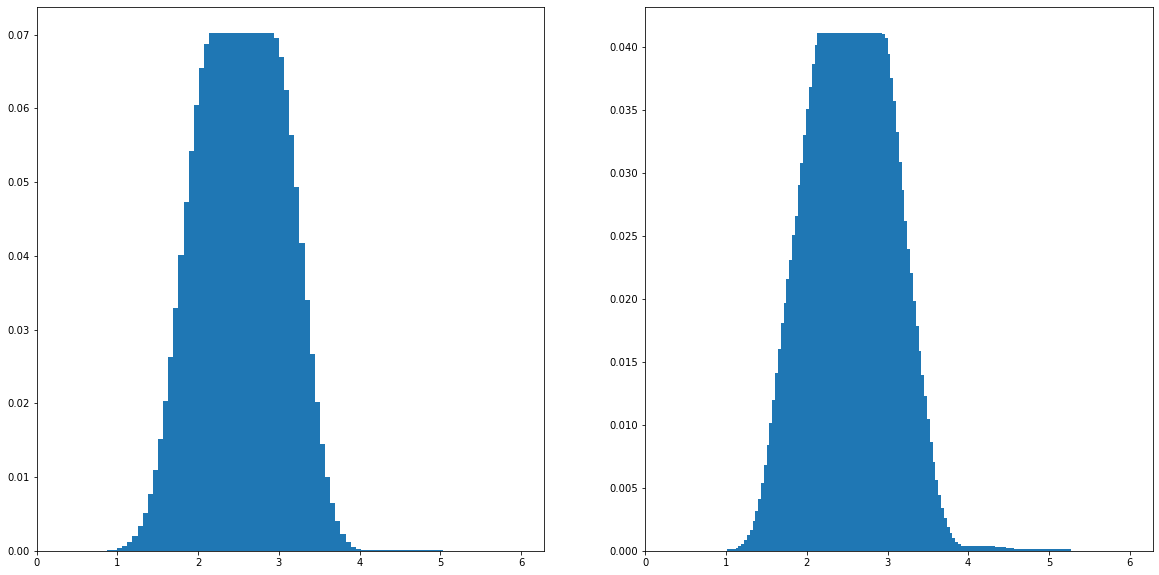

True omega: 2.957275, prediction by NN: 2.957266, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  6.18454663417552 ======================================


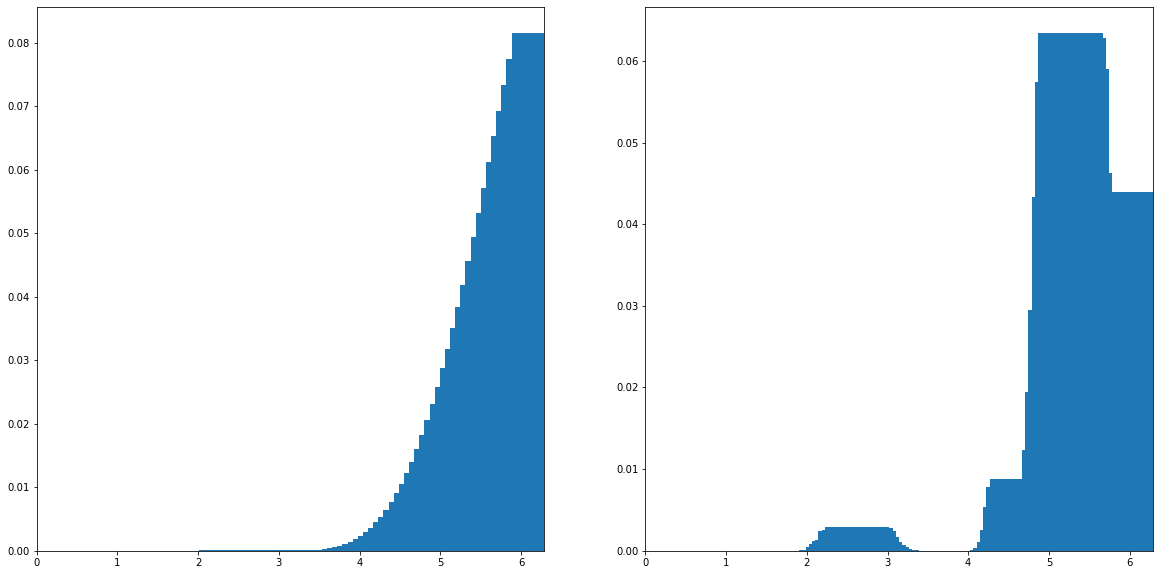

True omega: 6.184547, prediction by NN: 6.184548, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  1.3558365927615812 ======================================


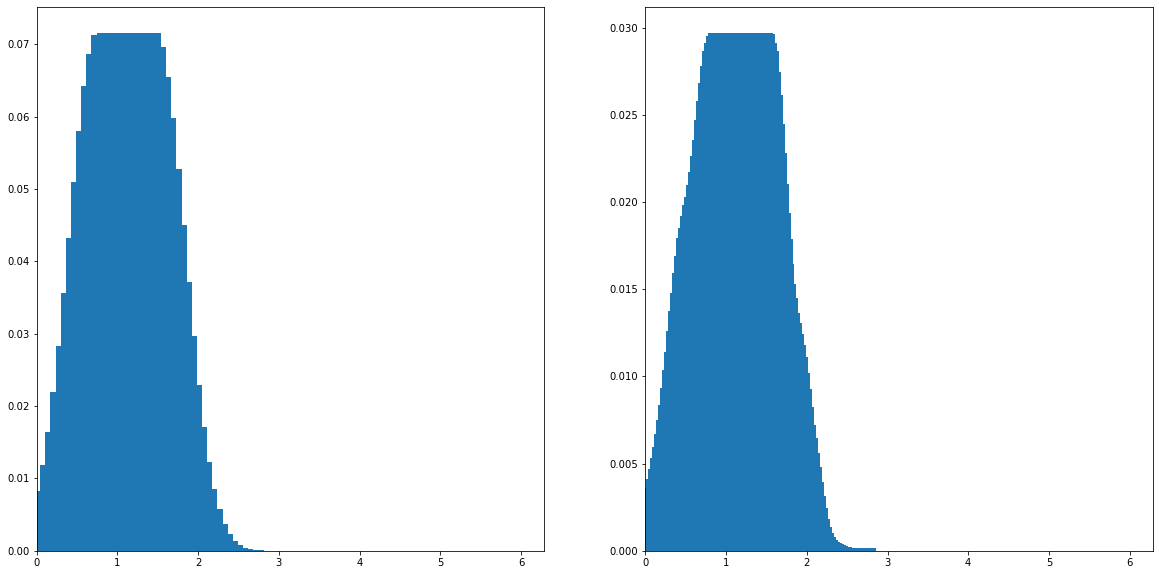

True omega: 1.355837, prediction by NN: 1.355836, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  0.005172166241076465 ======================================


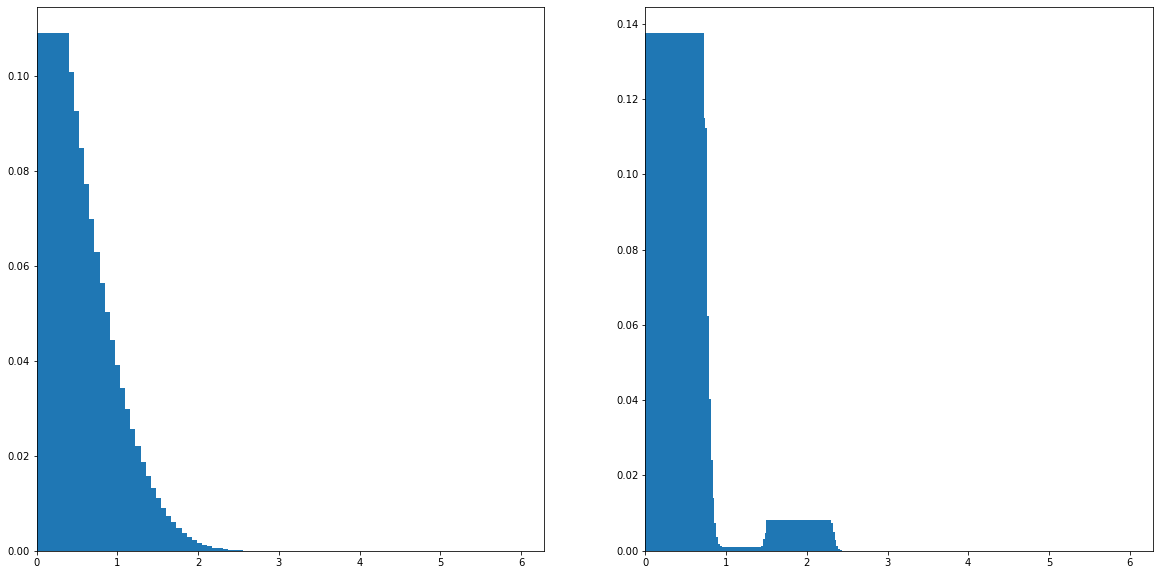

True omega: 0.005172, prediction by NN: 1.016840, num of resample calls: 179
==============NEW EXPERIMENT WITH OMEGA =  1.3805985139626828 ======================================


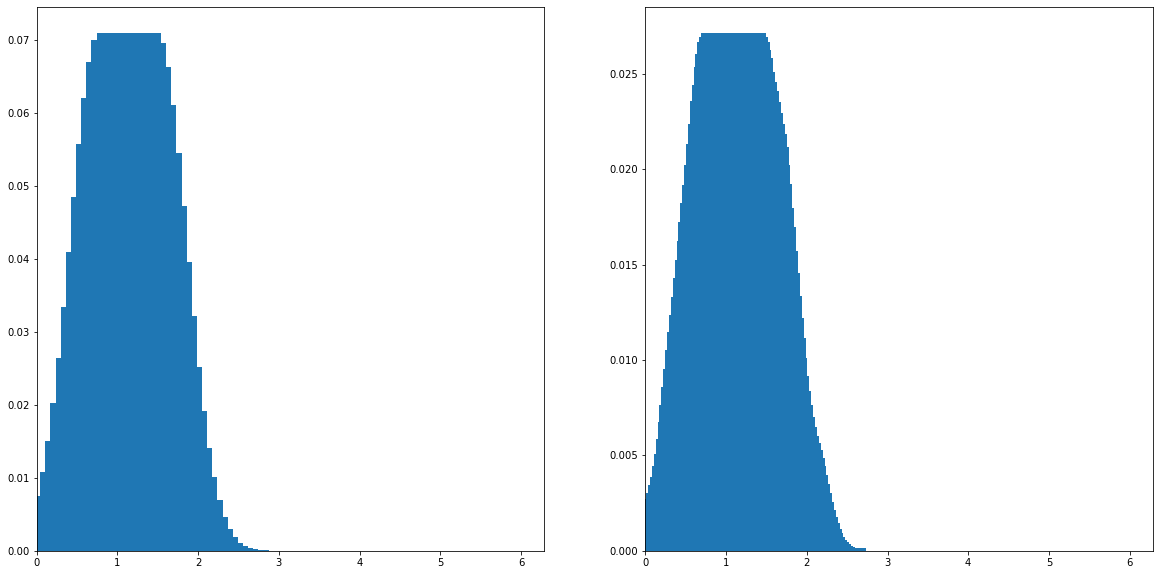

True omega: 1.380599, prediction by NN: 1.380599, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  1.265311063042046 ======================================


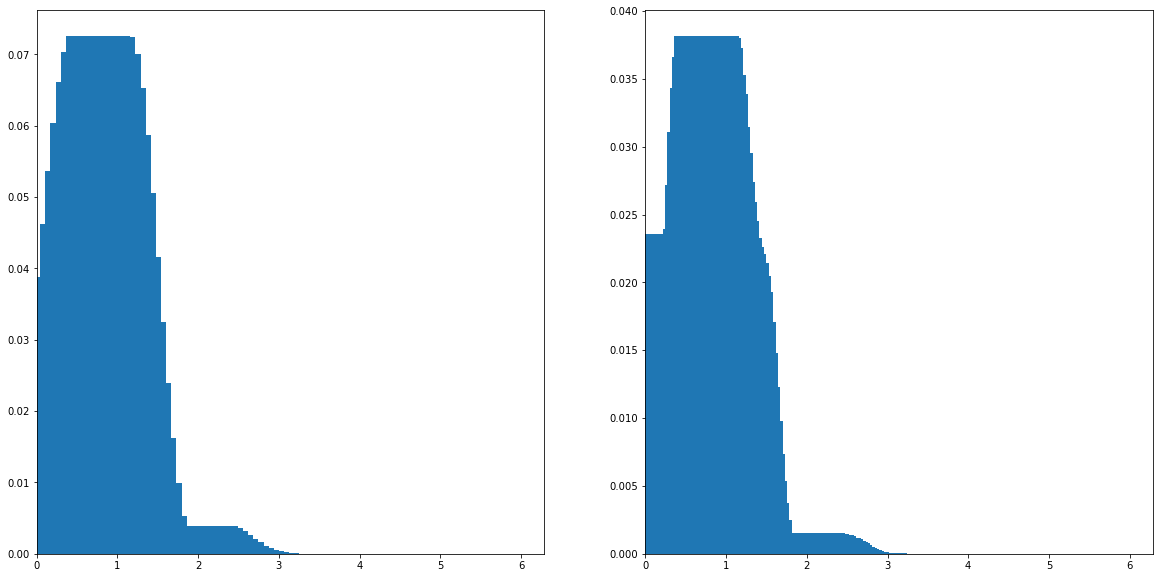

True omega: 1.265311, prediction by NN: 1.265308, num of resample calls: 22
==============NEW EXPERIMENT WITH OMEGA =  4.1576730340556445 ======================================


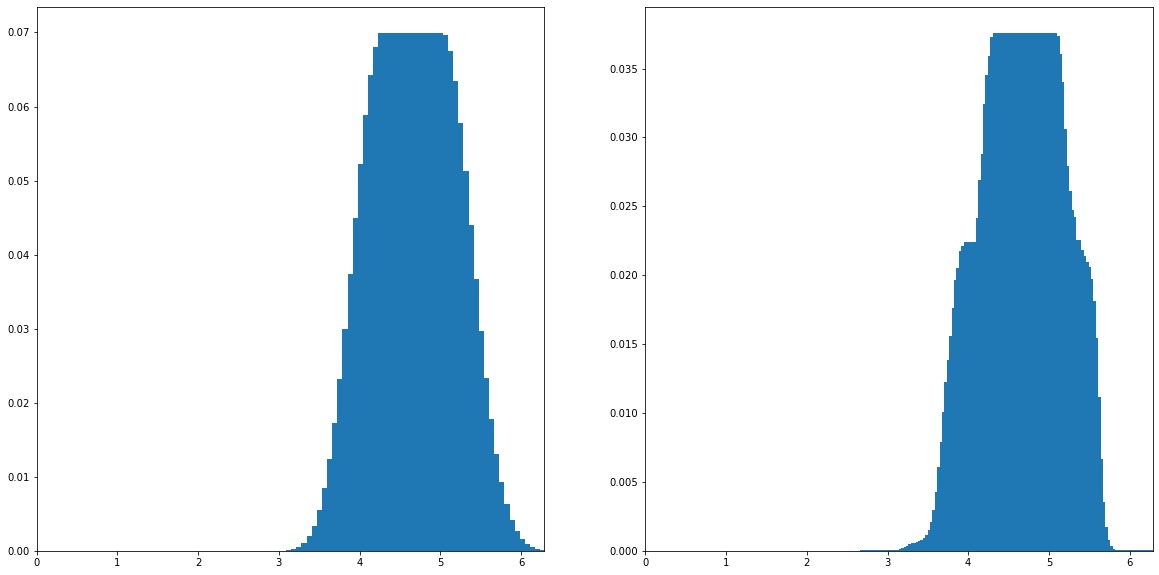

True omega: 4.157673, prediction by NN: 4.157673, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  0.07271753403186683 ======================================


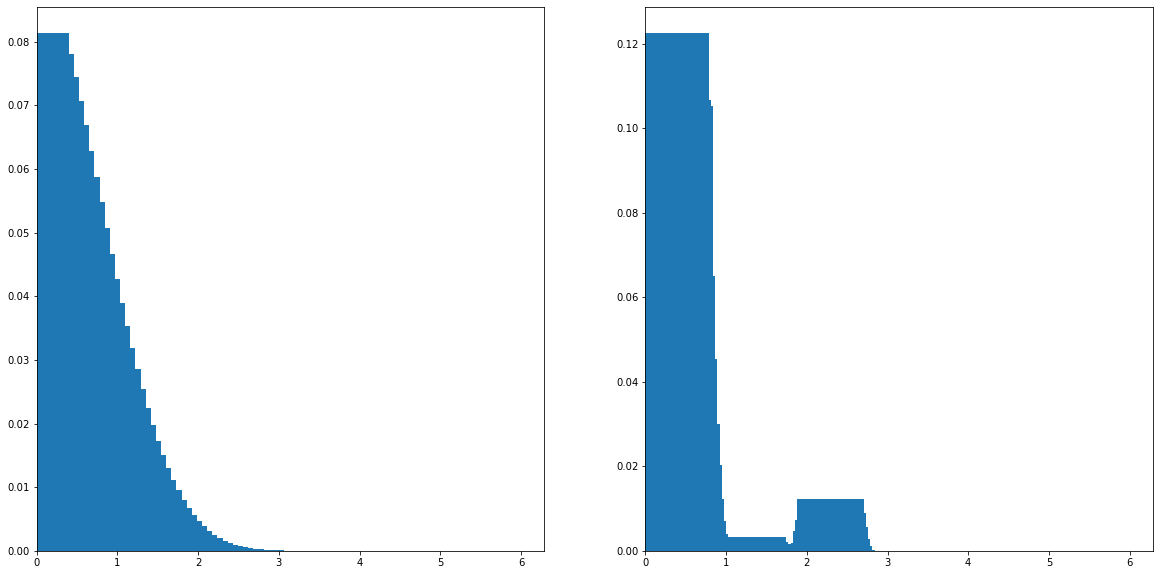

True omega: 0.072718, prediction by NN: 0.670605, num of resample calls: 144
==============NEW EXPERIMENT WITH OMEGA =  5.460332393453353 ======================================


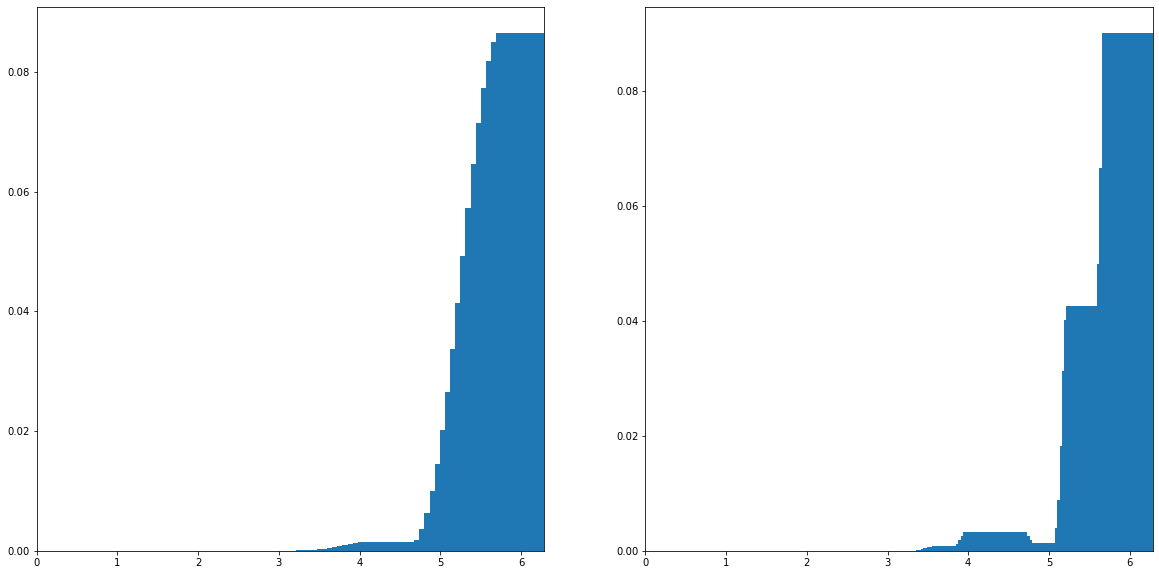

True omega: 5.460332, prediction by NN: 5.460331, num of resample calls: 25
==============NEW EXPERIMENT WITH OMEGA =  1.2606090187722188 ======================================


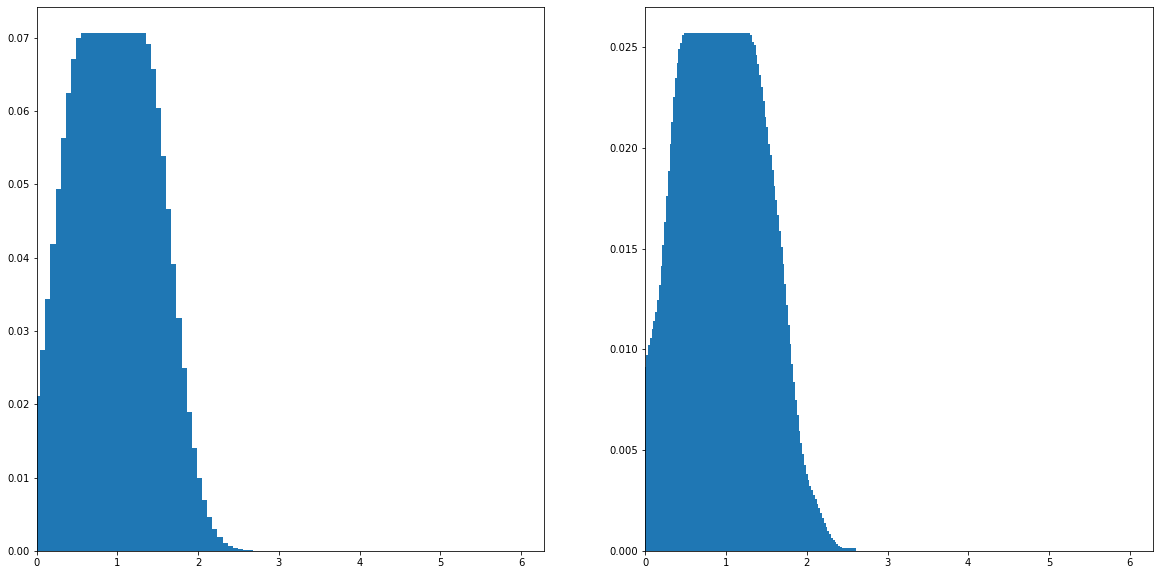

True omega: 1.260609, prediction by NN: 1.260609, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  0.9237603550881176 ======================================


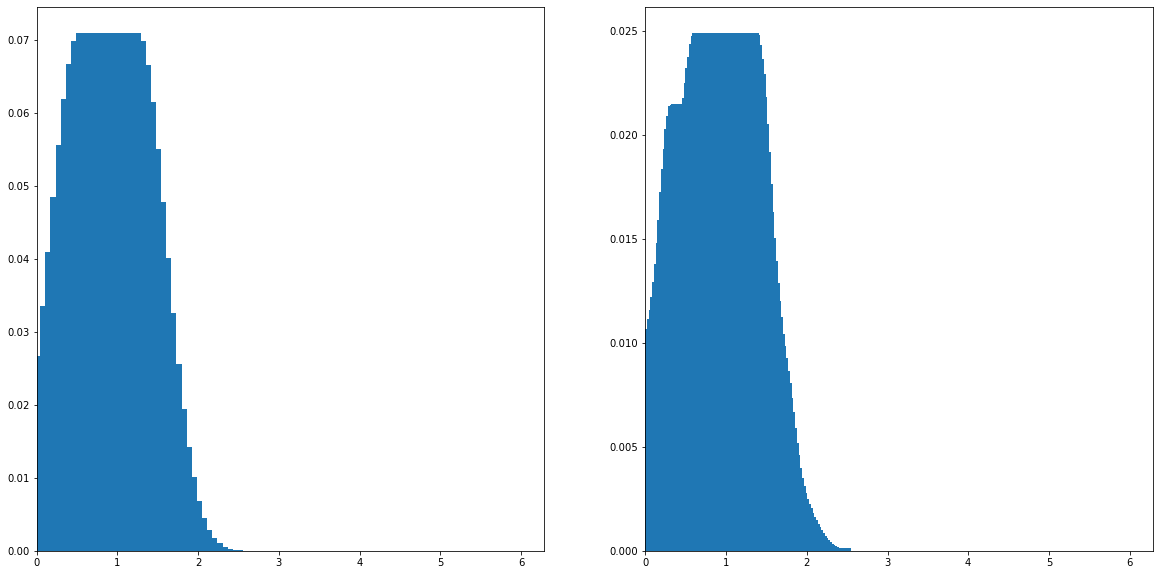

True omega: 0.923760, prediction by NN: 0.923760, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  1.1538534818028943 ======================================


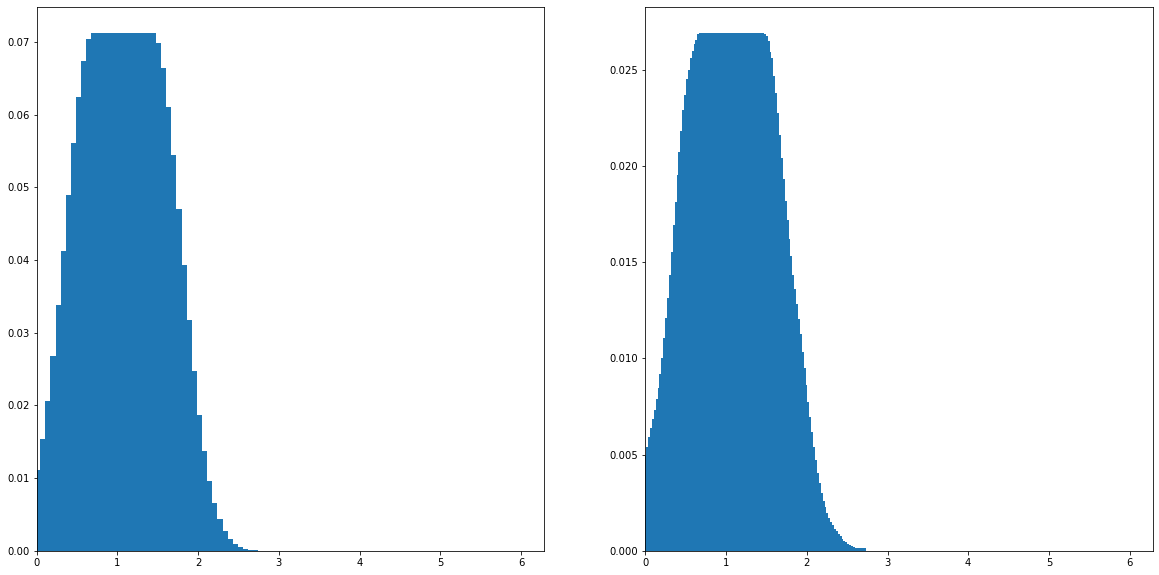

True omega: 1.153853, prediction by NN: 1.153890, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  0.06121805097748532 ======================================


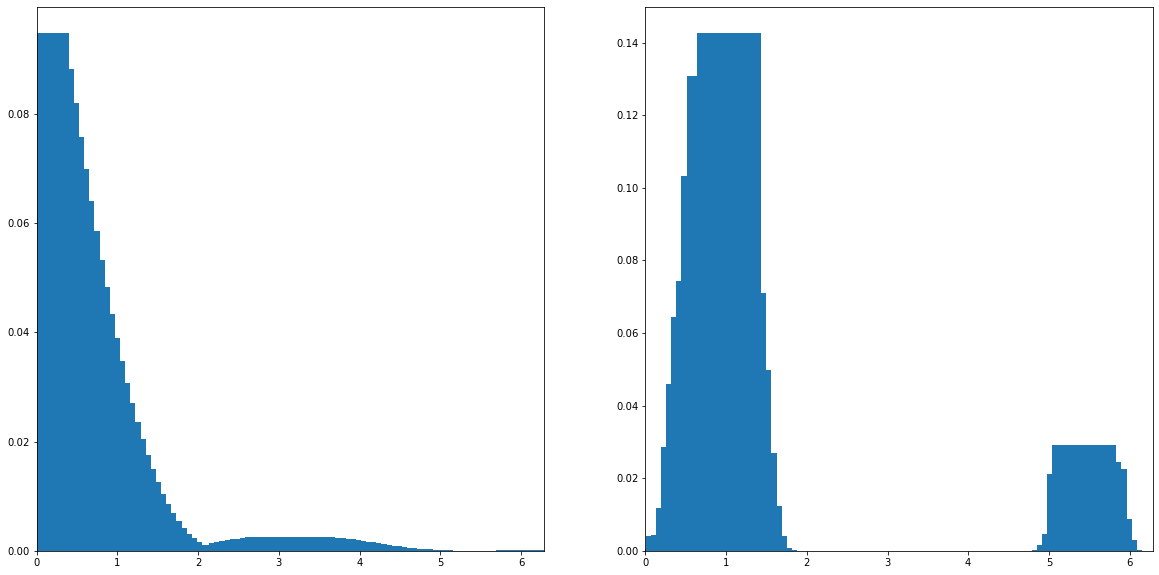

True omega: 0.061218, prediction by NN: 2.083073, num of resample calls: 269
==============NEW EXPERIMENT WITH OMEGA =  5.58847002080516 ======================================


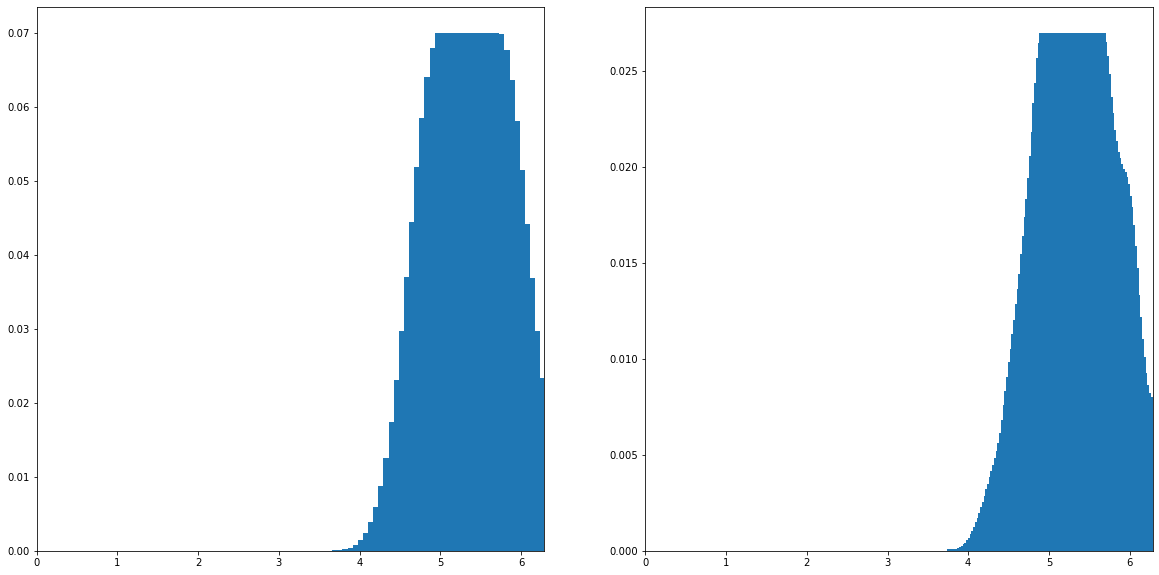

True omega: 5.588470, prediction by NN: 5.588462, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  6.034876170338728 ======================================


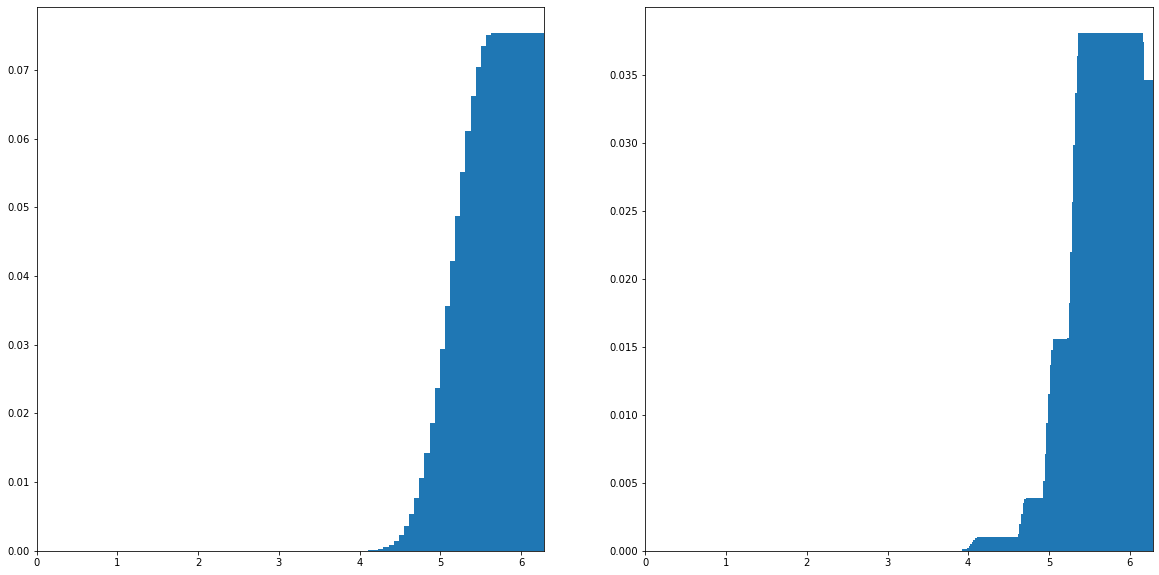

True omega: 6.034876, prediction by NN: 6.034876, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  3.2144997323494113 ======================================


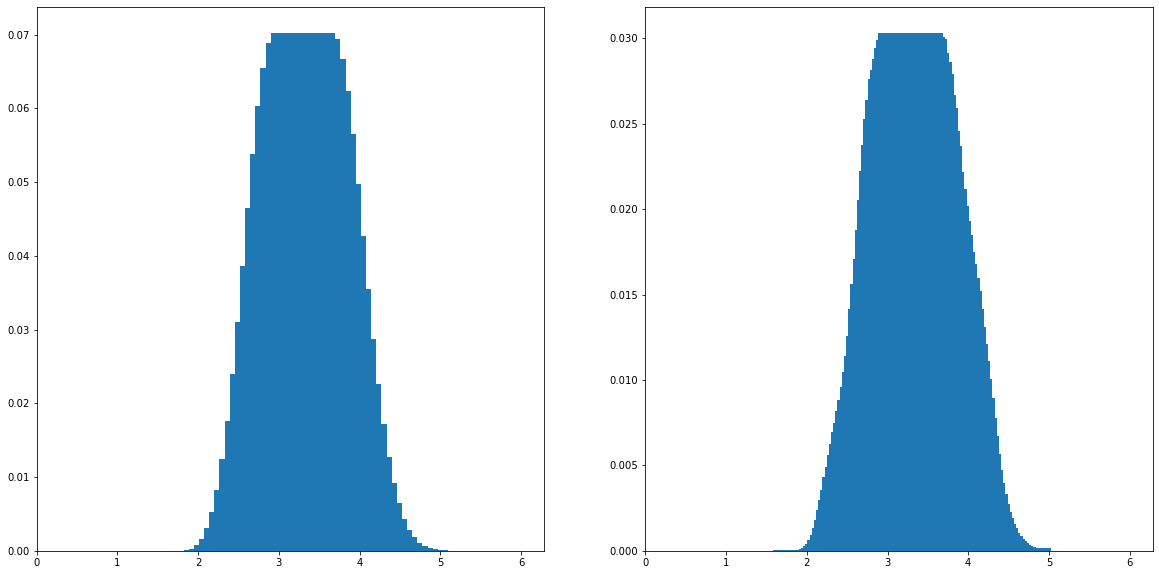

True omega: 3.214500, prediction by NN: 3.214498, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  5.309386400891626 ======================================


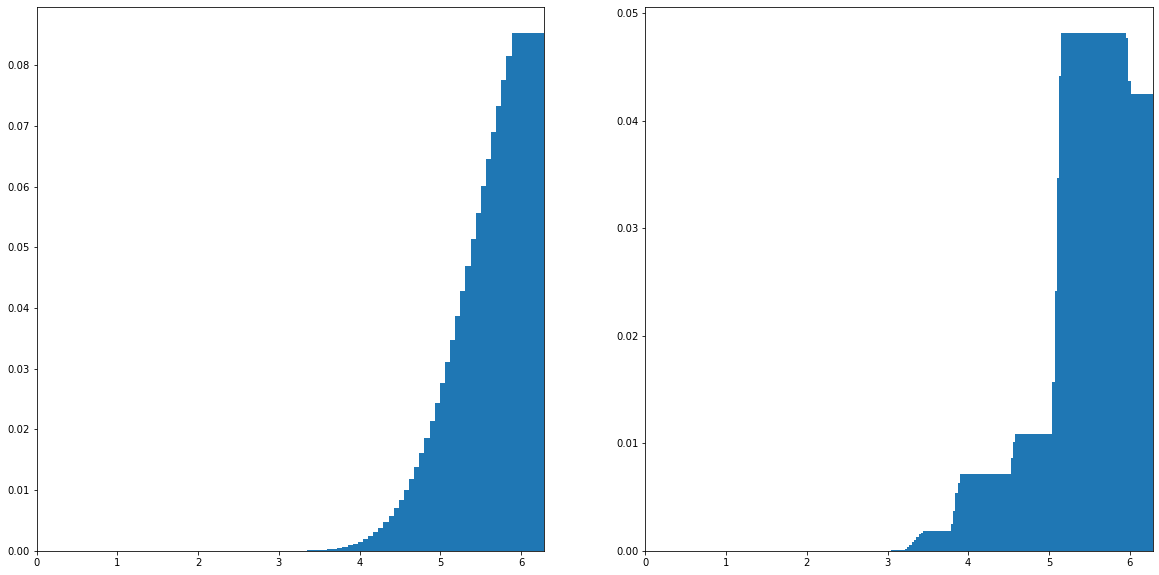

True omega: 5.309386, prediction by NN: 5.309361, num of resample calls: 20
==============NEW EXPERIMENT WITH OMEGA =  4.6540960134631355 ======================================


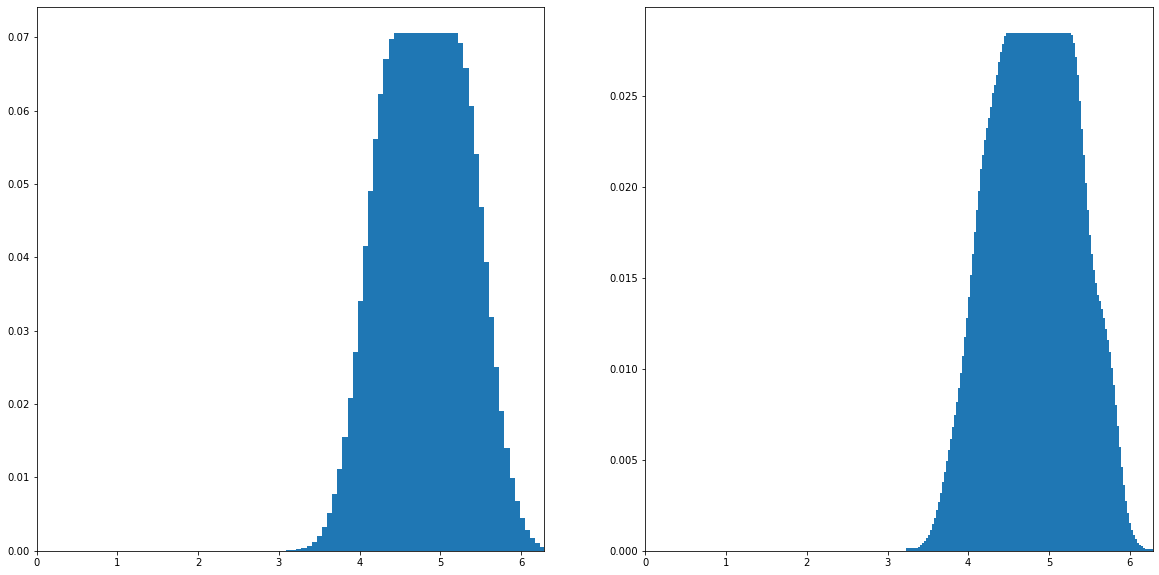

True omega: 4.654096, prediction by NN: 4.654097, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  1.145768261716736 ======================================


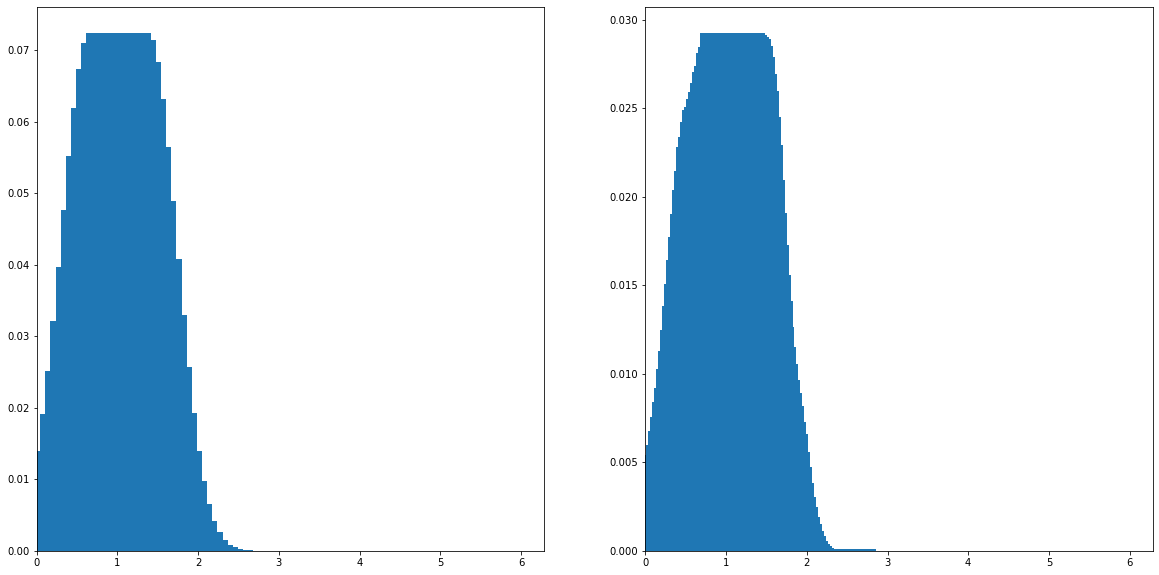

True omega: 1.145768, prediction by NN: 1.145768, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  1.27124403050545 ======================================


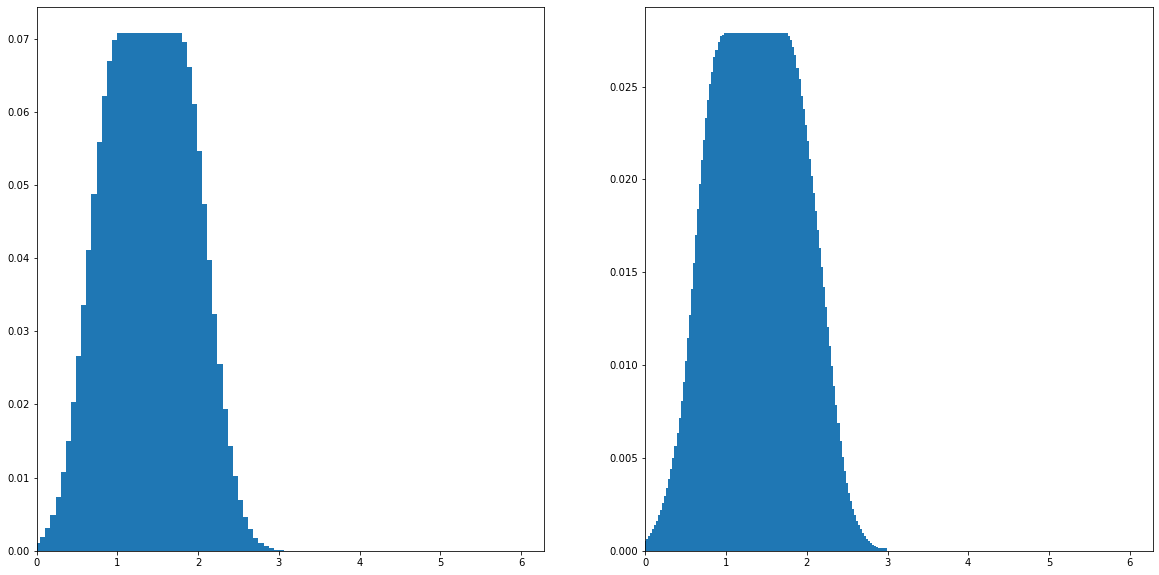

True omega: 1.271244, prediction by NN: 1.271244, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  6.120252841268137 ======================================


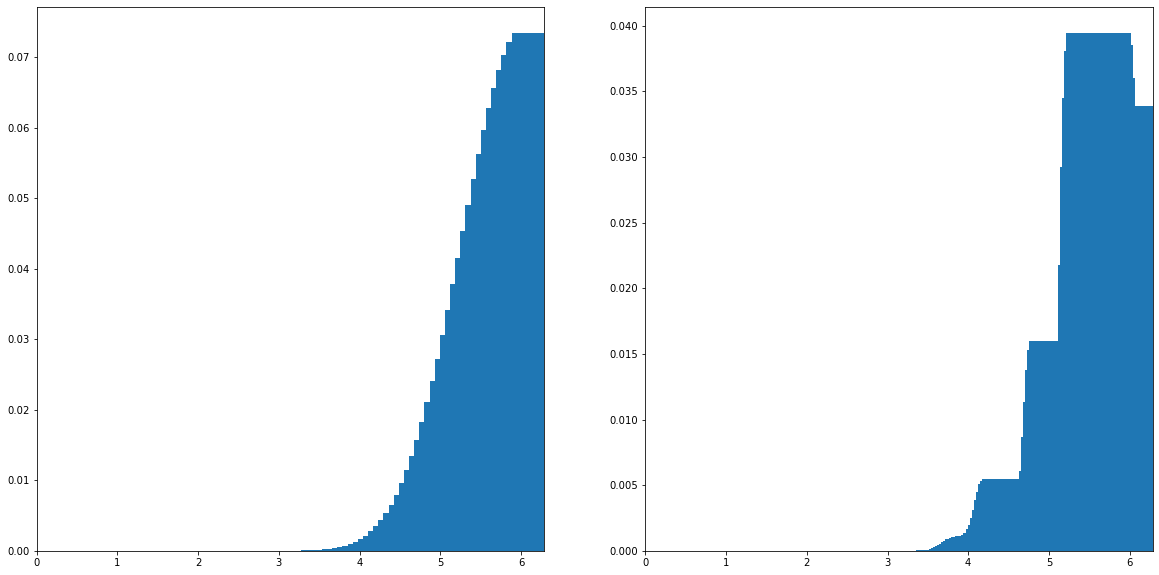

True omega: 6.120253, prediction by NN: 6.120269, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  3.80330717207967 ======================================


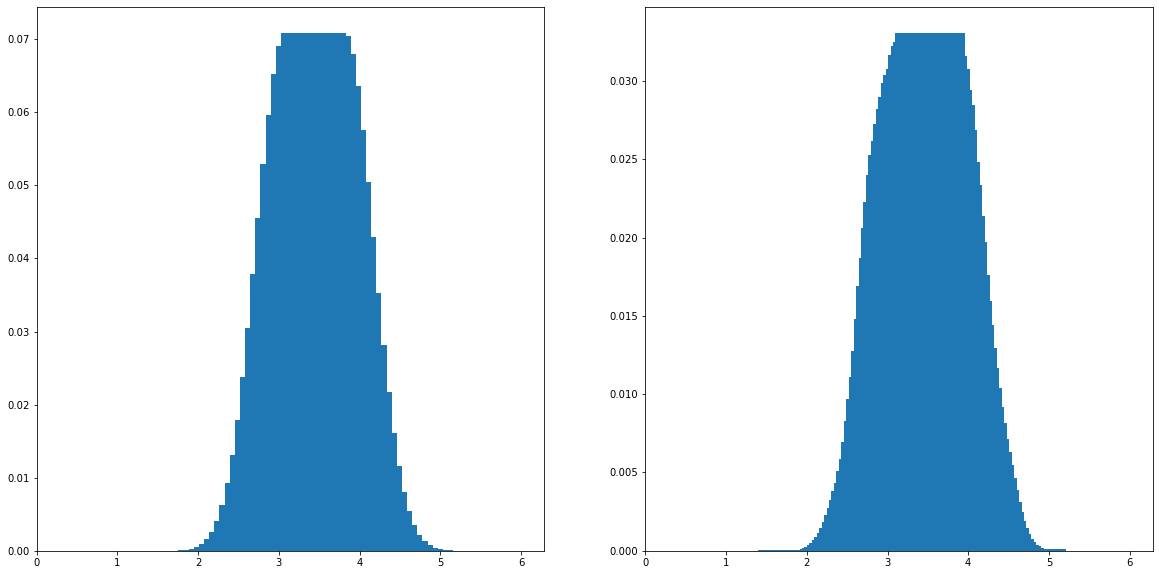

True omega: 3.803307, prediction by NN: 3.803307, num of resample calls: 30
==============NEW EXPERIMENT WITH OMEGA =  3.9187866853878304 ======================================


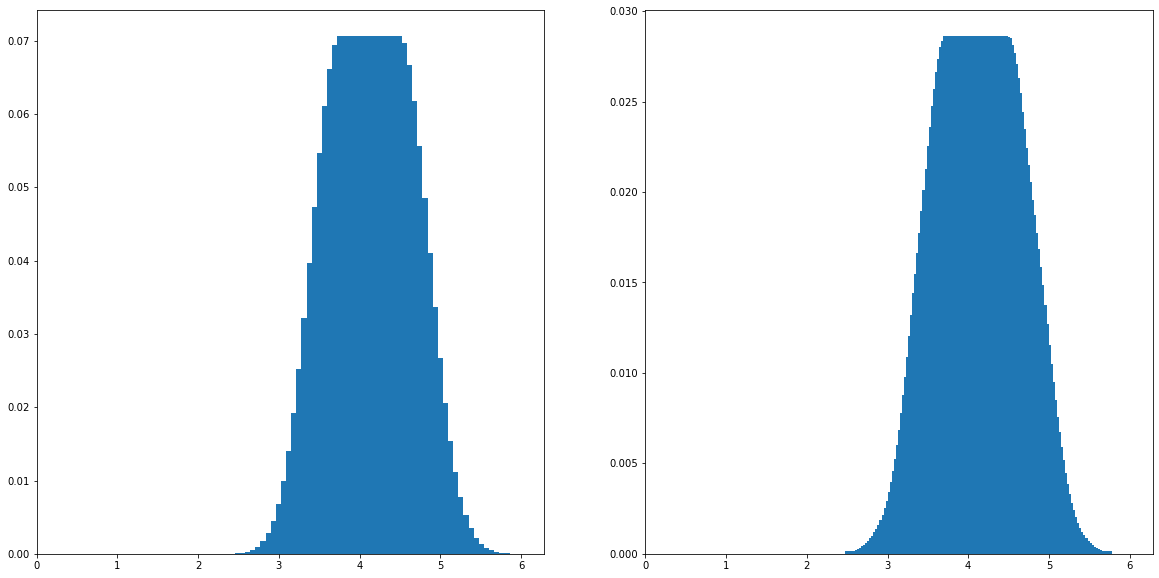

True omega: 3.918787, prediction by NN: 3.918780, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  5.506540659151653 ======================================


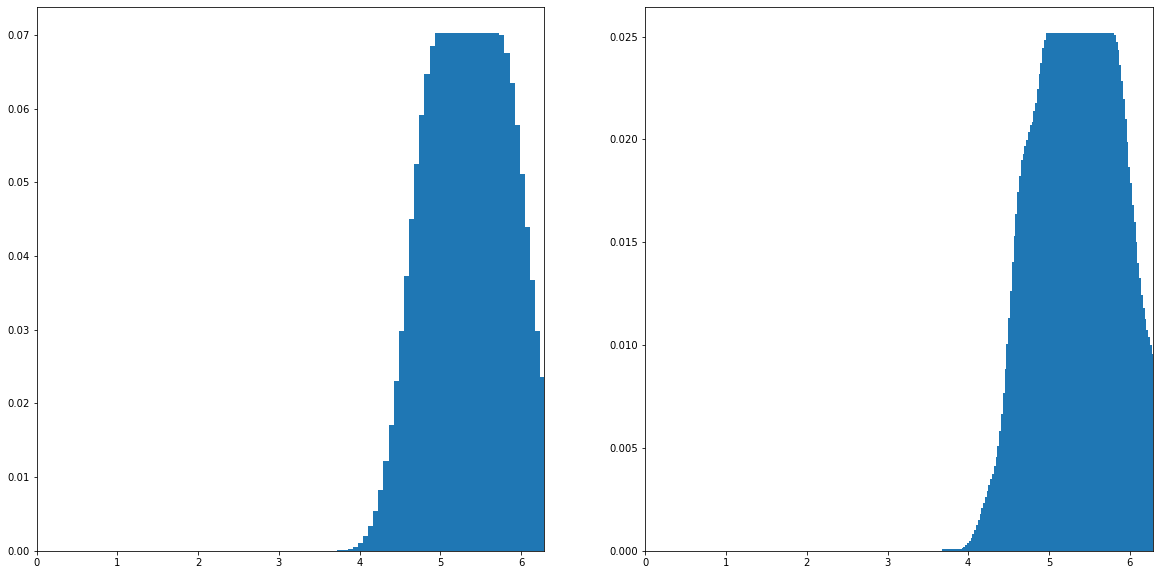

True omega: 5.506541, prediction by NN: 5.506542, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  2.9693055064616694 ======================================


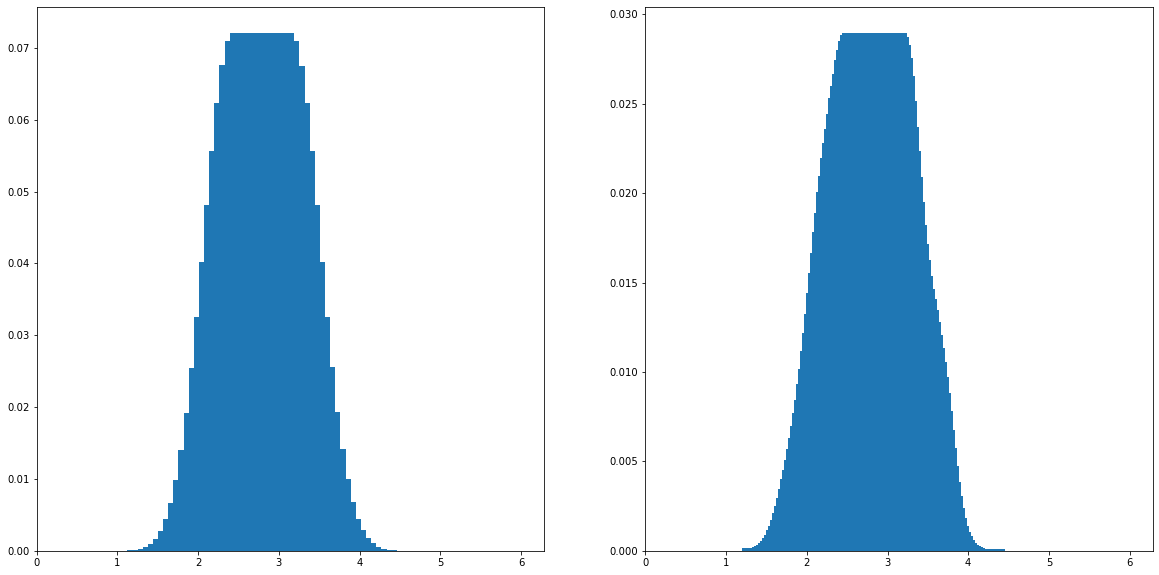

True omega: 2.969306, prediction by NN: 2.969304, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  1.505358252720506 ======================================


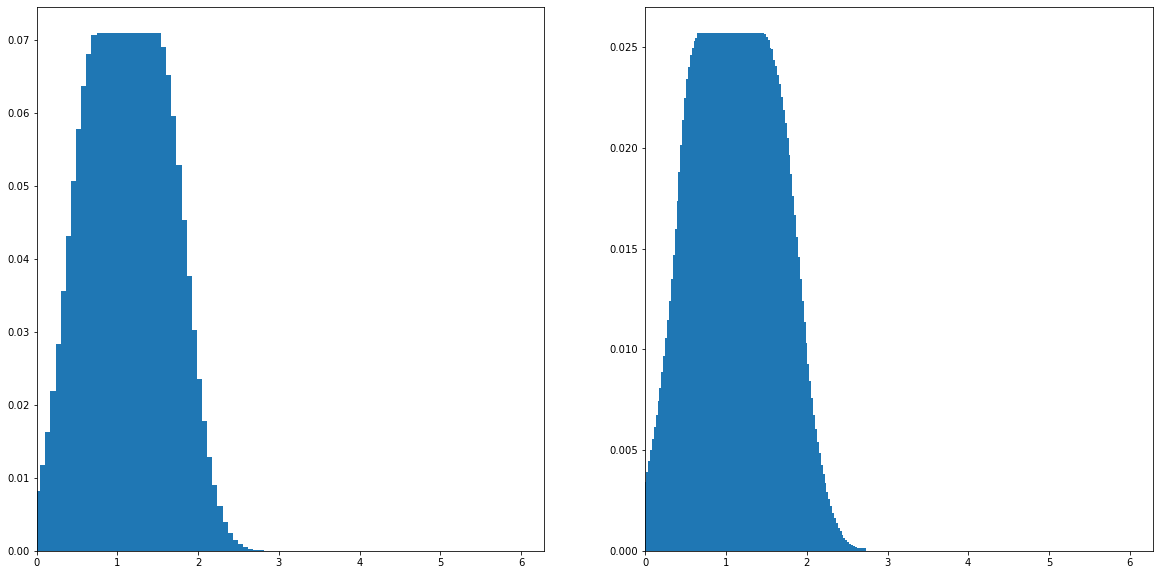

True omega: 1.505358, prediction by NN: 1.505359, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.145785387891441 ======================================


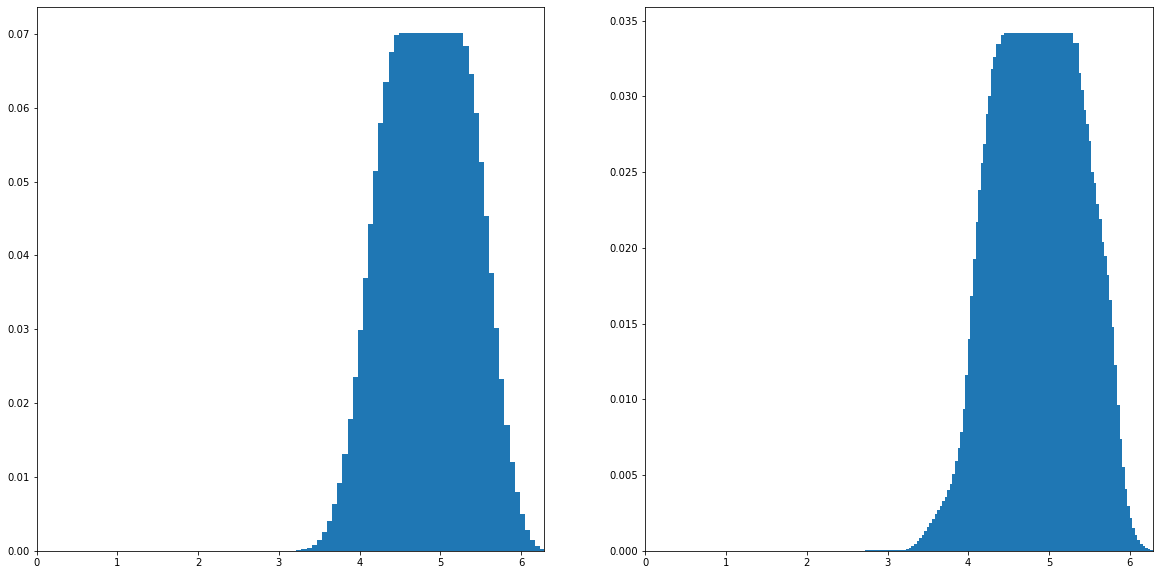

True omega: 5.145785, prediction by NN: 5.145785, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  5.5299961933499215 ======================================


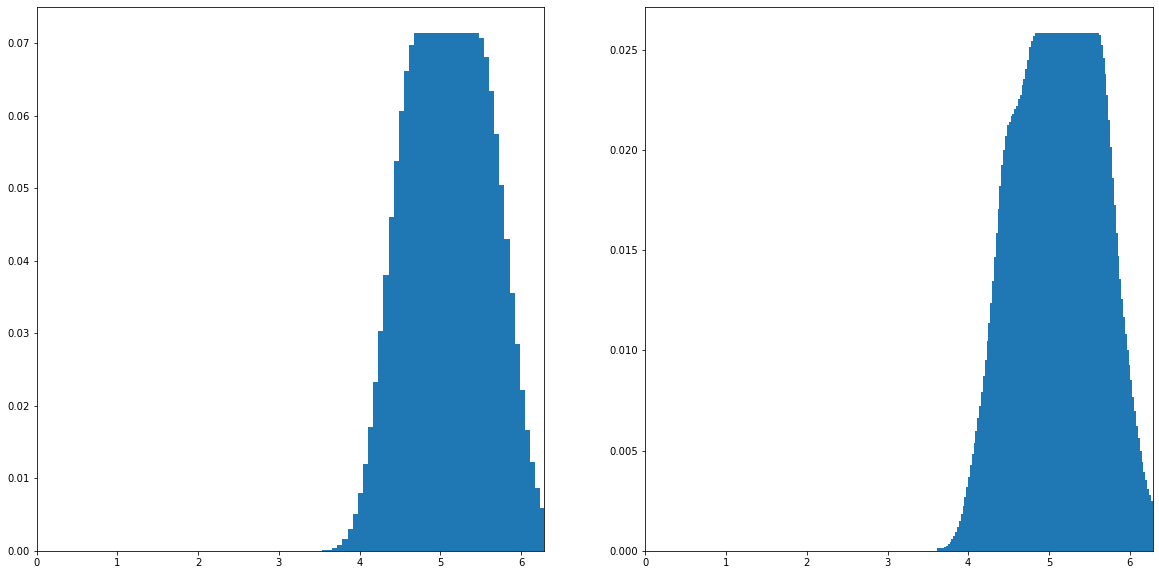

True omega: 5.529996, prediction by NN: 5.529996, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  3.5609428184537792 ======================================


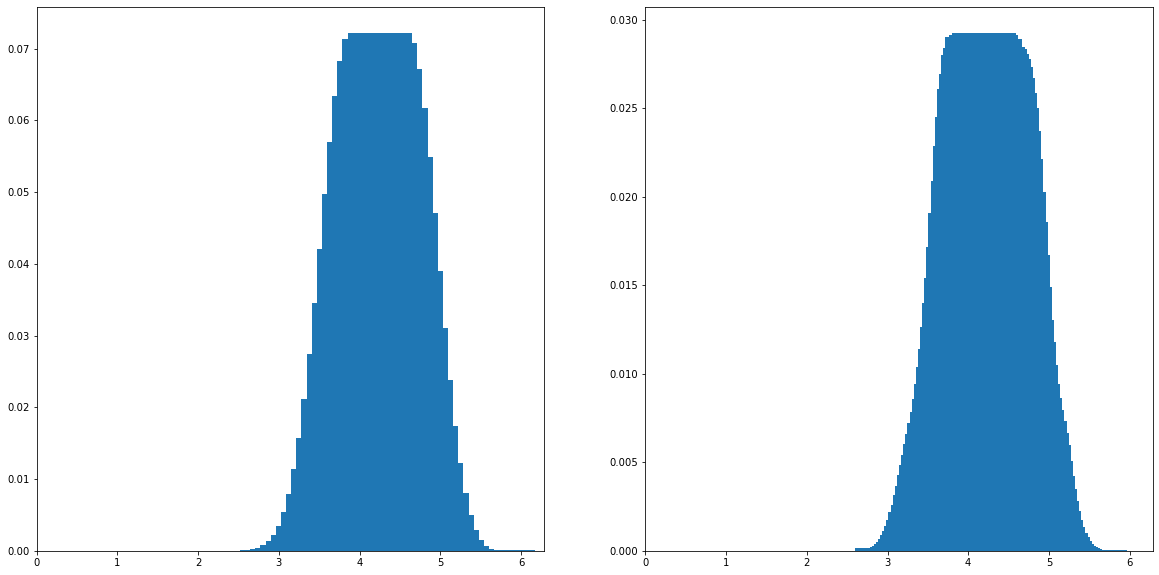

True omega: 3.560943, prediction by NN: 3.560943, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  5.142555770384451 ======================================


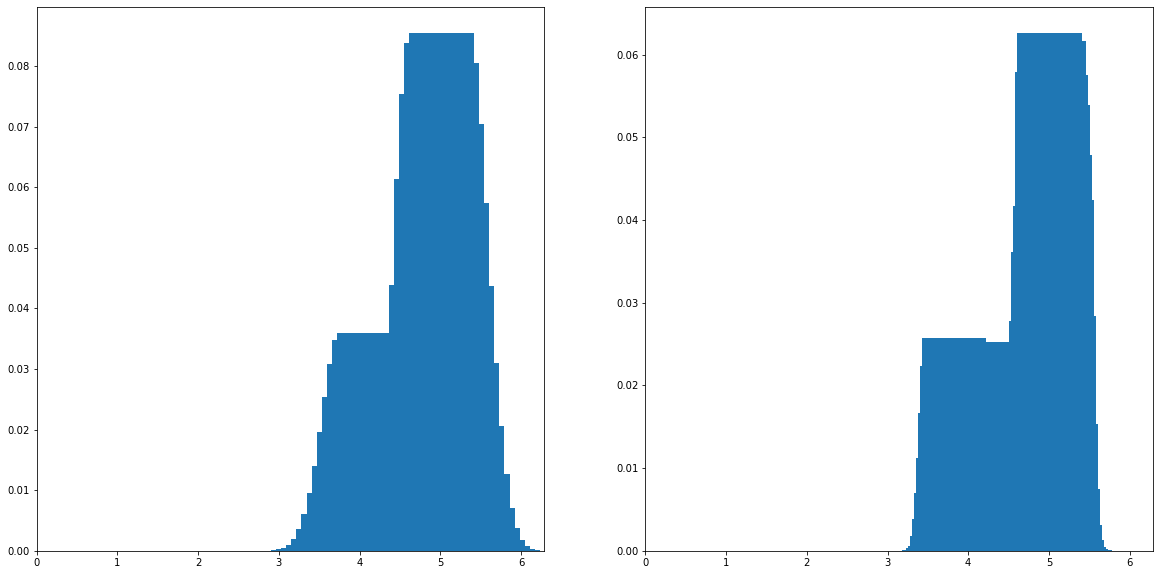

True omega: 5.142556, prediction by NN: 5.142557, num of resample calls: 20
==============NEW EXPERIMENT WITH OMEGA =  2.675843858600426 ======================================


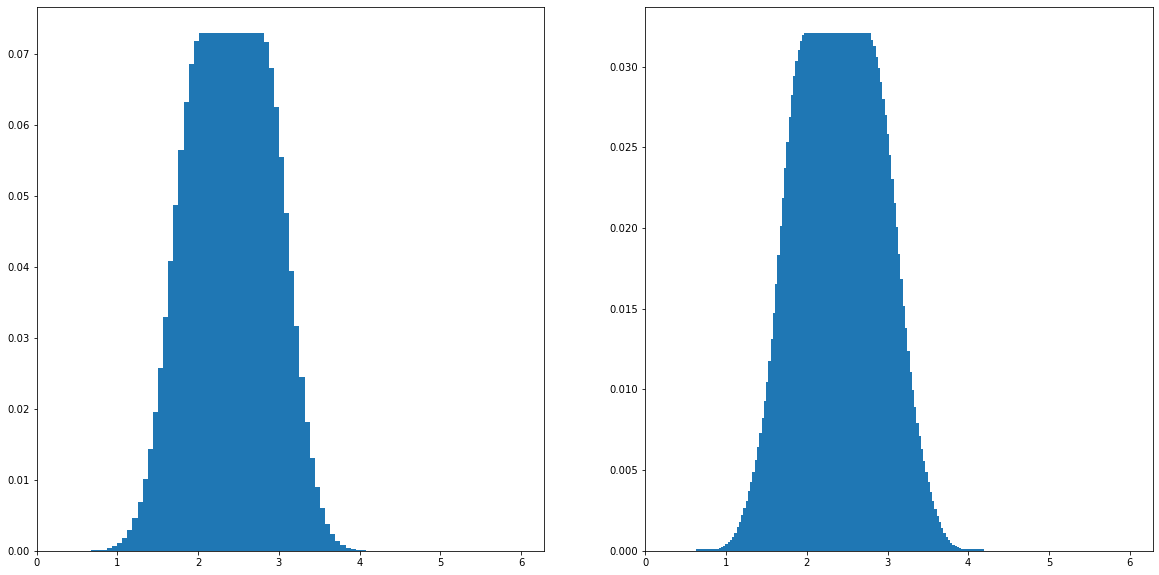

True omega: 2.675844, prediction by NN: 2.675844, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  5.202166963272015 ======================================


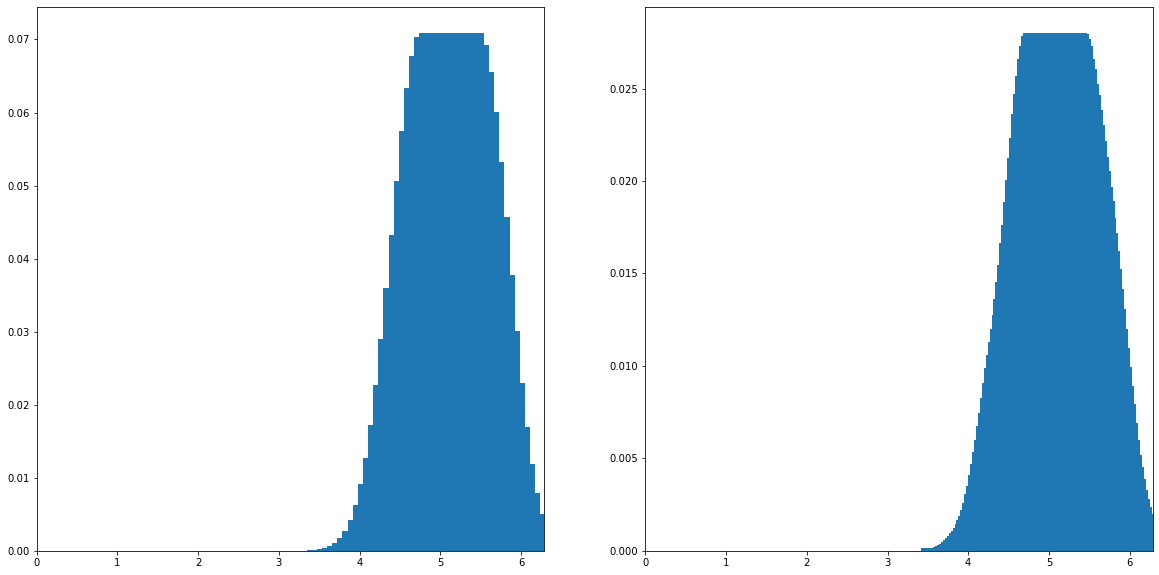

True omega: 5.202167, prediction by NN: 5.202198, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  2.3512591420634488 ======================================


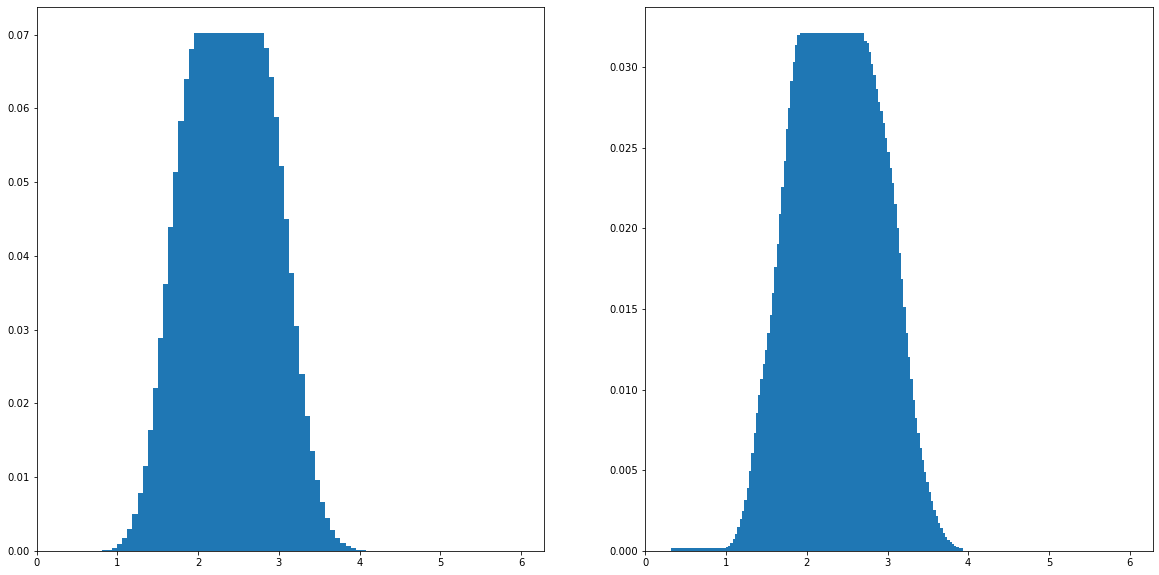

True omega: 2.351259, prediction by NN: 2.351259, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  0.9505385367711499 ======================================


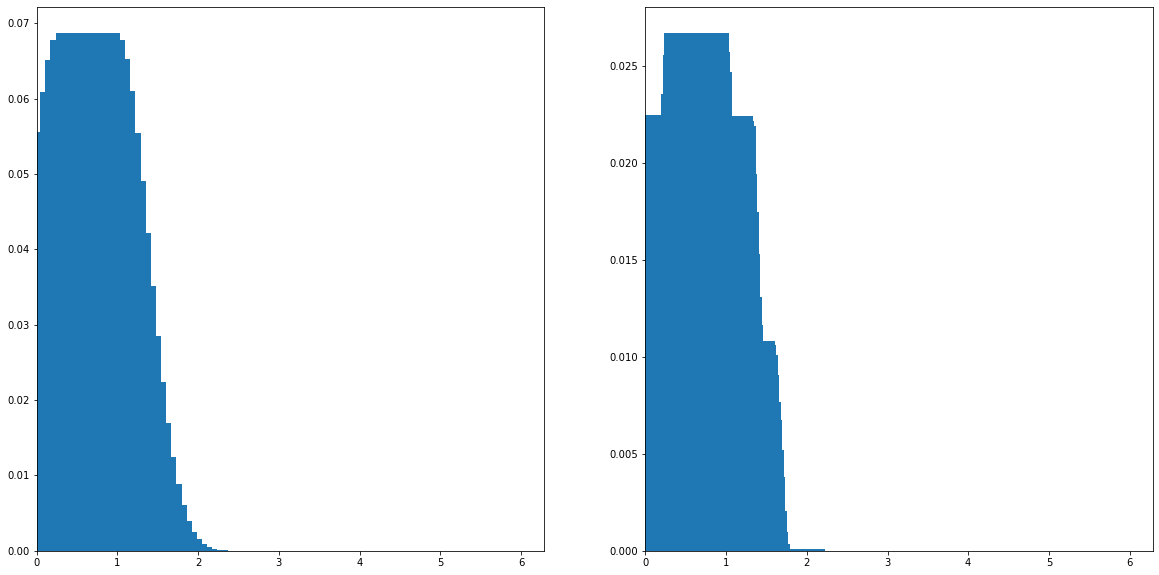

True omega: 0.950539, prediction by NN: 0.950538, num of resample calls: 21
==============NEW EXPERIMENT WITH OMEGA =  3.939383996780731 ======================================


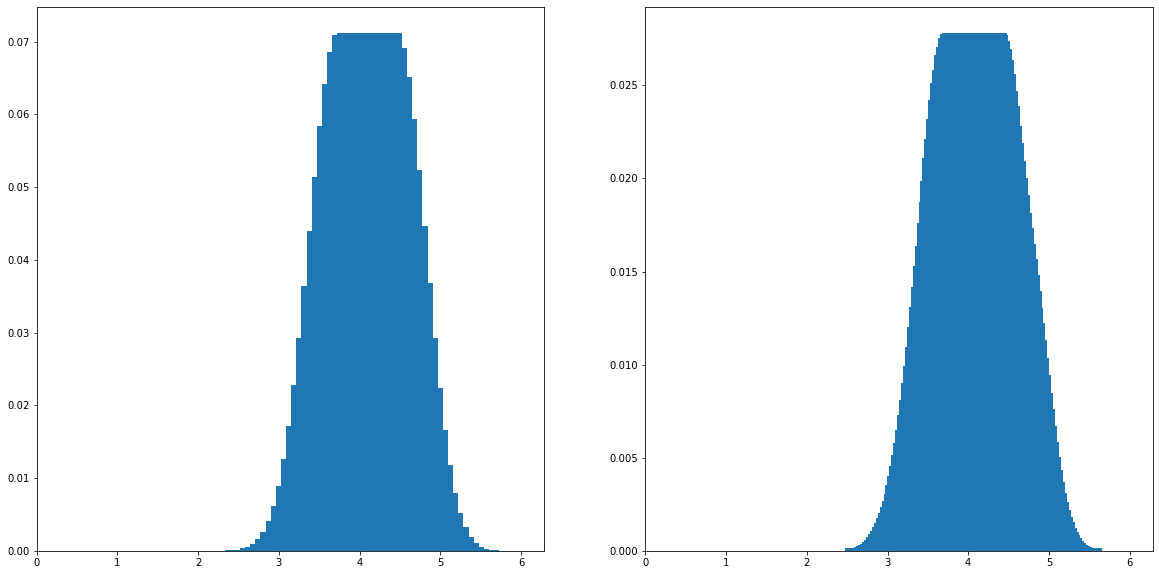

True omega: 3.939384, prediction by NN: 3.939389, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  3.6422880667647406 ======================================


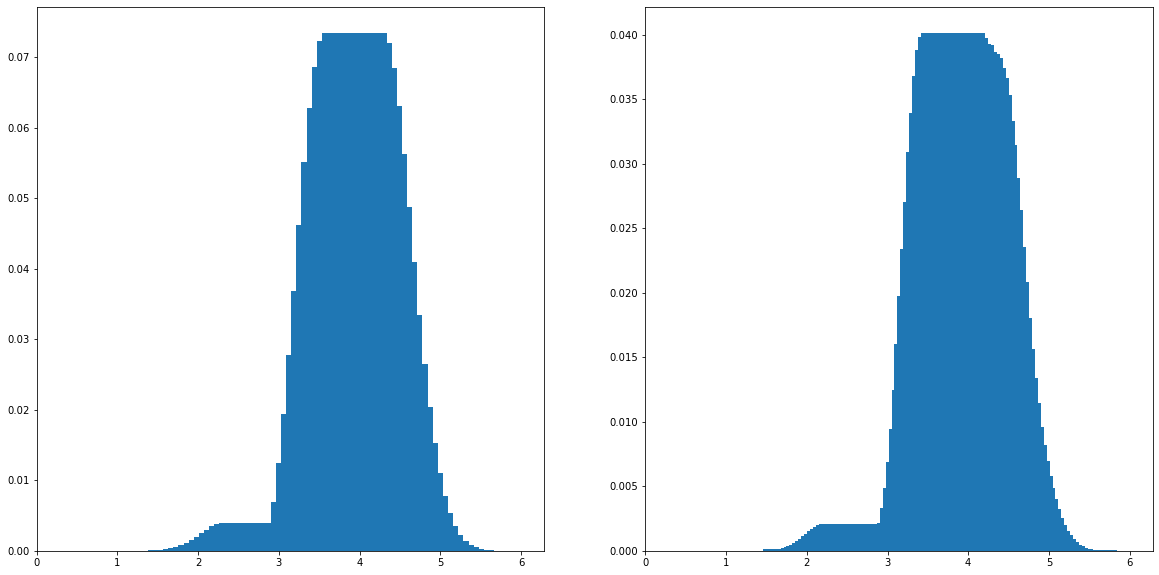

True omega: 3.642288, prediction by NN: 3.642293, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  2.430623616487711 ======================================


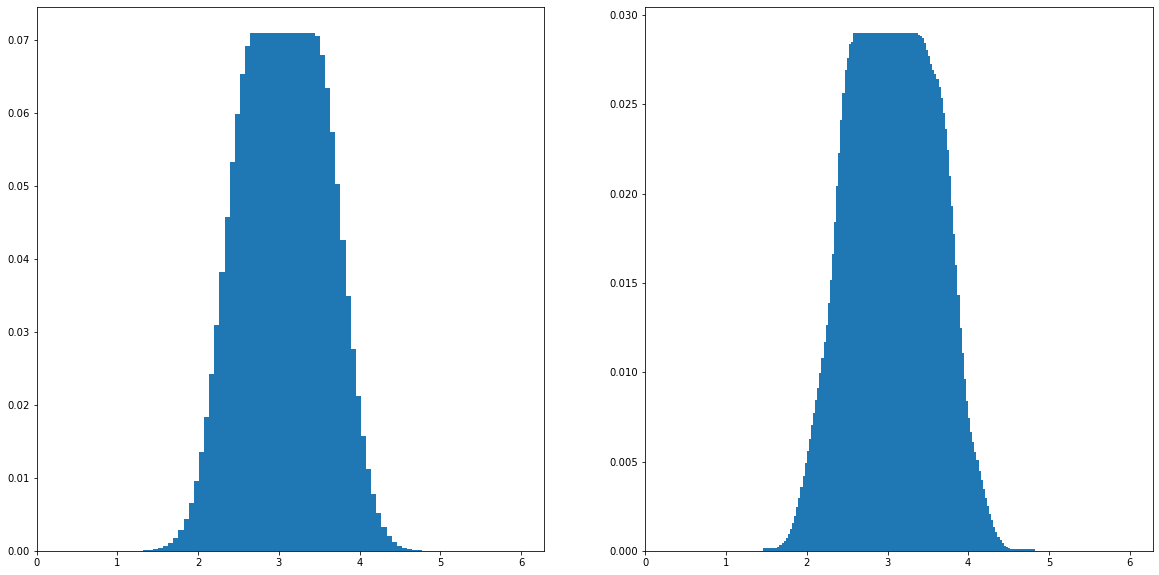

True omega: 2.430624, prediction by NN: 2.430623, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  1.673331661370171 ======================================


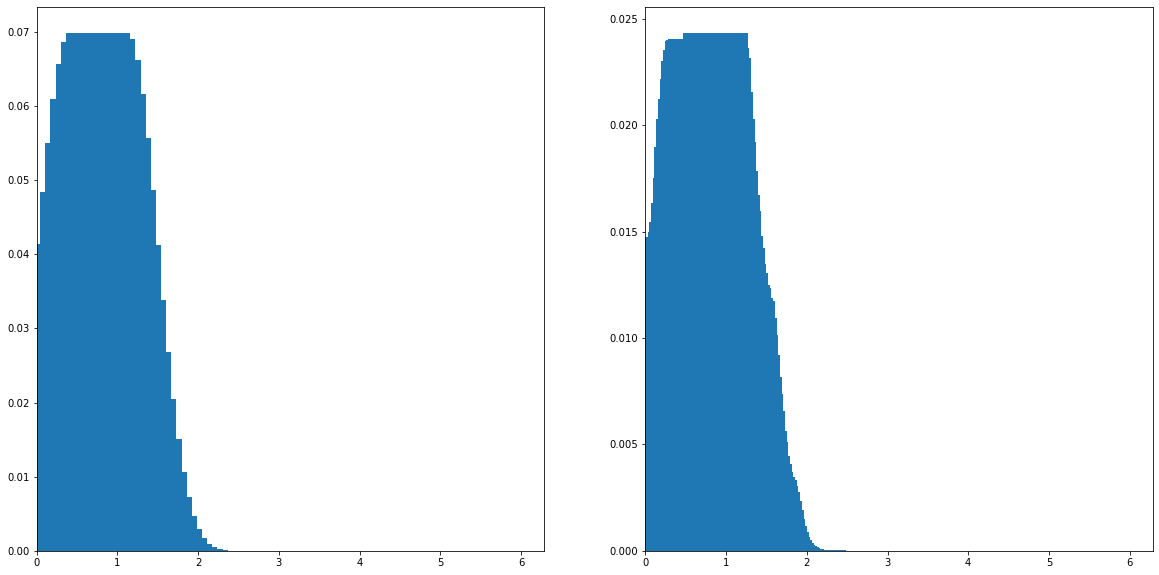

True omega: 1.673332, prediction by NN: 1.673333, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  4.595751132418598 ======================================


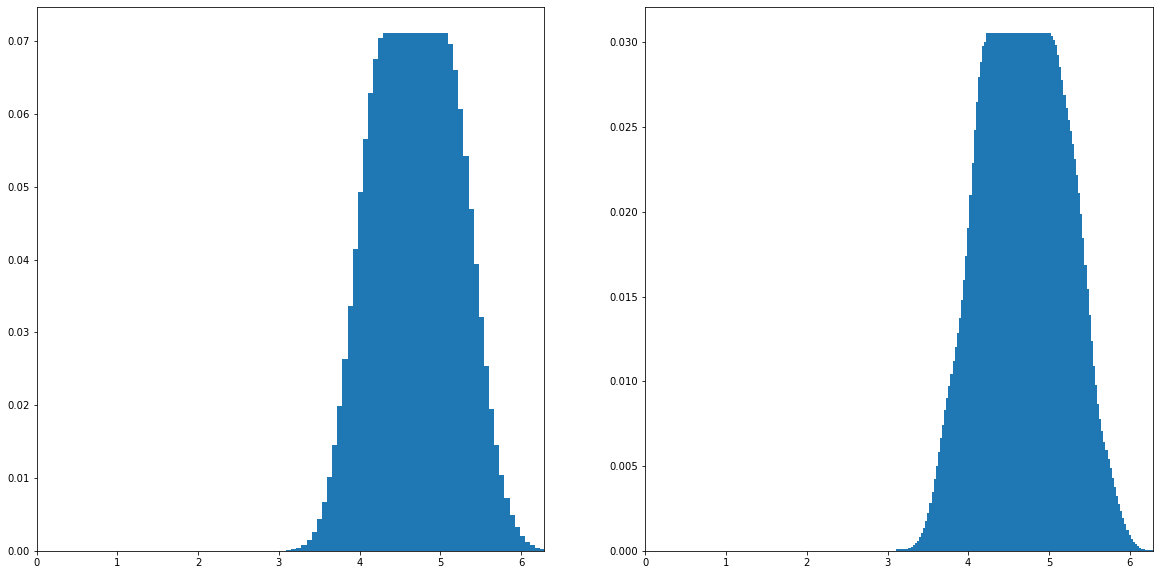

True omega: 4.595751, prediction by NN: 4.595752, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  2.5917028219634792 ======================================


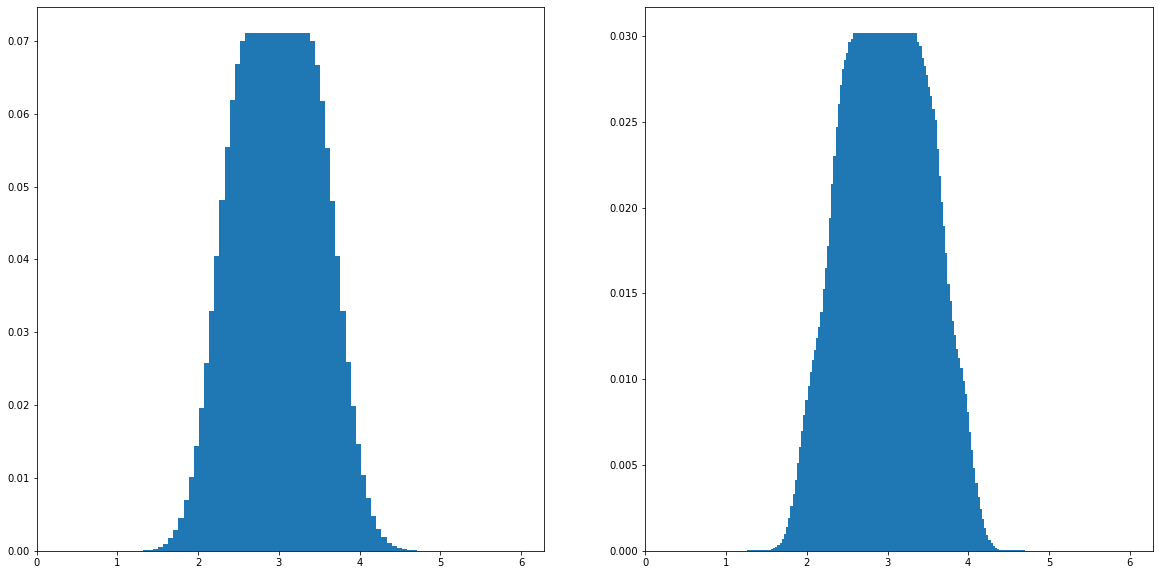

True omega: 2.591703, prediction by NN: 2.591702, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  1.7331265643467813 ======================================


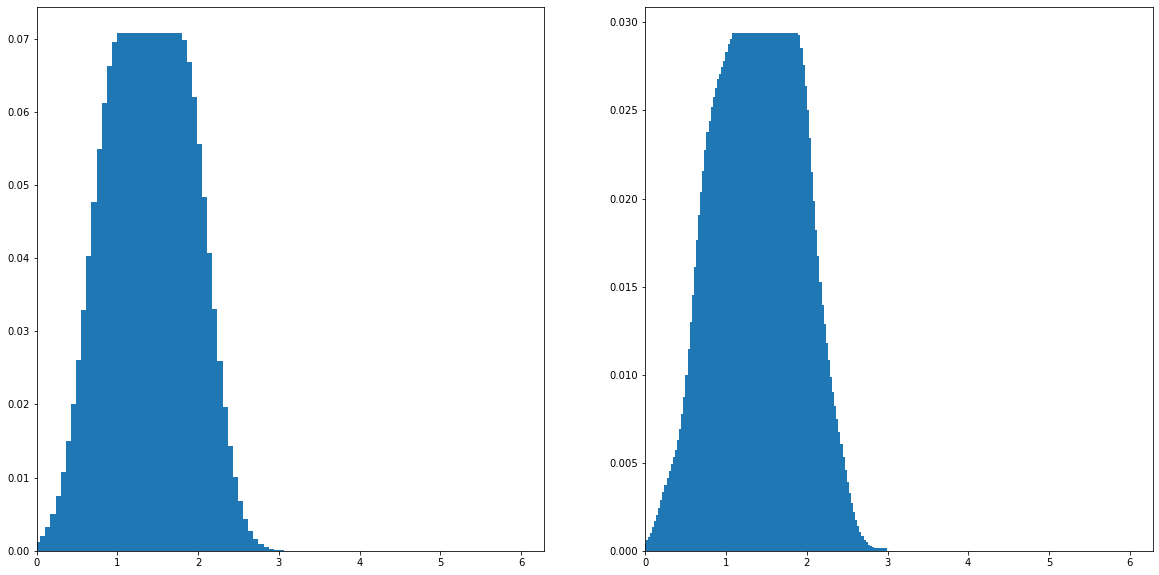

True omega: 1.733127, prediction by NN: 1.733126, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  1.1608040965743598 ======================================


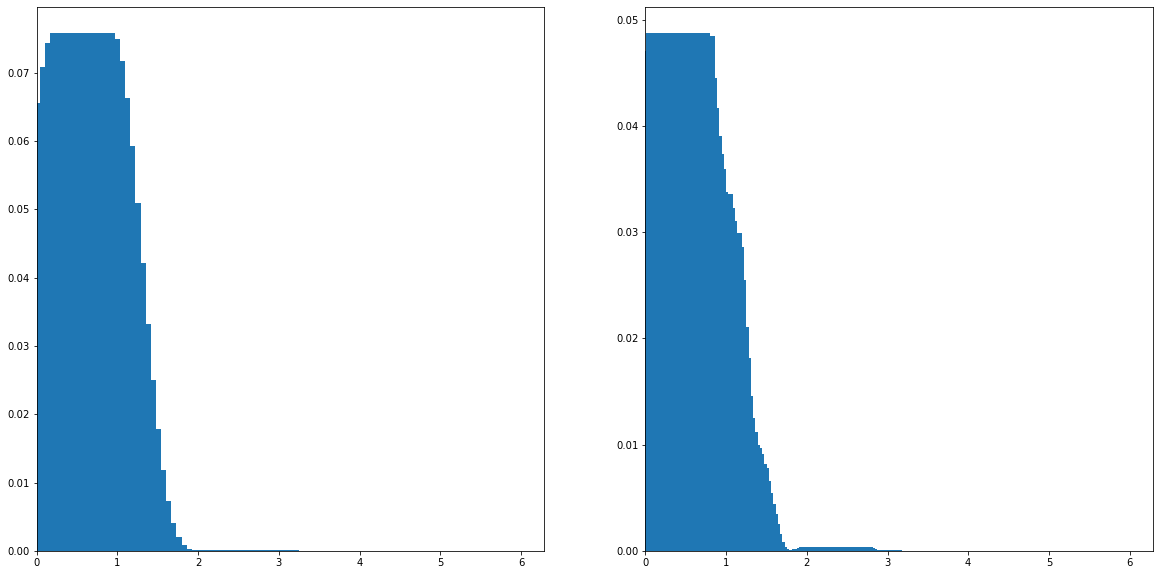

True omega: 1.160804, prediction by NN: 1.160804, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.893124442552073 ======================================


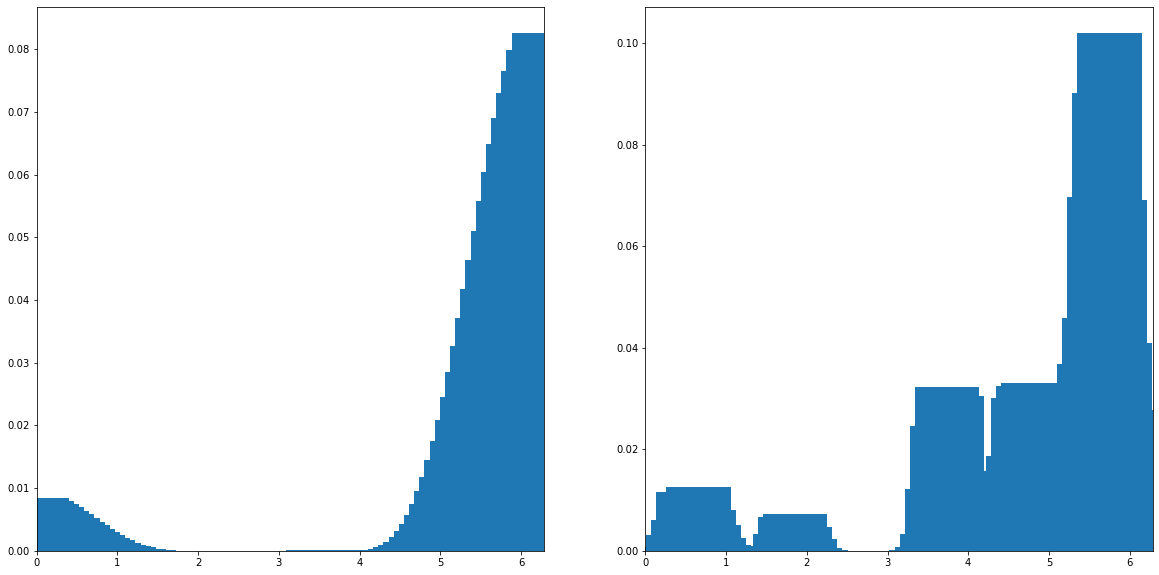

True omega: 5.893124, prediction by NN: 5.893126, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  5.8021534416336085 ======================================


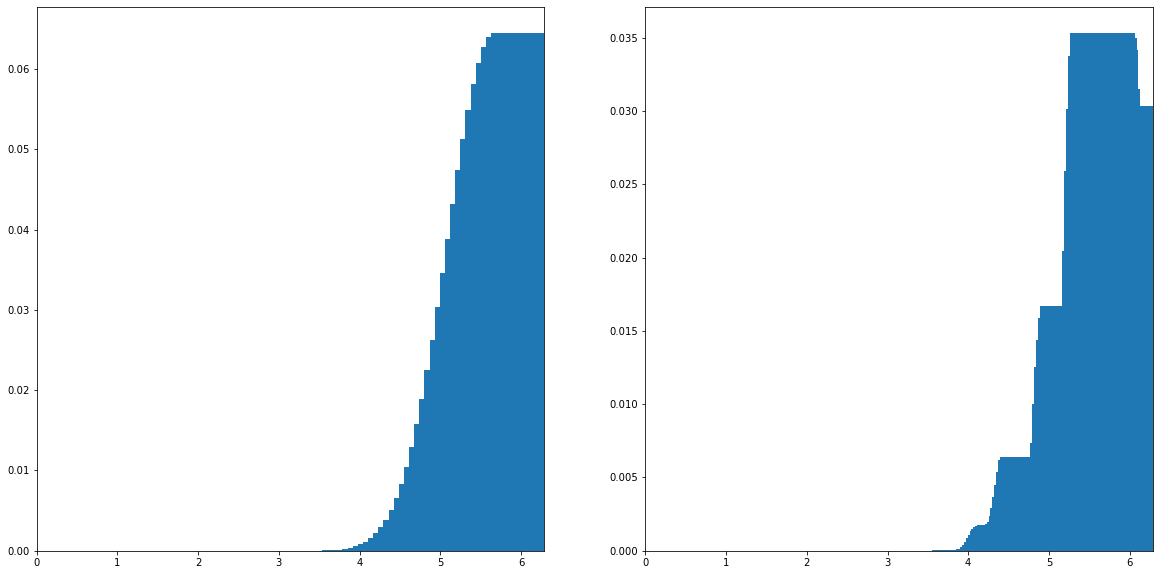

True omega: 5.802153, prediction by NN: 5.802152, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  3.3504880528637386 ======================================


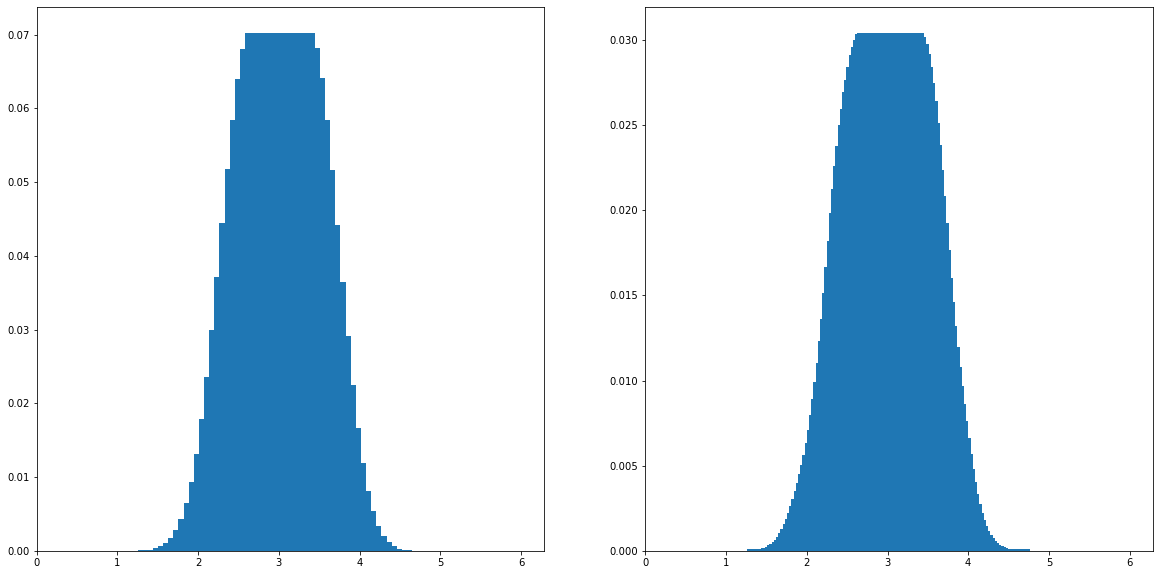

True omega: 3.350488, prediction by NN: 3.349224, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  1.9030985224049077 ======================================


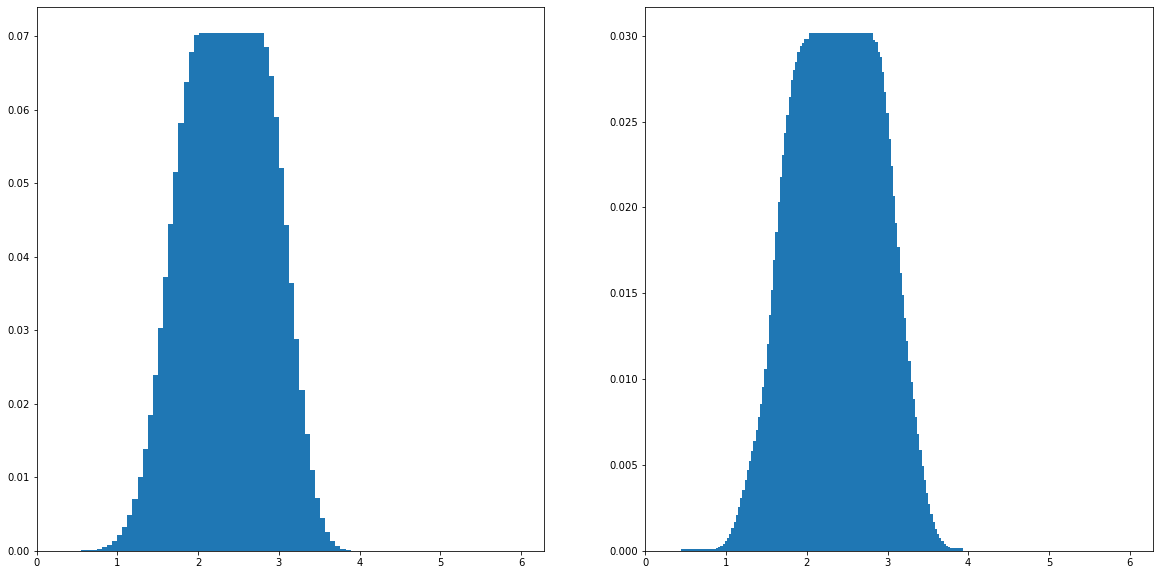

True omega: 1.903099, prediction by NN: 1.903098, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  3.5607764200021825 ======================================


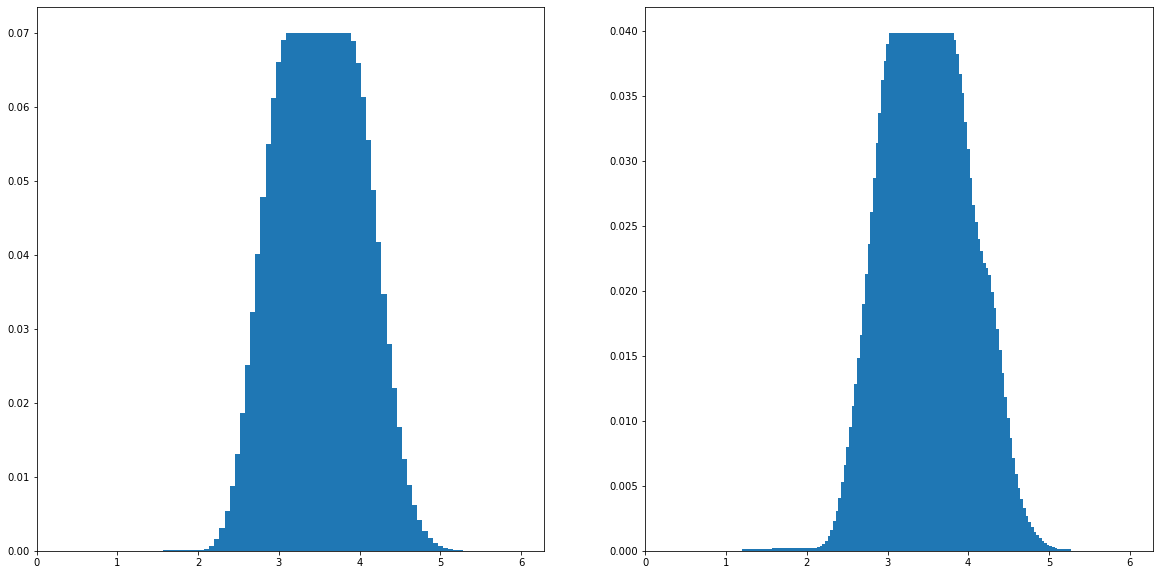

True omega: 3.560776, prediction by NN: 3.560774, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  1.5912405998645307 ======================================


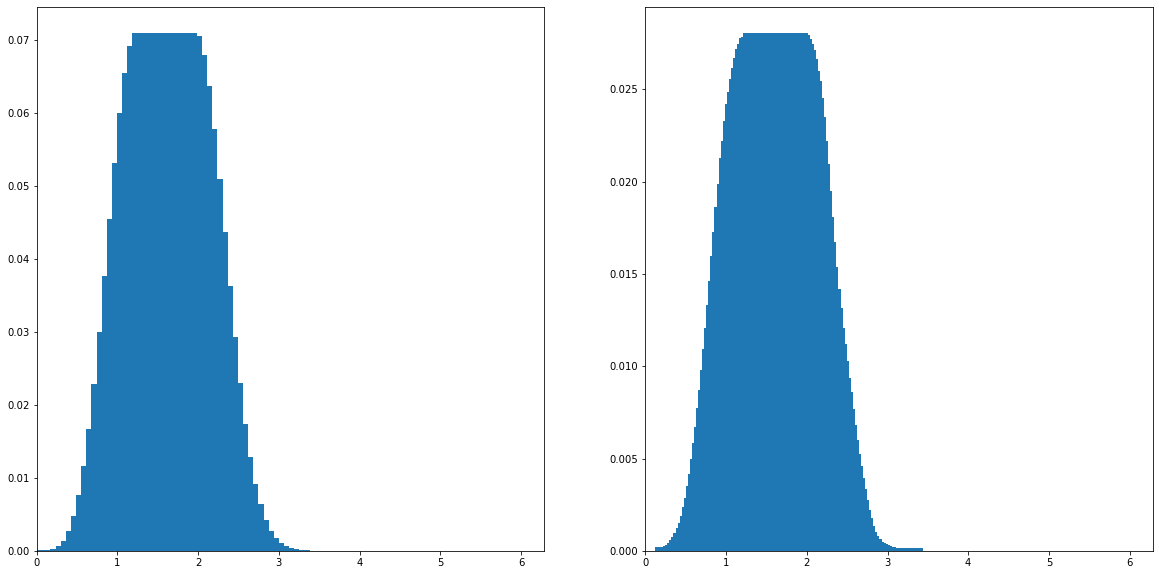

True omega: 1.591241, prediction by NN: 1.591240, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  0.5869314840264238 ======================================


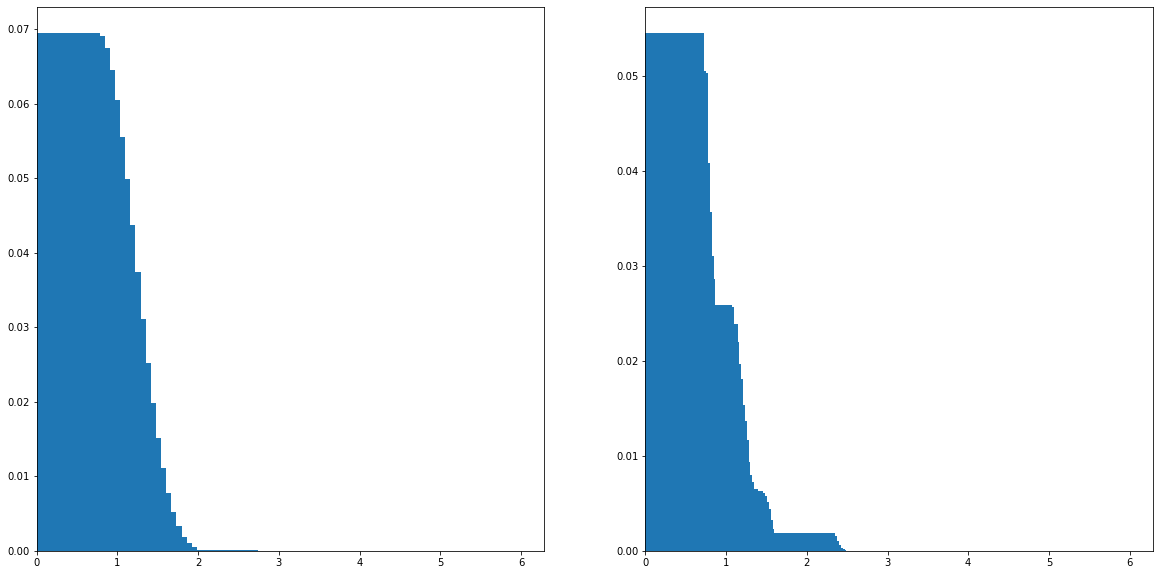

True omega: 0.586931, prediction by NN: 0.586931, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  2.629632477052772 ======================================


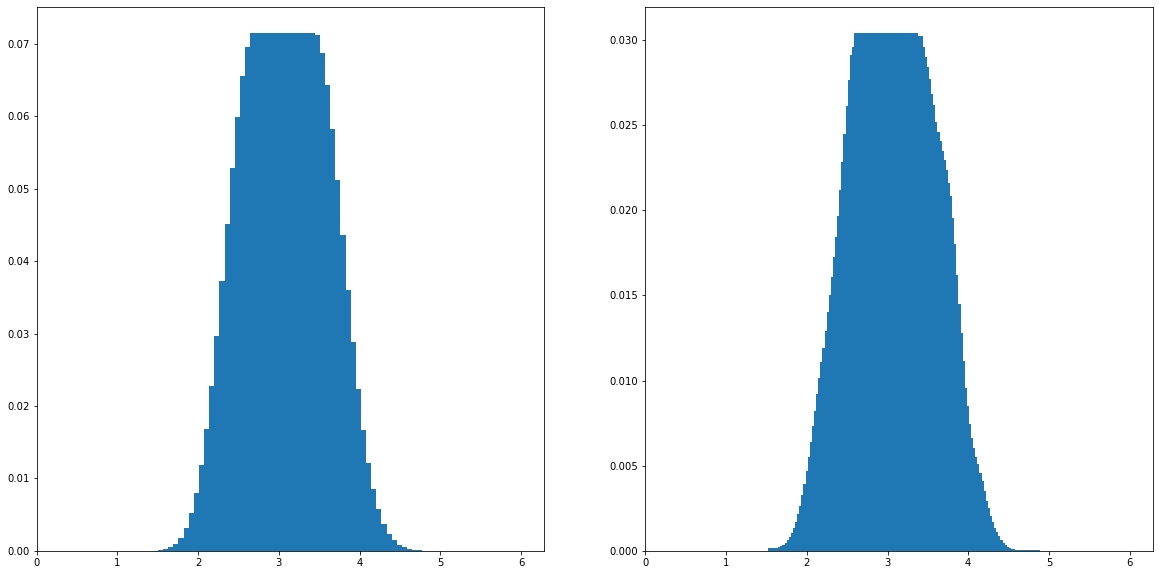

True omega: 2.629632, prediction by NN: 2.629633, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  4.173521478232842 ======================================


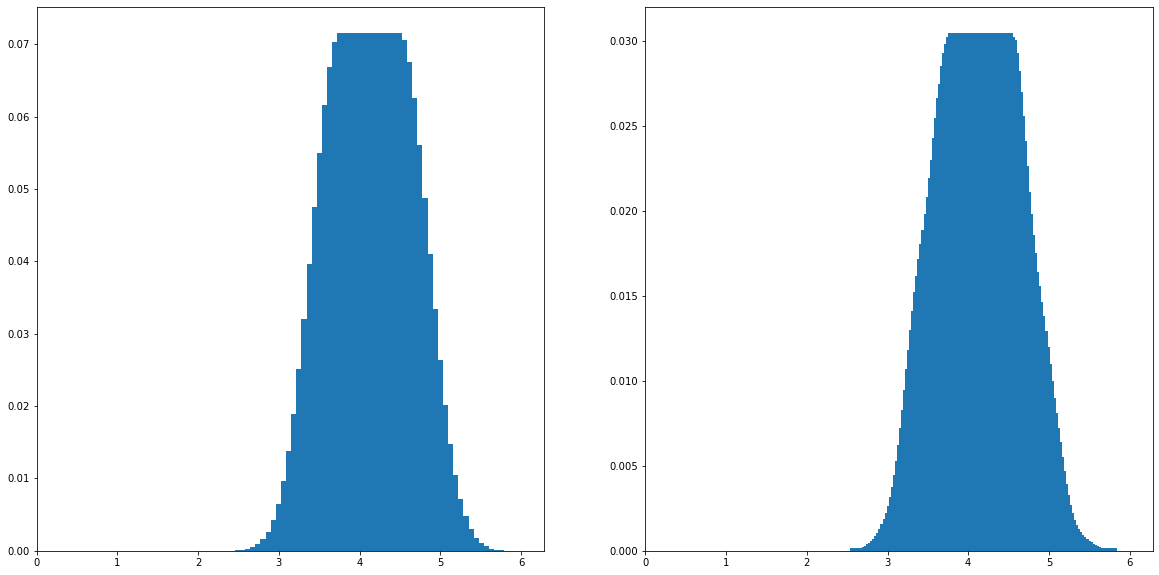

True omega: 4.173521, prediction by NN: 4.173521, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  4.4626753402293 ======================================


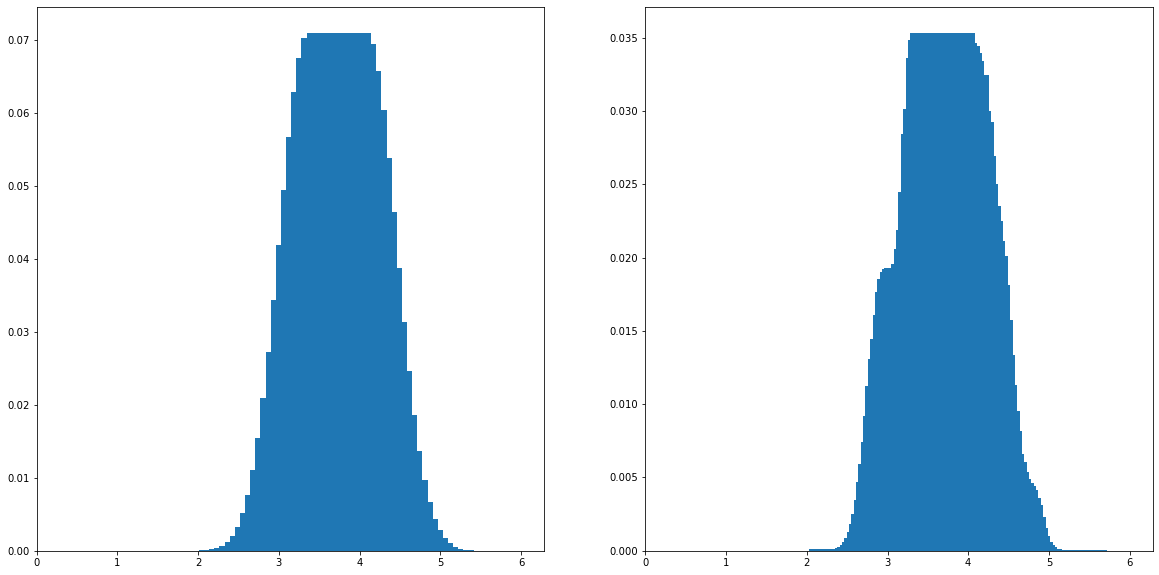

True omega: 4.462675, prediction by NN: 4.462673, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  4.019620167750434 ======================================


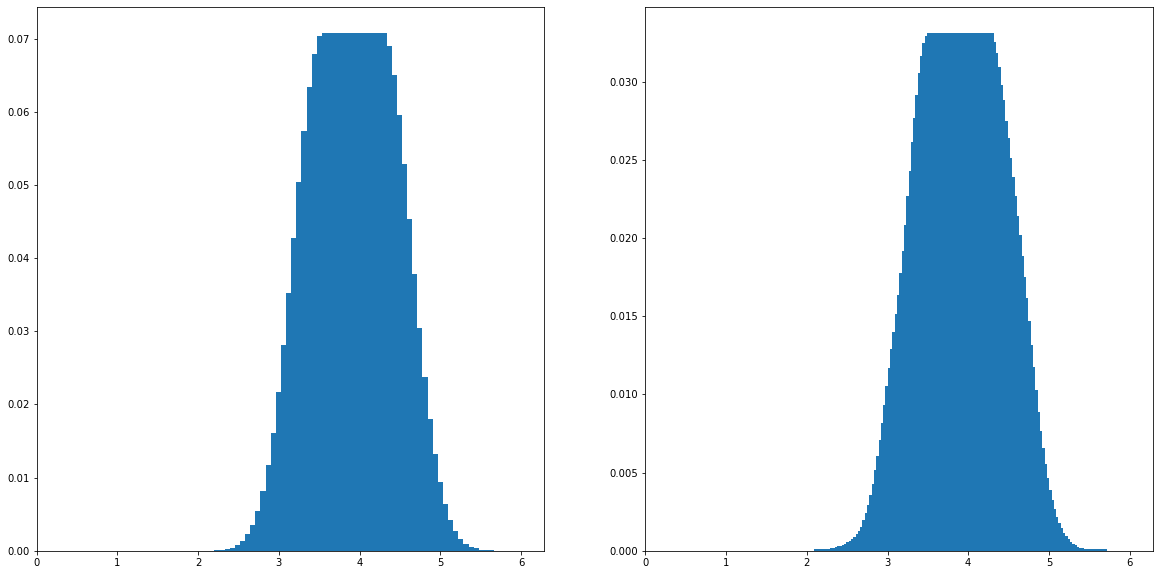

True omega: 4.019620, prediction by NN: 4.019621, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  3.935334907439863 ======================================


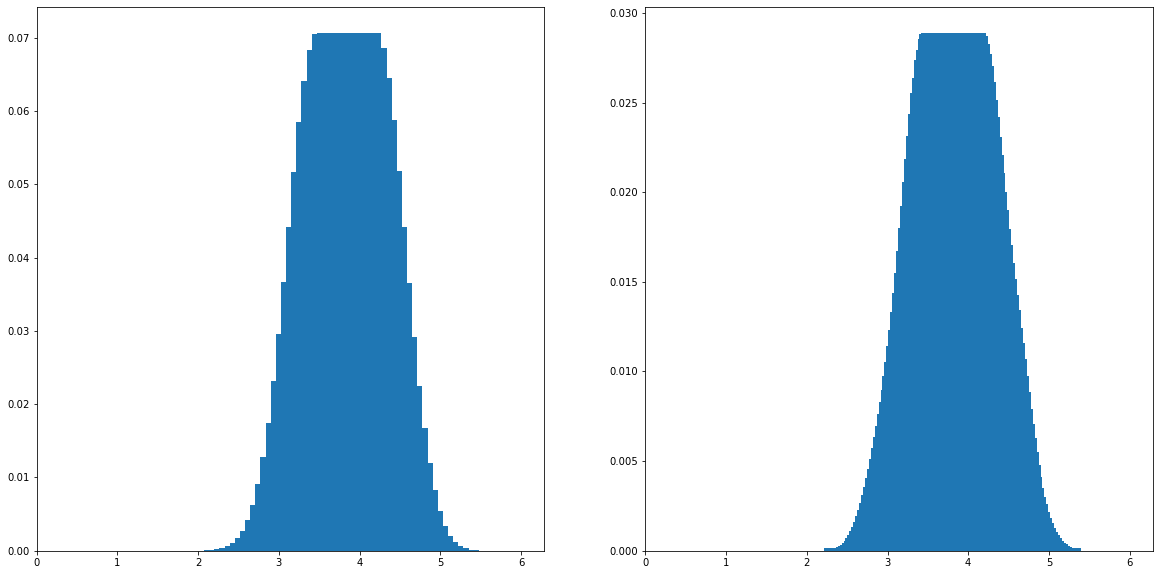

True omega: 3.935335, prediction by NN: 3.935336, num of resample calls: 18
==============NEW EXPERIMENT WITH OMEGA =  1.4017215681917792 ======================================


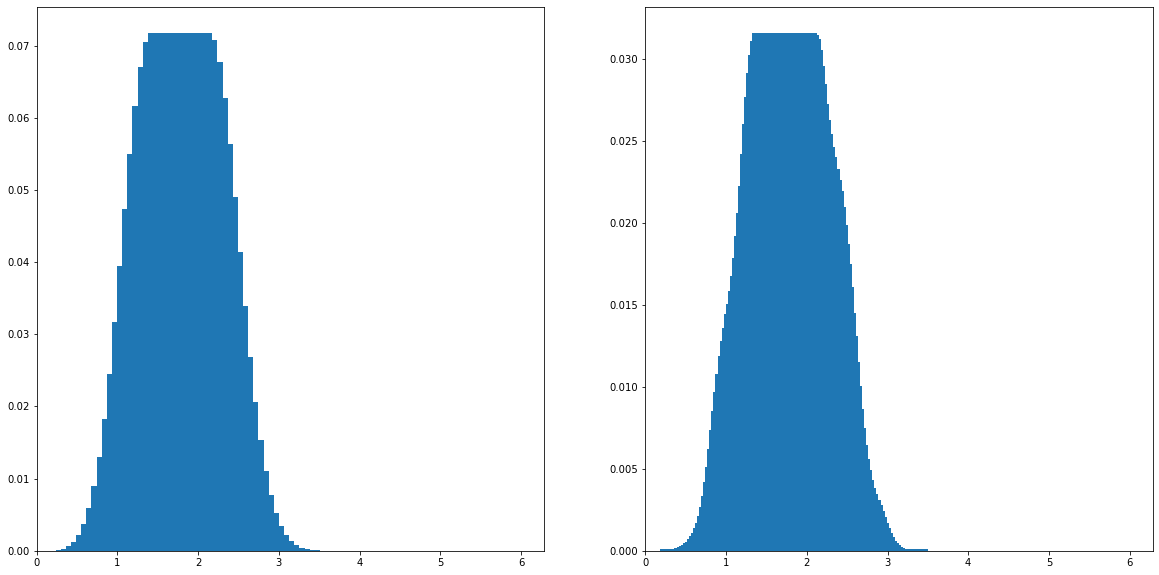

True omega: 1.401722, prediction by NN: 1.401721, num of resample calls: 19
==============NEW EXPERIMENT WITH OMEGA =  3.355698774299732 ======================================


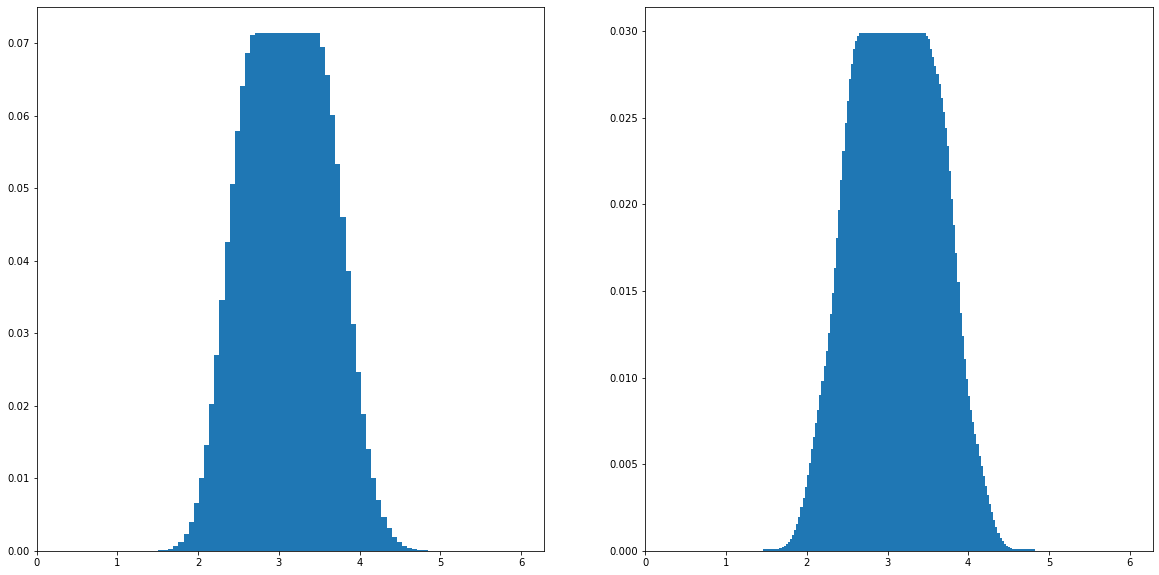

True omega: 3.355699, prediction by NN: 3.355697, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  1.9880291944393562 ======================================


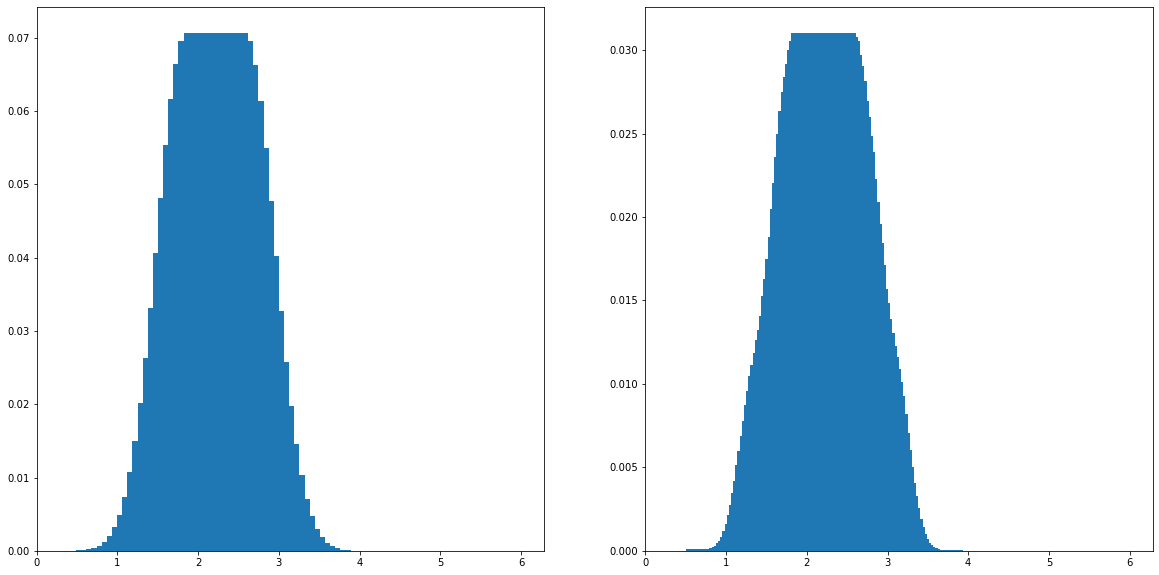

True omega: 1.988029, prediction by NN: 1.988031, num of resample calls: 16


In [15]:
omega_star_list = []
nn_pred_list = []

for i in range(n_iters): 
    
    t0 = 0.1
    omega_star = np.random.uniform() * 2 * np.pi
    
    print("==============NEW EXPERIMENT WITH OMEGA = ", omega_star, "======================================")
    
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0)
    smc.init_particles(num_particles)
    running_est = []
    
    counts = 0
    
    while True:

        particle_pos, particle_wgts = smc.particles(threshold=num_particles/5, num_measurements=1)
        data = np.random.choice(particle_pos, size = num_samples, p=particle_wgts)
        mean = np.mean(data)
        std = np.std(data)
        
        if std == 0:
            break
        
        data = (data-mean)/std
        bins, edges = np.histogram(data, num_bins)
        bins = bins/num_samples

        nn_pred = net(torch.tensor(bins).float().unsqueeze(0)) ## convert to float tensor, then make dim [1, num_bins]

        smc.nn_resample(nn_pred.detach().numpy(), edges, mean, std)
        
        if counts == 0:
            fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
            ax1.set_xlim([0, 2*np.pi])
            ax2.set_xlim([0, 2*np.pi])
            ax1.bar(particle_pos, particle_wgts)
            ax2.bar(smc.particle_pos, smc.particle_wgts)
            plt.show()
        
        counts += 1
        
    #     edges_ = edges[:-1]
    #     edge_width = edges_[1] - edges_[0]

    #     plt.bar(edges_*std + mean, bins, align='edge', width = edge_width)
    #     plt.bar(edges_*std + mean, nn_pred[0].detach().numpy(), align='edge', width = edge_width, alpha=0.7)
    #     plt.show() 
        curr_omega_est = smc.particle_pos[np.argmax(smc.particle_wgts)]
        running_est.append(curr_omega_est)
        
        if len(running_est) > 5:
            last_n = running_est[-5:]
            # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
            # np.full_like makes an array with shake of last_n with every element being last_n[0]
            # if all elements of last_n are equal then they should all equal the first element
            if np.allclose(last_n, np.full_like(last_n, last_n[0])):
                break
                
    print("True omega: {:f}, prediction by NN: {:f}, num of resample calls: {:d}".format(omega_star,curr_omega_est, counts))
    nn_pred_list.append(curr_omega_est)


In [16]:
nn_mse = np.mean( abs(np.array(omega_star_list) - np.array(nn_pred_list)) )
print(nn_mse)

0.03632895368455864


## Liu-West resampler

==============NEW EXPERIMENT WITH OMEGA =  3.5036267027339427 ======================================


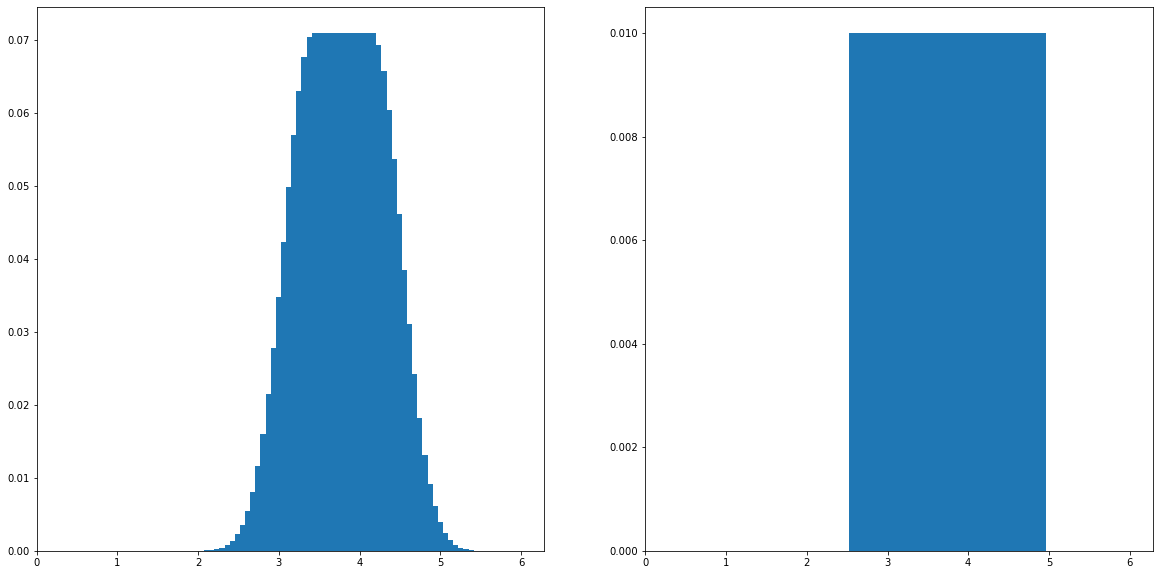

True omega: 3.503627, prediction by LW: 3.503627, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.0417114831228864 ======================================


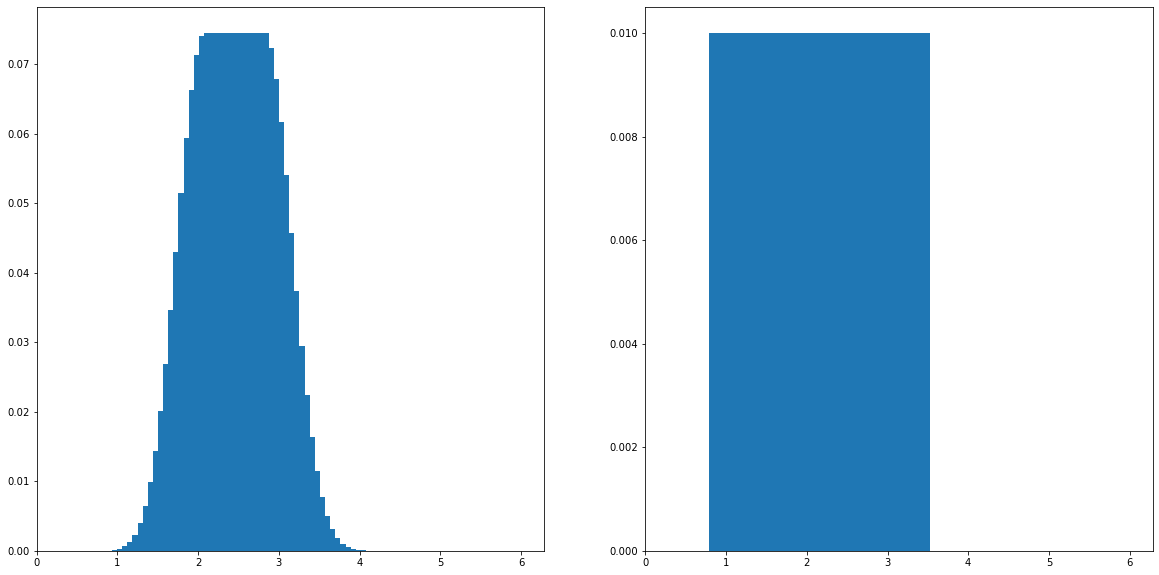

True omega: 2.041711, prediction by LW: 2.041712, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  3.770340077288735 ======================================


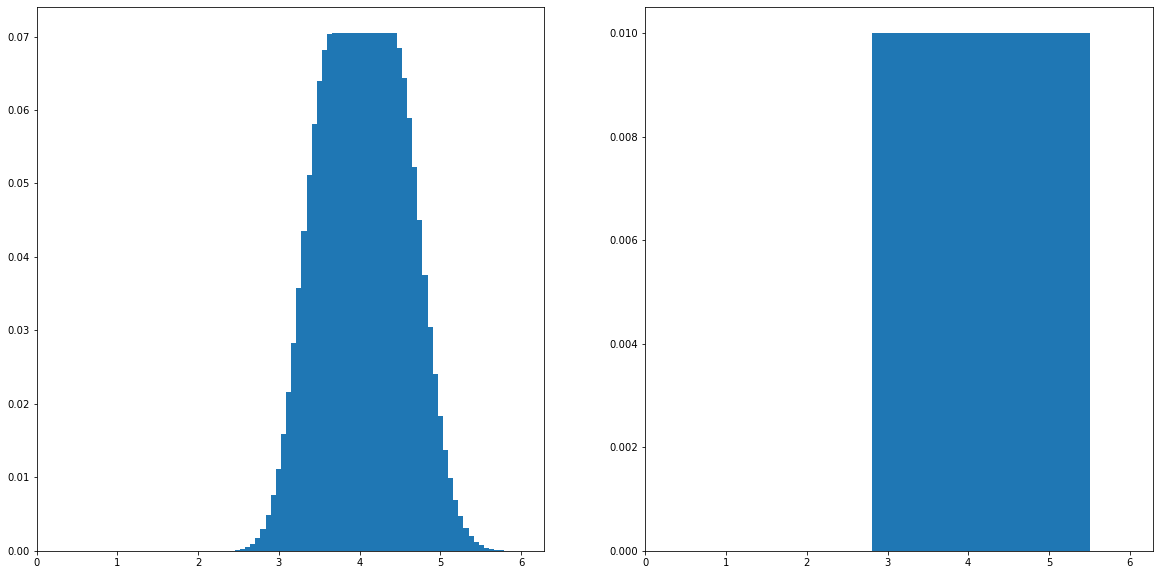

True omega: 3.770340, prediction by LW: 3.770340, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.3933847989783925 ======================================


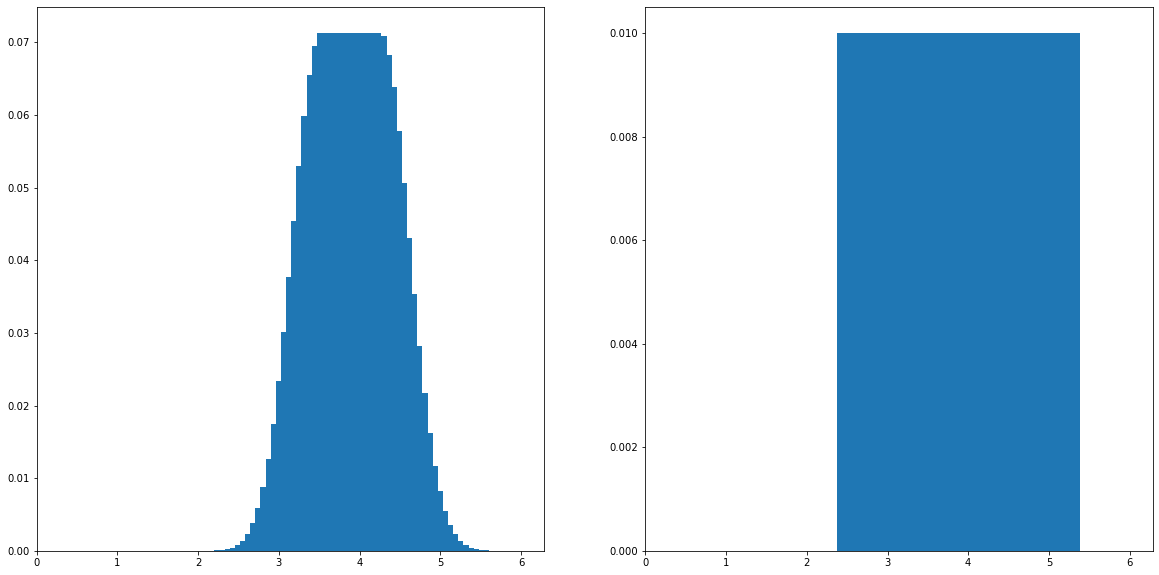

True omega: 3.393385, prediction by LW: 3.393386, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  4.88308371251341 ======================================


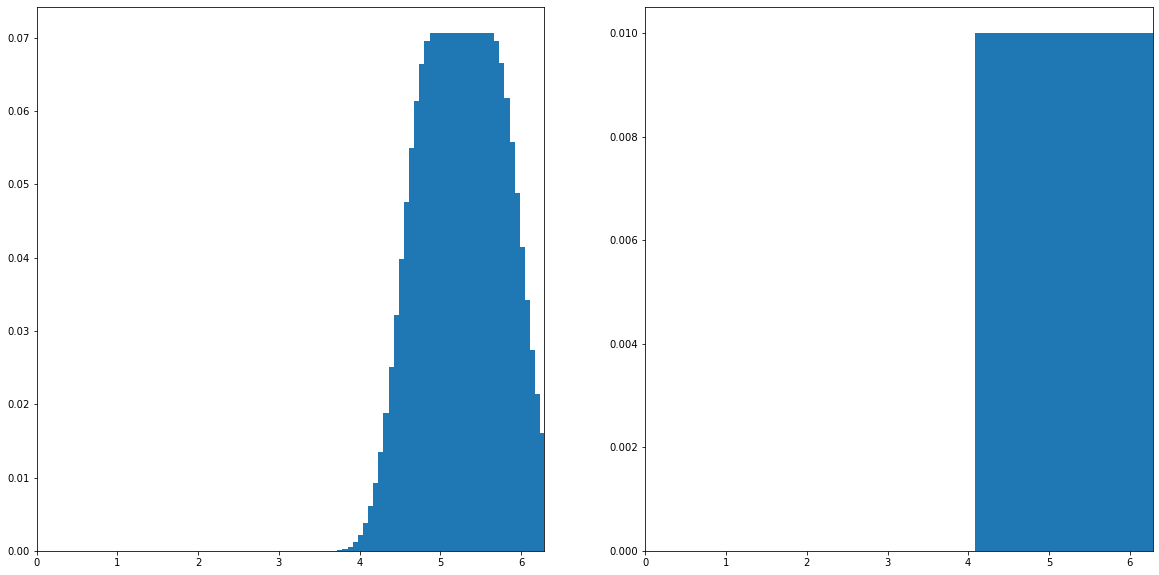

True omega: 4.883084, prediction by LW: 4.883084, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  0.6951852624323223 ======================================


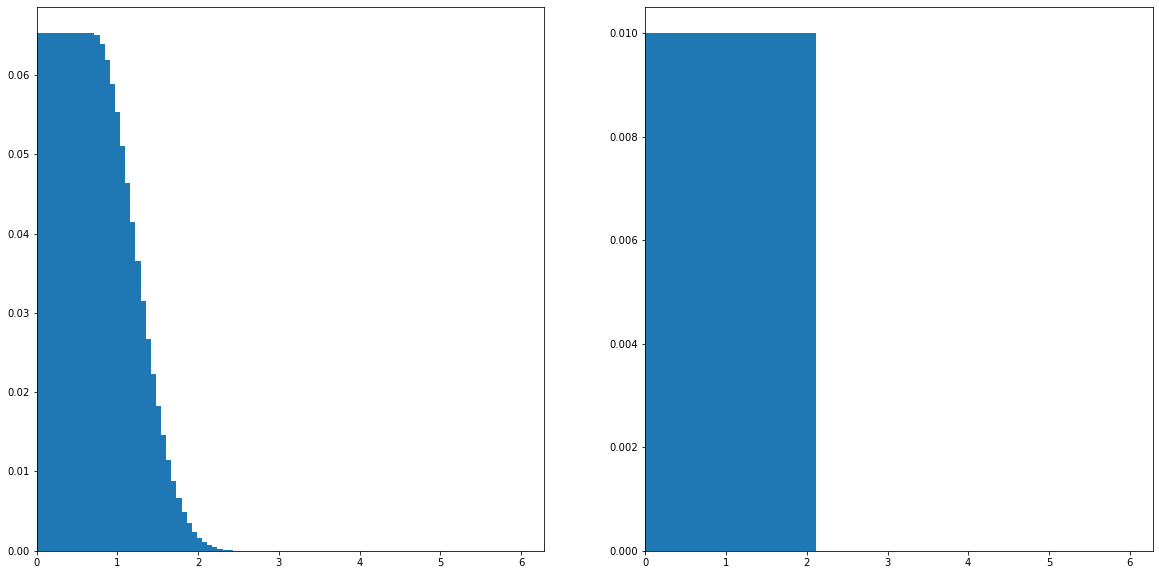

True omega: 0.695185, prediction by LW: 0.695185, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  4.898700164506762 ======================================


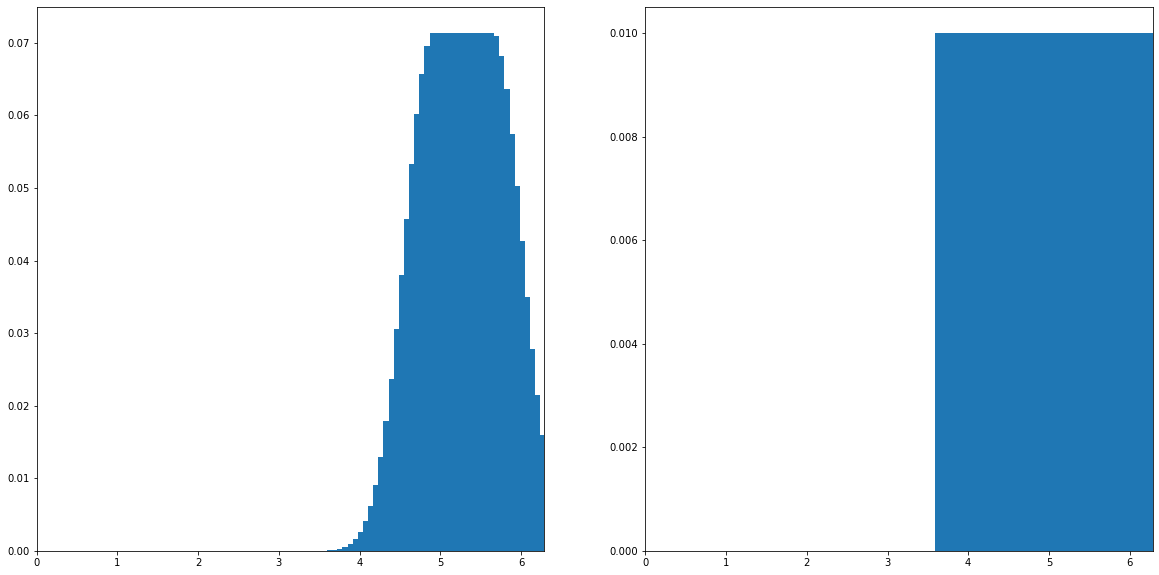

True omega: 4.898700, prediction by LW: 4.898700, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  1.942091653431987 ======================================


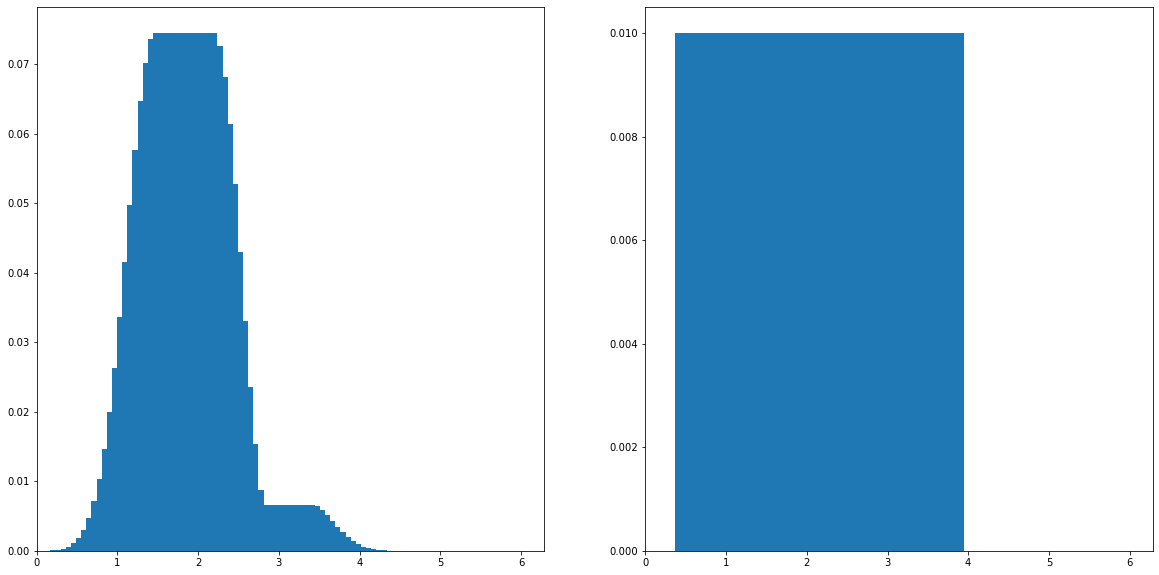

True omega: 1.942092, prediction by LW: 1.942092, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  3.626539861642585 ======================================


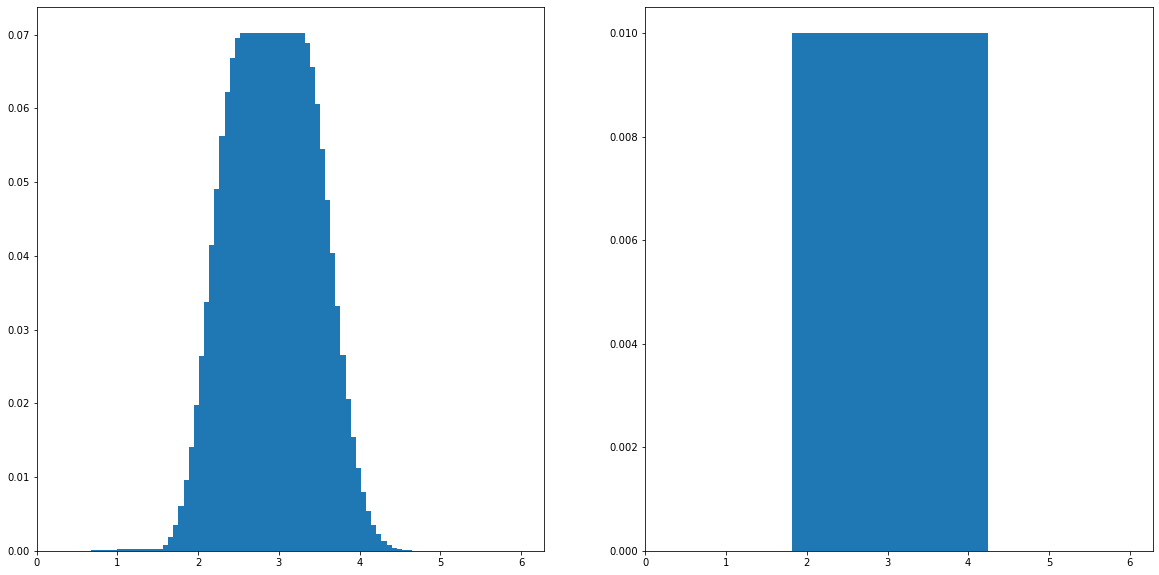

True omega: 3.626540, prediction by LW: 3.626540, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  0.3191287644431499 ======================================


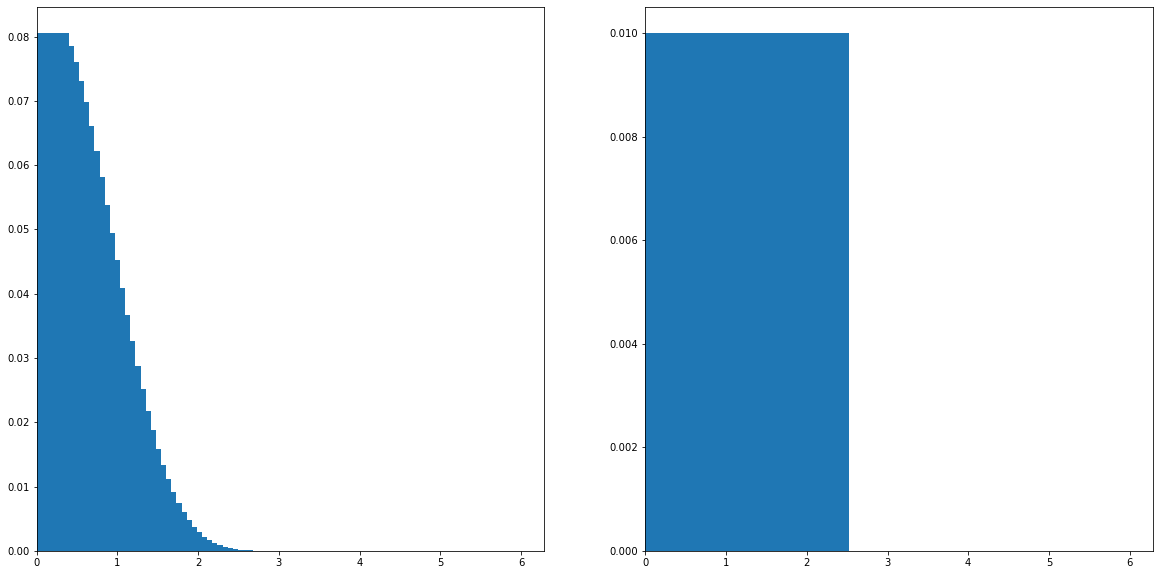

True omega: 0.319129, prediction by LW: 0.319129, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  5.890131804842247 ======================================


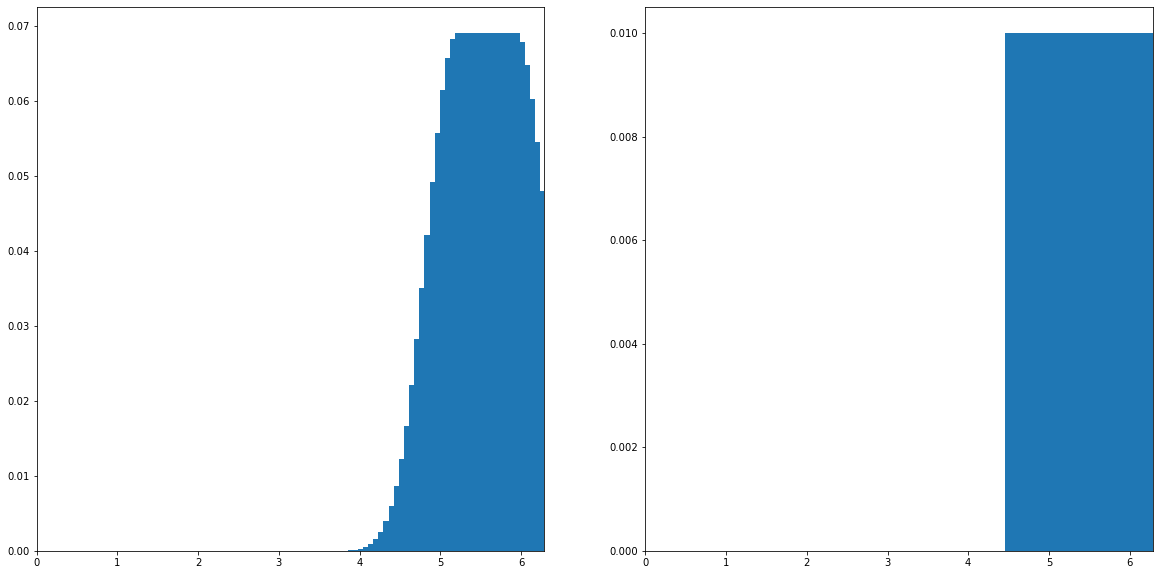

True omega: 5.890132, prediction by LW: 5.890132, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  4.028416069415456 ======================================


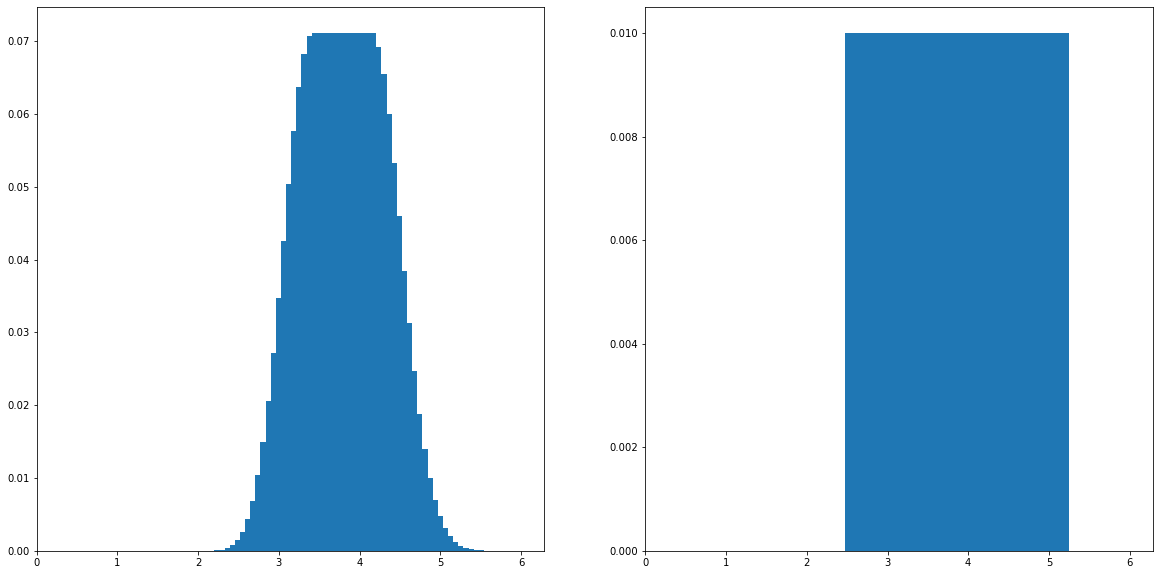

True omega: 4.028416, prediction by LW: 4.028416, num of resample calls: 10
==============NEW EXPERIMENT WITH OMEGA =  2.915817328911505 ======================================


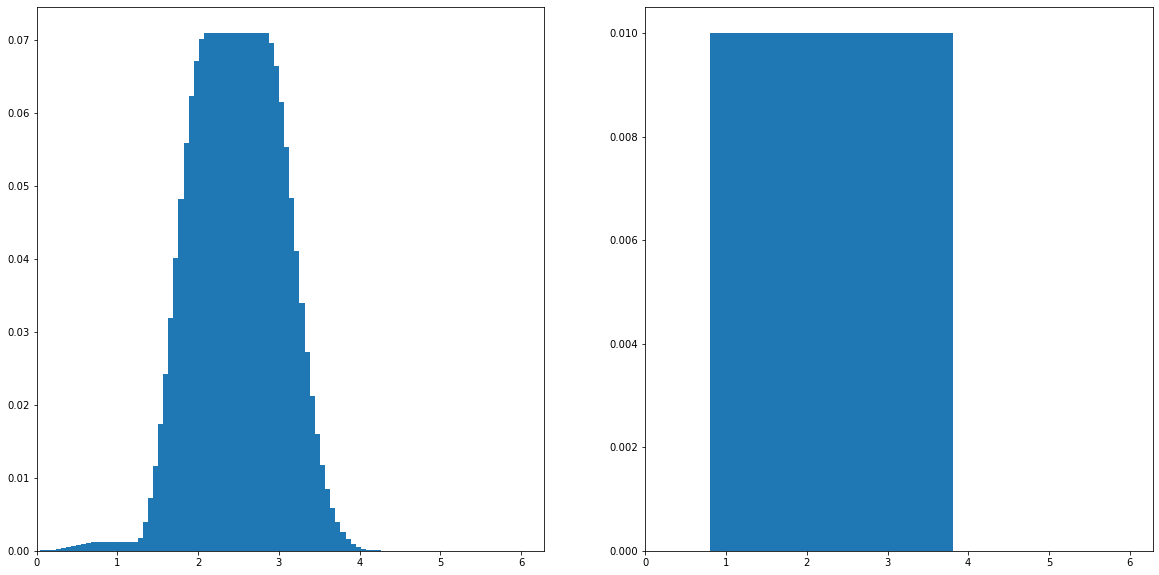

True omega: 2.915817, prediction by LW: 2.915817, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  4.289347264896703 ======================================


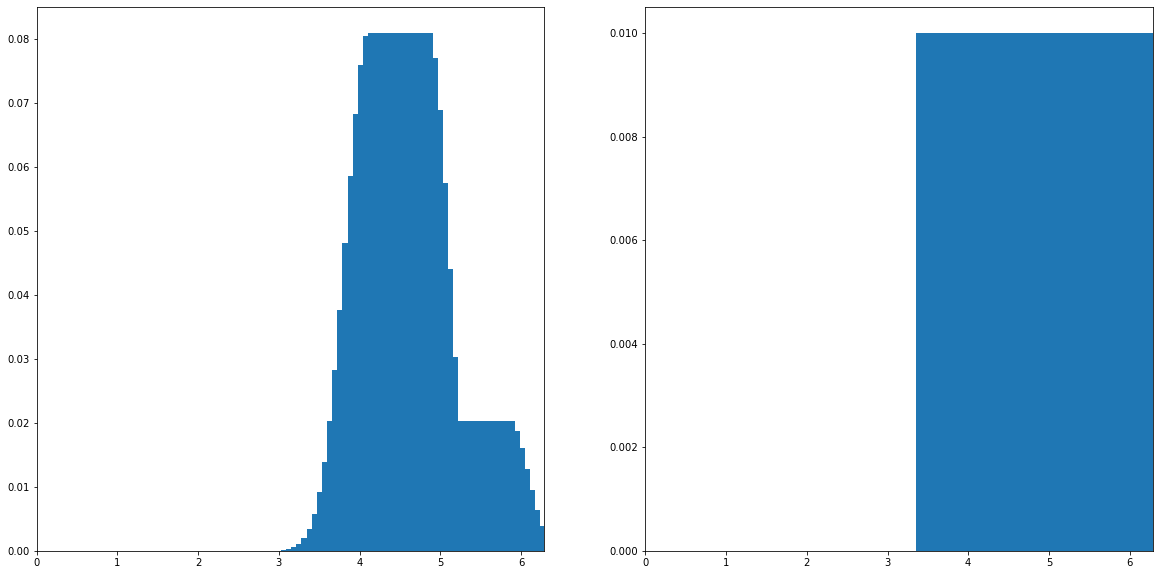

True omega: 4.289347, prediction by LW: 4.289347, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  0.3315411407956506 ======================================


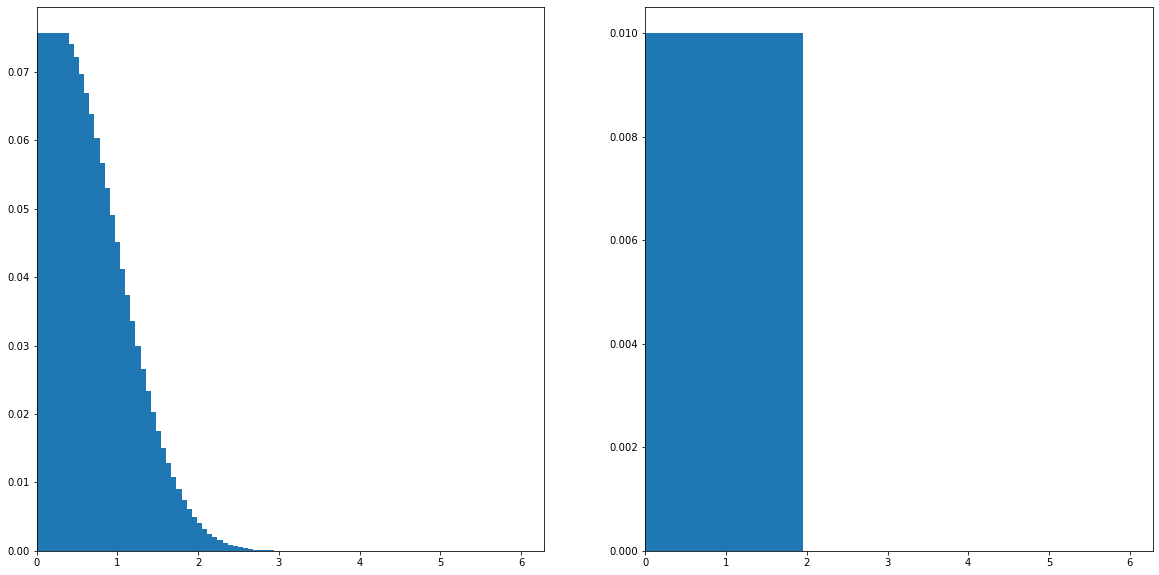

True omega: 0.331541, prediction by LW: 0.331541, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  0.330344517450983 ======================================


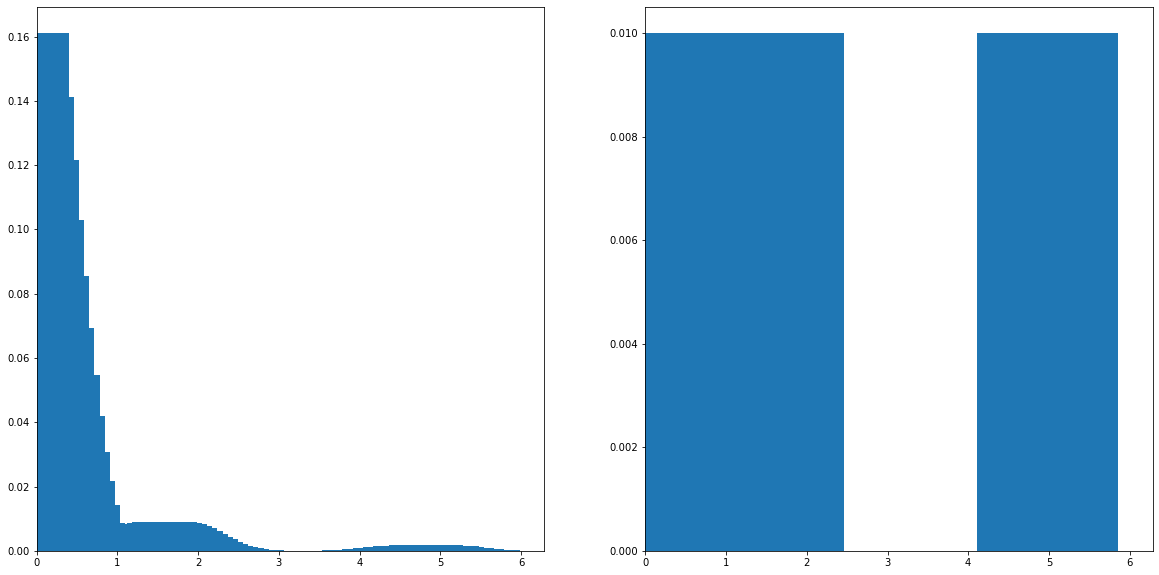

True omega: 0.330345, prediction by LW: 0.330345, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  6.12849187383325 ======================================


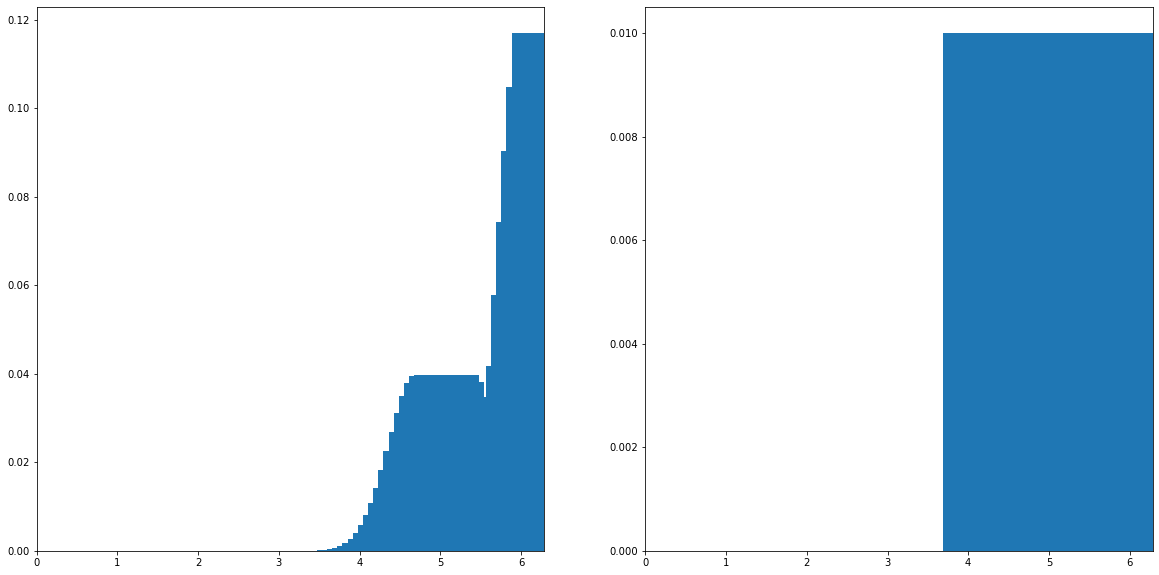

True omega: 6.128492, prediction by LW: 6.128492, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  5.8717978504576385 ======================================


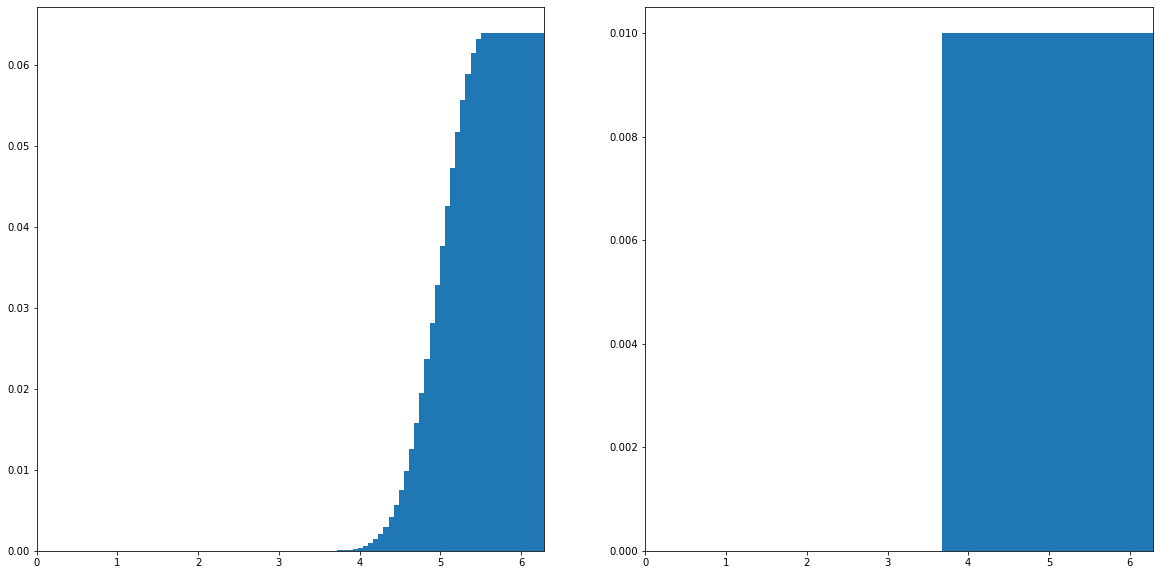

True omega: 5.871798, prediction by LW: 5.871798, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  1.5185369642356958 ======================================


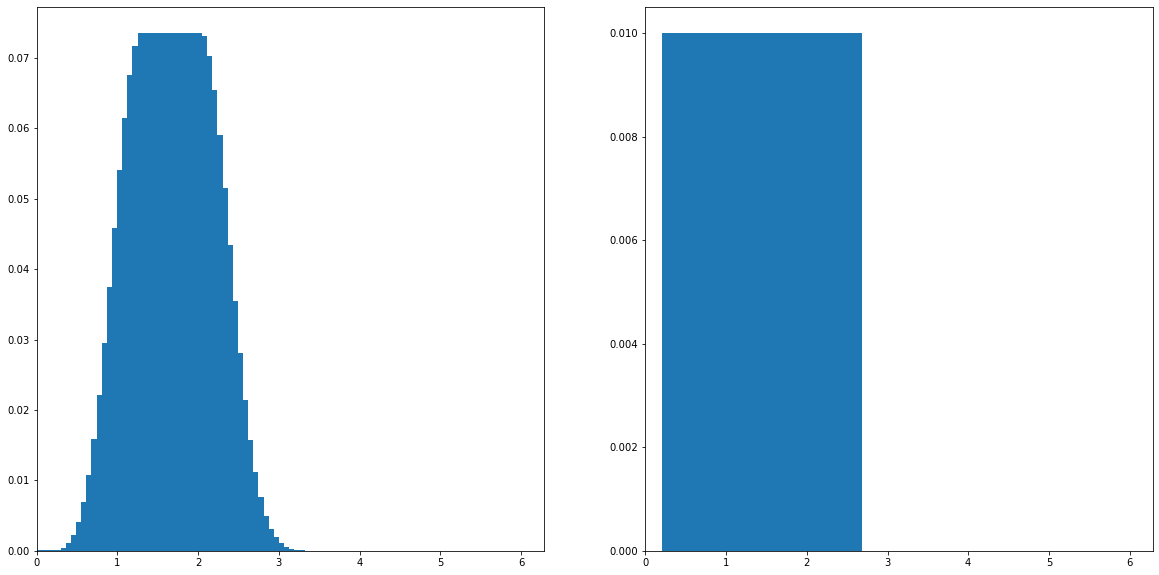

True omega: 1.518537, prediction by LW: 1.518537, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  2.237870637173729 ======================================


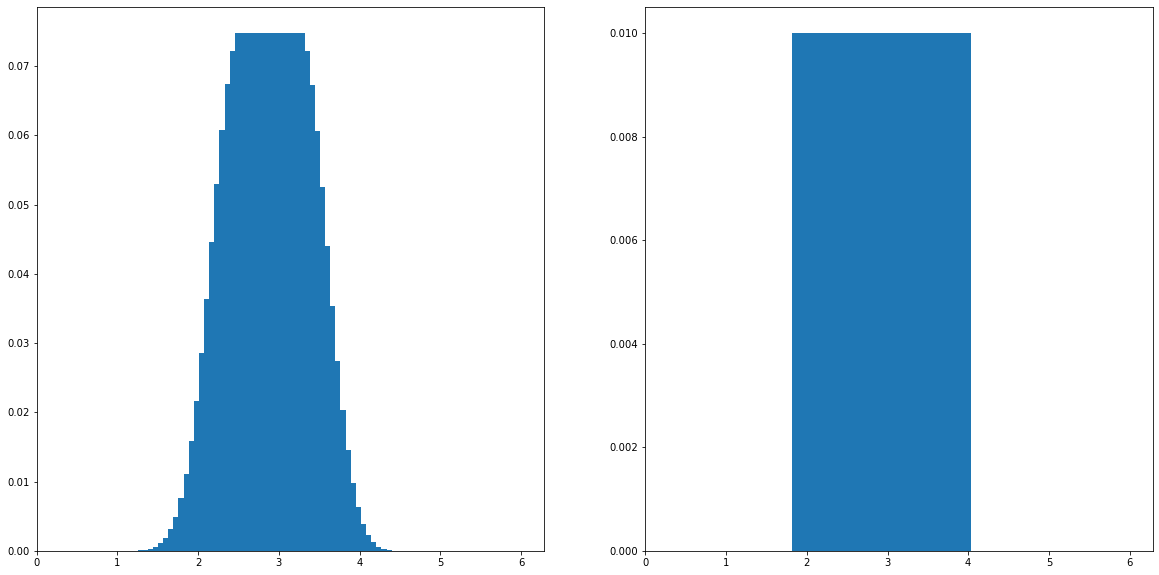

True omega: 2.237871, prediction by LW: 2.237870, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  0.312147386018451 ======================================


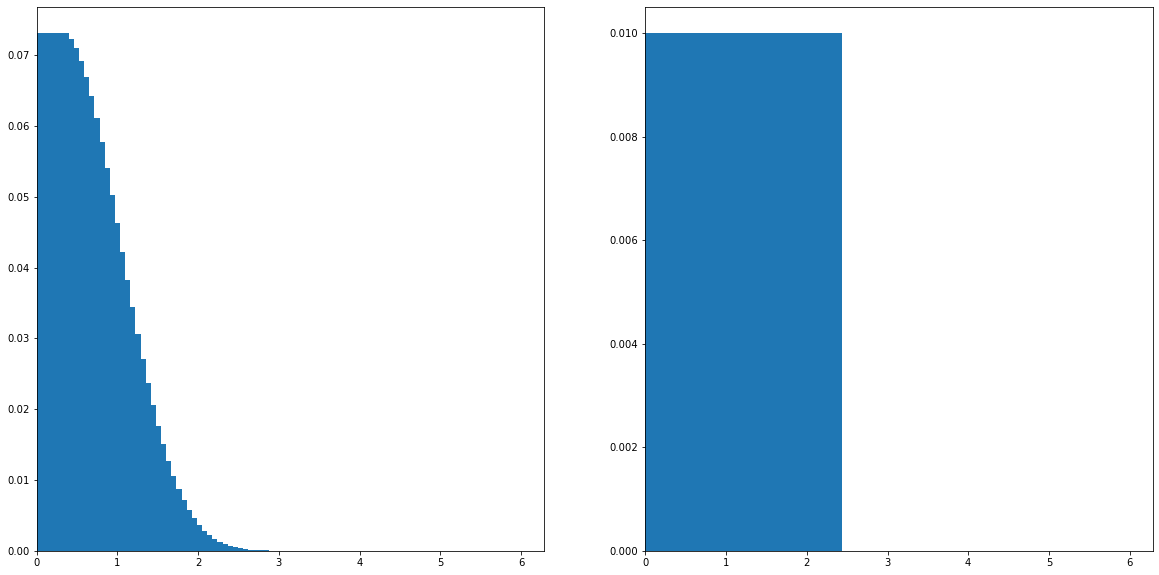

True omega: 0.312147, prediction by LW: 0.312147, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  5.1304829111395565 ======================================


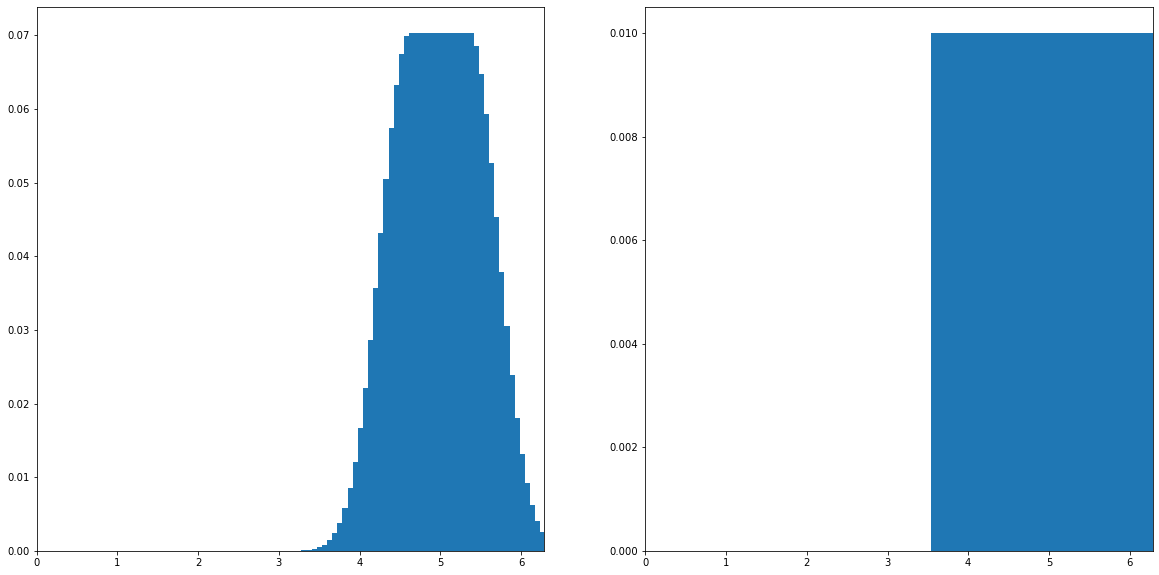

True omega: 5.130483, prediction by LW: 5.130483, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  1.8729142915615715 ======================================


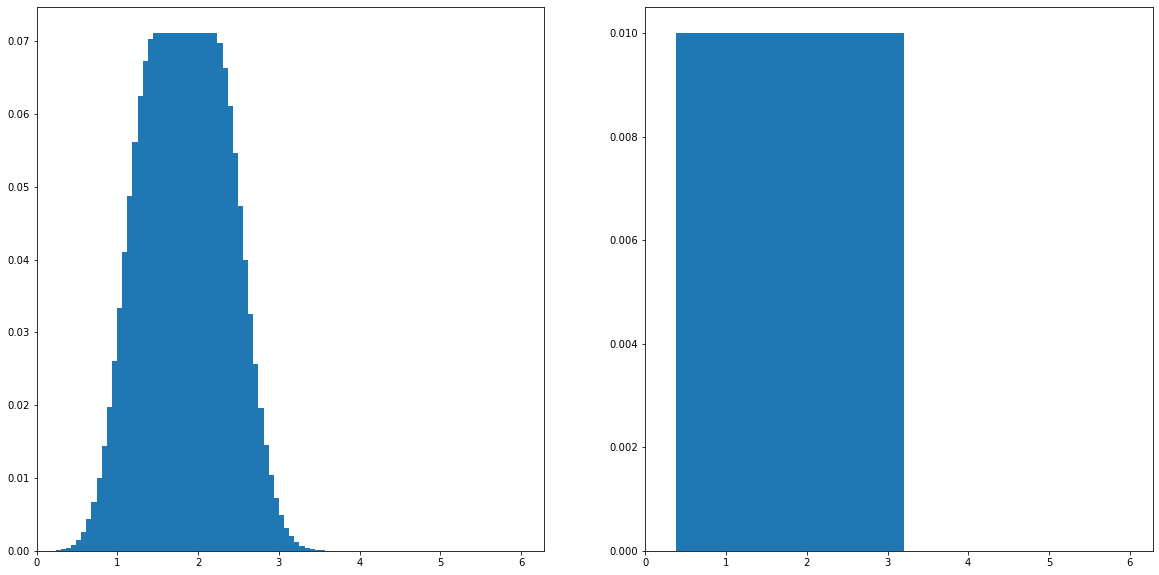

True omega: 1.872914, prediction by LW: 1.872914, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  4.468570448422438 ======================================


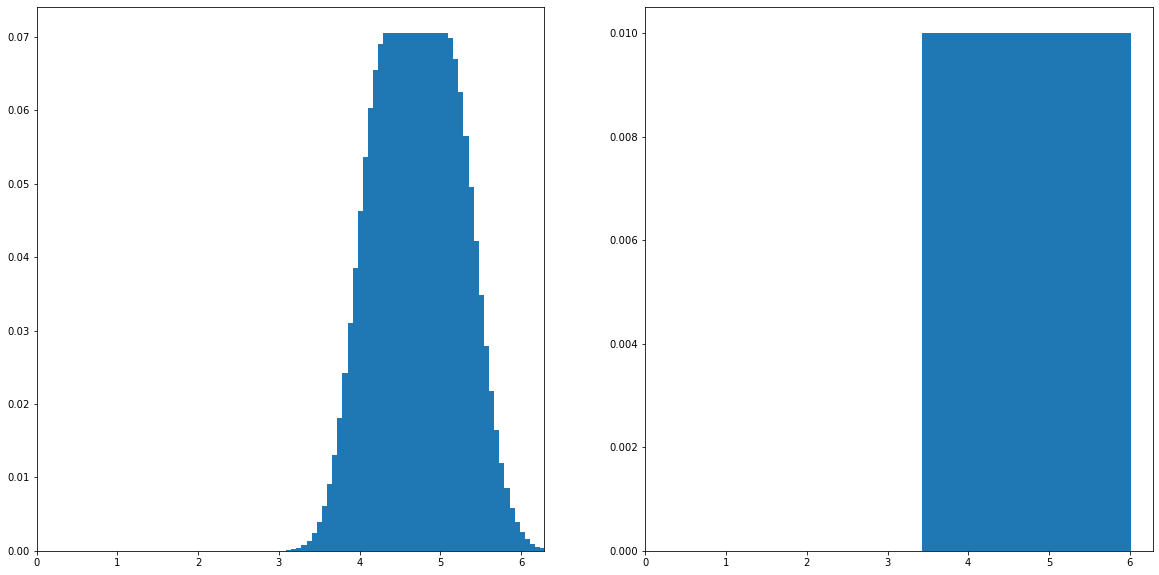

True omega: 4.468570, prediction by LW: 4.468570, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  4.667774592960509 ======================================


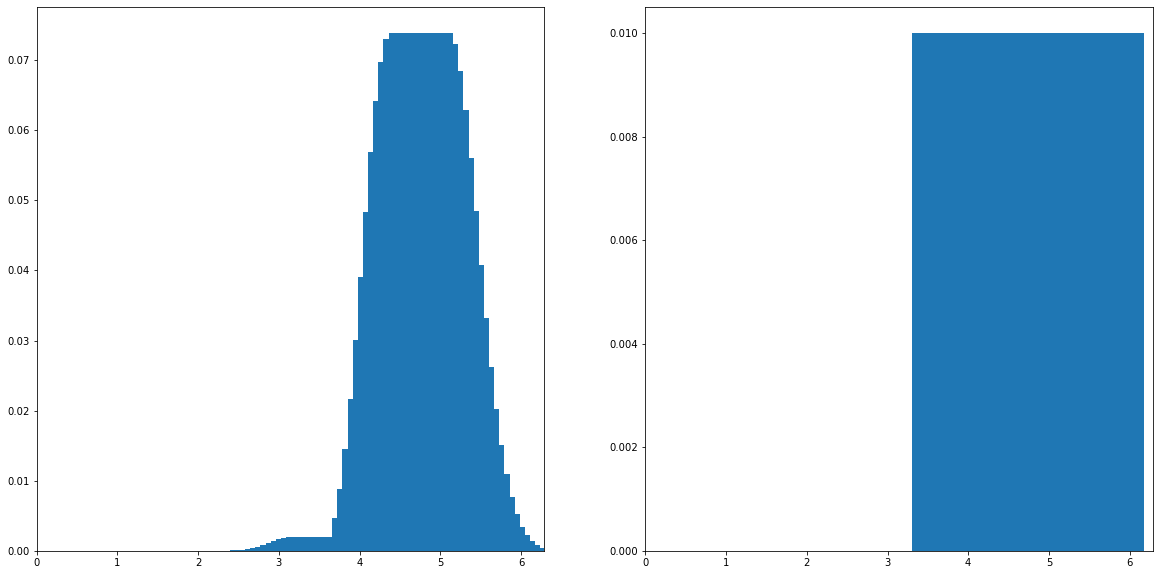

True omega: 4.667775, prediction by LW: 4.667775, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  1.4348412319418524 ======================================


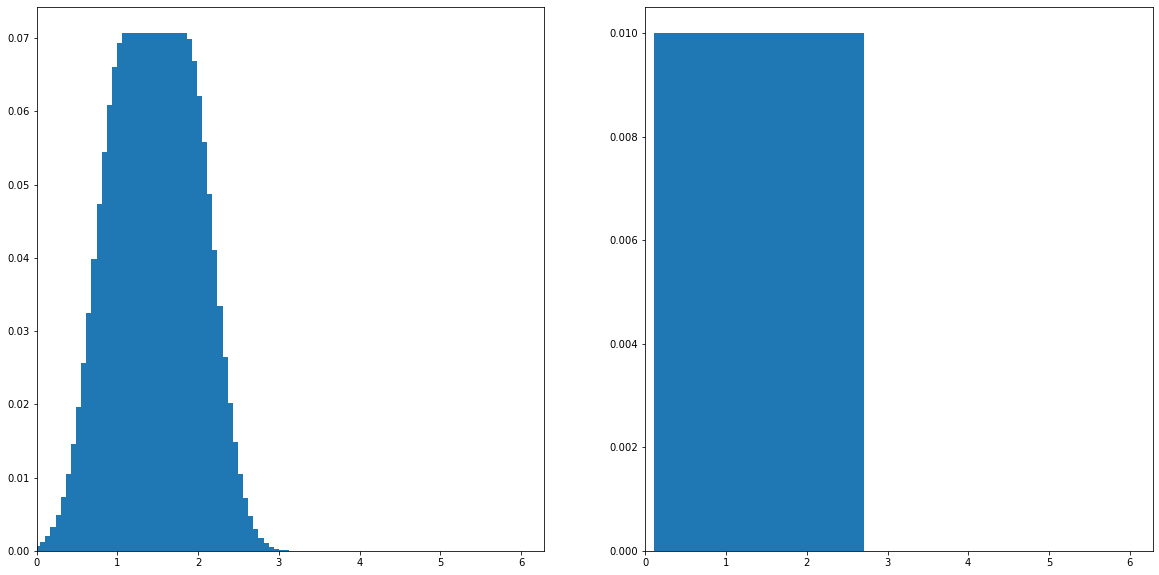

True omega: 1.434841, prediction by LW: 1.434841, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  3.5294767343447093 ======================================


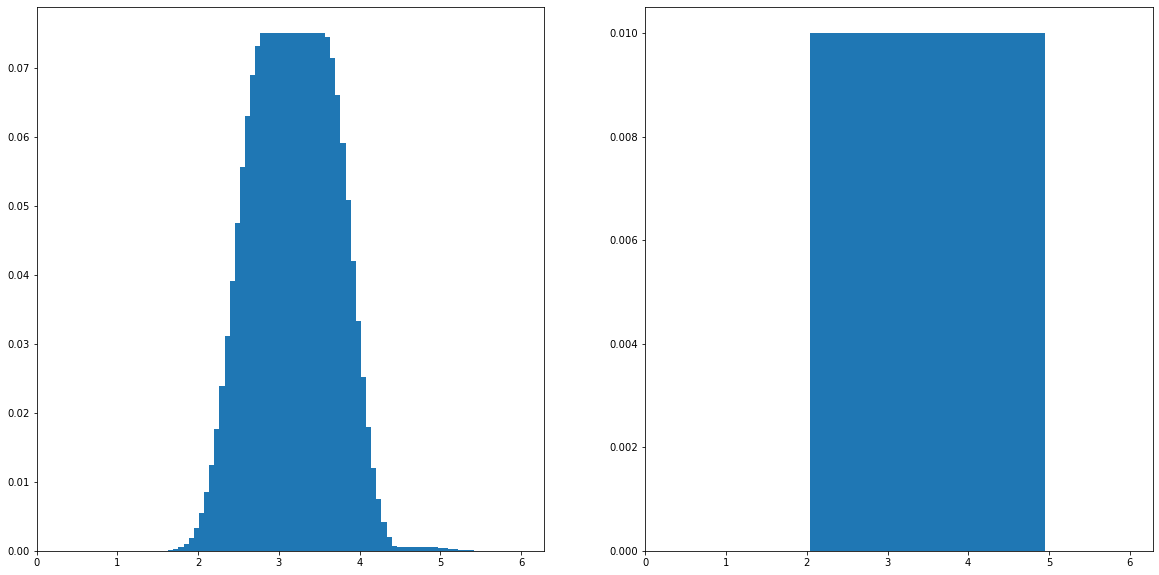

True omega: 3.529477, prediction by LW: 3.529477, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  4.231334204557353 ======================================


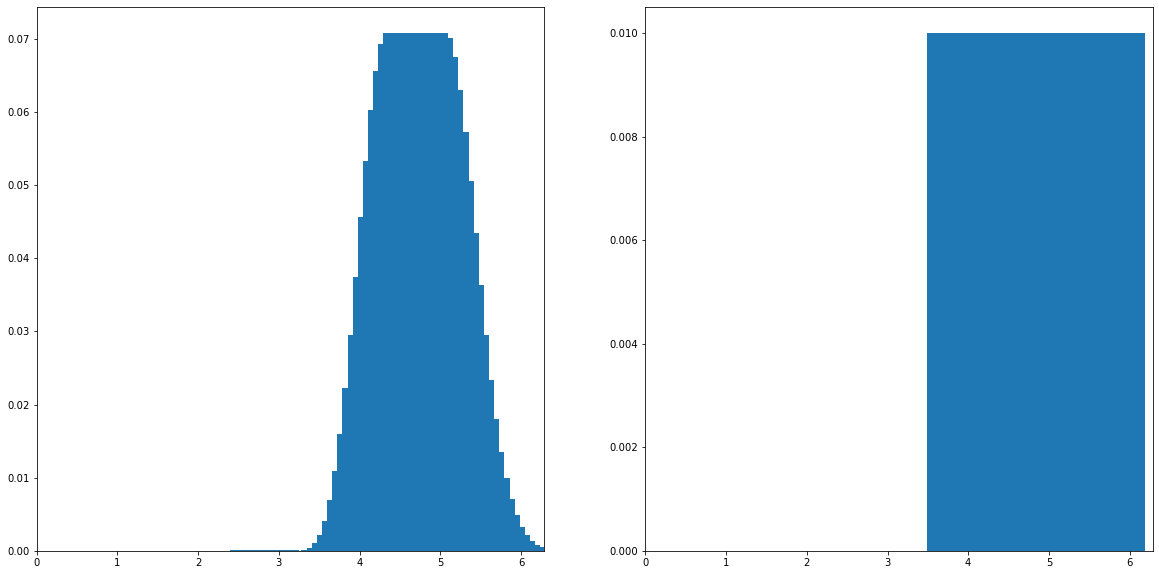

True omega: 4.231334, prediction by LW: 4.231334, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  3.9306439830195505 ======================================


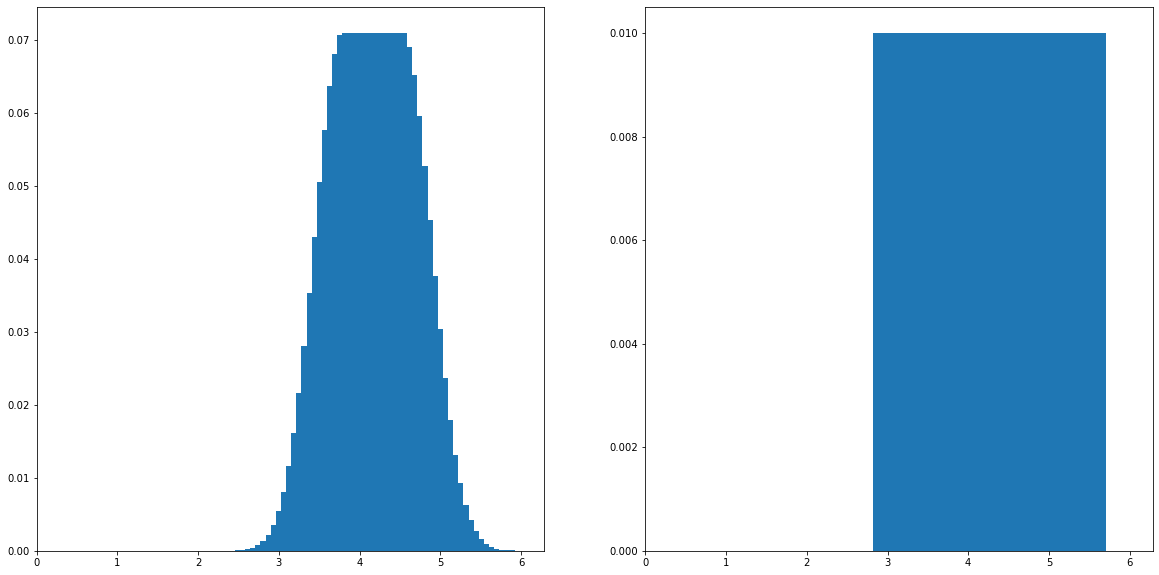

True omega: 3.930644, prediction by LW: 3.930644, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  2.144134925911463 ======================================


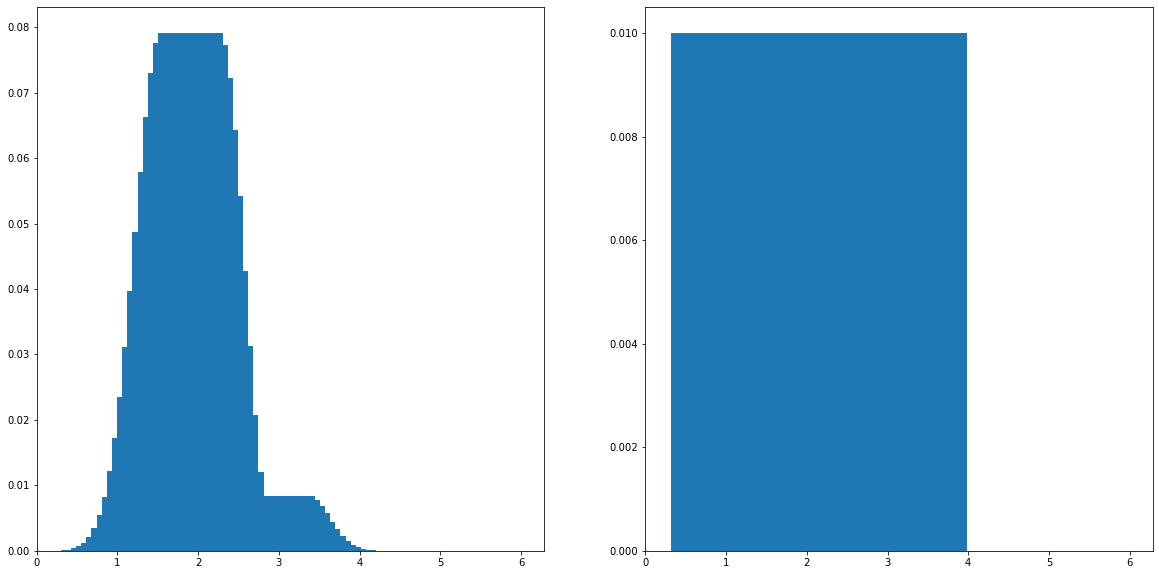

True omega: 2.144135, prediction by LW: 2.144135, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  0.44859603547415206 ======================================


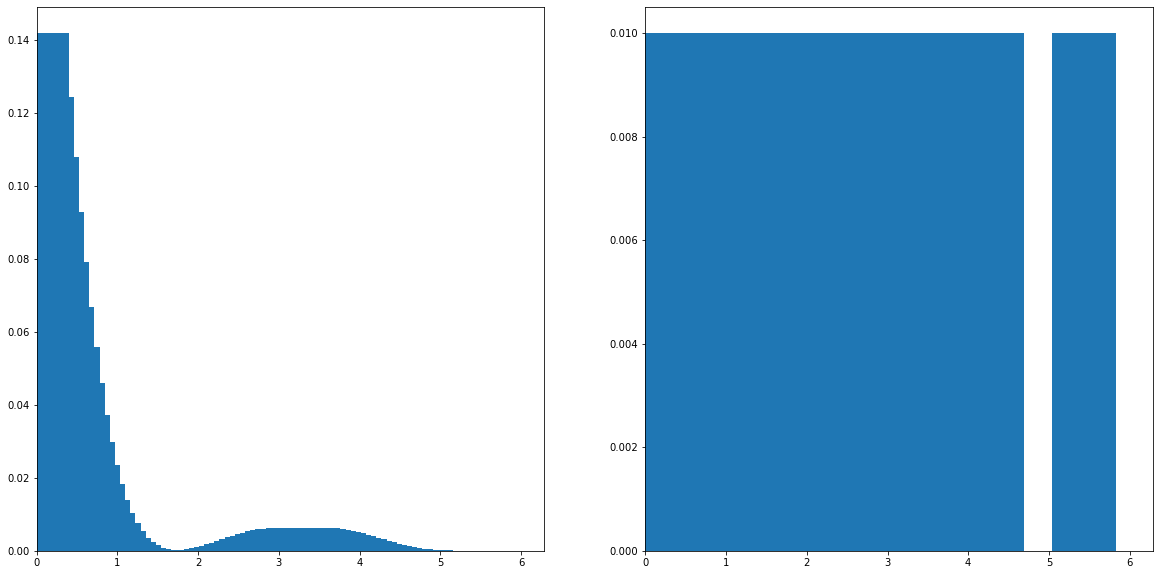

True omega: 0.448596, prediction by LW: 0.448596, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  4.610436868312633 ======================================


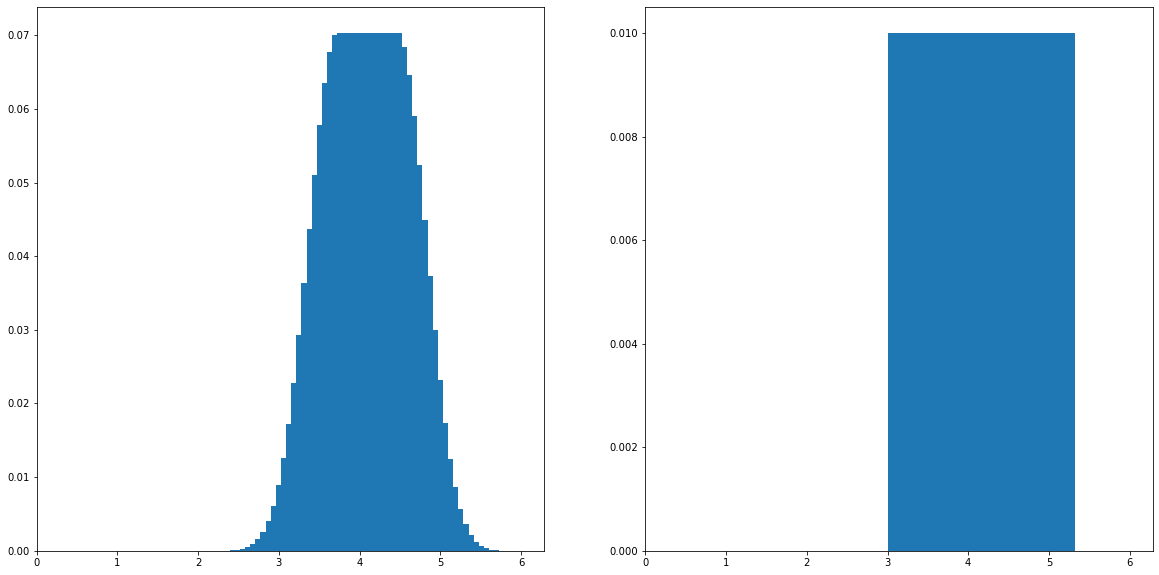

True omega: 4.610437, prediction by LW: 4.610437, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.937502556039721 ======================================


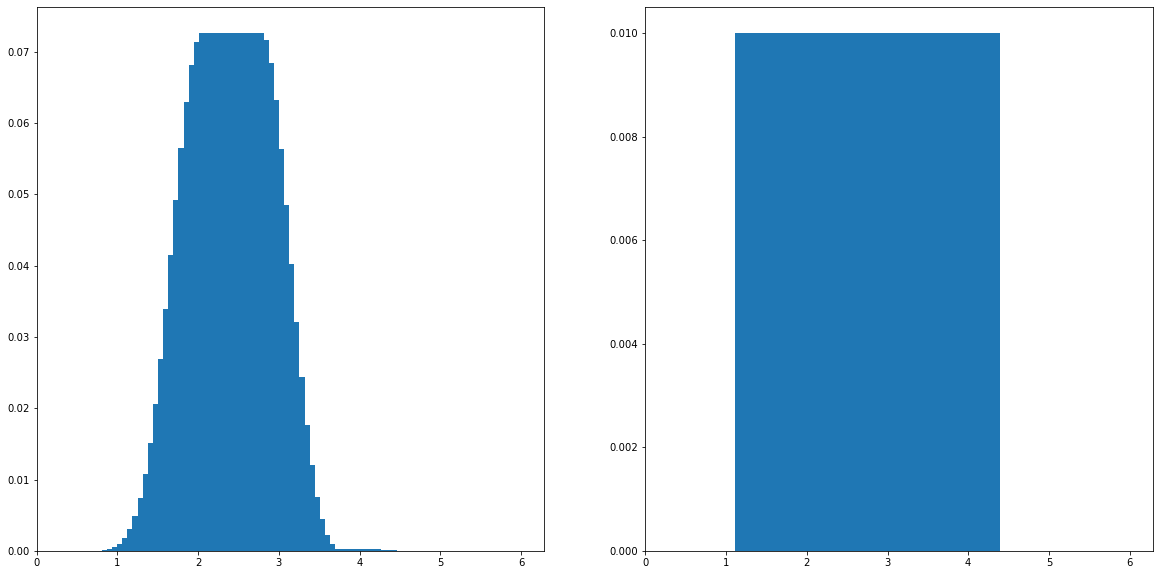

True omega: 2.937503, prediction by LW: 2.937502, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  4.0923886945218655 ======================================


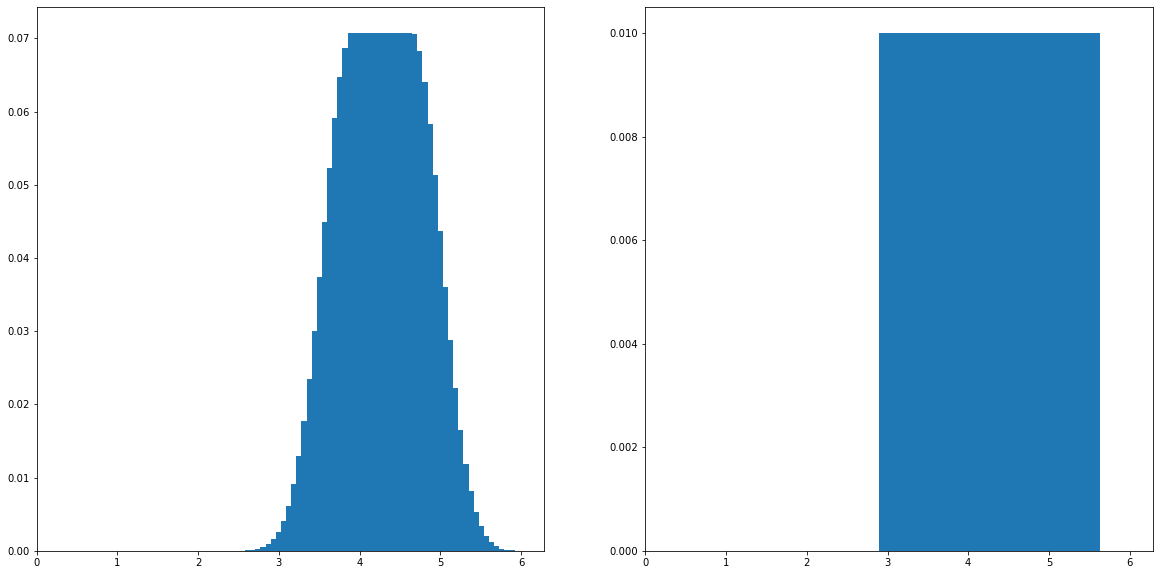

True omega: 4.092389, prediction by LW: 4.092390, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  1.2756421225926255 ======================================


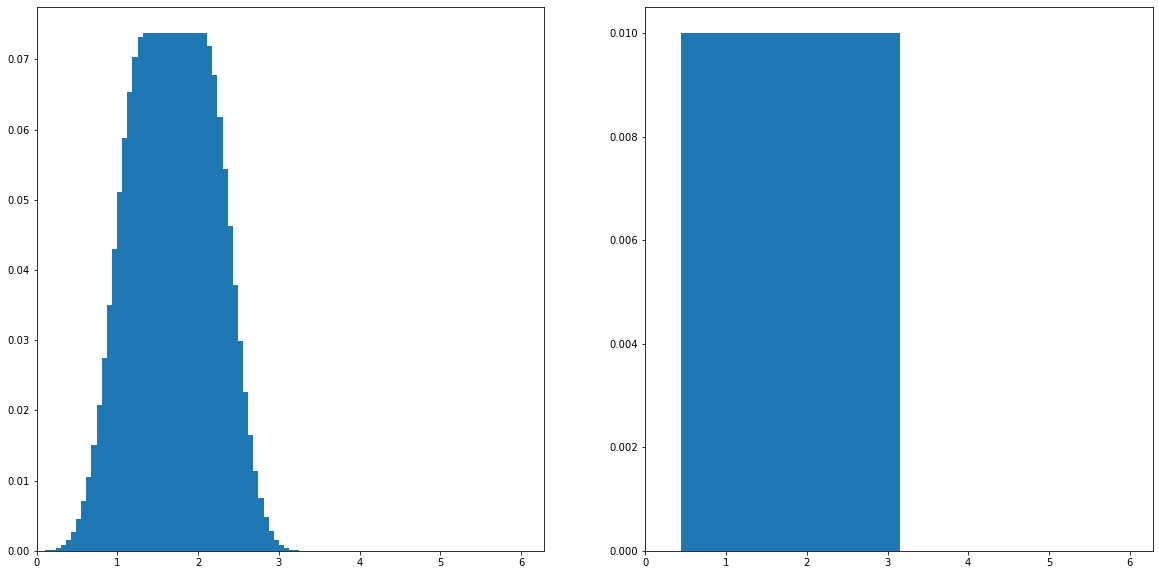

True omega: 1.275642, prediction by LW: 1.275642, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.6806689258362772 ======================================


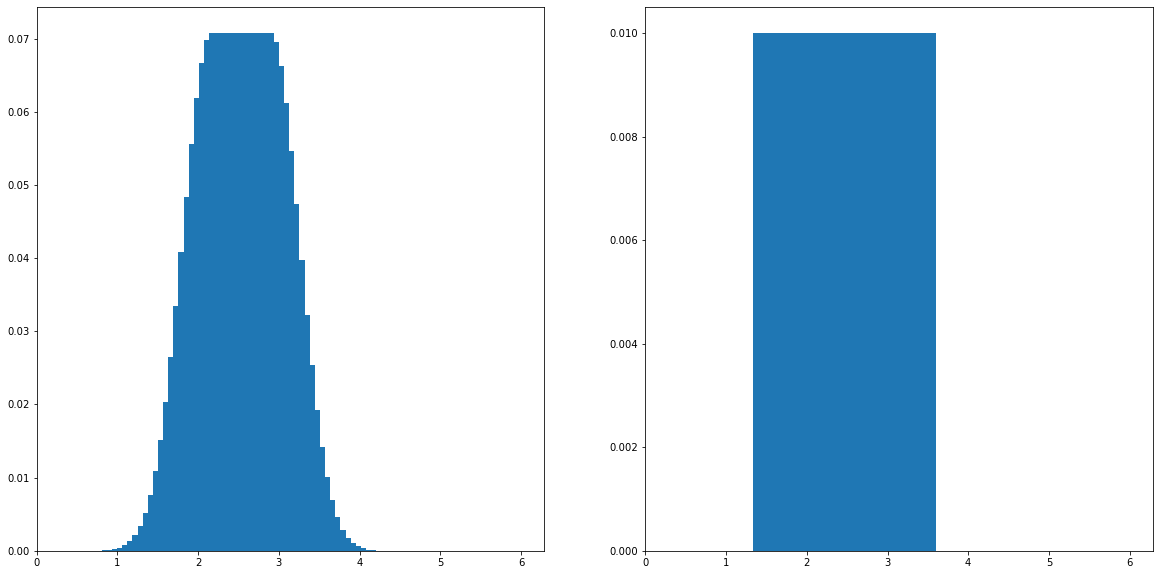

True omega: 2.680669, prediction by LW: 2.680669, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  3.0356143273027545 ======================================


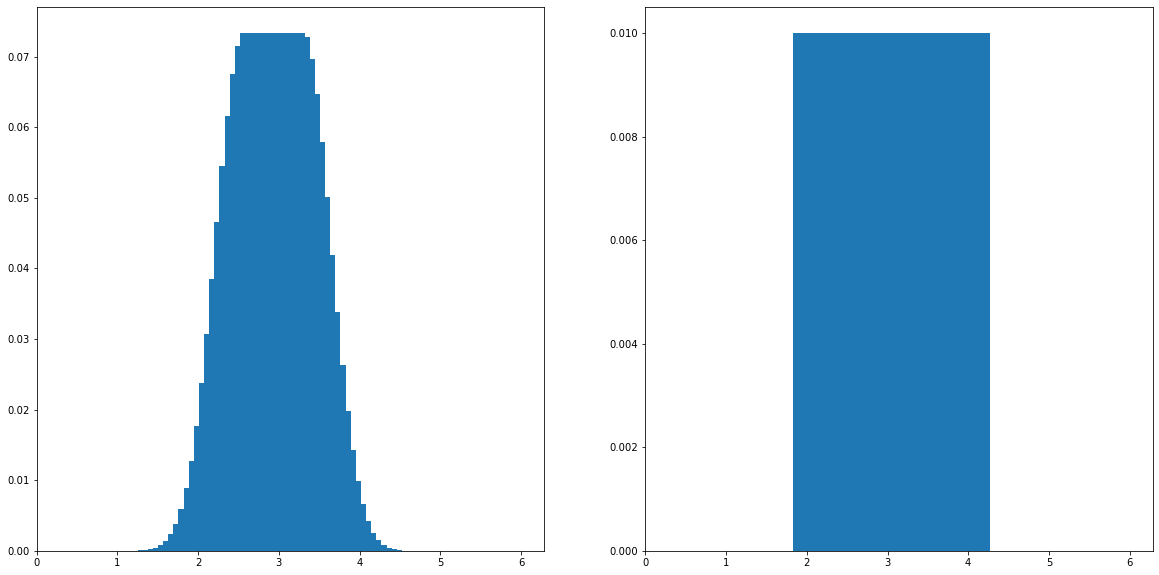

True omega: 3.035614, prediction by LW: 3.035614, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  2.256071736266203 ======================================


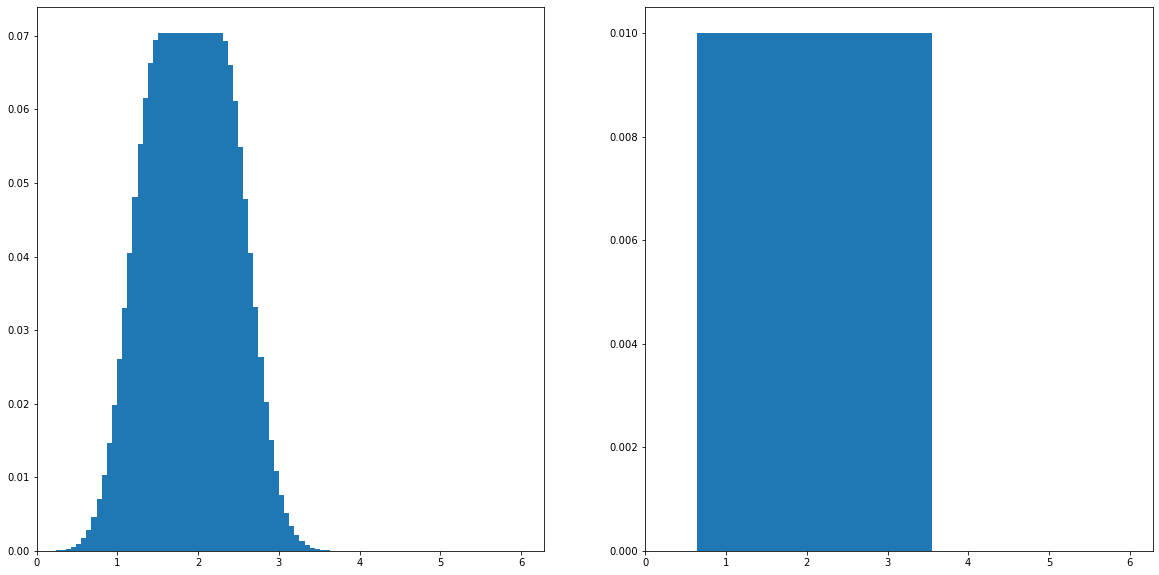

True omega: 2.256072, prediction by LW: 2.256072, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.3534385975917878 ======================================


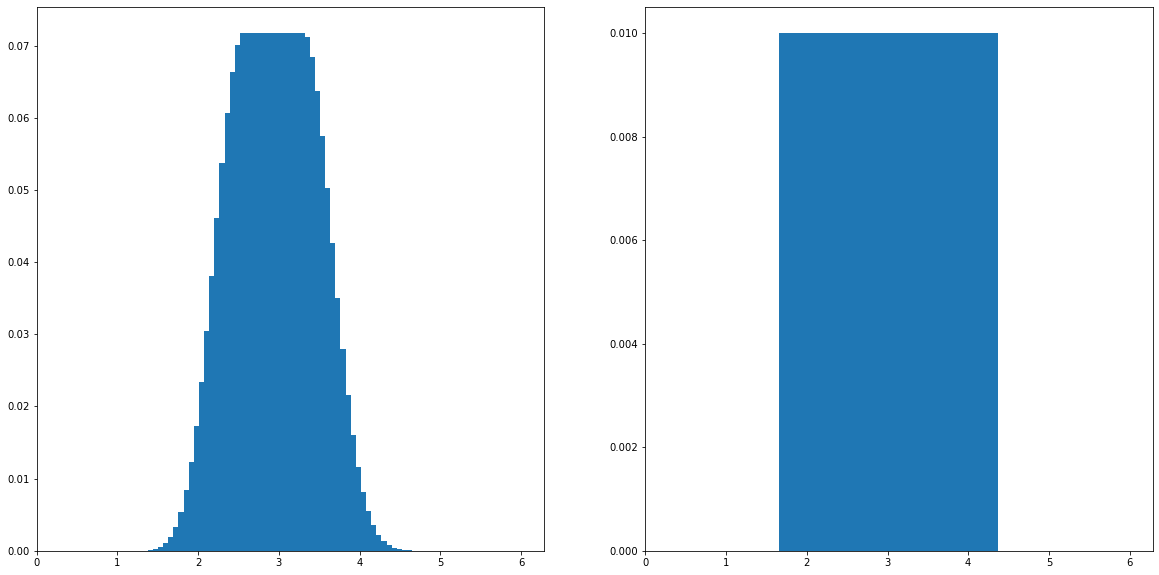

True omega: 3.353439, prediction by LW: 3.353439, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  0.0914108298237181 ======================================


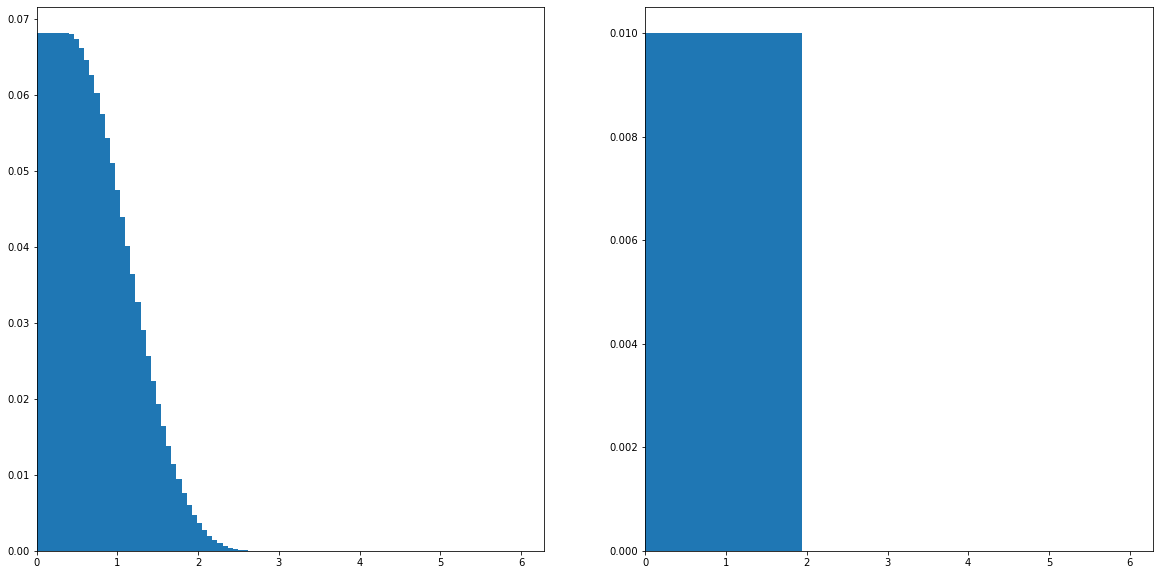

True omega: 0.091411, prediction by LW: 0.091411, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  3.8931804447050897 ======================================


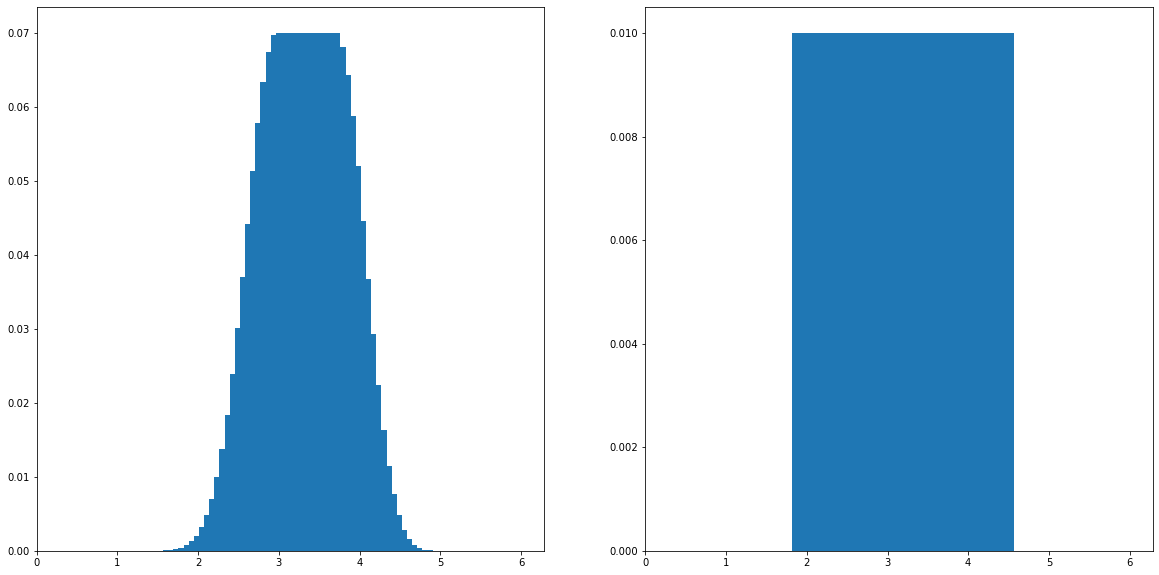

True omega: 3.893180, prediction by LW: 3.893180, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.0070163568719424 ======================================


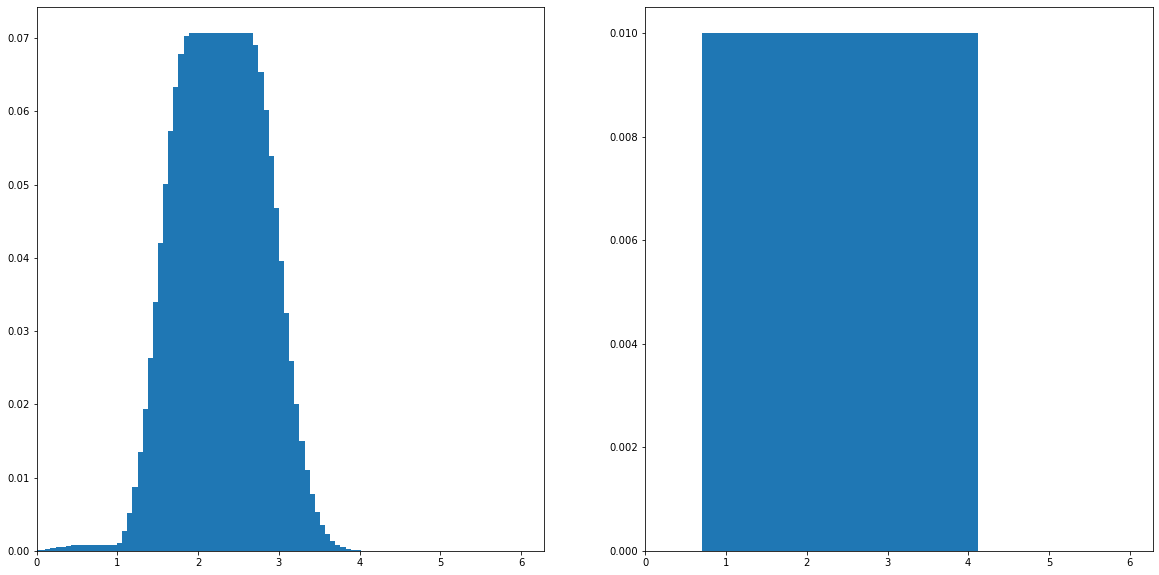

True omega: 2.007016, prediction by LW: 2.007016, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  6.263892733349375 ======================================


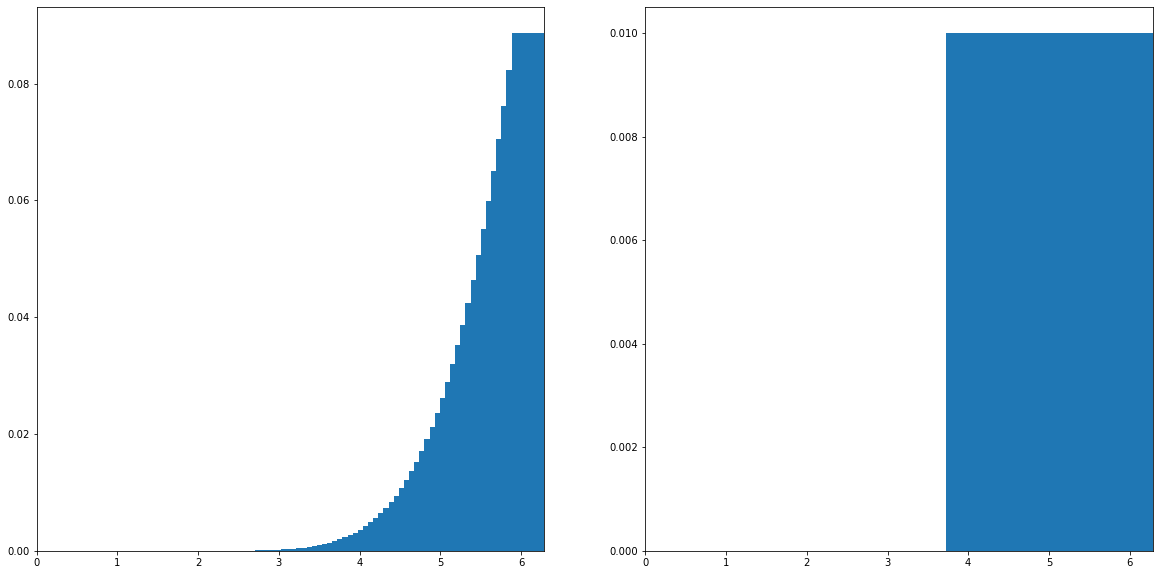

True omega: 6.263893, prediction by LW: 6.263892, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.0427413442953513 ======================================


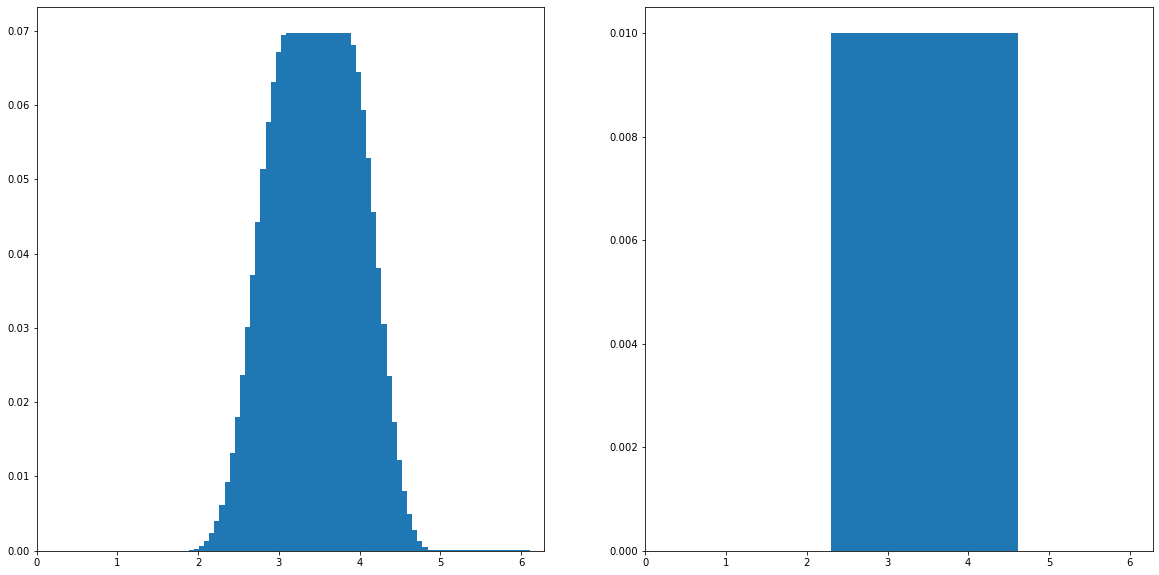

True omega: 3.042741, prediction by LW: 3.042741, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  3.2045873603111525 ======================================


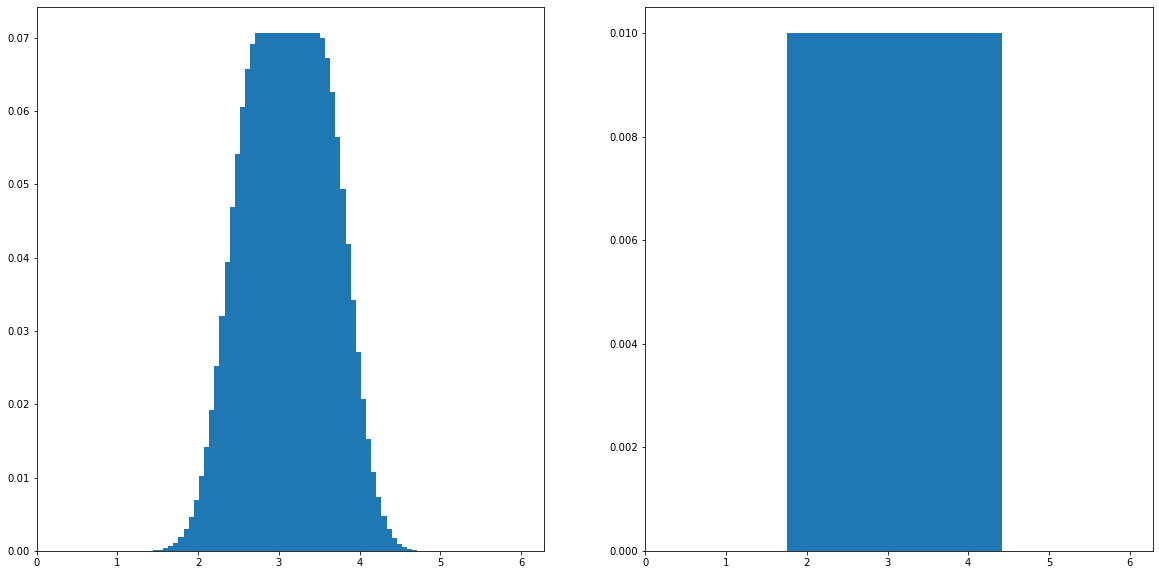

True omega: 3.204587, prediction by LW: 3.204587, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.519351484111355 ======================================


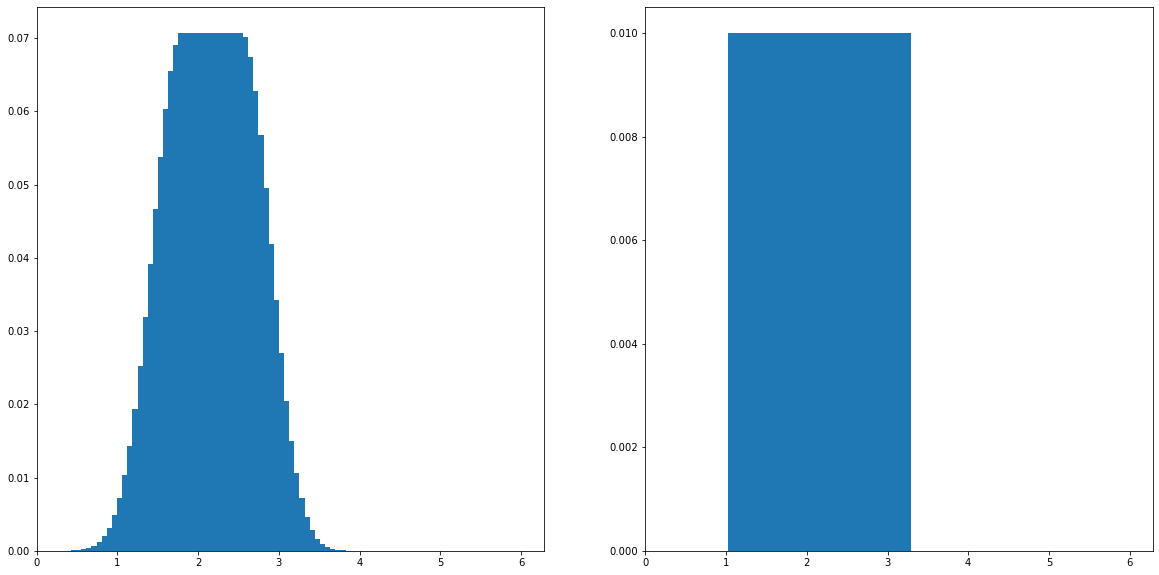

True omega: 2.519351, prediction by LW: 2.519351, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  3.825812706833962 ======================================


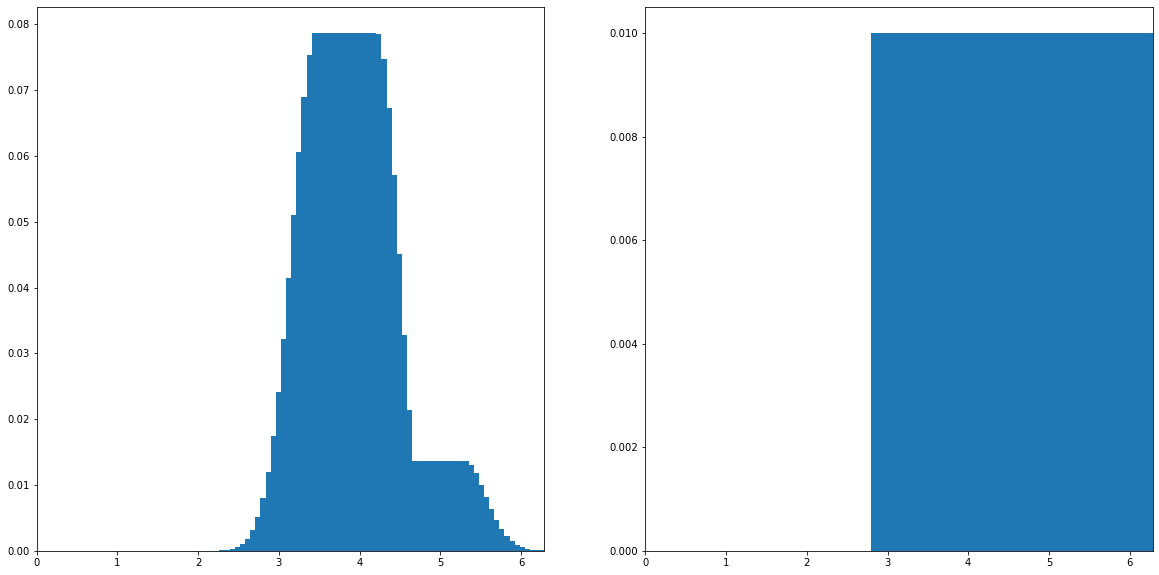

True omega: 3.825813, prediction by LW: 3.825813, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  0.9598522762460883 ======================================


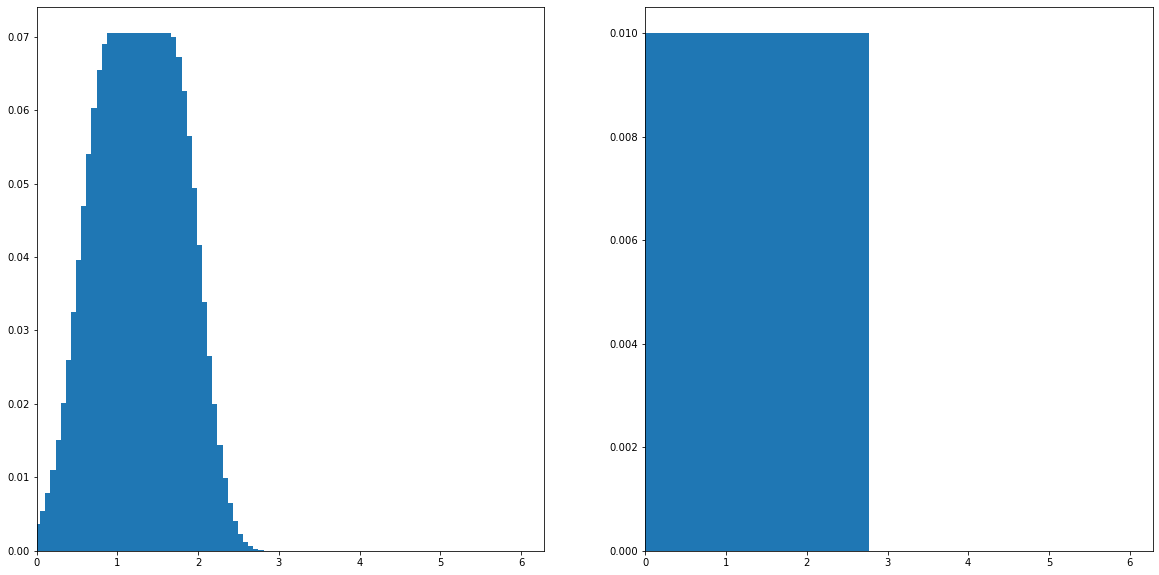

True omega: 0.959852, prediction by LW: 0.959852, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  4.735037595301854 ======================================


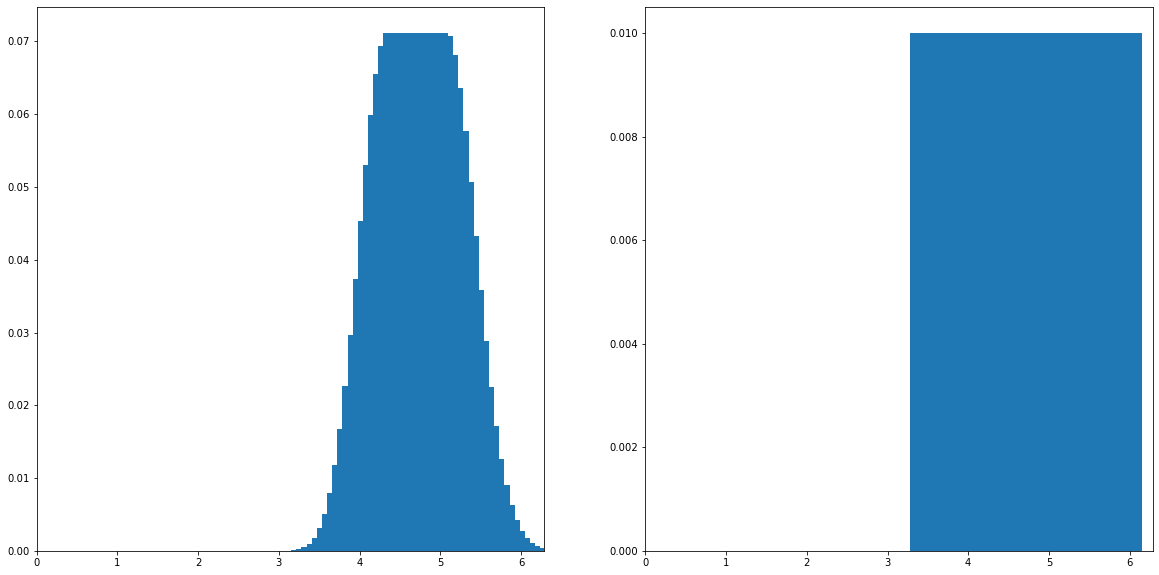

True omega: 4.735038, prediction by LW: 4.735038, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  3.9491212802826134 ======================================


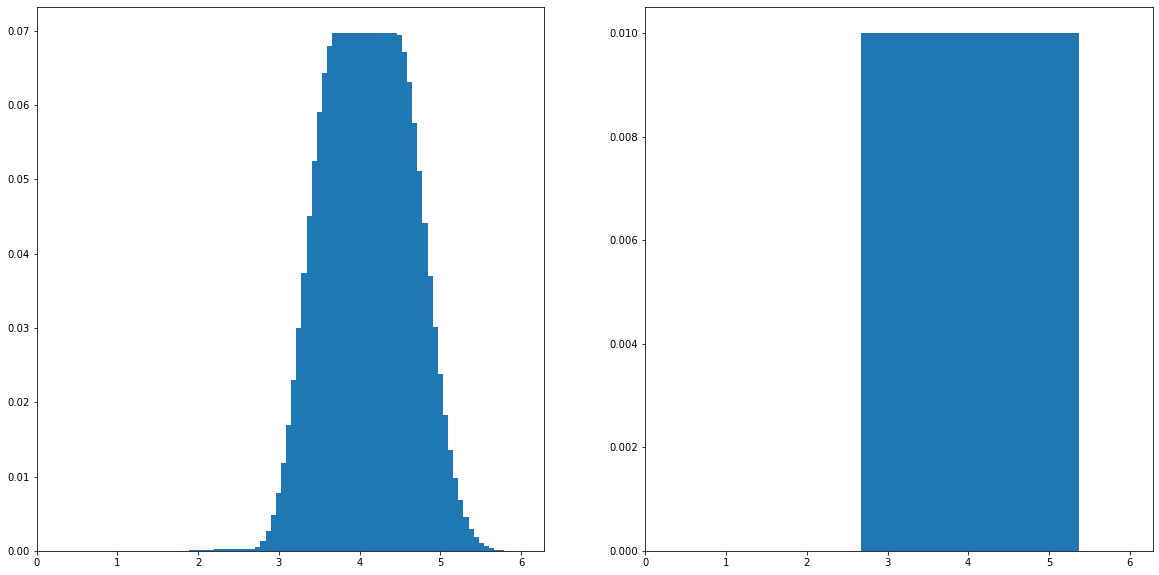

True omega: 3.949121, prediction by LW: 3.949121, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  4.6579043975823655 ======================================


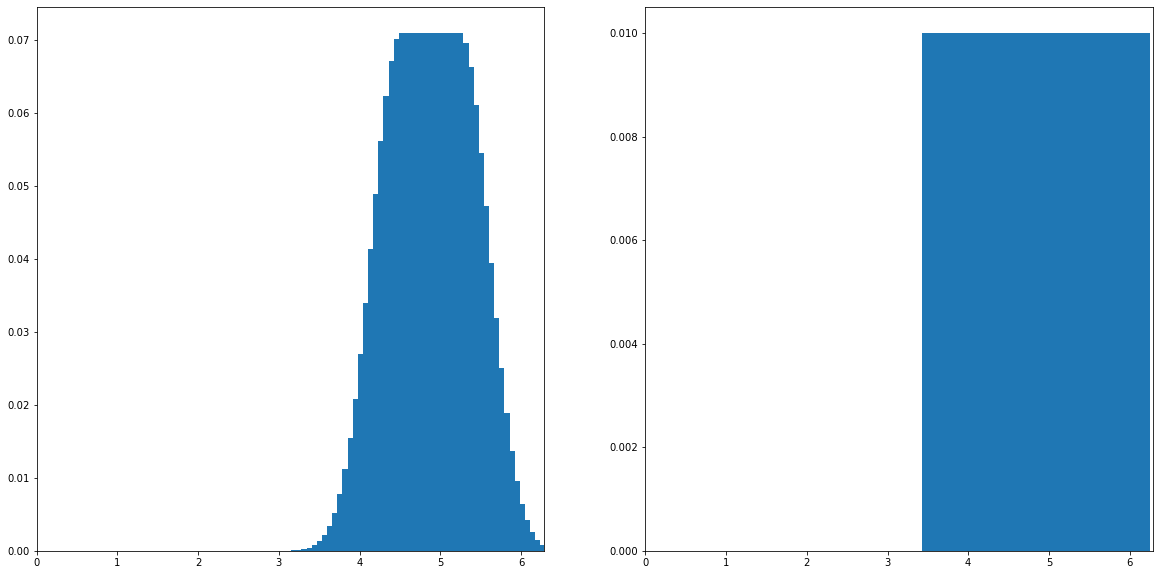

True omega: 4.657904, prediction by LW: 4.657903, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  5.5155307838909735 ======================================


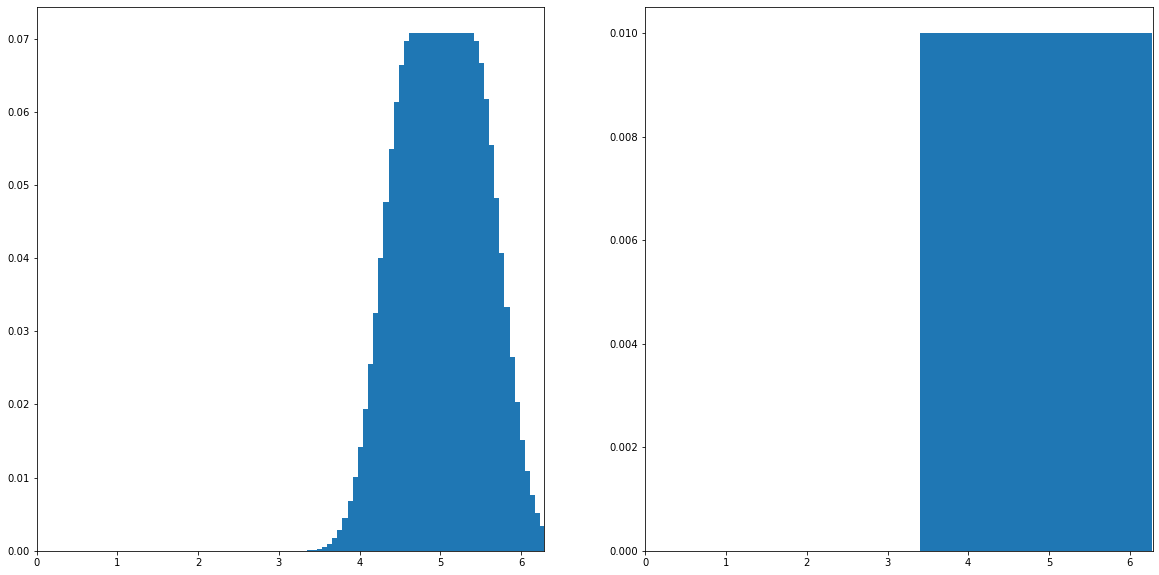

True omega: 5.515531, prediction by LW: 5.515531, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.534838848580425 ======================================


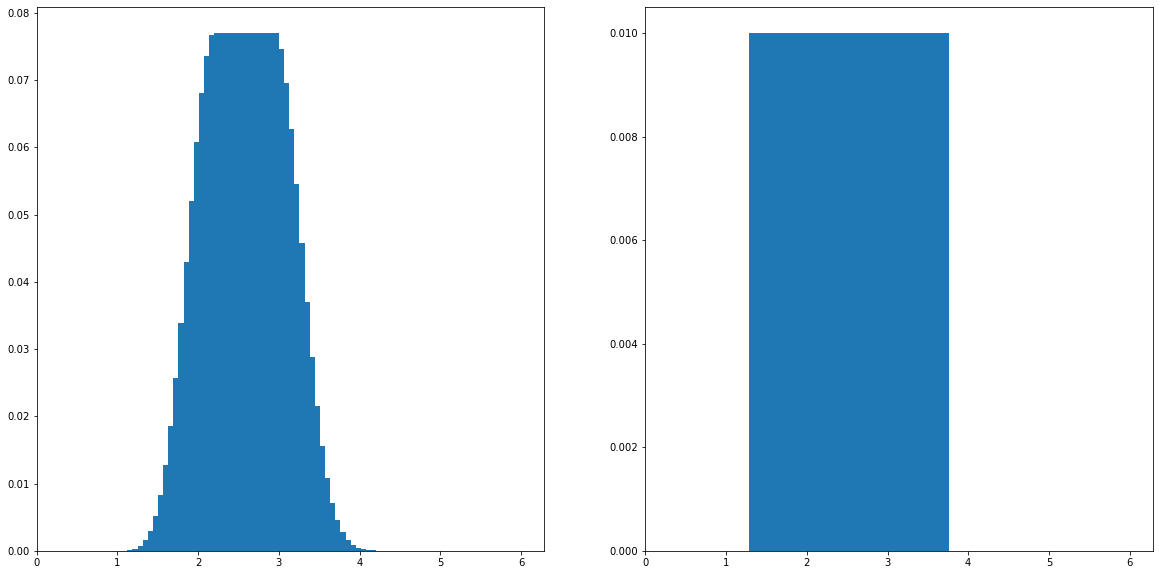

True omega: 2.534839, prediction by LW: 2.534839, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  0.7328947151931062 ======================================


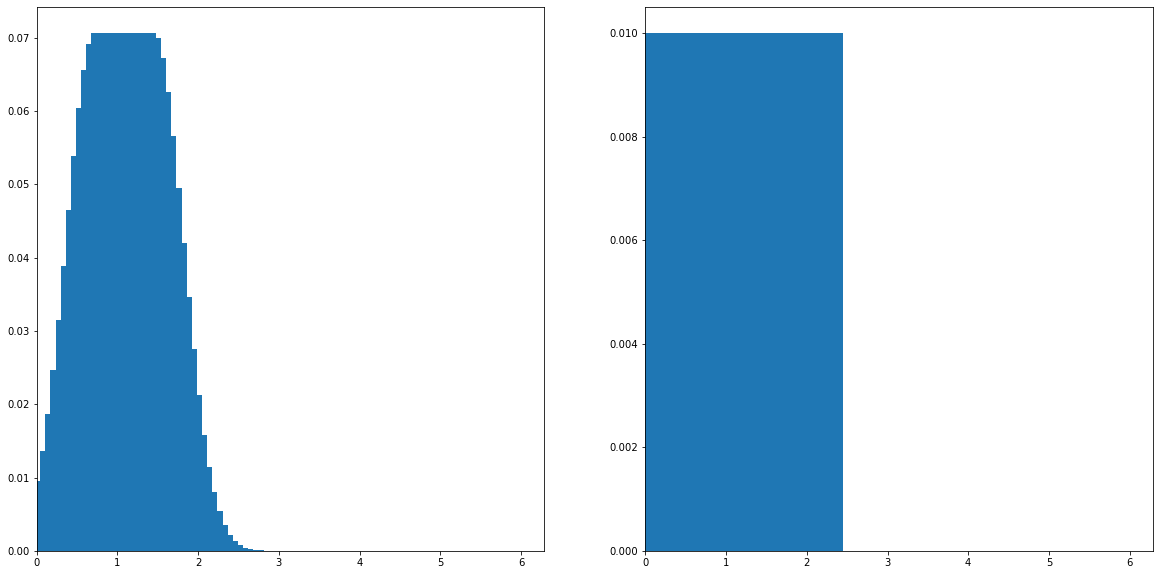

True omega: 0.732895, prediction by LW: 0.732895, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  5.010798229948069 ======================================


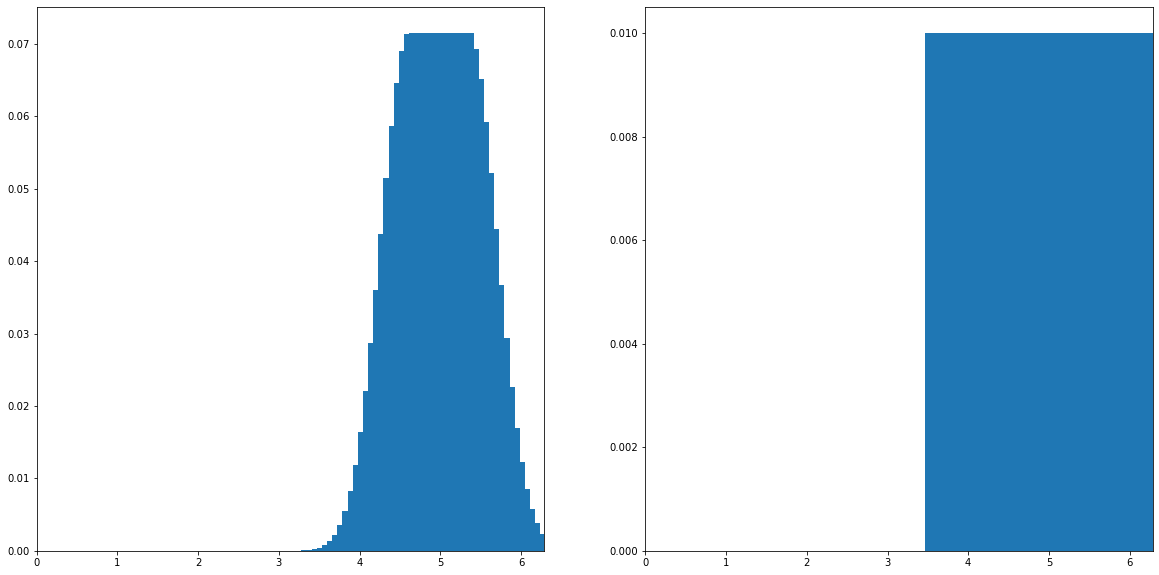

True omega: 5.010798, prediction by LW: 5.010799, num of resample calls: 9
==============NEW EXPERIMENT WITH OMEGA =  1.5161319374649815 ======================================


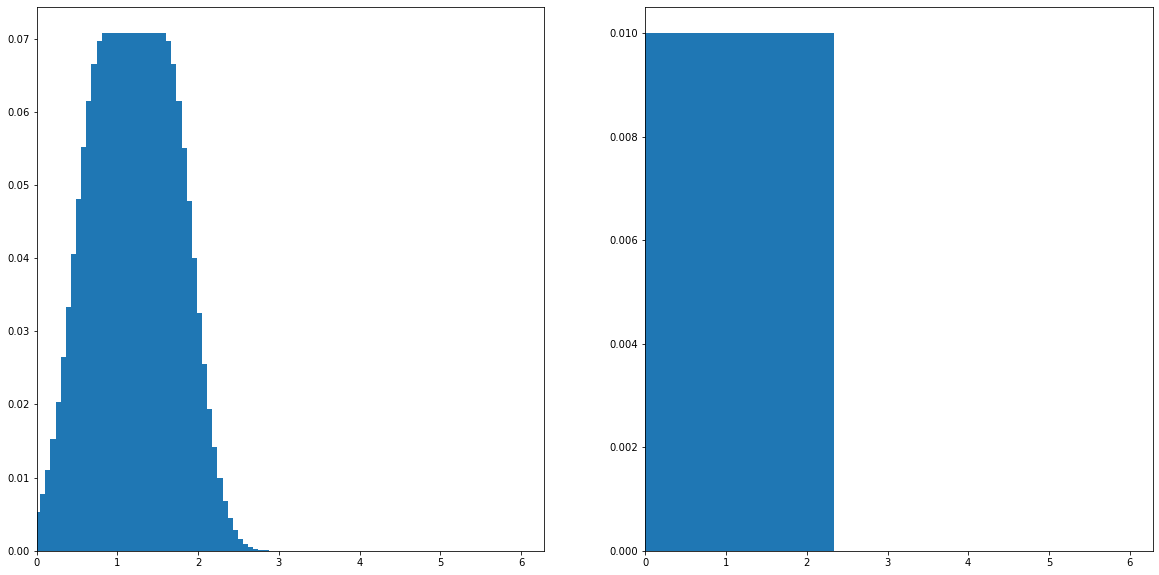

True omega: 1.516132, prediction by LW: 1.516132, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  5.048465891110348 ======================================


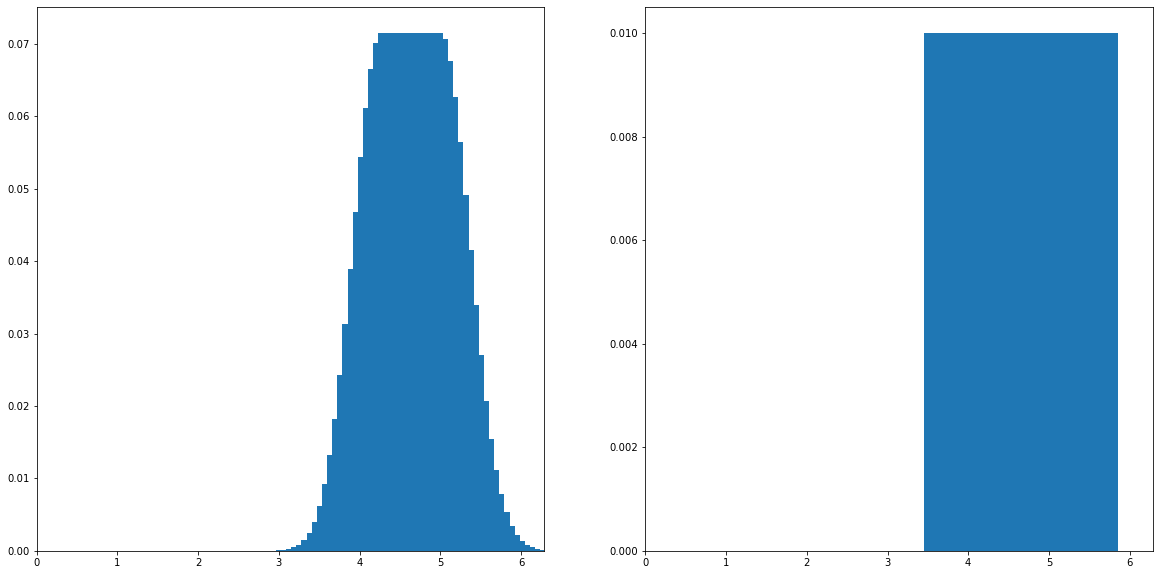

True omega: 5.048466, prediction by LW: 5.048466, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  5.939927983785132 ======================================


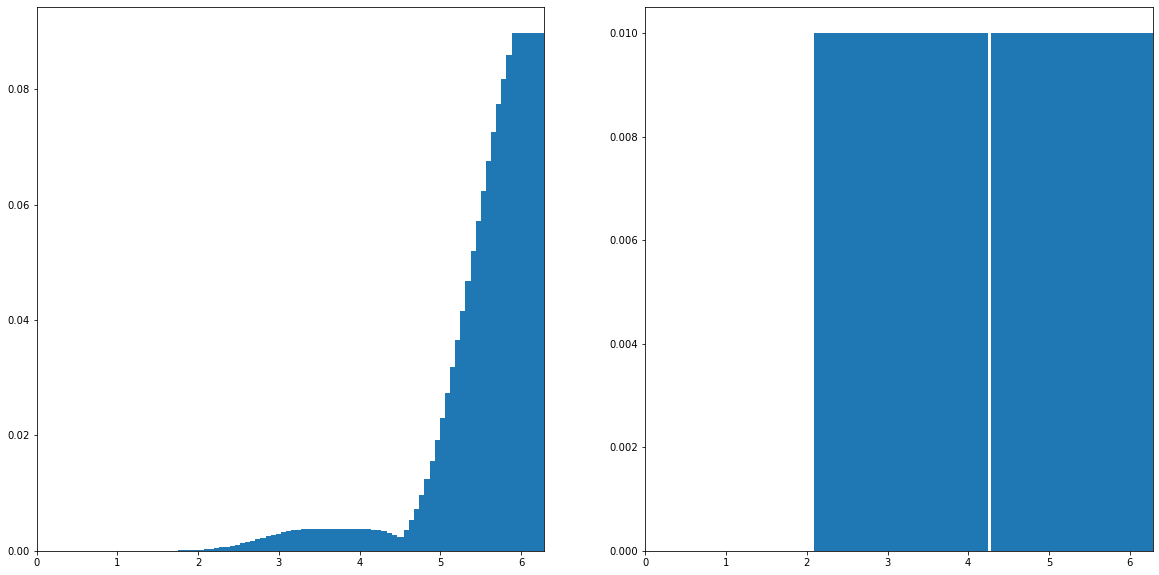

True omega: 5.939928, prediction by LW: 5.939928, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  3.7631308630590956 ======================================


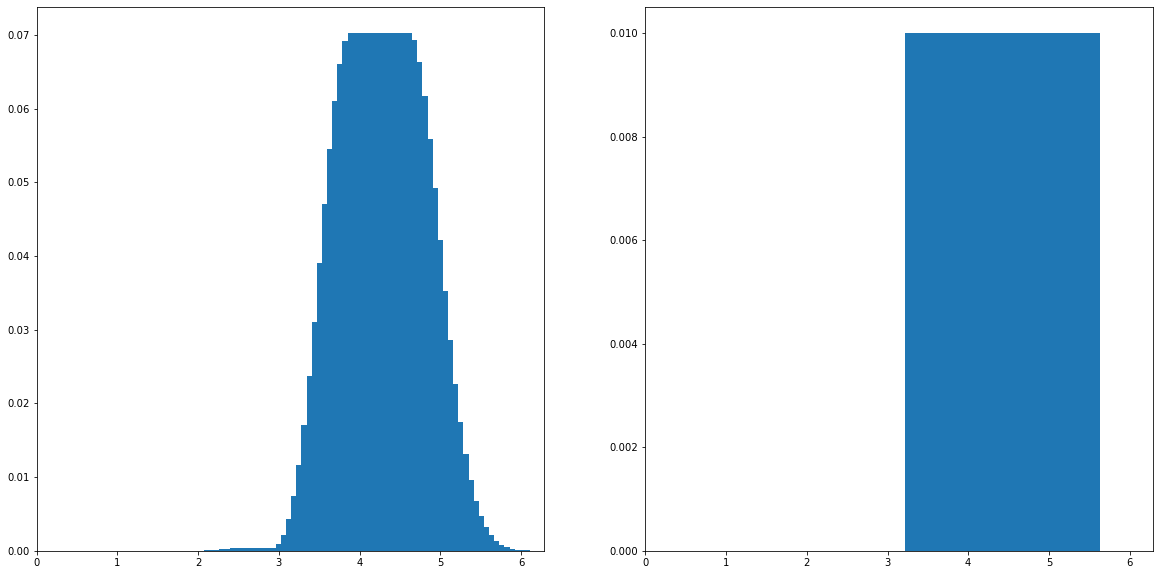

True omega: 3.763131, prediction by LW: 3.763131, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  4.33505130283017 ======================================


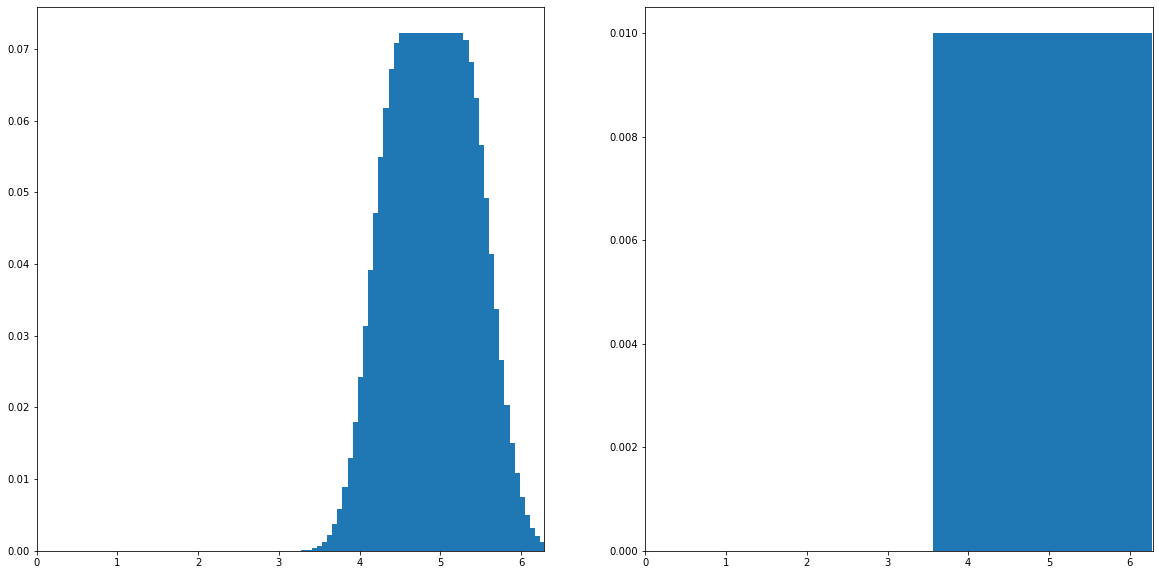

True omega: 4.335051, prediction by LW: 4.335051, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  1.552231576937078 ======================================


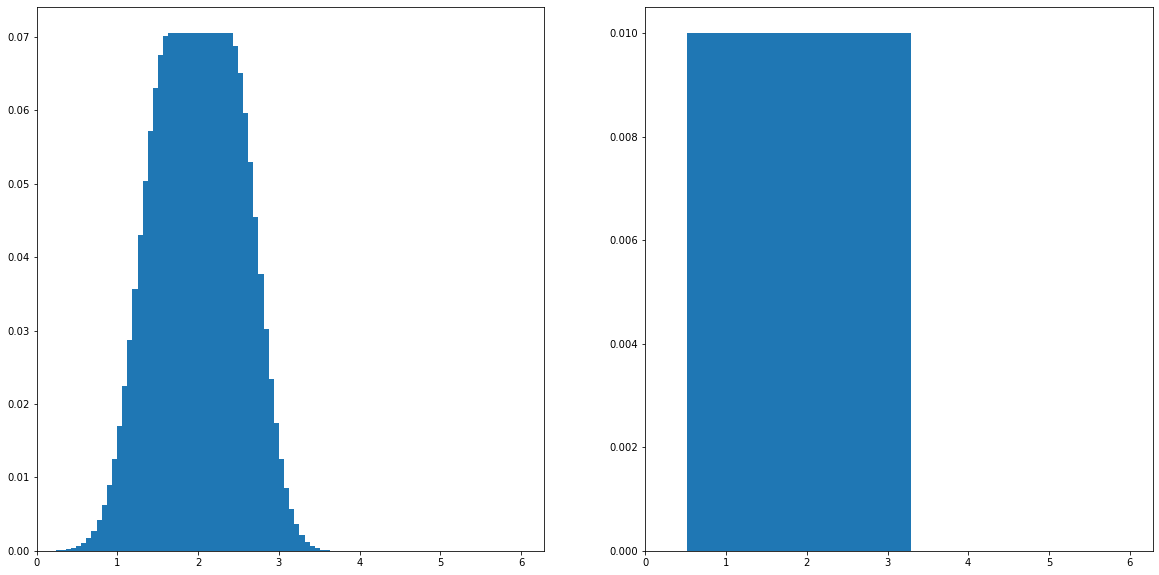

True omega: 1.552232, prediction by LW: 1.552232, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  3.9399926771874427 ======================================


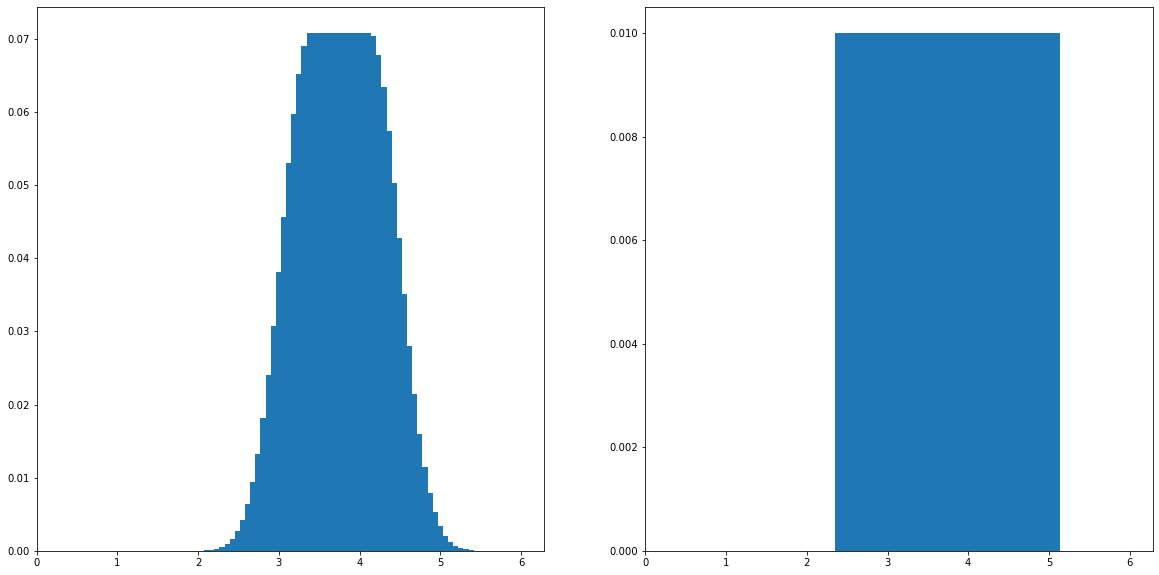

True omega: 3.939993, prediction by LW: 3.939993, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  0.985535747575258 ======================================


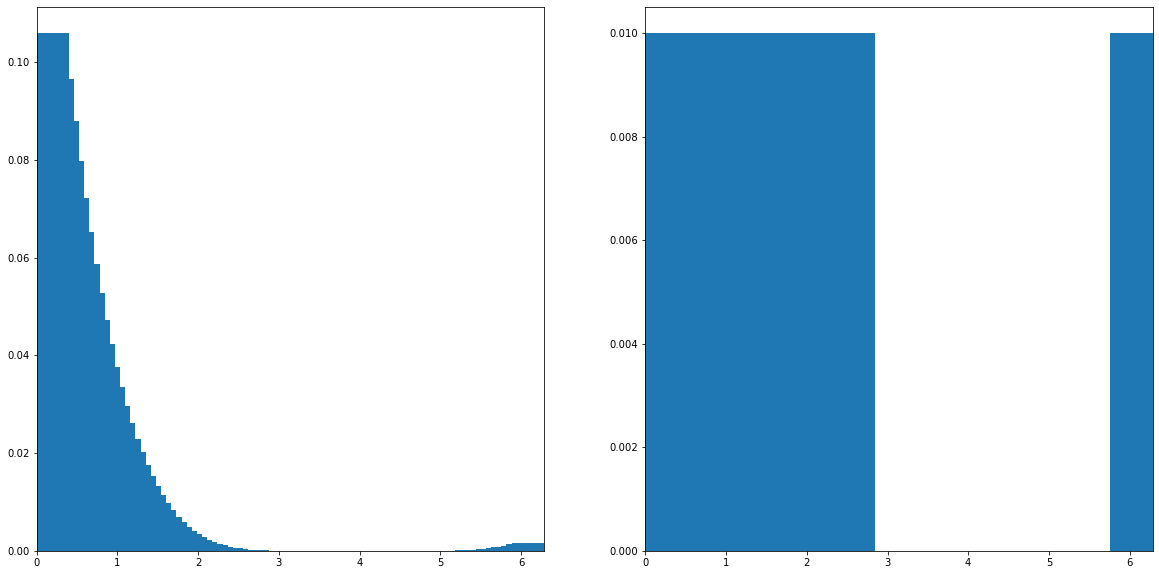

True omega: 0.985536, prediction by LW: 0.985536, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  4.833283272847203 ======================================


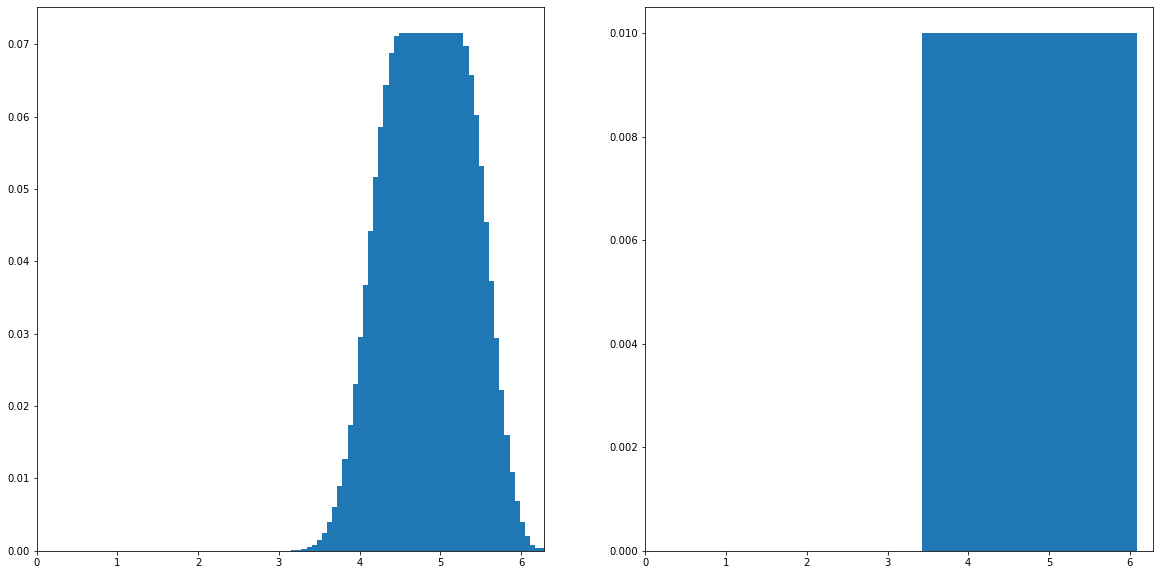

True omega: 4.833283, prediction by LW: 4.833283, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  4.16685200666612 ======================================


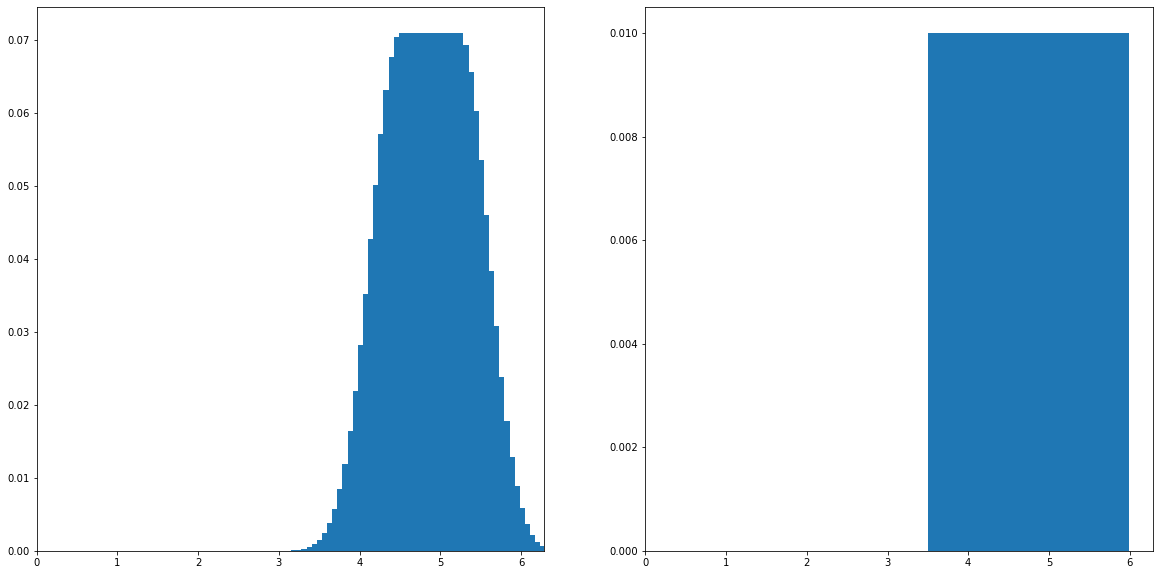

True omega: 4.166852, prediction by LW: 4.166852, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  0.31833926434041476 ======================================


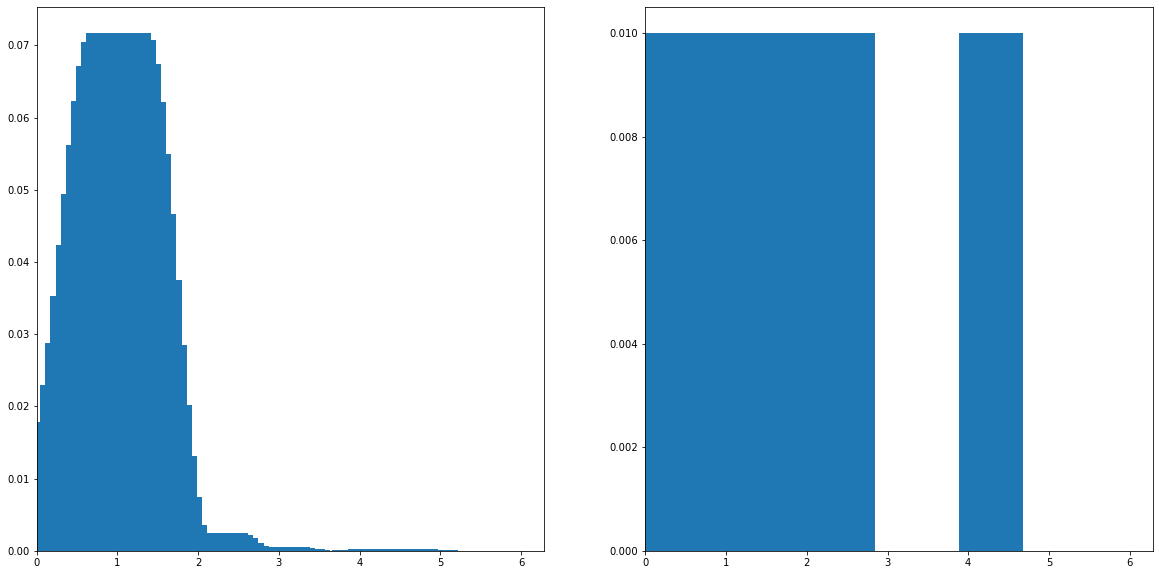

True omega: 0.318339, prediction by LW: 0.318339, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  0.25510067620373156 ======================================


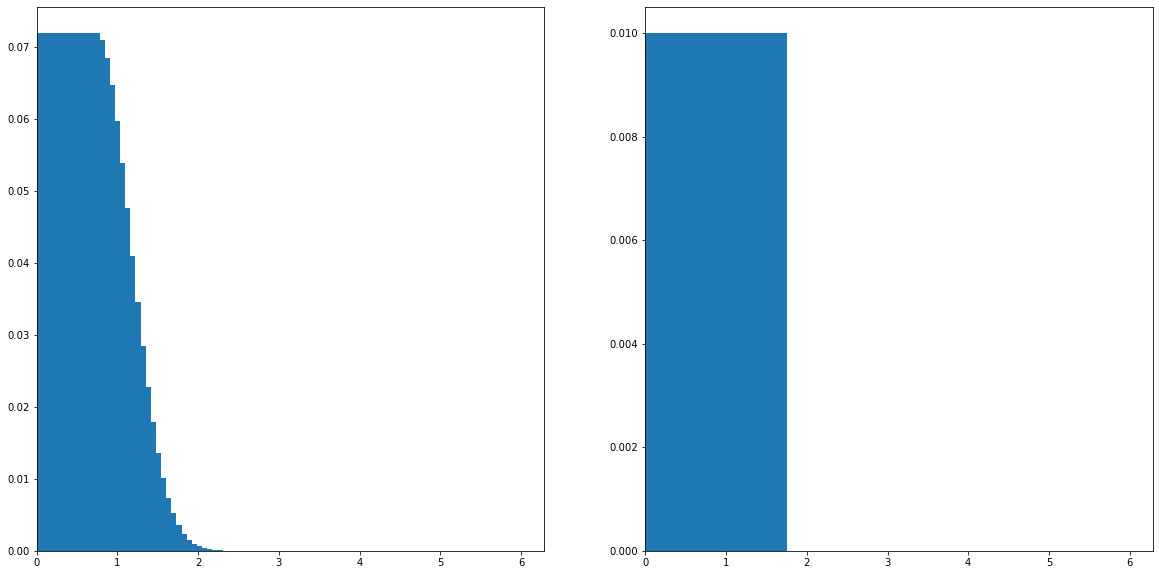

True omega: 0.255101, prediction by LW: 0.255101, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.52173486193586 ======================================


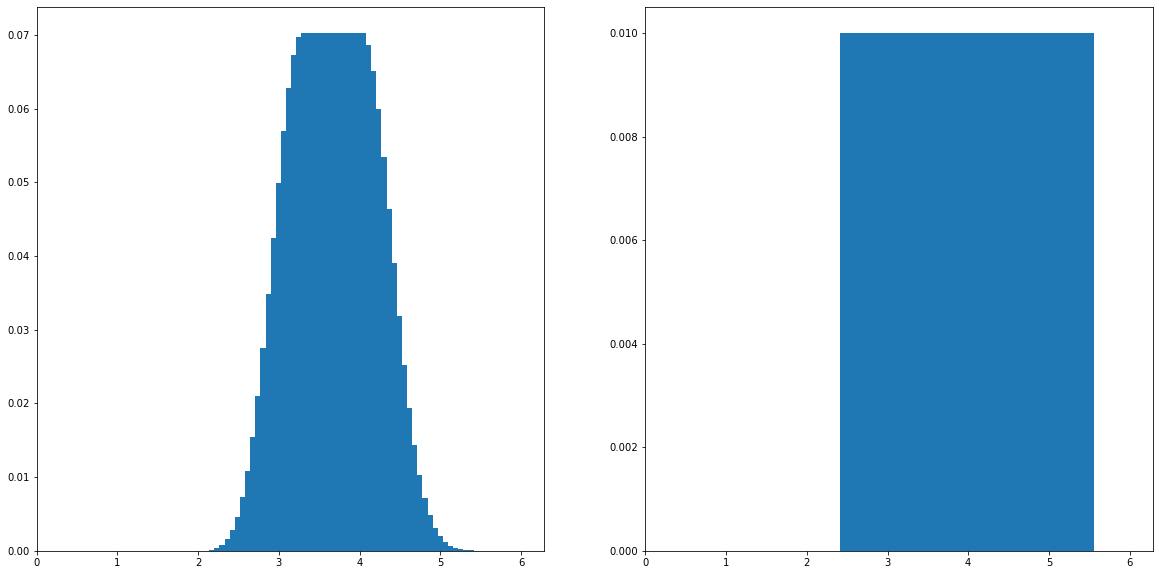

True omega: 3.521735, prediction by LW: 3.521735, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  6.106111333239657 ======================================


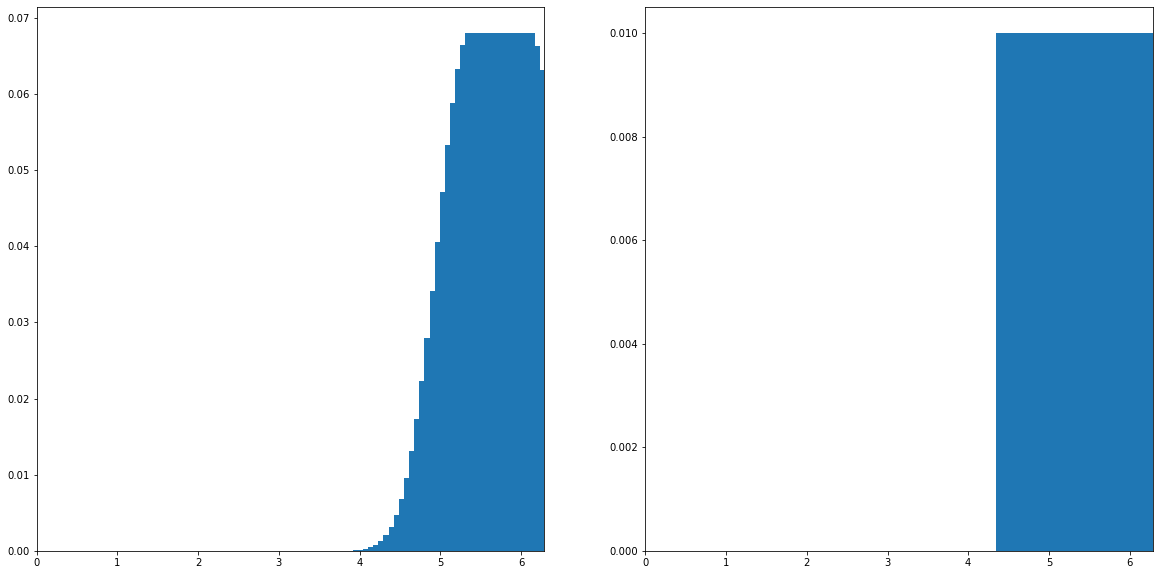

True omega: 6.106111, prediction by LW: 6.106113, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.385899054653001 ======================================


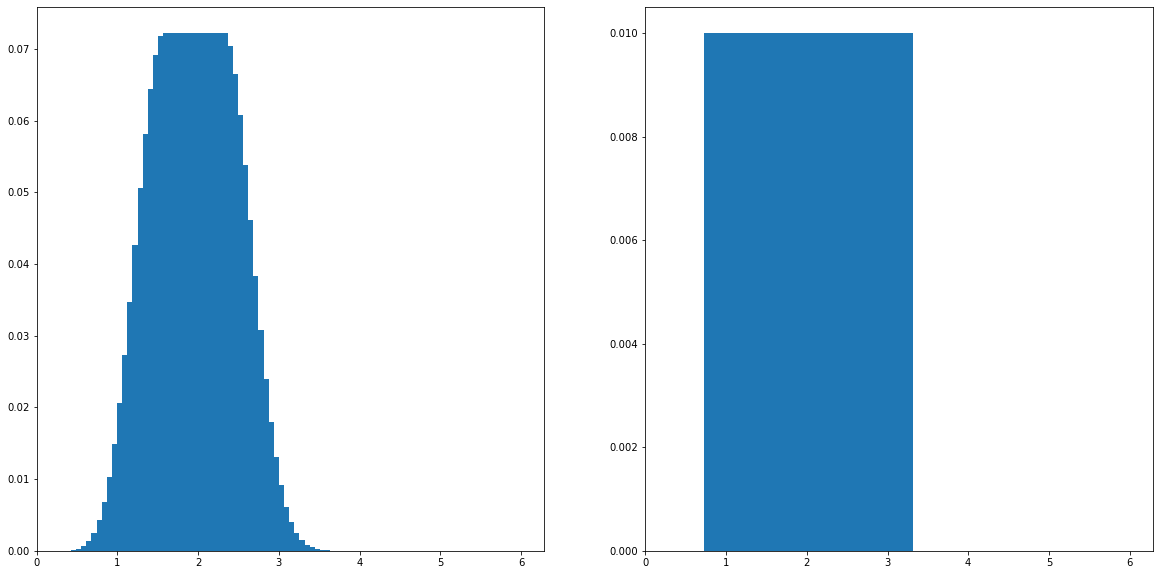

True omega: 2.385899, prediction by LW: 2.385899, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  2.630802014468671 ======================================


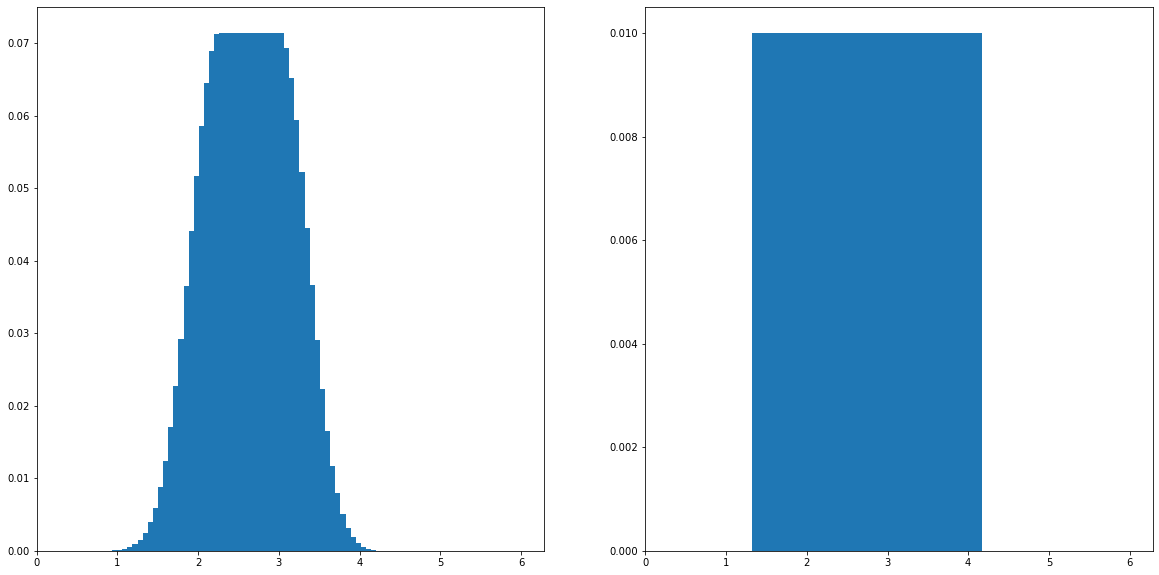

True omega: 2.630802, prediction by LW: 2.630802, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  4.671746318065056 ======================================


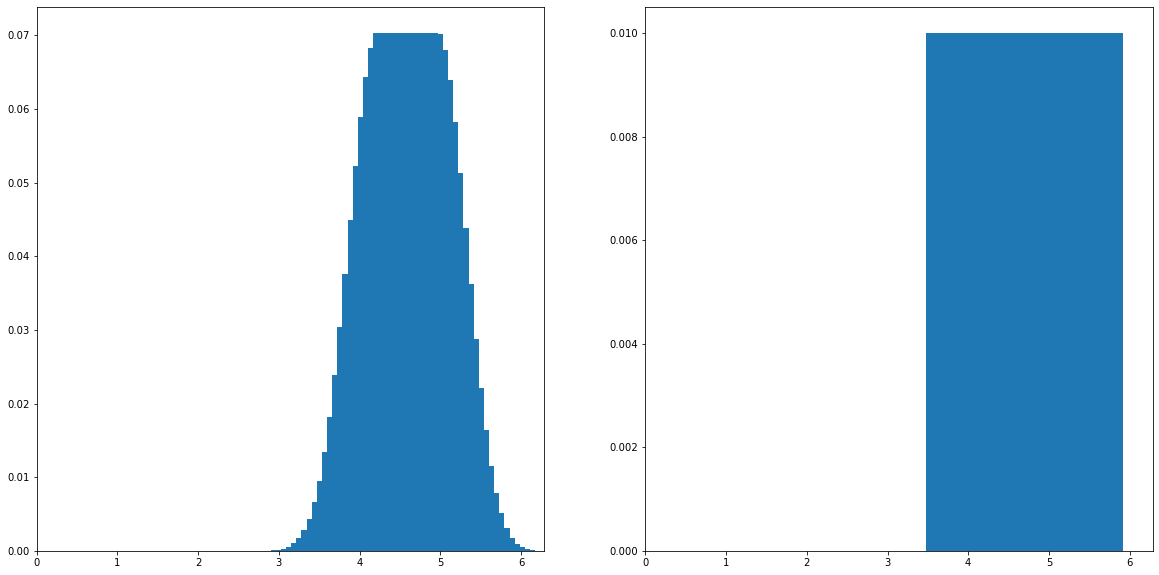

True omega: 4.671746, prediction by LW: 4.671746, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  5.492516472099839 ======================================


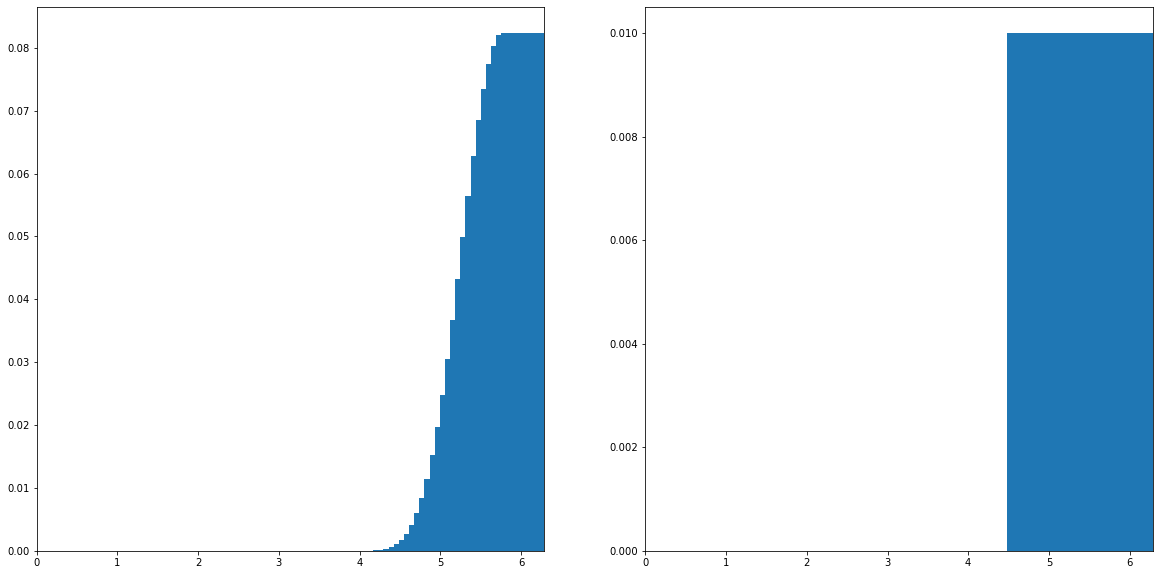

True omega: 5.492516, prediction by LW: 5.492517, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  1.5732073380900662 ======================================


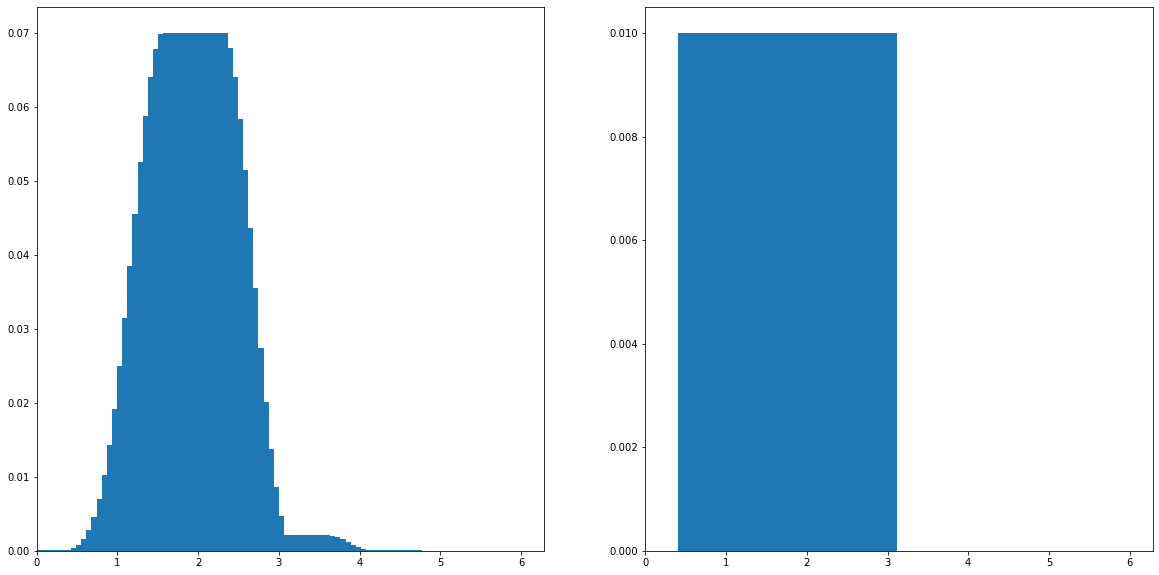

True omega: 1.573207, prediction by LW: 1.573207, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  1.6658394319792467 ======================================


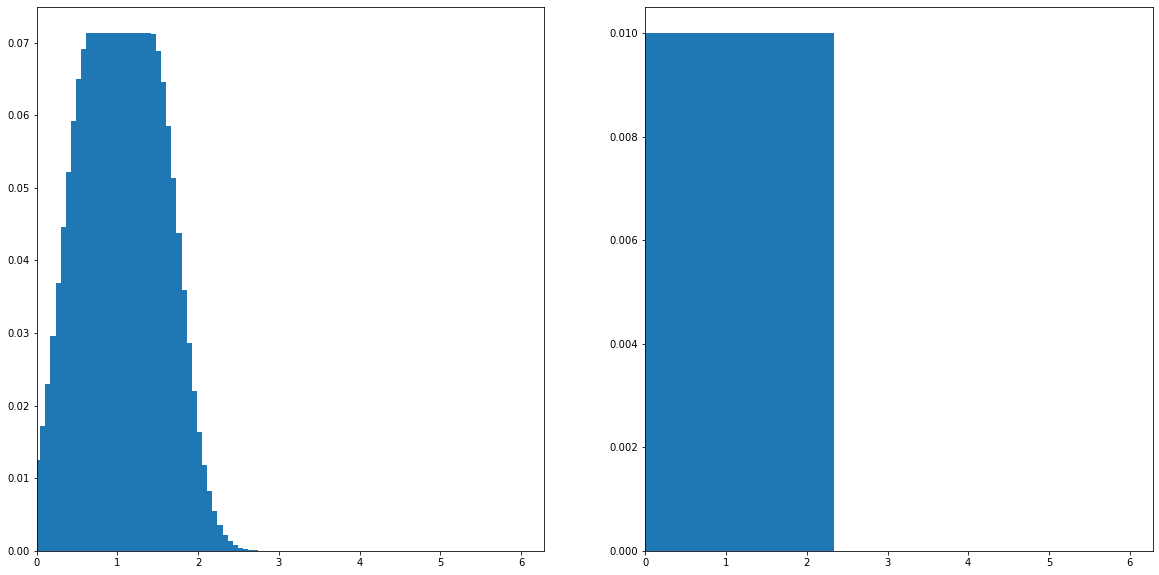

True omega: 1.665839, prediction by LW: 1.665839, num of resample calls: 15
==============NEW EXPERIMENT WITH OMEGA =  3.982982704829608 ======================================


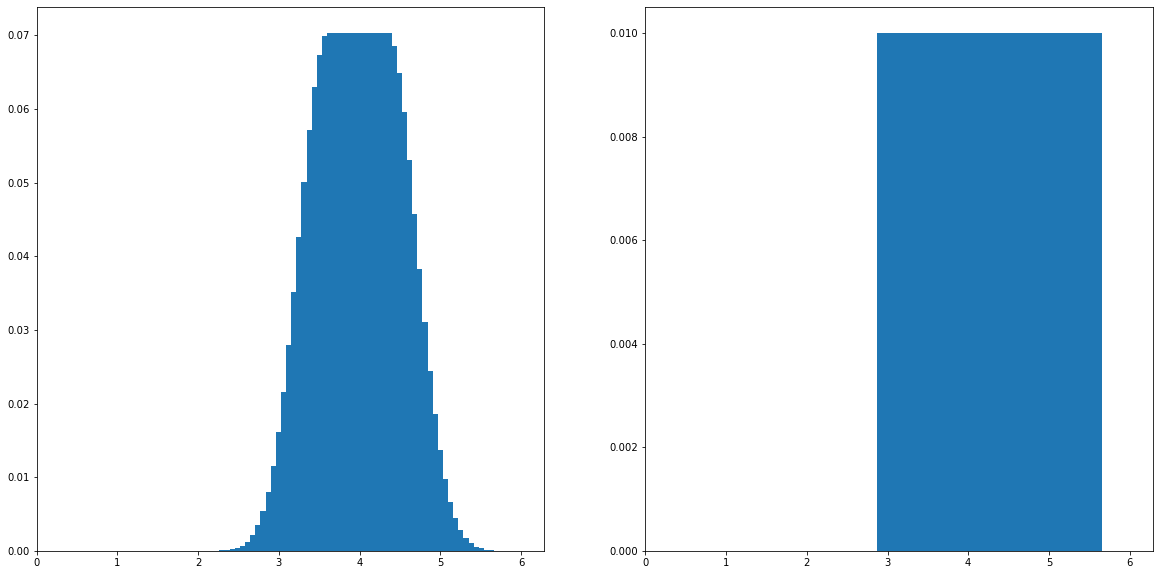

True omega: 3.982983, prediction by LW: 3.982983, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  5.7875128461418575 ======================================


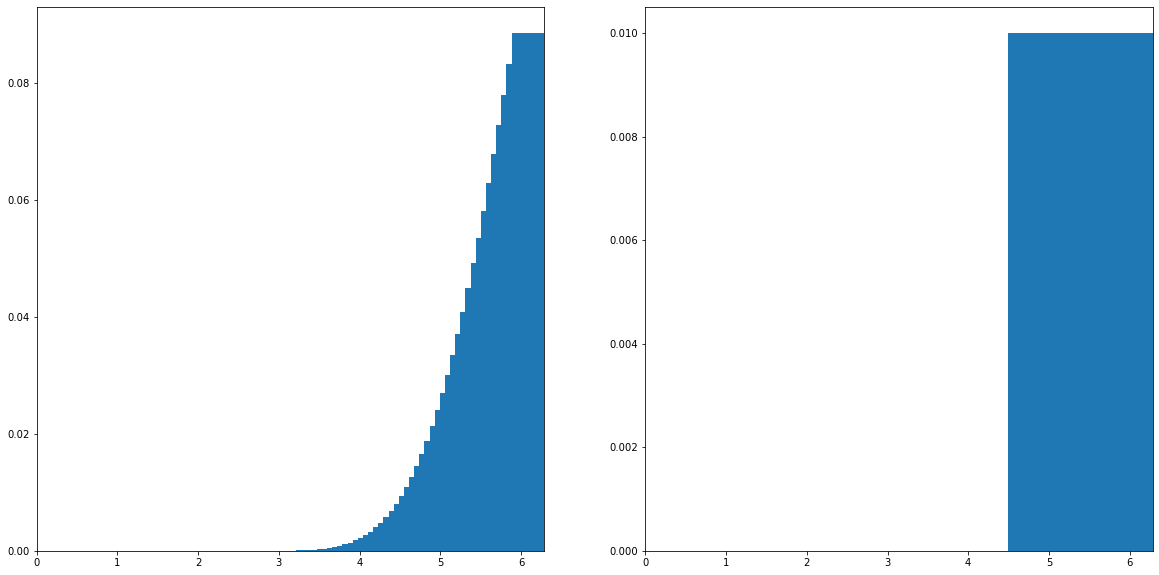

True omega: 5.787513, prediction by LW: 5.787512, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  5.029182346166755 ======================================


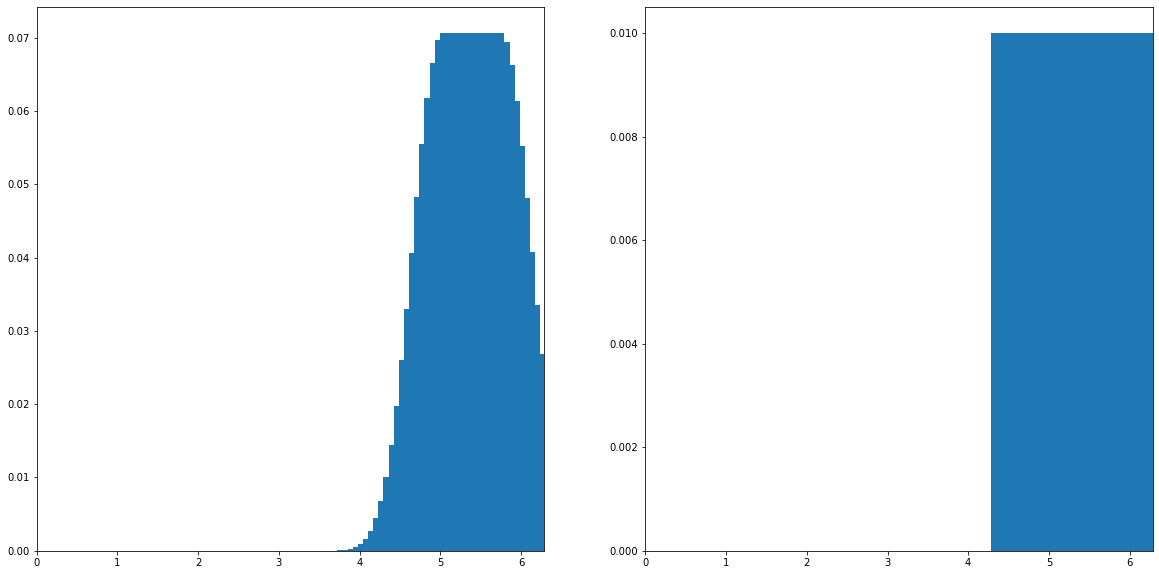

True omega: 5.029182, prediction by LW: 5.029183, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.889162341104865 ======================================


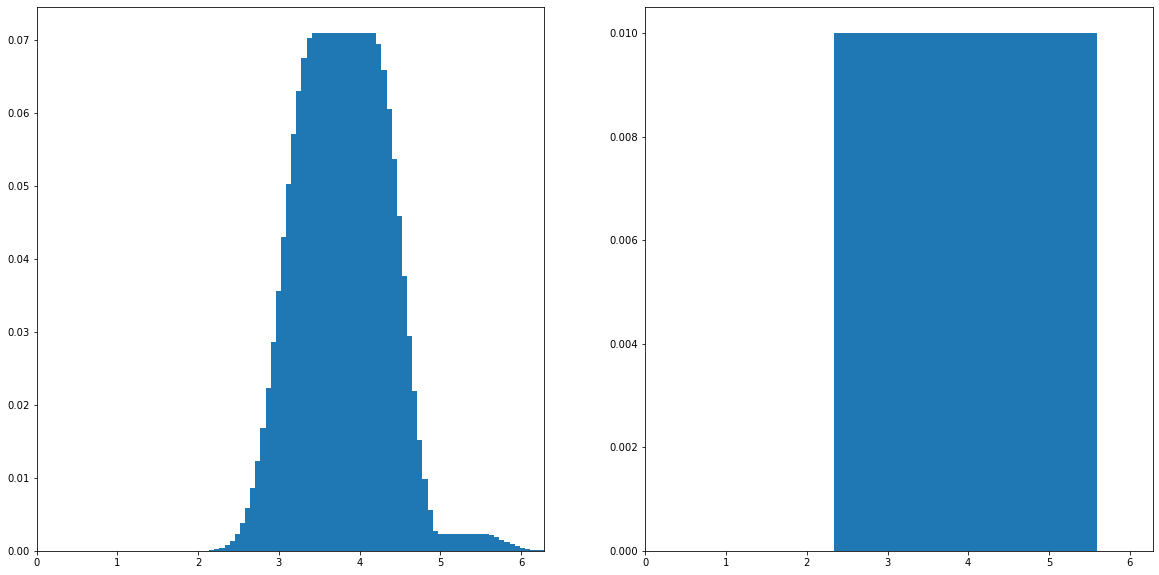

True omega: 3.889162, prediction by LW: 3.889162, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  0.6463155399627426 ======================================


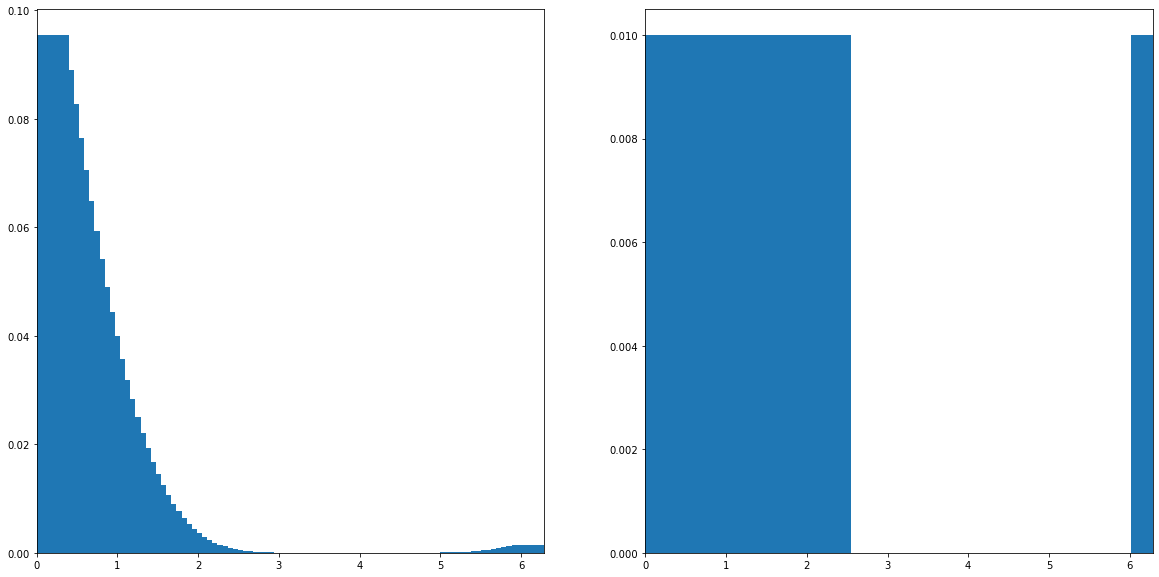

True omega: 0.646316, prediction by LW: 0.646316, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.9261170811834876 ======================================


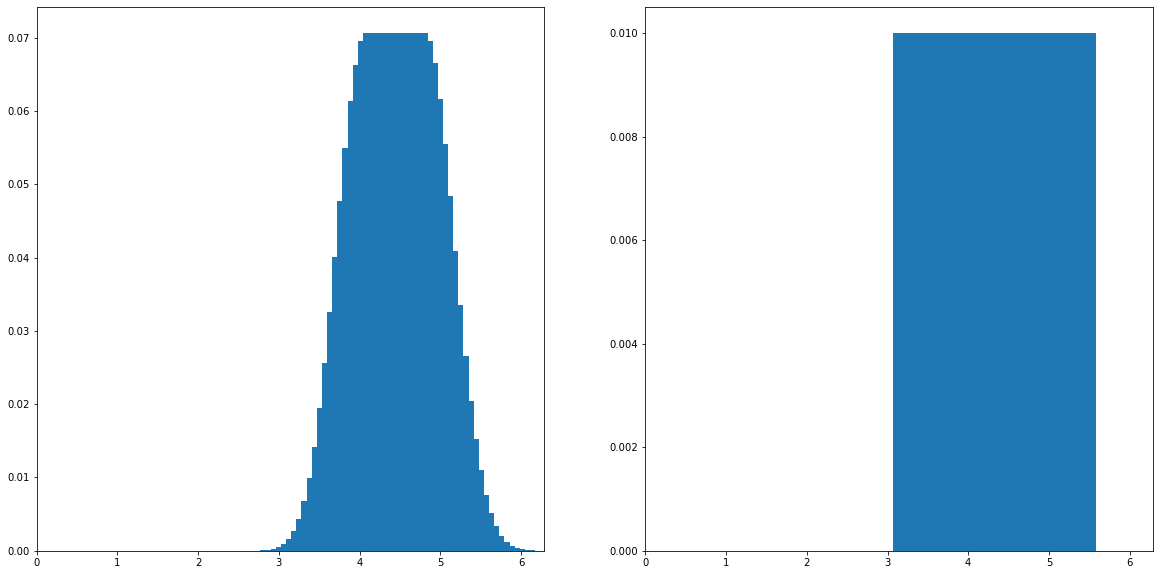

True omega: 3.926117, prediction by LW: 3.926117, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  4.490063344472435 ======================================


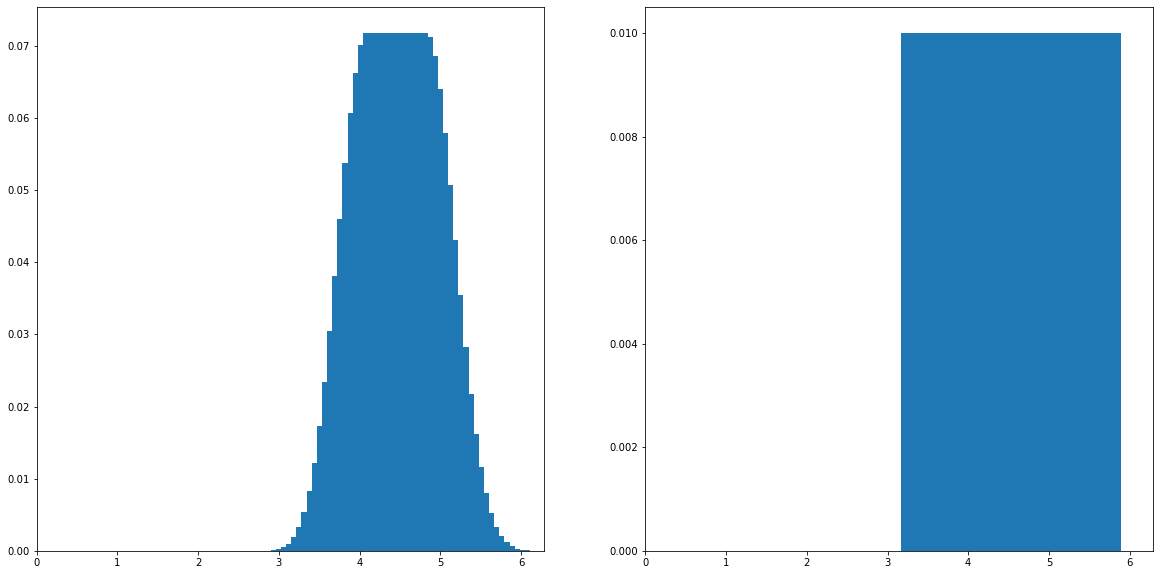

True omega: 4.490063, prediction by LW: 4.490063, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  4.36122325676008 ======================================


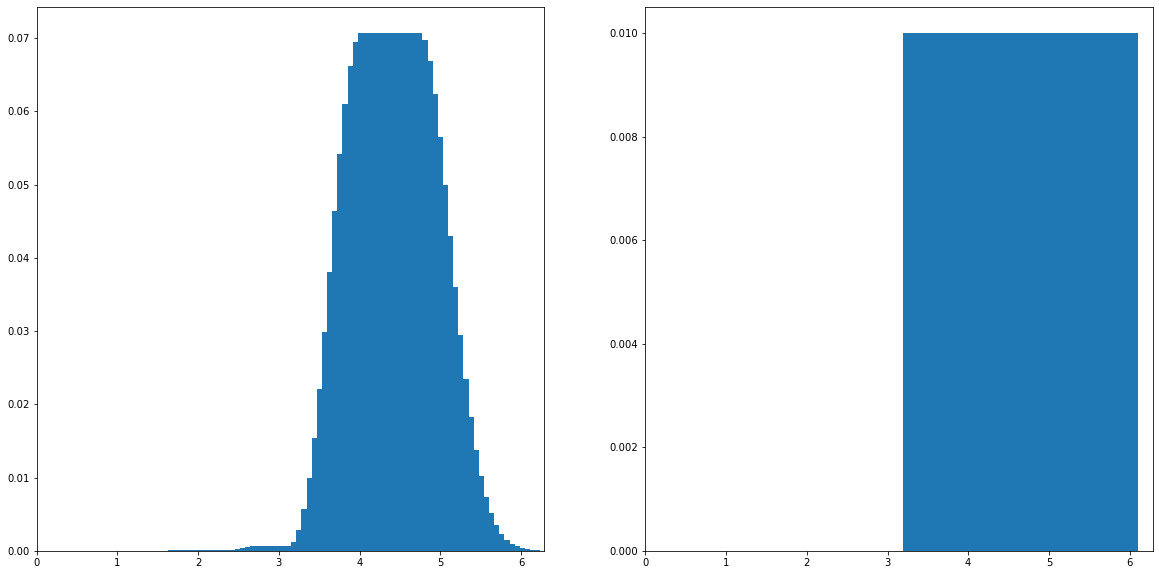

True omega: 4.361223, prediction by LW: 4.361223, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  2.6887155263509315 ======================================


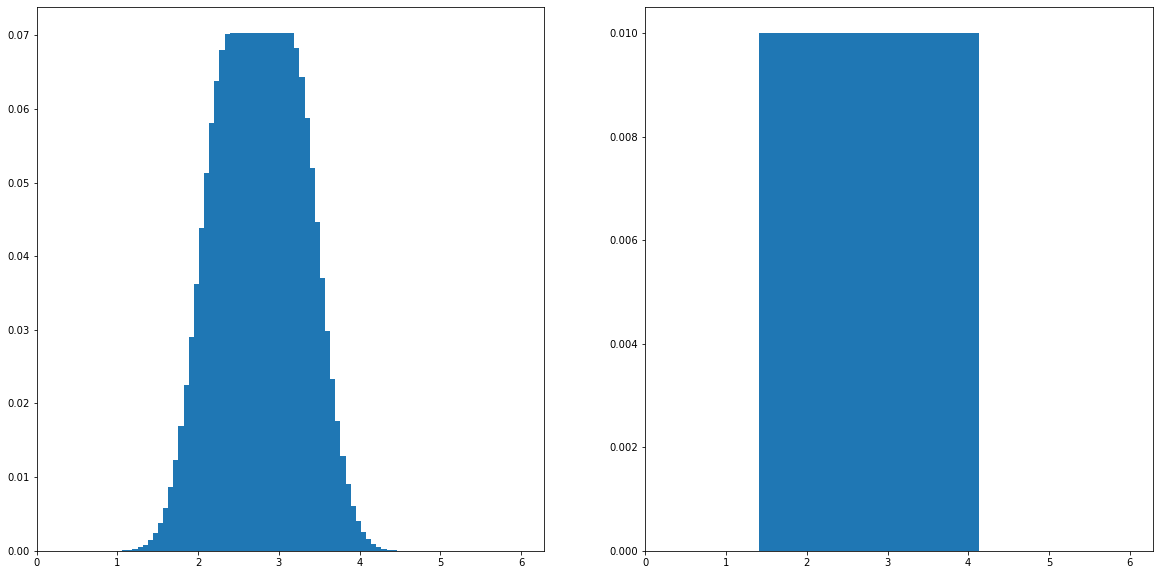

True omega: 2.688716, prediction by LW: 2.688715, num of resample calls: 14
==============NEW EXPERIMENT WITH OMEGA =  0.5626467608643633 ======================================


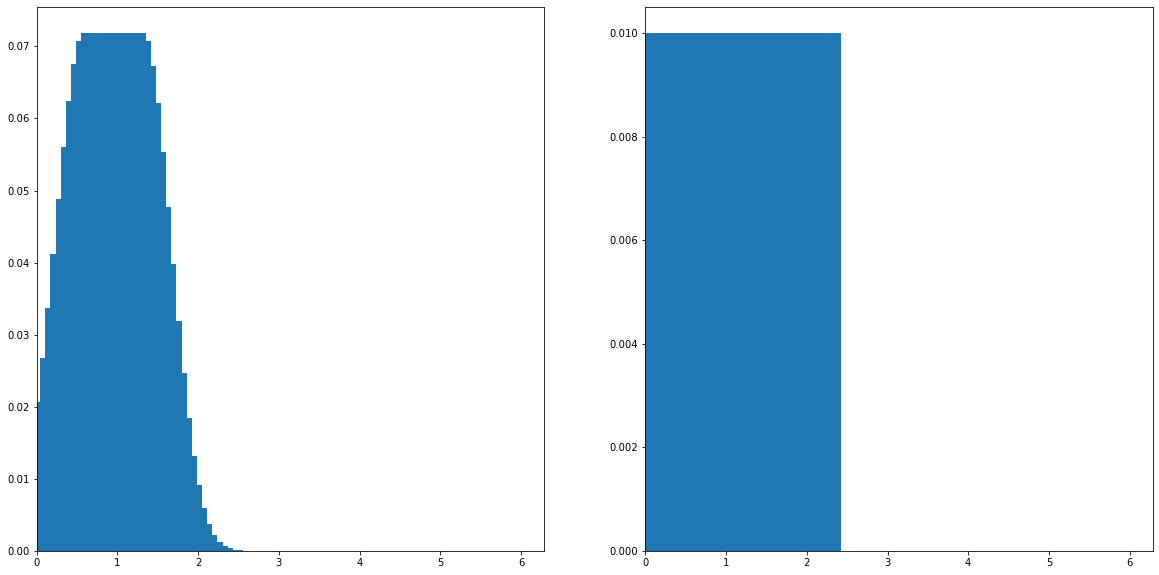

True omega: 0.562647, prediction by LW: 0.562647, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  3.8388599860760446 ======================================


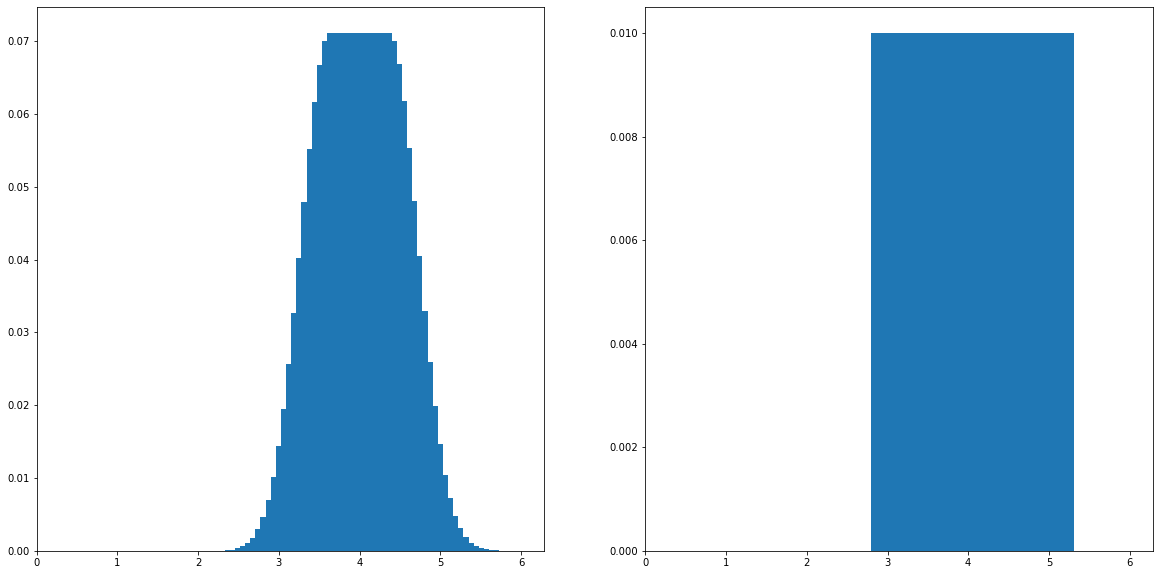

True omega: 3.838860, prediction by LW: 3.838860, num of resample calls: 10
==============NEW EXPERIMENT WITH OMEGA =  4.920737871460633 ======================================


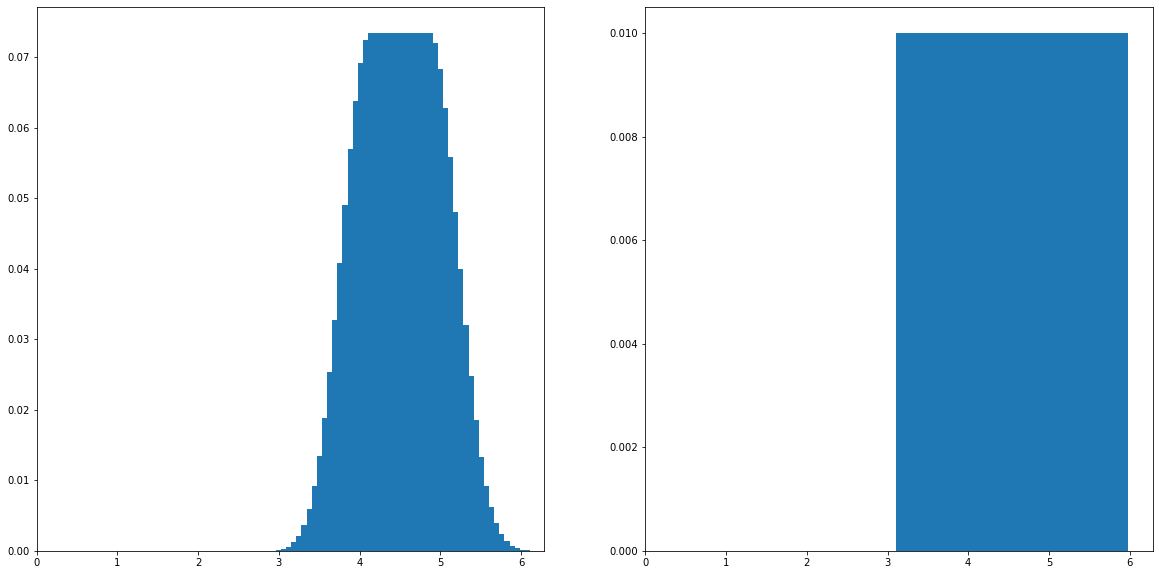

True omega: 4.920738, prediction by LW: 4.920738, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  2.075711758517829 ======================================


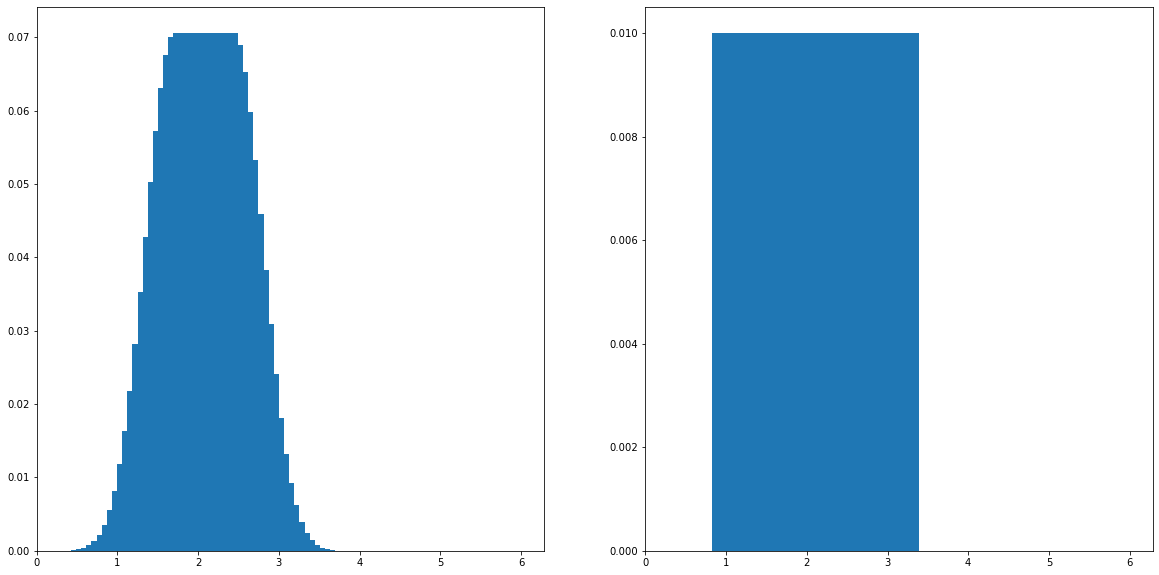

True omega: 2.075712, prediction by LW: 2.075712, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  1.8305906972257018 ======================================


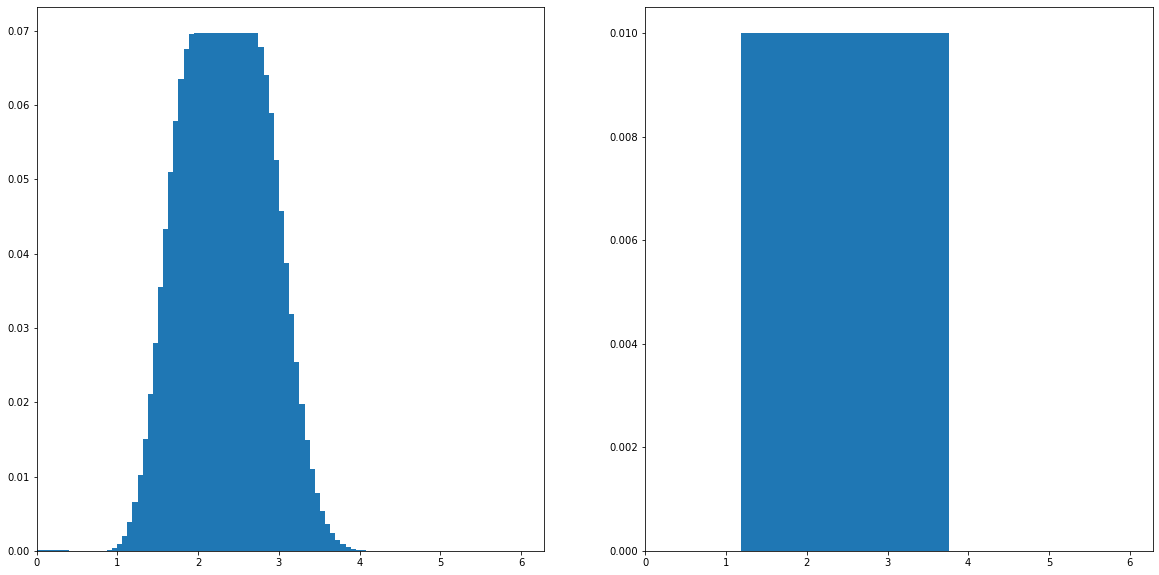

True omega: 1.830591, prediction by LW: 1.830591, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  3.655363397349506 ======================================


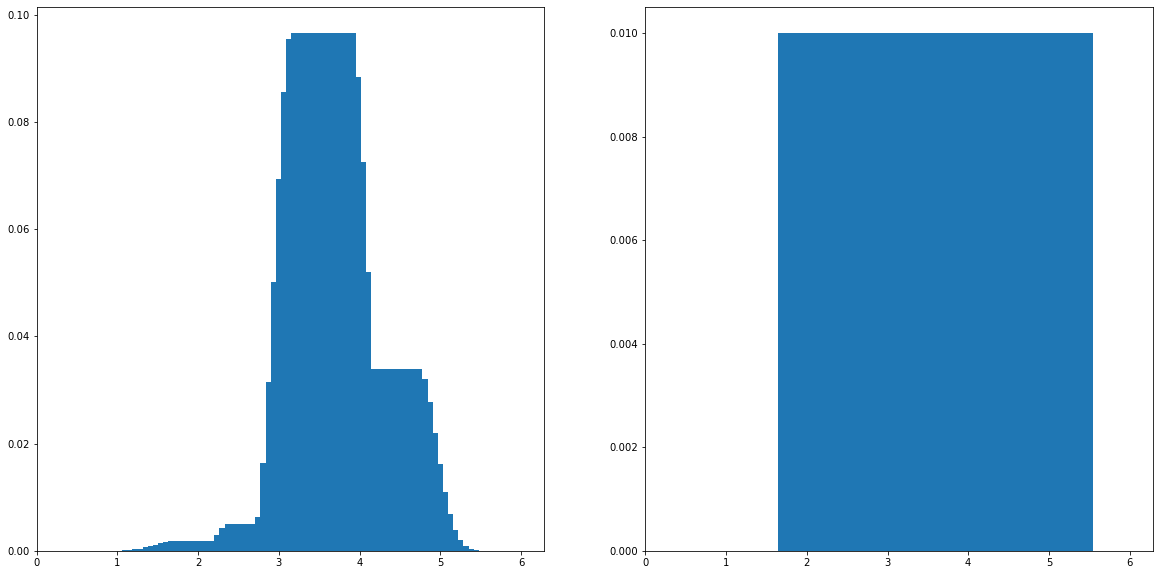

True omega: 3.655363, prediction by LW: 3.655363, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  6.041950373378379 ======================================


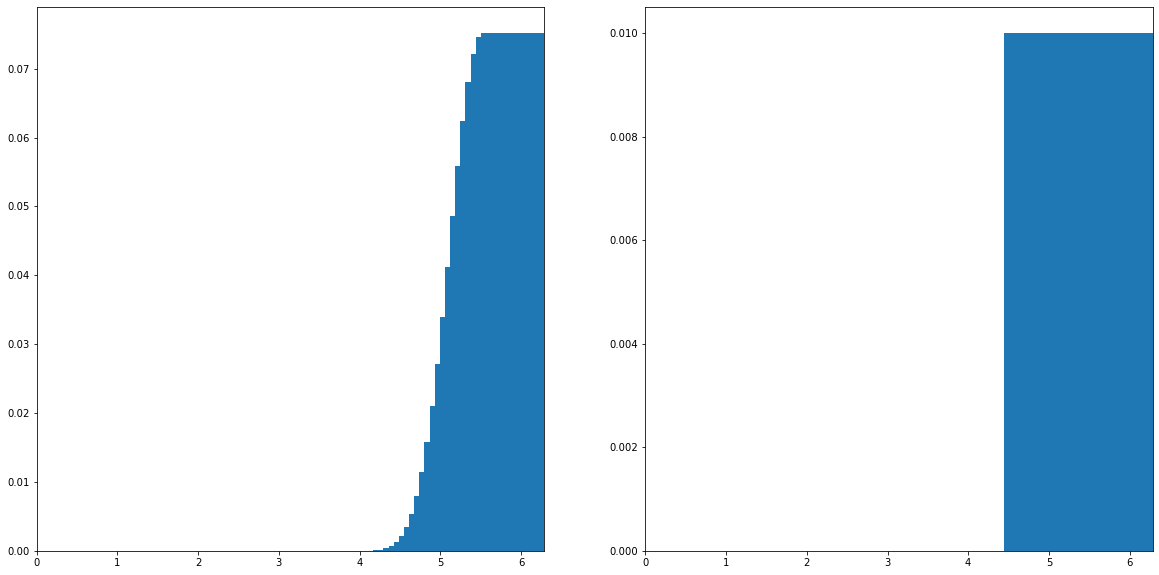

True omega: 6.041950, prediction by LW: 6.041951, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  1.2936285204048352 ======================================


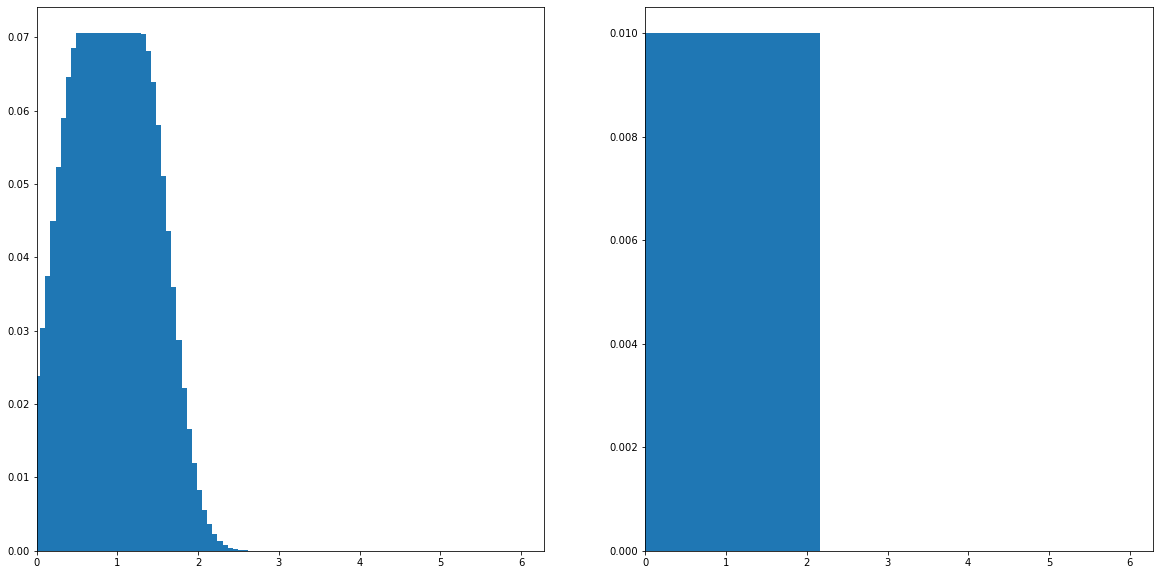

True omega: 1.293629, prediction by LW: 1.293628, num of resample calls: 16
==============NEW EXPERIMENT WITH OMEGA =  0.3252723458064186 ======================================


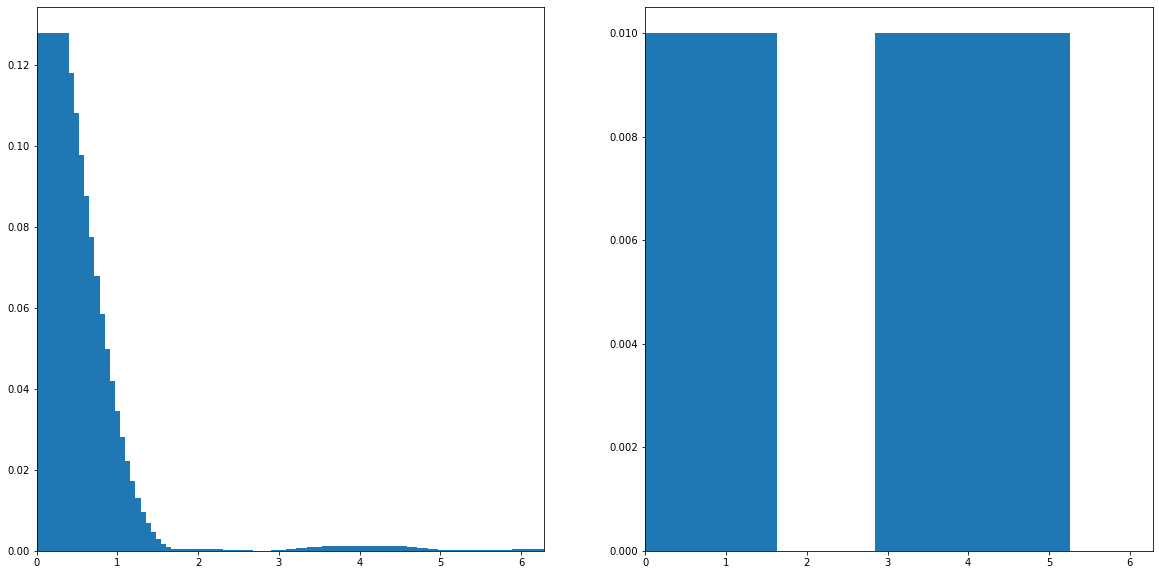

True omega: 0.325272, prediction by LW: 0.325272, num of resample calls: 13
==============NEW EXPERIMENT WITH OMEGA =  0.2952043841822915 ======================================


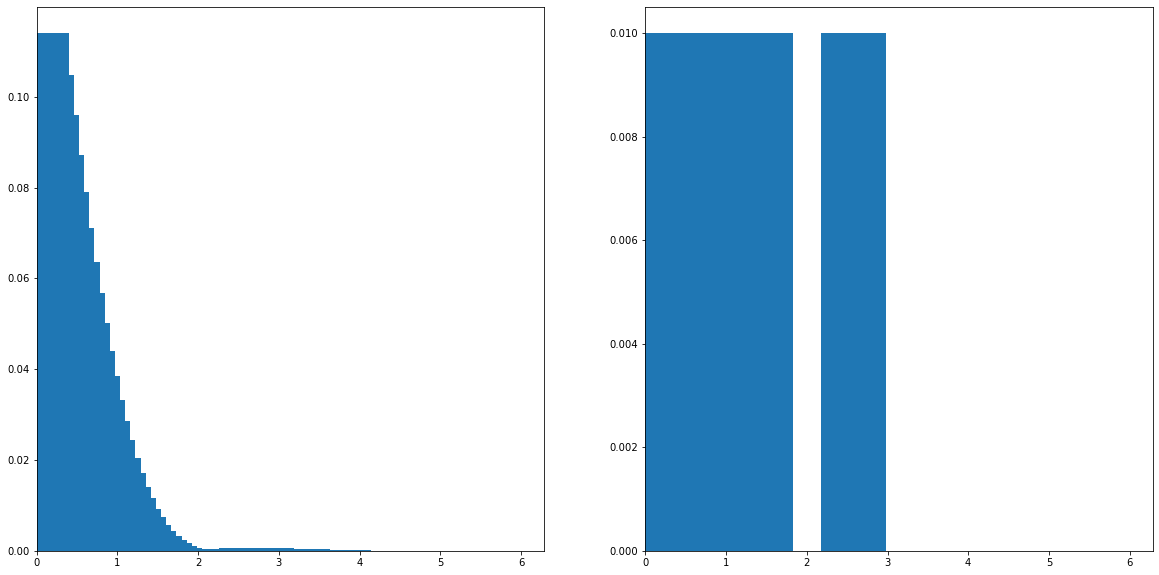

True omega: 0.295204, prediction by LW: 0.295204, num of resample calls: 17
==============NEW EXPERIMENT WITH OMEGA =  4.7388349562657766 ======================================


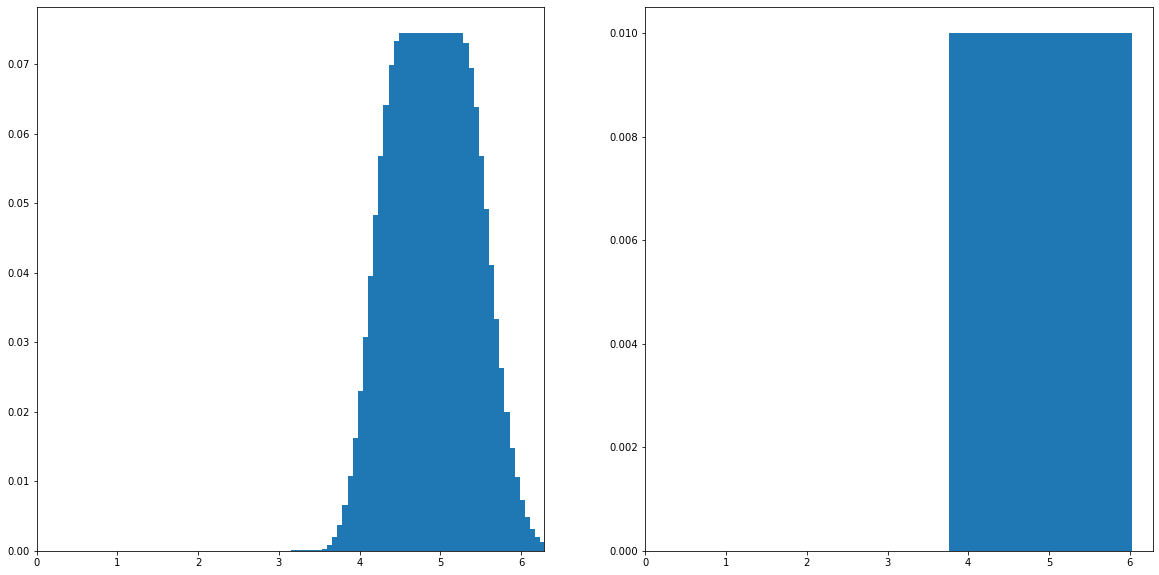

True omega: 4.738835, prediction by LW: 4.738835, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  1.5592253474654145 ======================================


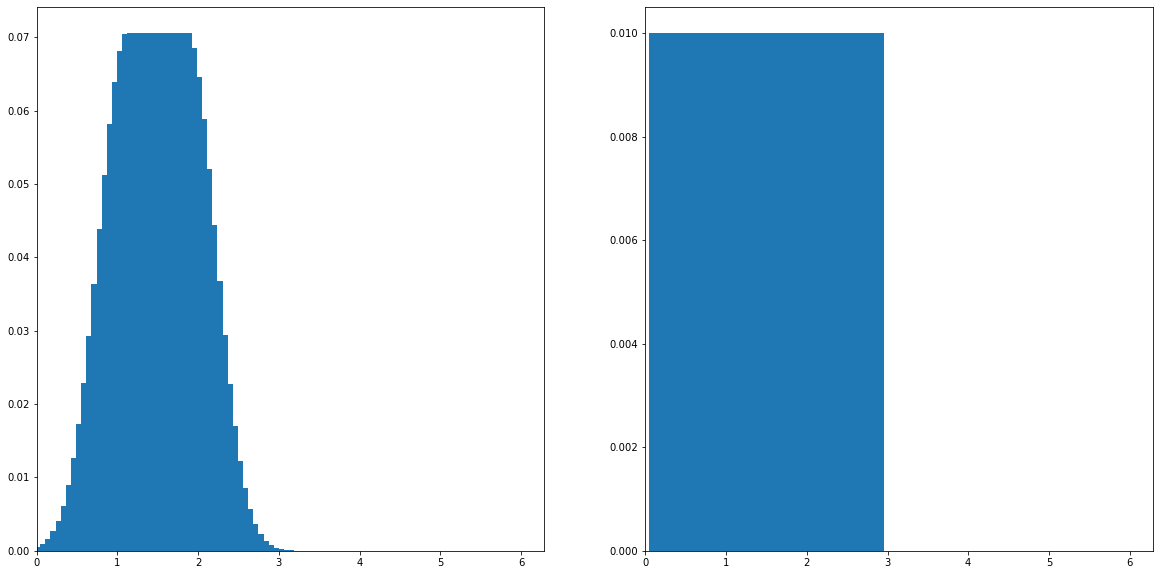

True omega: 1.559225, prediction by LW: 1.559225, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  3.63471309424018 ======================================


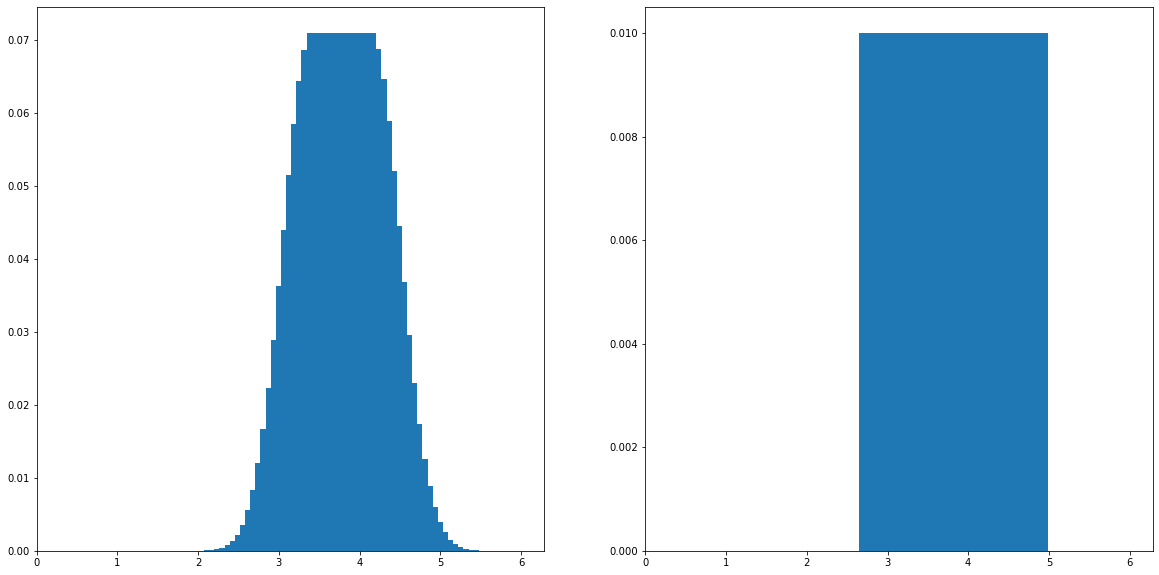

True omega: 3.634713, prediction by LW: 3.634713, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  2.781704529408523 ======================================


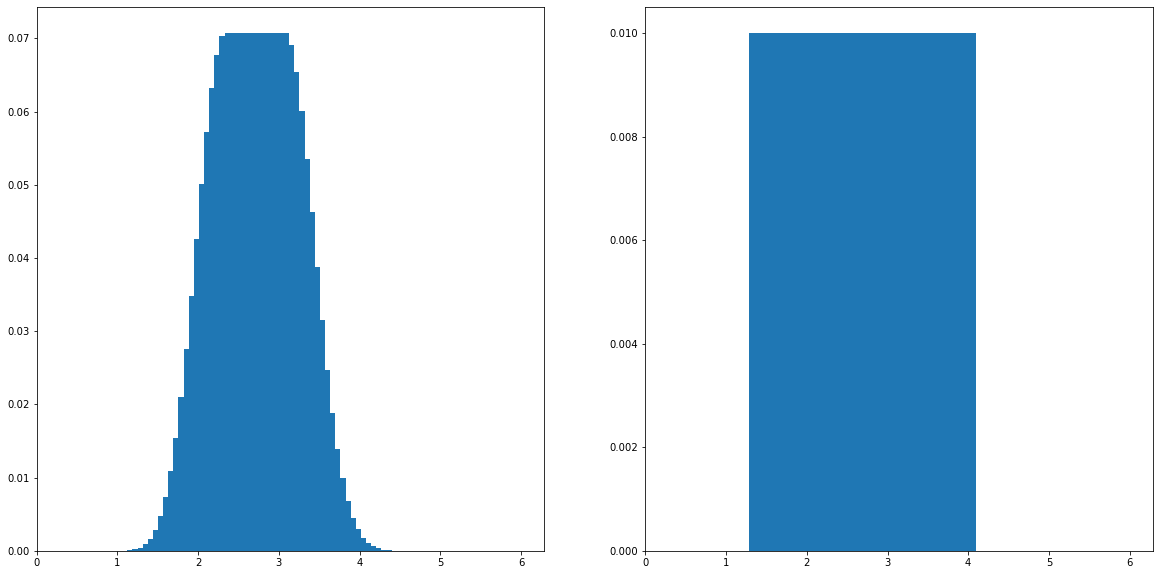

True omega: 2.781705, prediction by LW: 2.781705, num of resample calls: 11
==============NEW EXPERIMENT WITH OMEGA =  5.372089891742472 ======================================


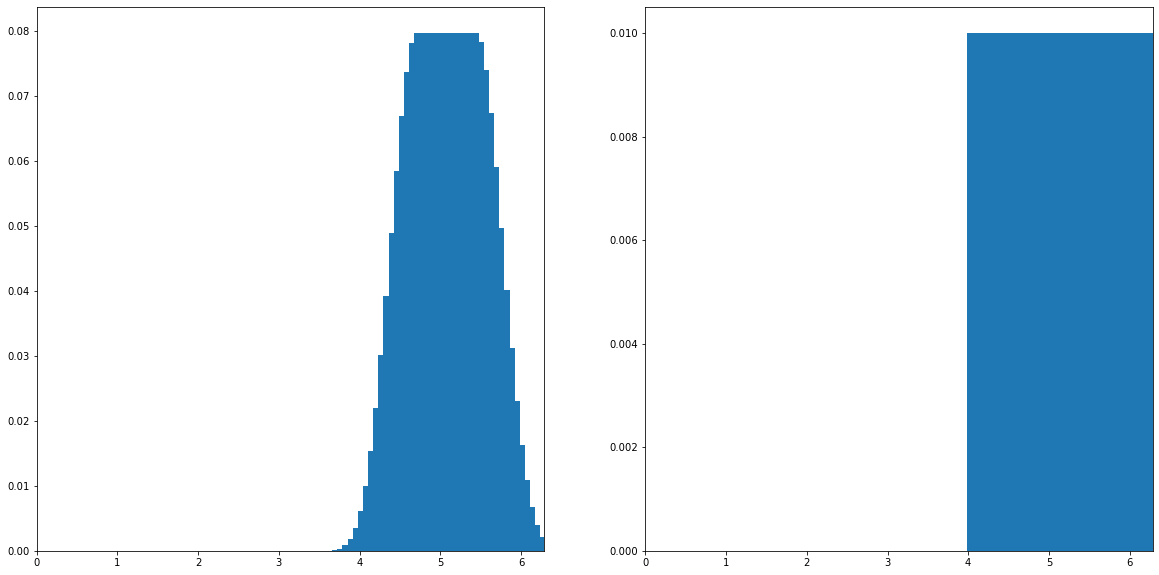

True omega: 5.372090, prediction by LW: 5.372090, num of resample calls: 12
==============NEW EXPERIMENT WITH OMEGA =  0.8548906028541537 ======================================


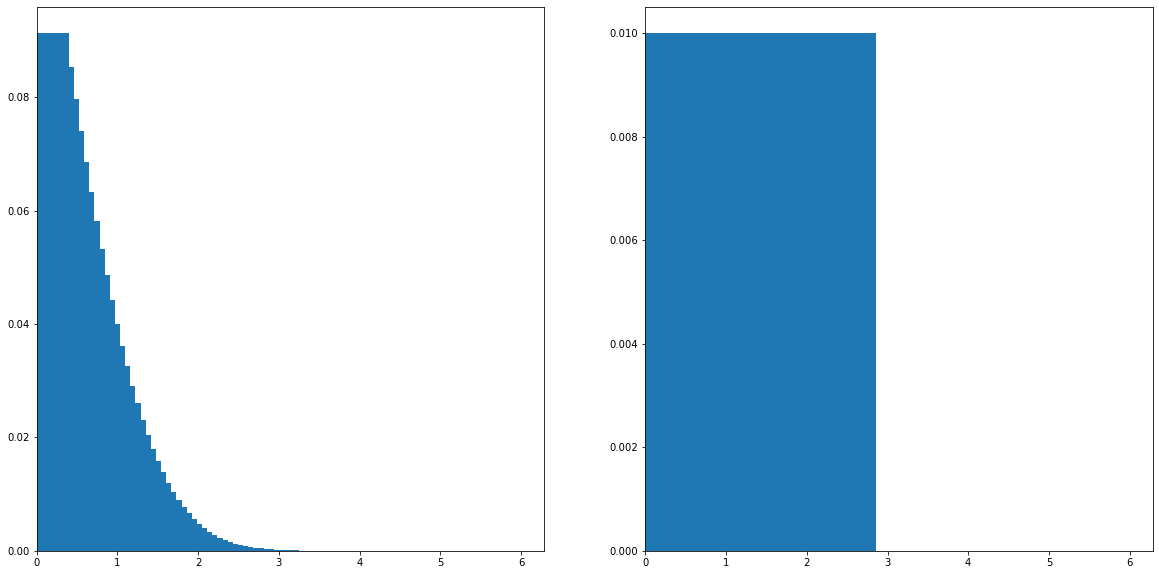

True omega: 0.854891, prediction by LW: 0.854891, num of resample calls: 13


In [17]:
omega_star_list = []
lw_pred_list = []

for i in range(n_iters): 
    t0 = 0.1
    omega_star = np.random.uniform() * 2 * np.pi
    
    print("==============NEW EXPERIMENT WITH OMEGA = ", omega_star, "======================================")
    
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0)
    smc.init_particles(num_particles)
    running_est = []
    
    counts = 0
    
    while True:

        particle_pos, particle_wgts = smc.particles(threshold=num_particles/5, num_measurements=1)
        smc.liu_west_resample()
        
        if counts == 0:
            fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
            ax1.set_xlim([0, 2*np.pi])
            ax2.set_xlim([0, 2*np.pi])
            ax1.bar(particle_pos, particle_wgts)
            ax2.bar(smc.particle_pos, smc.particle_wgts)
            plt.show()
        
        counts+= 1 
        
        if smc.lw_break_flag is True:
            break
        
        curr_omega_est = smc.particle_pos[np.argmax(smc.particle_wgts)]
        running_est.append(curr_omega_est)
        
        if len(running_est) > 5:
            last_5 = running_est[-5:]
            # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
            # np.full_like makes an array with shape of last_10 with every element being last_10[0]
            # if all elements of last_10 are equal then they should all equal the first element
            if np.allclose(last_5, np.full_like(last_5, last_5[0])):
                break
                
      
    print("True omega: {:f}, prediction by LW: {:f}, num of resample calls: {:d}".format(omega_star,curr_omega_est, counts))
    lw_pred_list.append(curr_omega_est)

In [18]:
lw_mse = np.mean( abs(np.array(omega_star_list) - np.array(lw_pred_list)) )
print(lw_mse)

1.4462292122013888e-07
